# Reading dataset

In [1]:
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder

path = './Dataset/'

line_counter = 0
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        fG = open(f)
        data = fG.read()
        fG.close()
        lines = data.split('\n')
        line_counter += len(lines) - 1   #last line of each file is an empty file

all_data = np.zeros((line_counter, 483), dtype='float32')
line_counter = 0

for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        fG = open(f)
        data = fG.read()
        fG.close()
        lines = data.split('\n')
        for line in lines:
            if line == "":
                break
            values = [x for x in line[0:len(line)-1].split(' ')[:]]
            for i, value in enumerate(values):
                if i == 0:
                    all_data[line_counter, i] = value
                else:
                    key = value.split(':')[0]
                    temp = value.split(':')[1]
                    all_data[line_counter, int(key)+1] = temp
            line_counter += 1

In [2]:
np.shape(all_data) # we don't have understood why shape doesn't correspond to UCI dataset description (we have checked the parsing phase and seems to be all right)

(107856, 483)

# Description of feature and data cleaning

before starting with the cleaning of data make some statistichs over the labels

In [3]:
label_classification = np.around(all_data[:,0], decimals=0).astype(int)
label_classification

array([0, 1, 1, ..., 1, 0, 0])

In [4]:
counter_malware = 0
counter_not_malware = 0
for label in label_classification:
    if label == 0:
        counter_not_malware += 1
    else:
        counter_malware += 1

In [5]:
counter_not_malware

29843

In [6]:
counter_malware

78013

In [7]:
import pandas as pd

all_data_df = pd.DataFrame(all_data)
all_data_df

0    1    2    3    4    5    6    7    8    9    ...  473  474  \
0       0.074074  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1       0.684211  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2       0.814815  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3       0.814815  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
4       0.421053  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
107851  0.438596  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107852  0.666667  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107853  0.719298  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107854  0.403509  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0   
107855  0.403509  1.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0   

        475  476  477  478  479  480  481  482  
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  ...  
107851  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107852  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107853  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107854  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107855  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[107856 rows x 483 columns]

In [8]:
counter_duplicated = 0
for boolean_value in all_data_df.duplicated():
    if boolean_value:
        counter_duplicated += 1
counter_duplicated

27607

27607 samples over 107856 (about 25% of the dataset) are doubles (pandas count only one occurrence for set of duplicated).

In [9]:
all_data_df.drop_duplicates(inplace=True)
all_data_df

0    1    2    3    4    5    6    7    8    9    ...  473  474  \
0       0.074074  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1       0.684211  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2       0.814815  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3       0.814815  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
4       0.421053  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
107851  0.438596  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107852  0.666667  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107853  0.719298  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
107854  0.403509  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0   
107855  0.403509  1.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0   

        475  476  477  478  479  480  481  482  
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  ...  
107851  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107852  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107853  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107854  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107855  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[80249 rows x 483 columns]

save labels in external data both in their natural form for make experiments with regression models and arounded for make experiments with classification models

In [10]:
all_data = all_data_df.to_numpy()

In [11]:
label_classification = np.around(all_data[:,0], decimals=0).astype(int)
label_classification

array([0, 1, 1, ..., 1, 0, 0])

In [12]:
counter_malware = 0
counter_not_malware = 0
for label in label_classification:
    if label == 0:
        counter_not_malware += 1
    else:
        counter_malware += 1

In [13]:
counter_not_malware

24097

In [14]:
counter_malware

56152

In [15]:
np.savetxt("./Labels/label_classification.csv", label_classification, delimiter=';')

In [16]:
all_data = all_data[:,1:]
all_data_df.drop(columns=[0], inplace=True)
all_data_df.reset_index(inplace=True, drop=True)
all_data_df

1    2    3    4    5    6    7    8    9    10   ...  473  474  475  \
0      3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
80244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80247  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80248  1.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       476  477  478  479  480  481  482  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
80244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80247  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80248  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[80249 rows x 482 columns]

check missing value

In [17]:
if all_data_df.isnull().all().any():
    print("some column has all null value")
if all_data_df.isnull().any().any():
    print("some column has any null value")

check column with all zeros

In [18]:
column_c = 0
for i, column in enumerate(all_data_df):
    if (all_data_df[column] == 0).all():
        column_c +=1
print(column_c)

217


In [19]:
column_removed = []
column_c = 0
for i, column in enumerate(all_data_df):
    if (all_data_df[column] == 0).all():
        column_removed.append(i)
        column_c += 1
        all_data_df.drop(column, axis=1, inplace=True)
print(column_c)

217


In [20]:
column_removed

[1,
 7,
 10,
 13,
 16,
 18,
 26,
 28,
 30,
 31,
 35,
 37,
 39,
 40,
 42,
 46,
 51,
 54,
 60,
 70,
 77,
 85,
 92,
 94,
 99,
 103,
 122,
 124,
 126,
 131,
 136,
 137,
 145,
 147,
 148,
 150,
 155,
 166,
 170,
 172,
 180,
 185,
 188,
 194,
 195,
 211,
 220,
 221,
 222,
 226,
 229,
 237,
 247,
 248,
 249,
 250,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 371,
 372,
 373,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 386,
 389,
 395,
 399,
 402,
 403,
 

In [21]:
all_data_df

1    3    4    5    6    7    9    10   12   13   ...  462  463  468  \
0      3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
80244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
80247  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
80248  1.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   

       469  470  471  473  476  478  479  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  1.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
80244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80247  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80248  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[80249 rows x 265 columns]

In [22]:
all_data_df.describe()

1              3             4             5             6    \
count  80249.000000   80249.000000  80249.000000  80249.000000  80249.000000   
mean       1.920136      80.041222      0.001695      0.023714      8.515508   
std       20.684610    2566.613770      0.041130      1.536566    113.487152   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.000000       0.000000      0.000000      0.000000      0.000000   
50%        0.000000       0.000000      0.000000      0.000000      0.000000   
75%        2.000000       0.000000      0.000000      0.000000      4.000000   
max     5727.000000  254212.000000      1.000000    419.000000   5299.000000   

                7             9             10            12            13   \
count  80249.000000  80249.000000  80249.000000  80249.000000  80249.000000   
mean       0.378522      1.480155      0.052225      0.000262      1.043602   
std       40.878906     38.192963      0.843168      0.074131      4.034851   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      1.000000   
max     5516.000000   6725.000000     91.000000     21.000000    345.000000   

       ...           462           463           468           469  \
count  ...  80249.000000  80249.000000  80249.000000  80249.000000   
mean   ...      0.001446      0.015913      0.000586      0.003402   
std    ...      0.037983      0.125117      0.024188      0.058230   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

                470           471           473           476           478  \
count  80249.000000  80249.000000  80249.000000  80249.000000  80249.000000   
mean       0.048200      0.001533      0.103017      0.017745      0.011614   
std        0.214344      0.039099      0.304088      0.132097      0.107092   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                479  
count  80249.000000  
mean       0.008499  
std        0.091771  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 265 columns]

In [23]:
import matplotlib.pyplot as plt
import seaborn as sbs

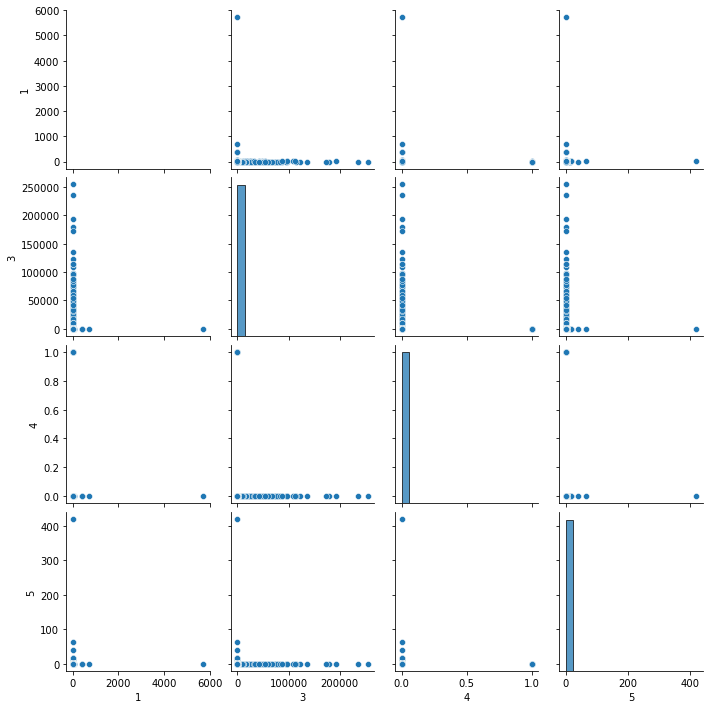

In [17]:
sbs.pairplot(all_data_df.iloc[:,0:4])

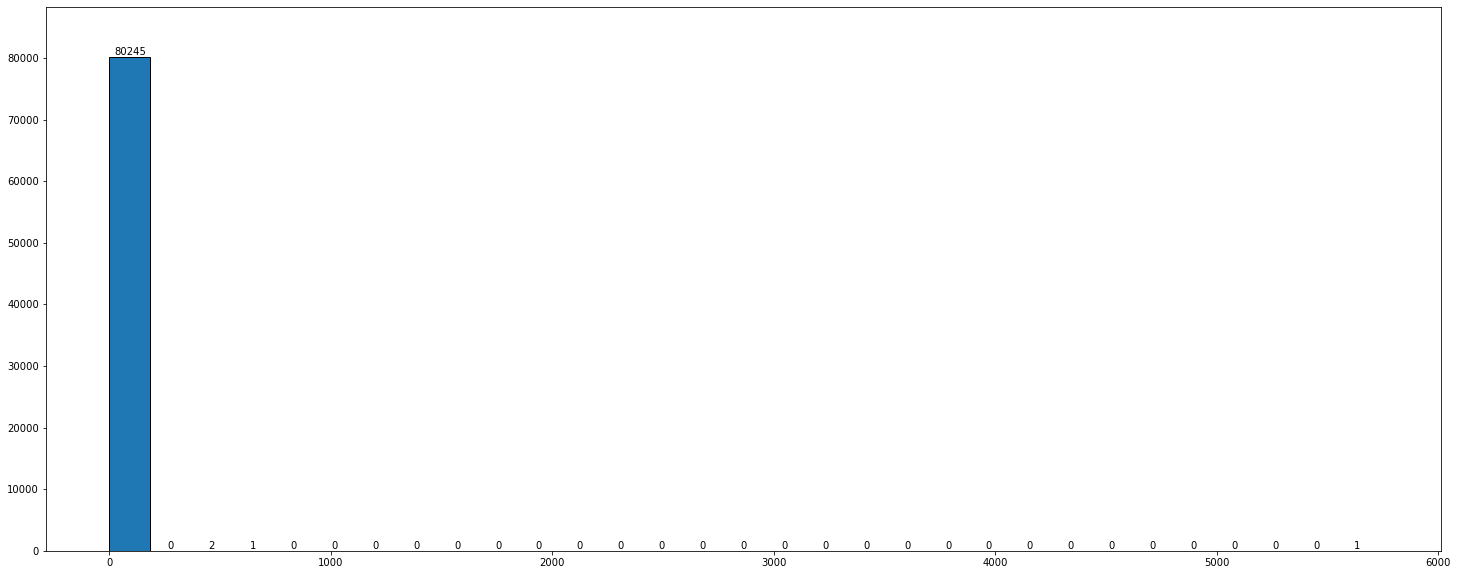

<Figure size 432x288 with 0 Axes>

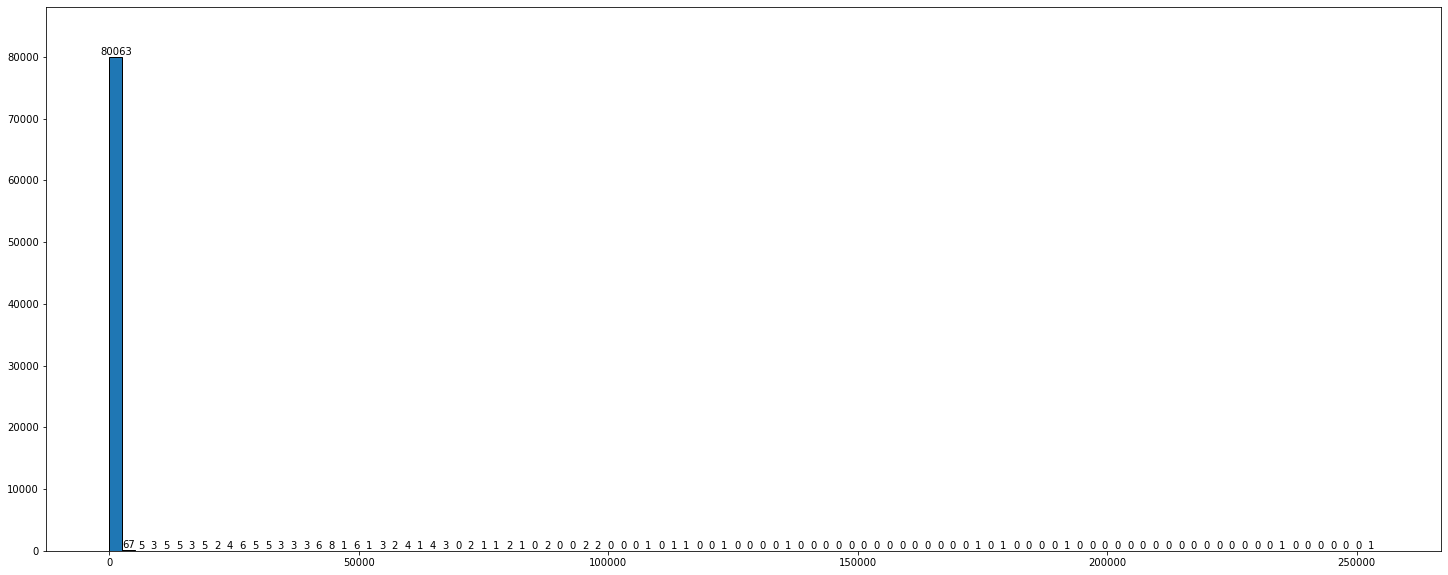

<Figure size 432x288 with 0 Axes>

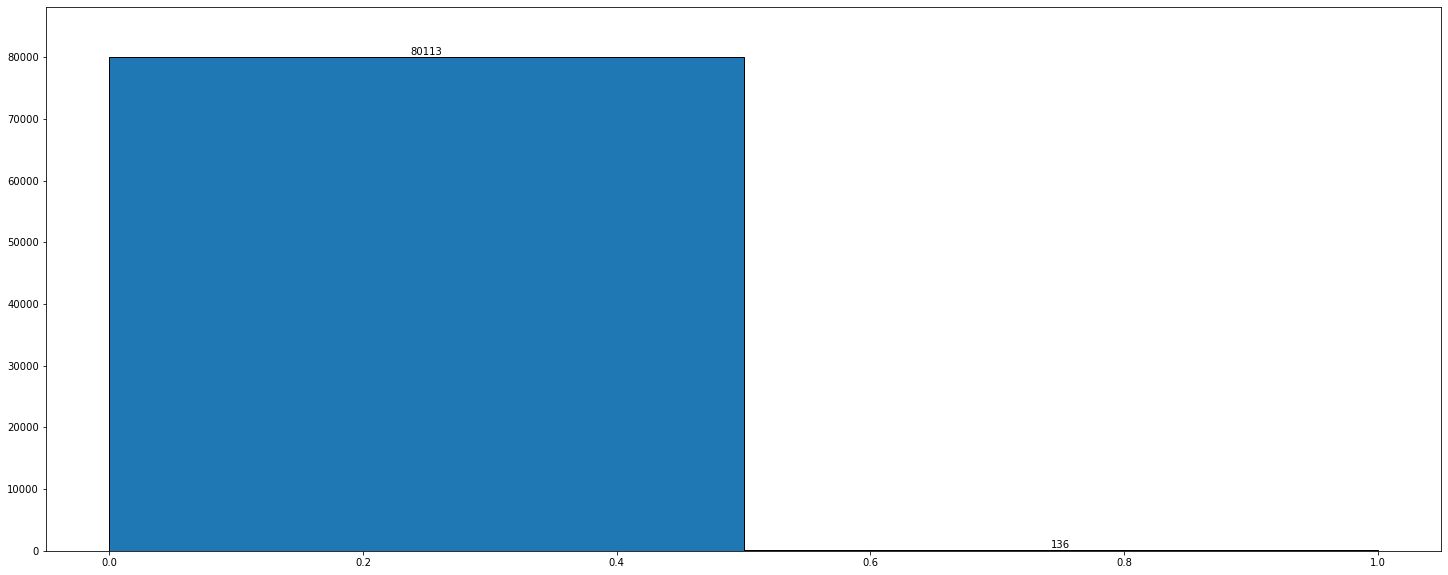

<Figure size 432x288 with 0 Axes>

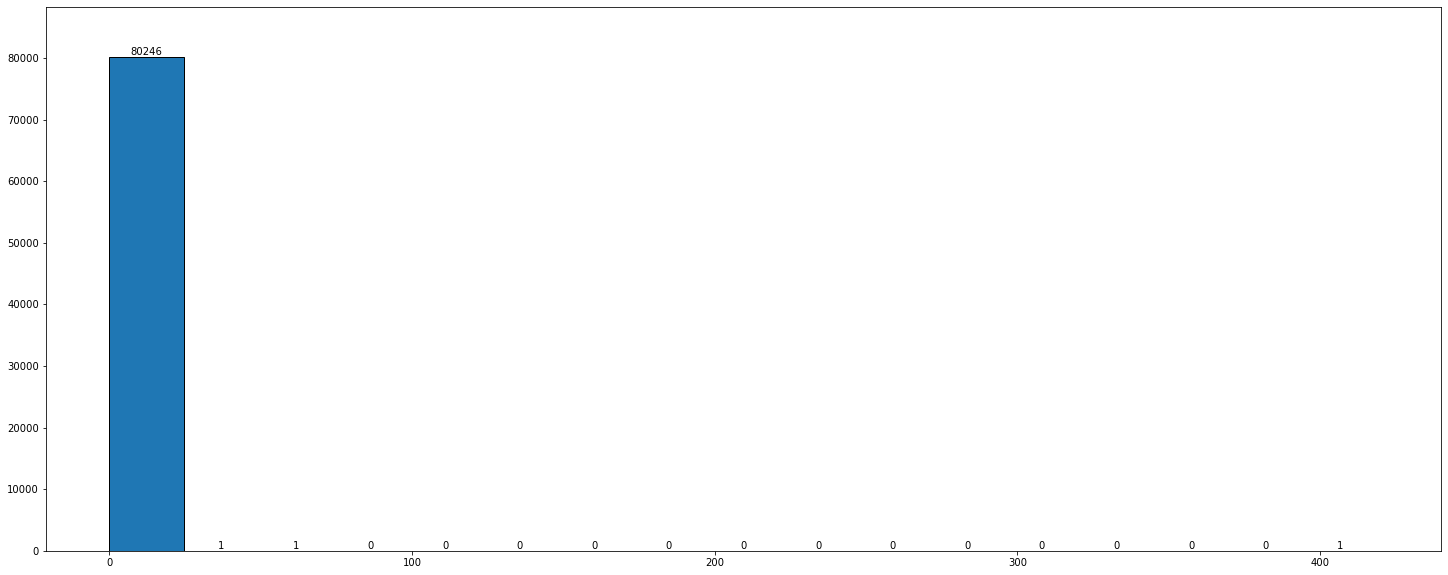

<Figure size 432x288 with 0 Axes>

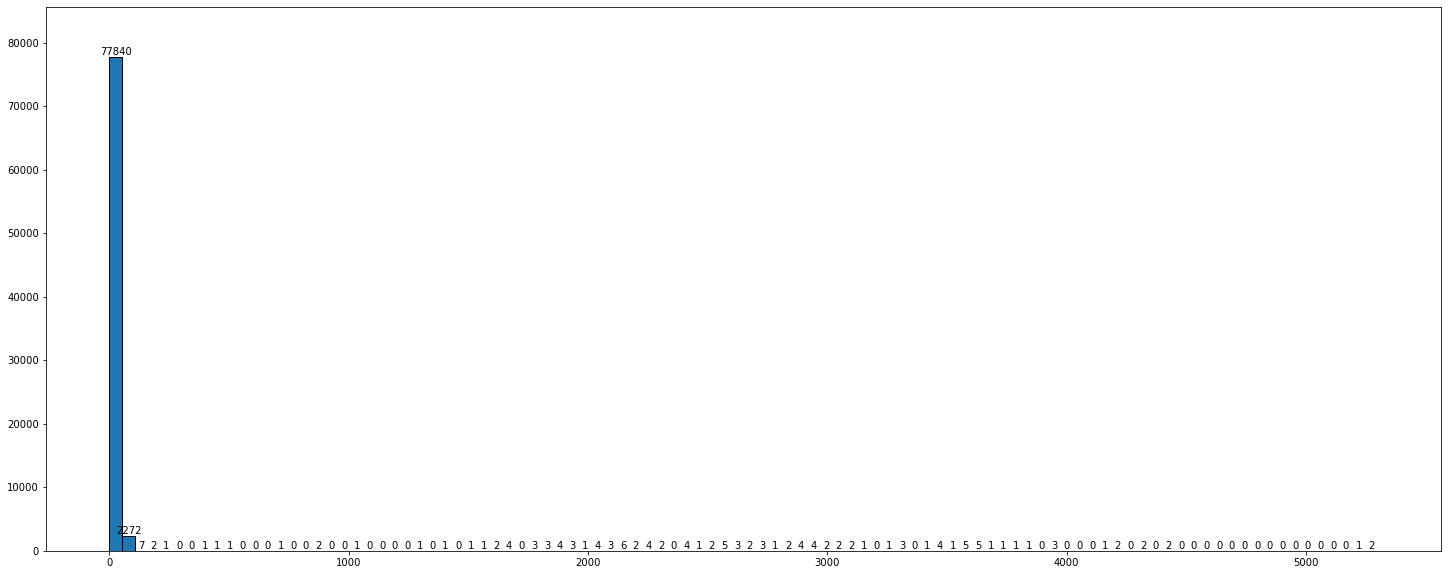

<Figure size 432x288 with 0 Axes>

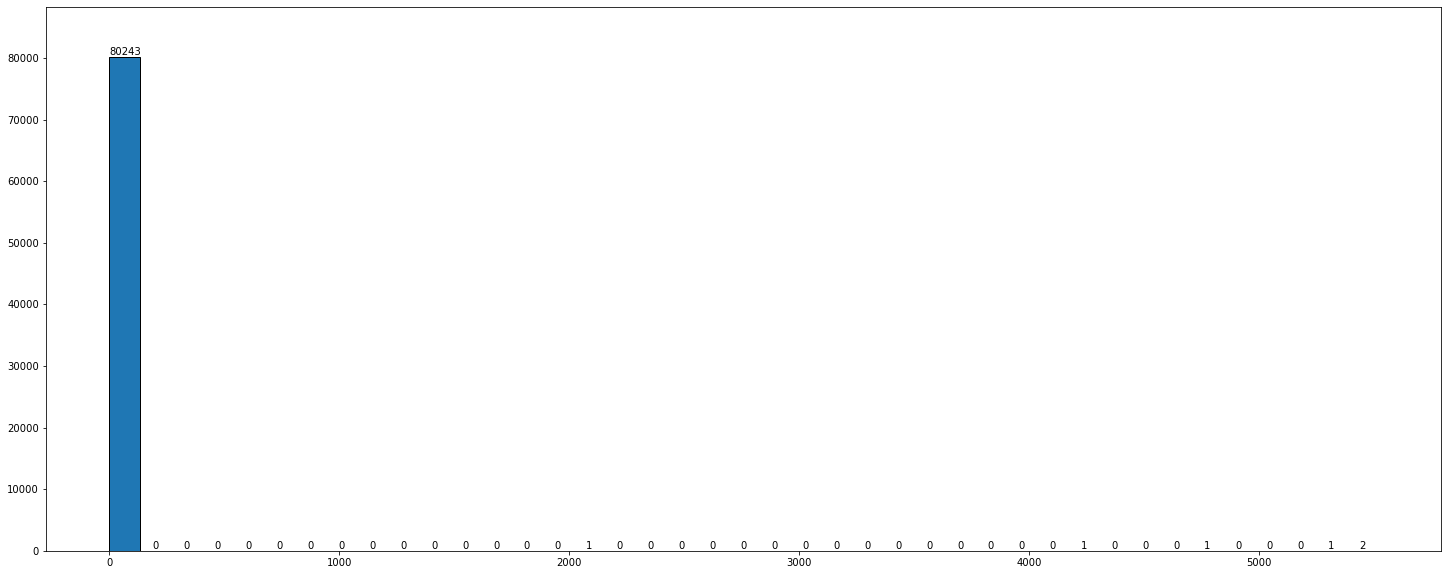

<Figure size 432x288 with 0 Axes>

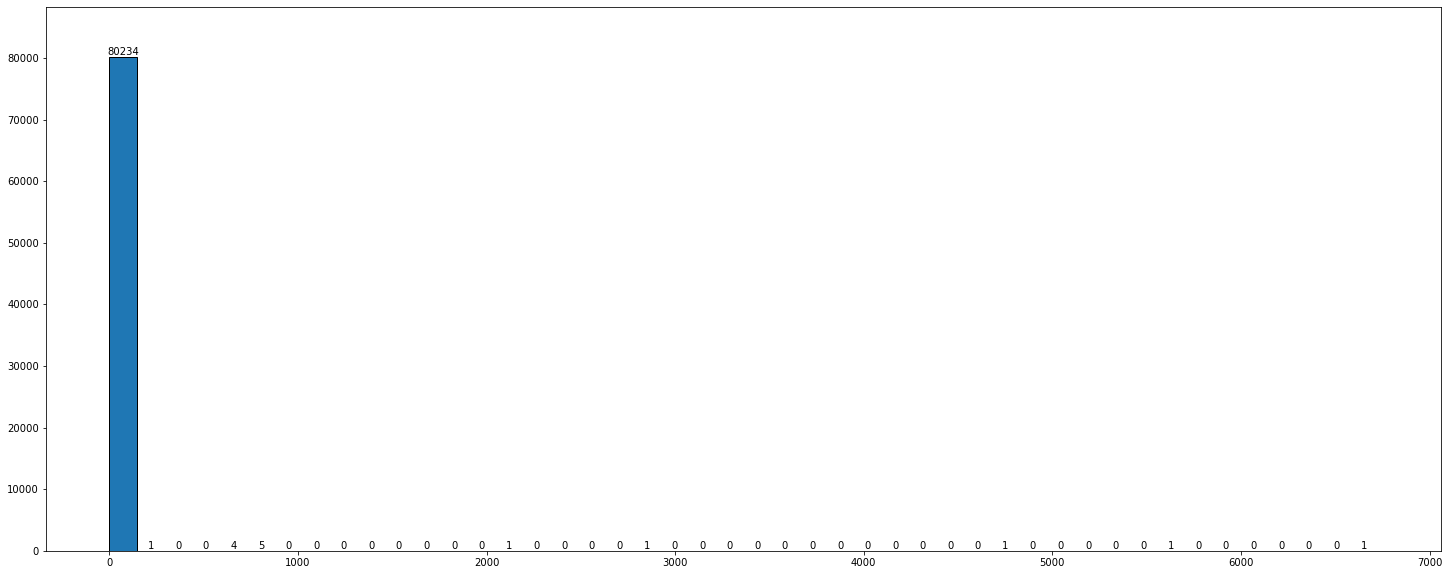

<Figure size 432x288 with 0 Axes>

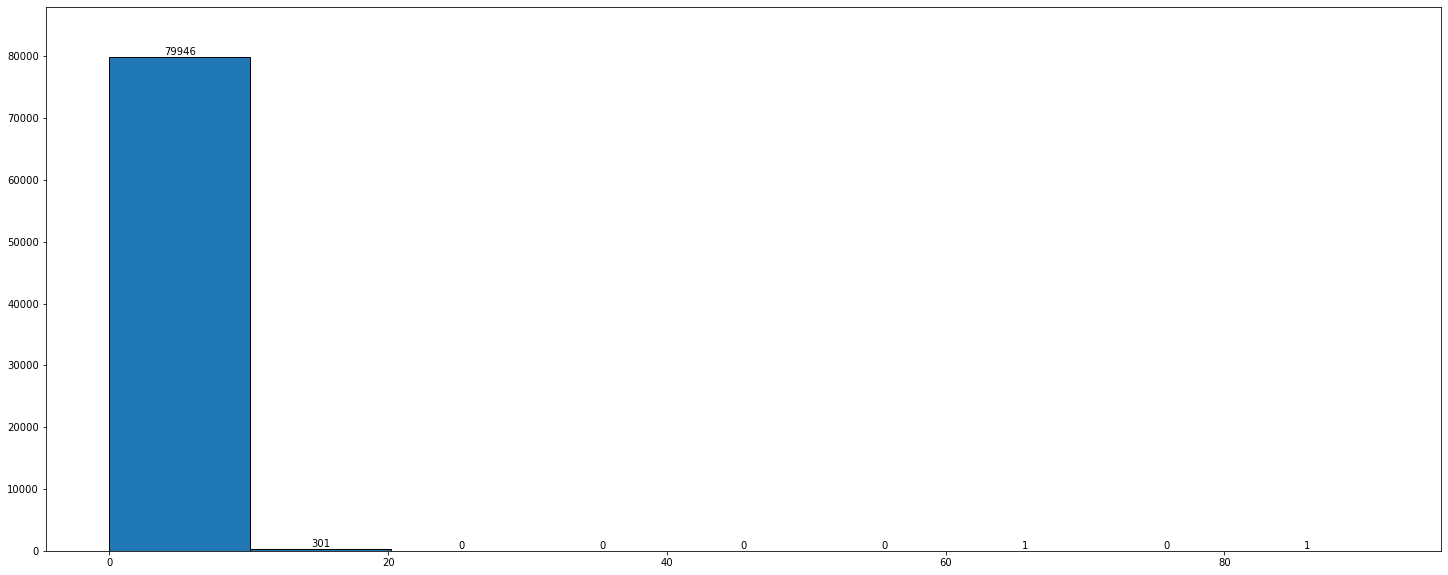

<Figure size 432x288 with 0 Axes>

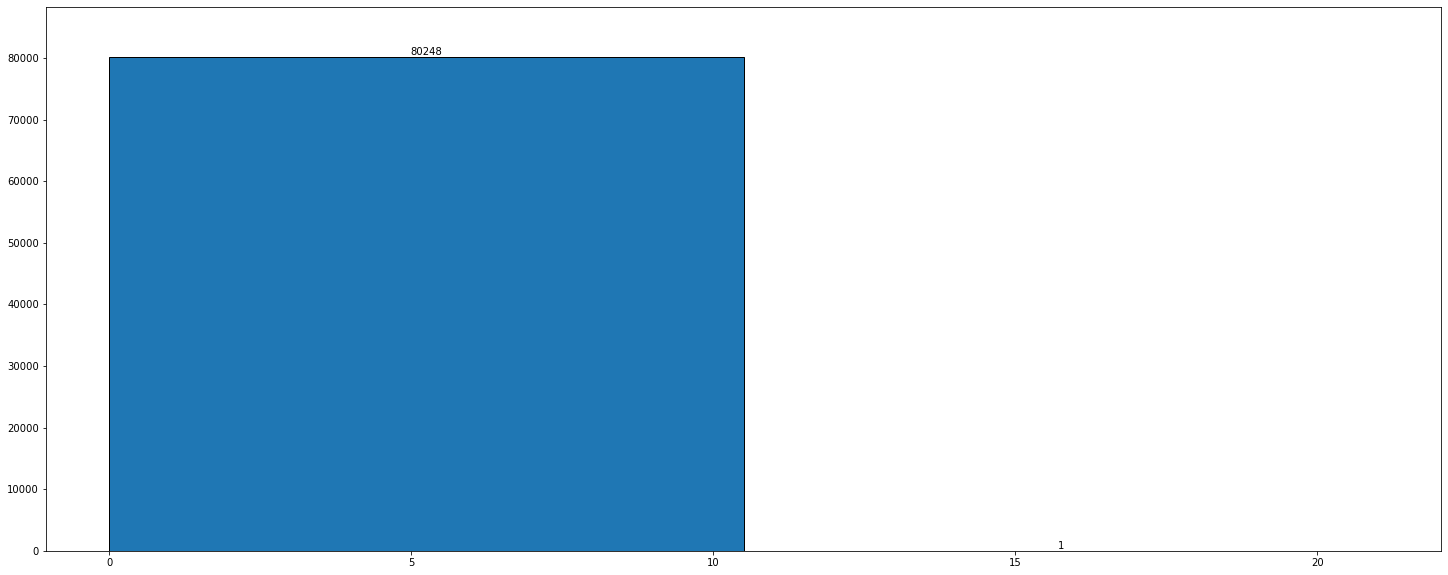

<Figure size 432x288 with 0 Axes>

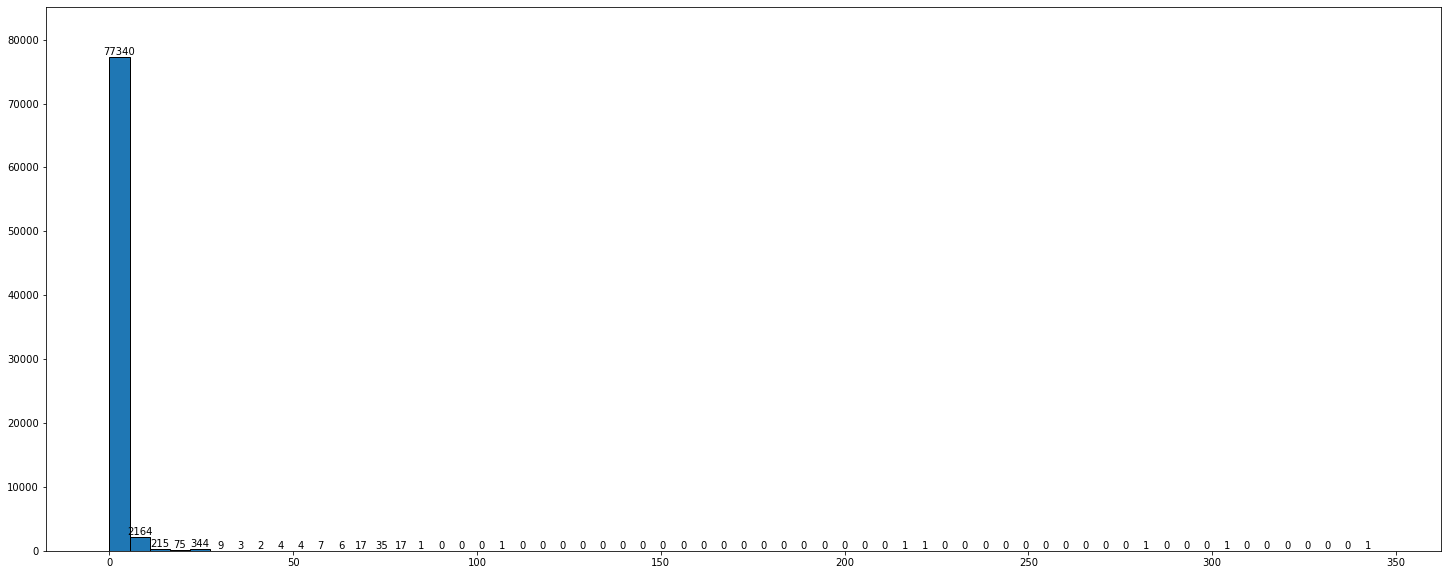

<Figure size 432x288 with 0 Axes>

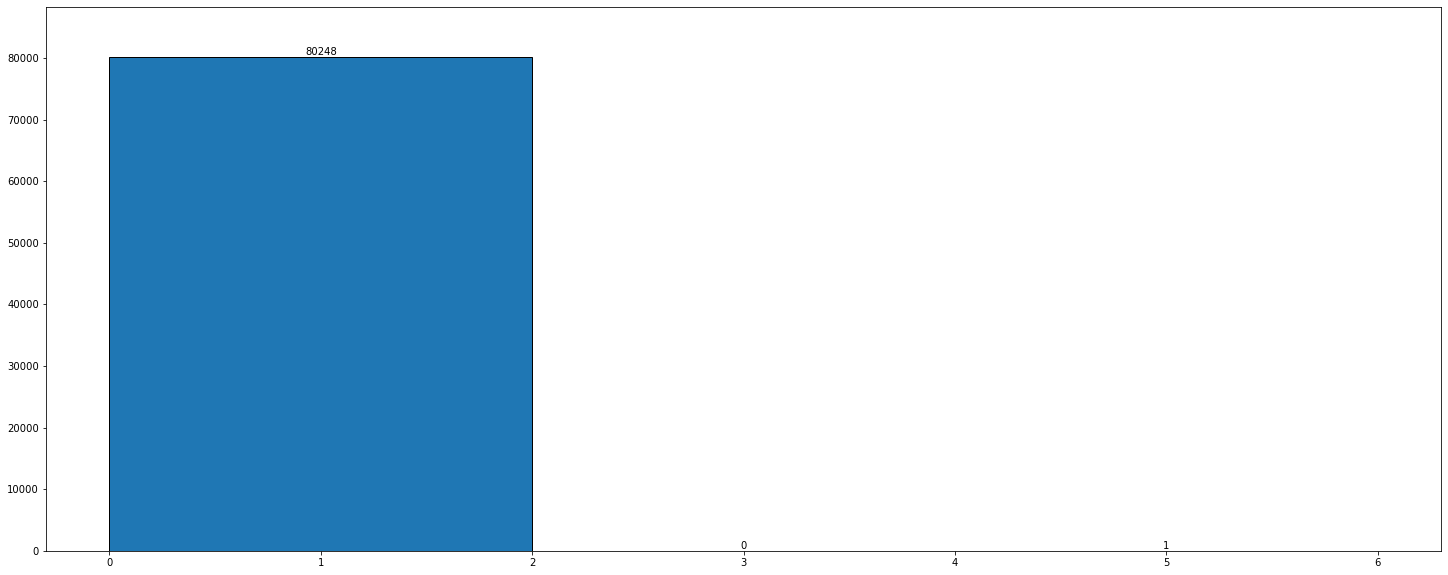

<Figure size 432x288 with 0 Axes>

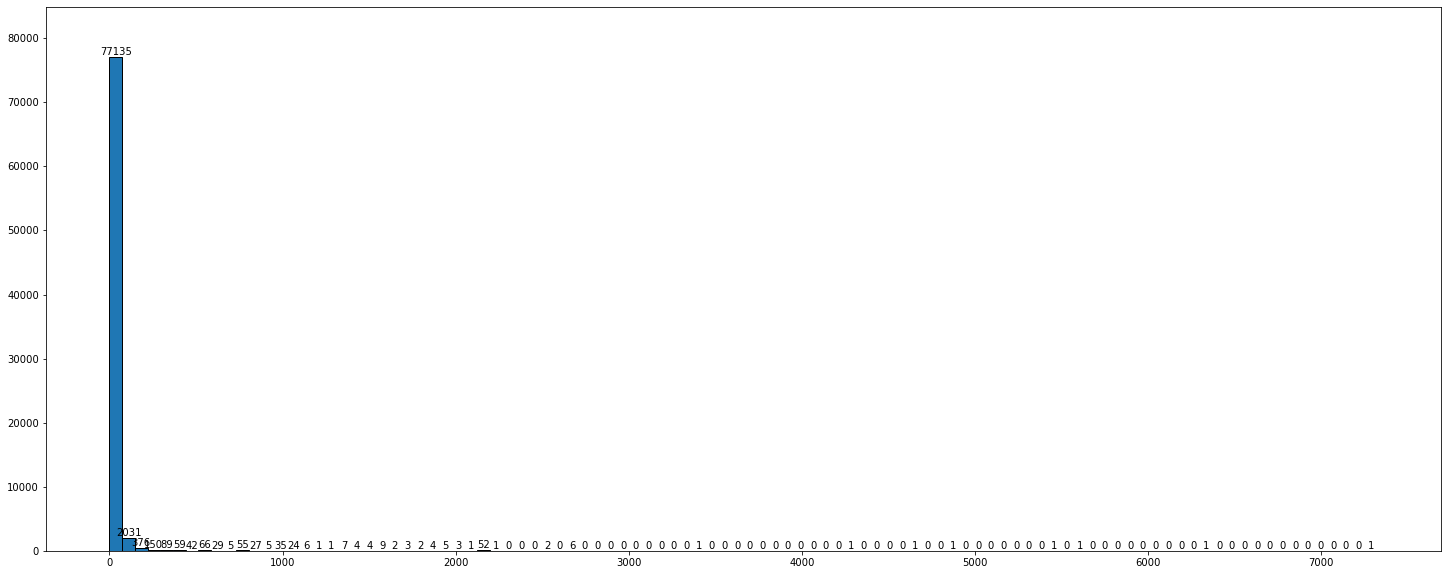

<Figure size 432x288 with 0 Axes>

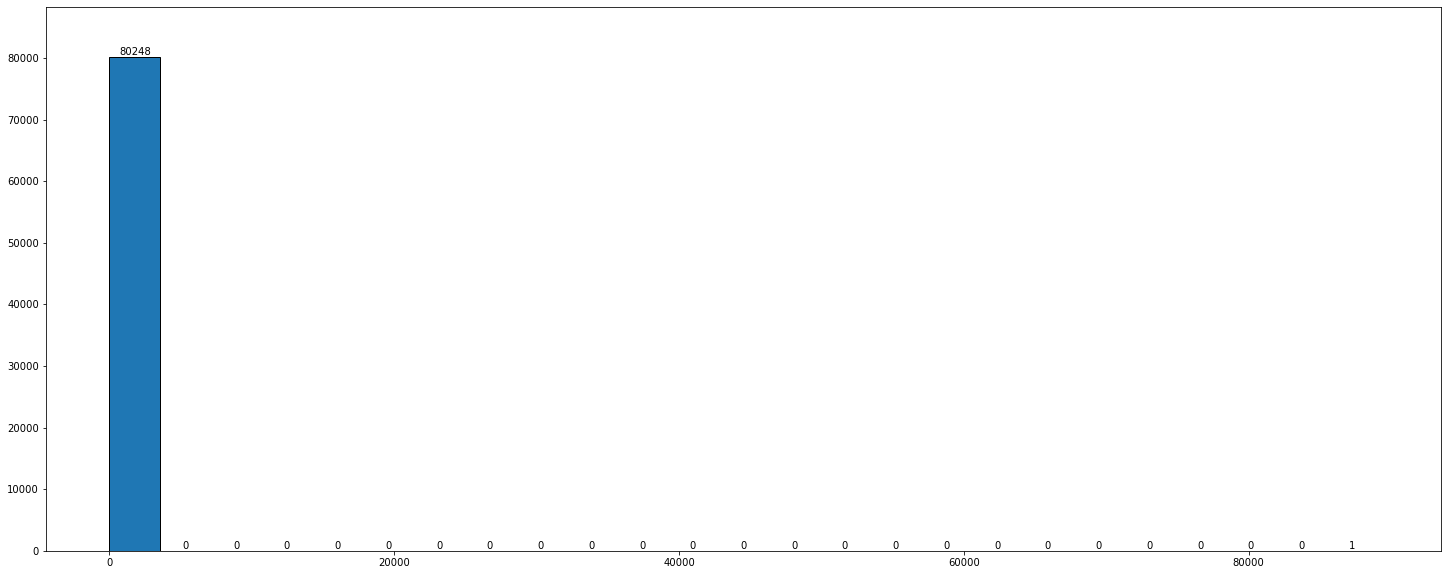

<Figure size 432x288 with 0 Axes>

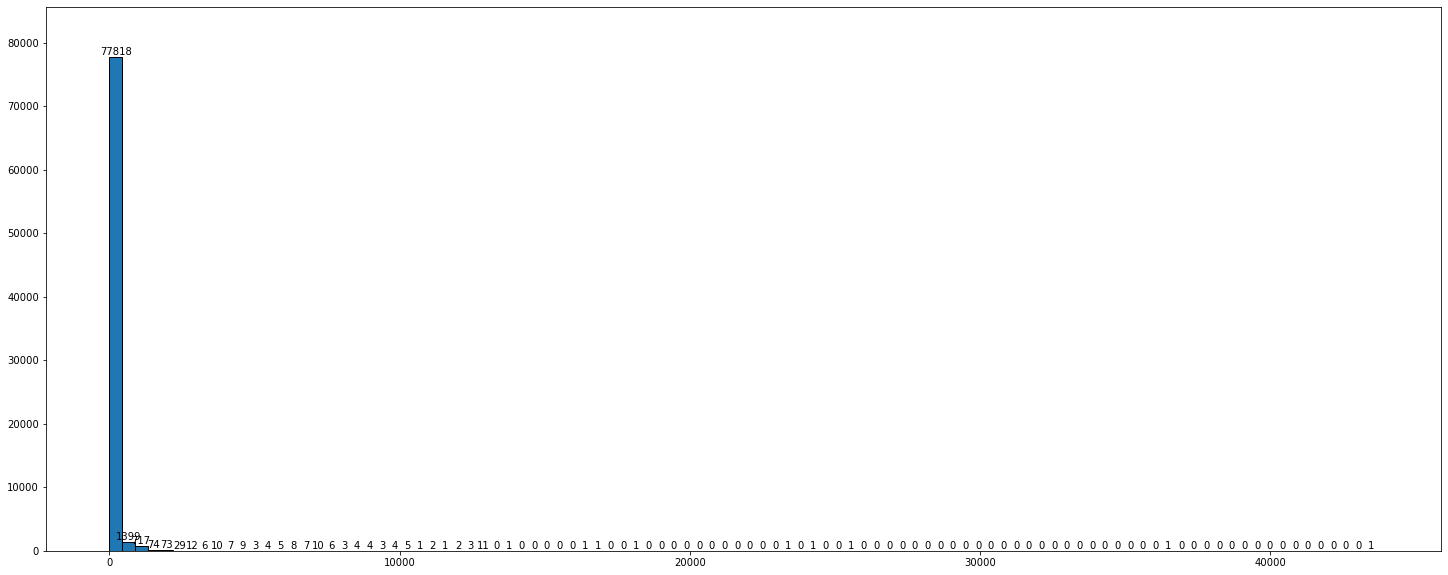

<Figure size 432x288 with 0 Axes>

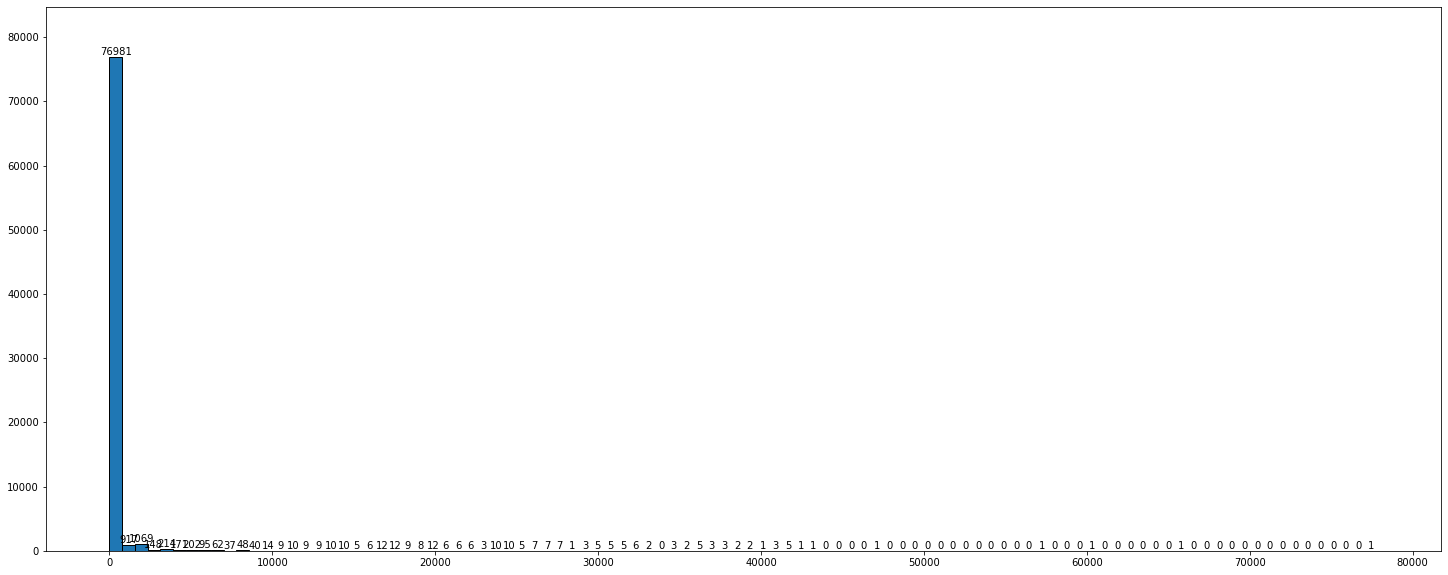

<Figure size 432x288 with 0 Axes>

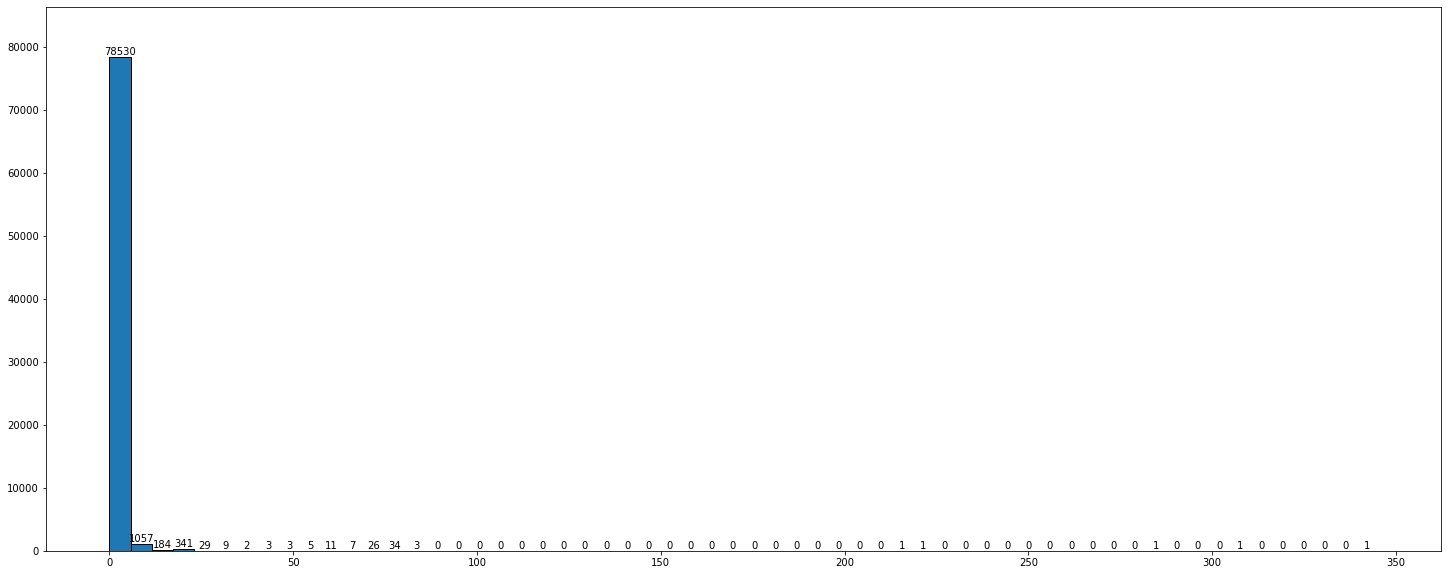

<Figure size 432x288 with 0 Axes>

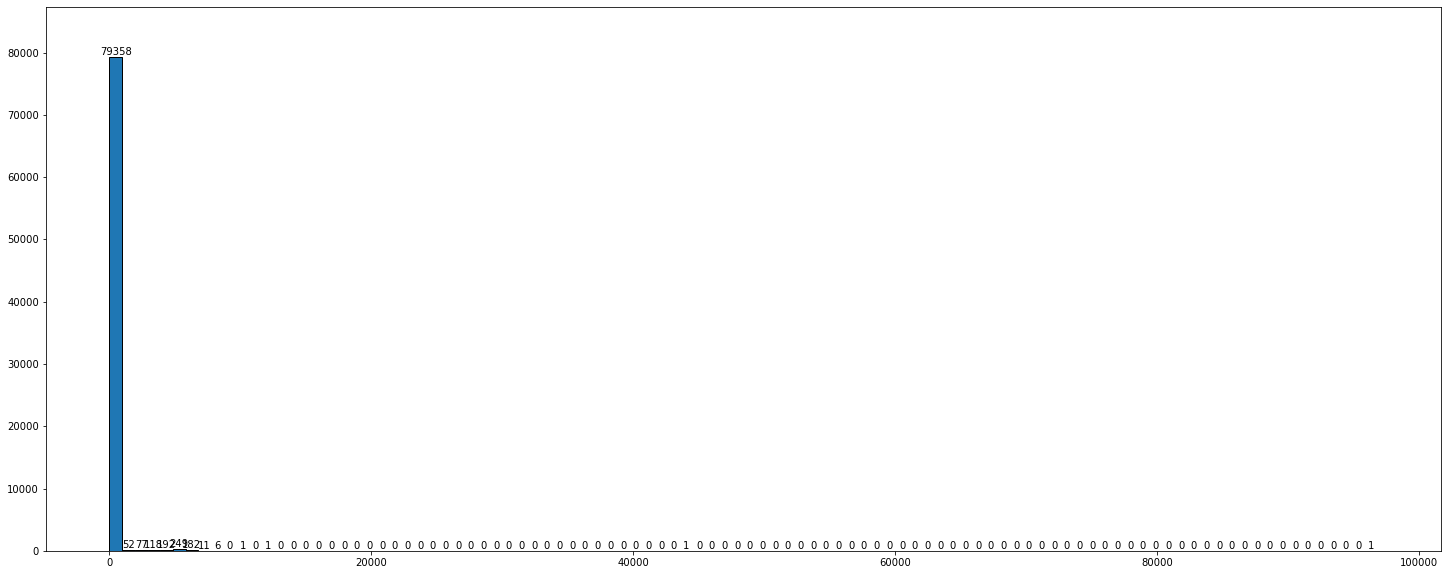

<Figure size 432x288 with 0 Axes>

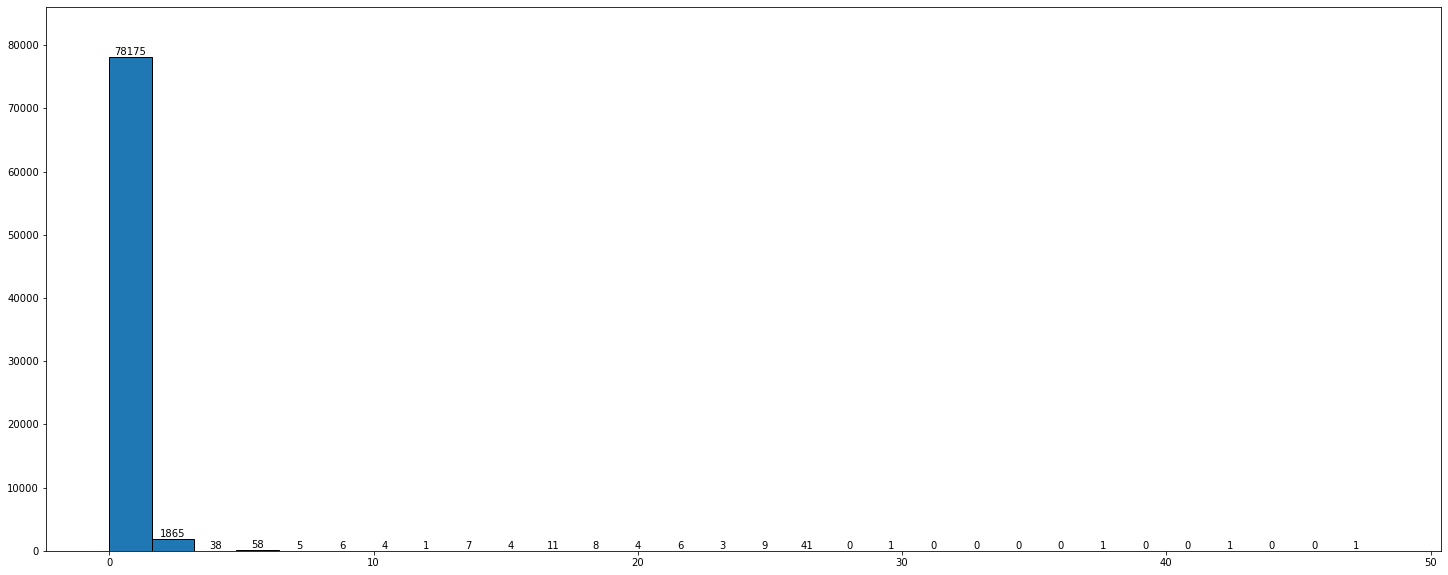

<Figure size 432x288 with 0 Axes>

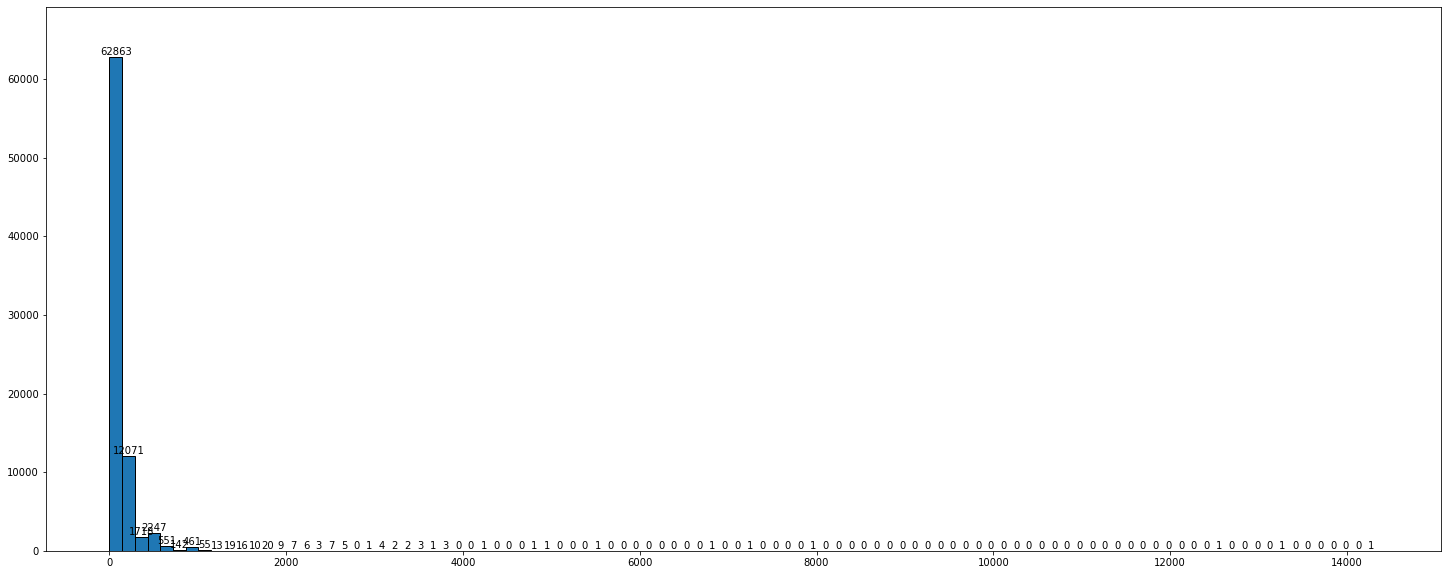

<Figure size 432x288 with 0 Axes>

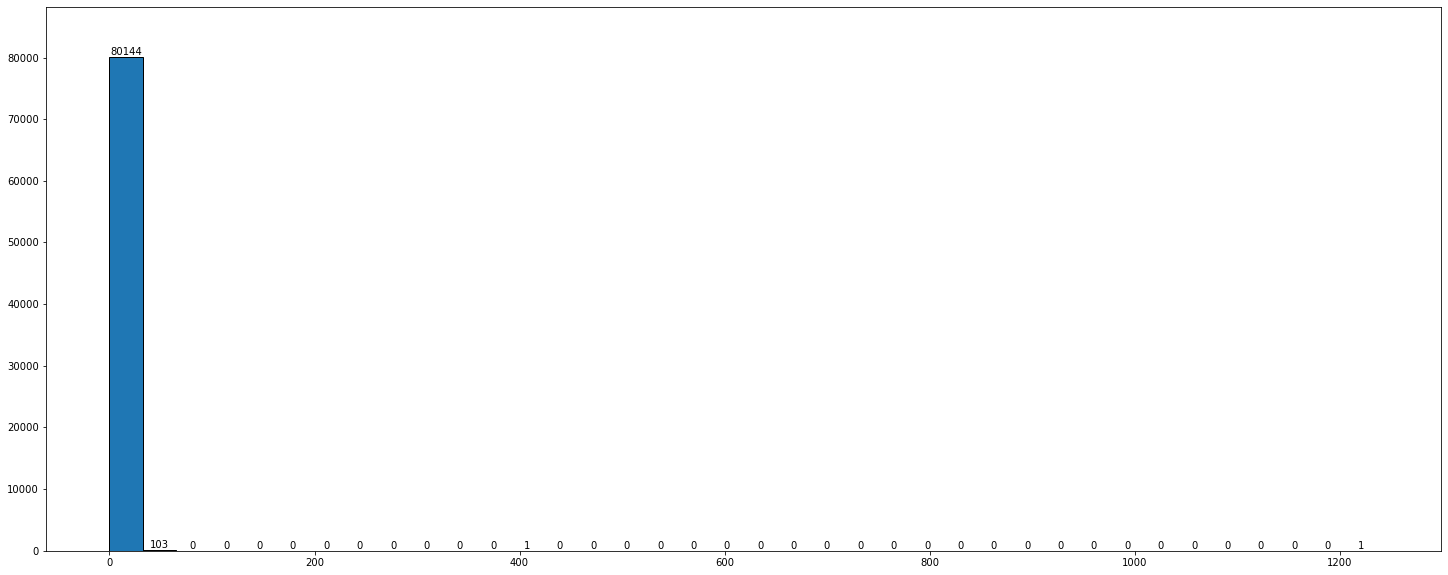

<Figure size 432x288 with 0 Axes>

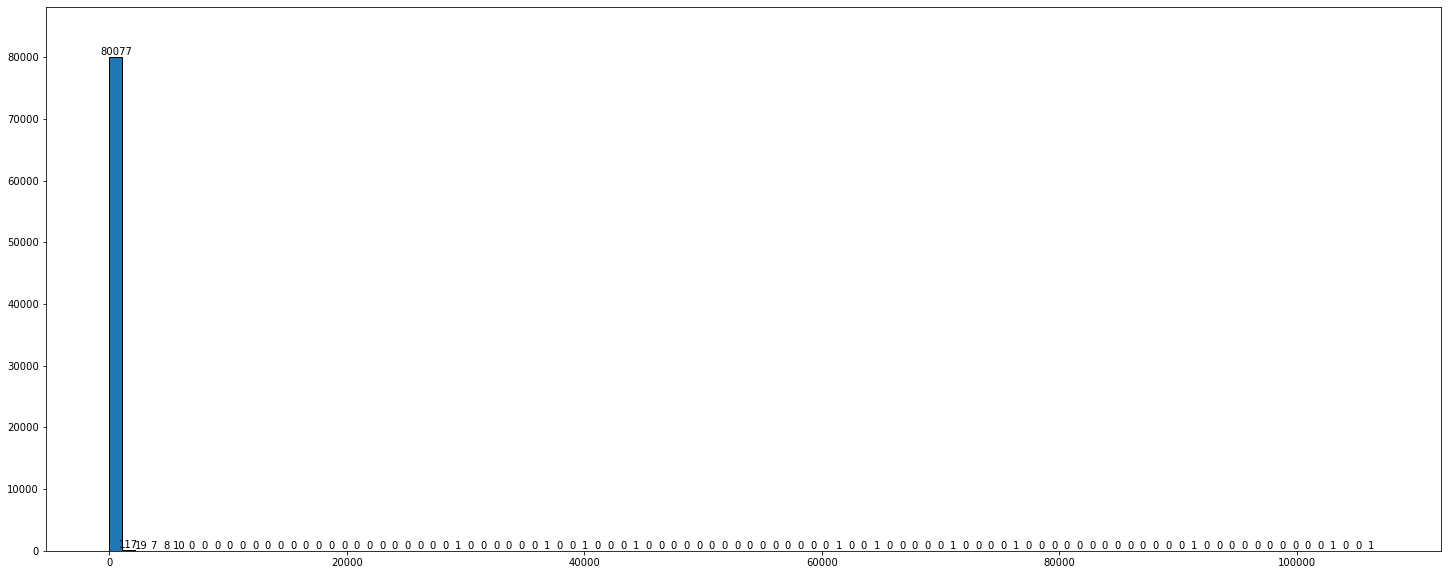

<Figure size 432x288 with 0 Axes>

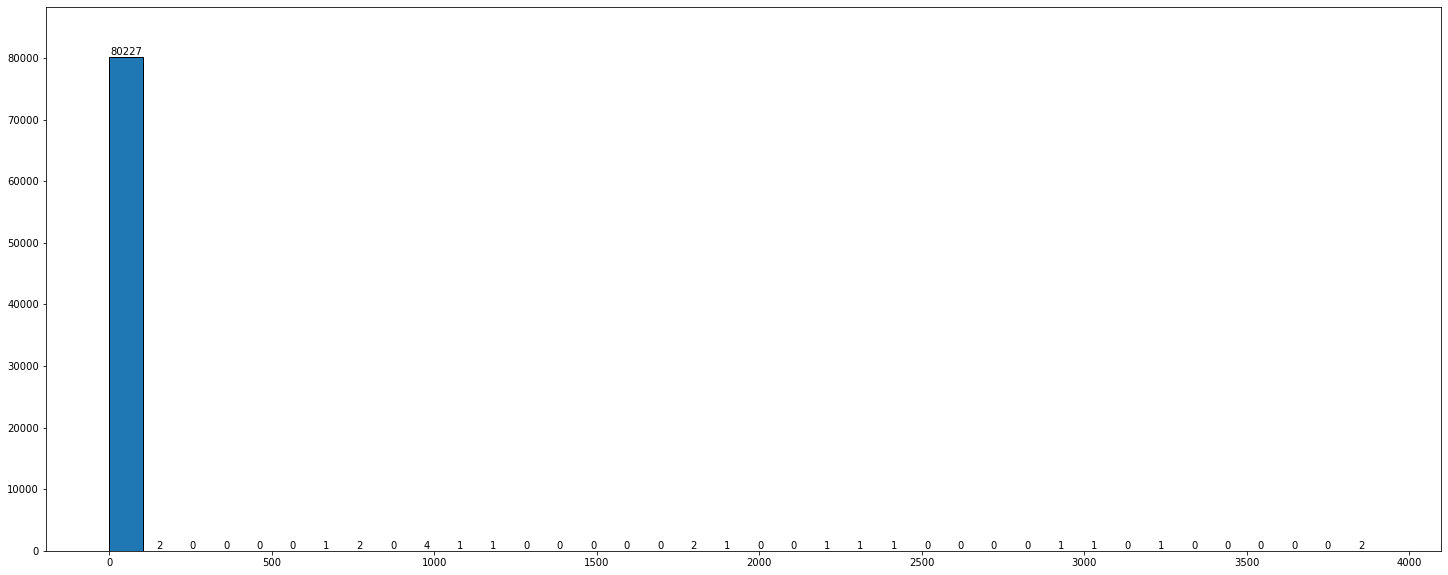

<Figure size 432x288 with 0 Axes>

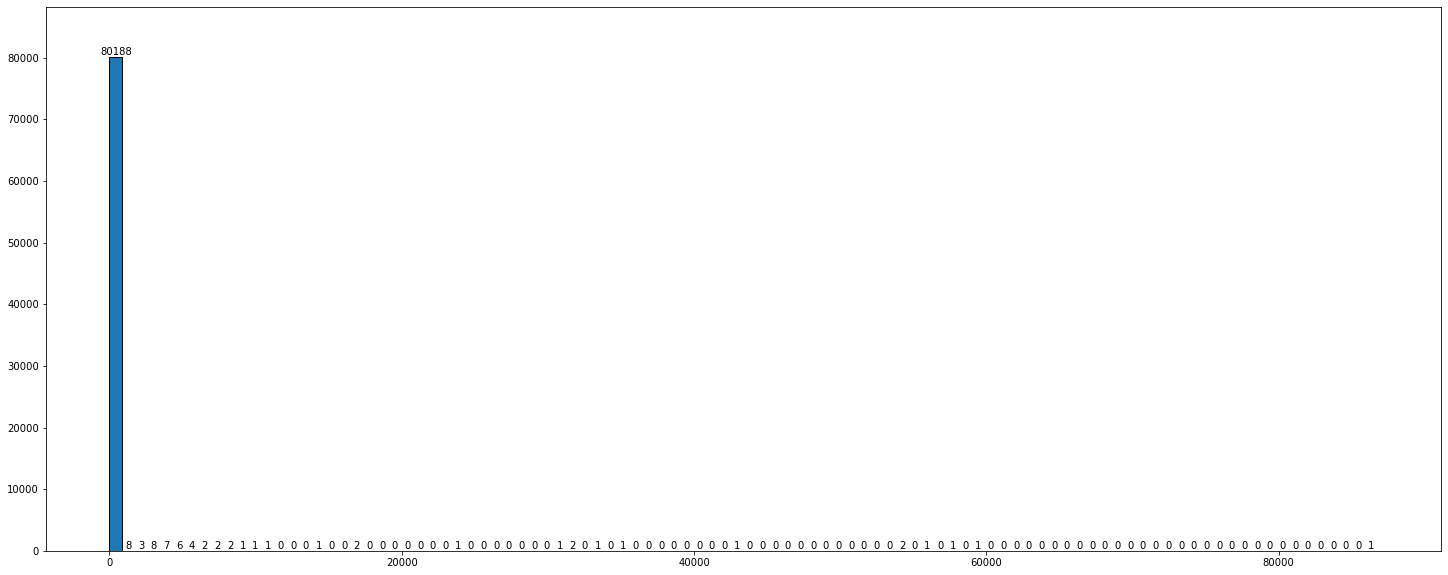

<Figure size 432x288 with 0 Axes>

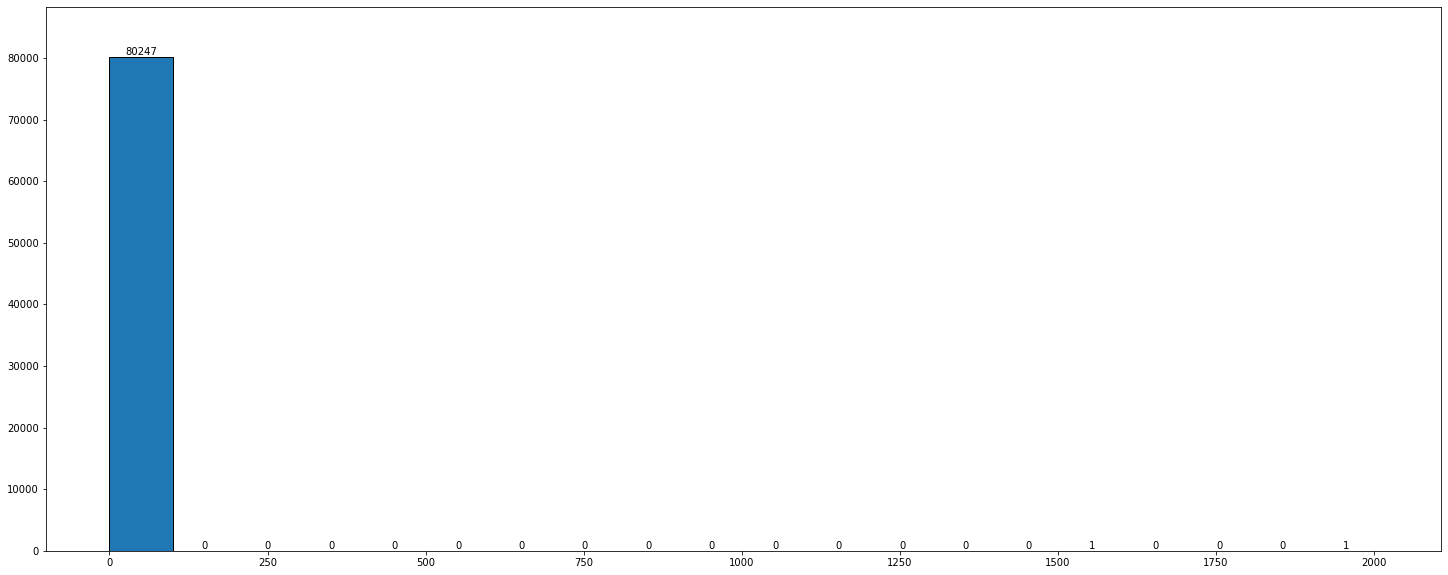

<Figure size 432x288 with 0 Axes>

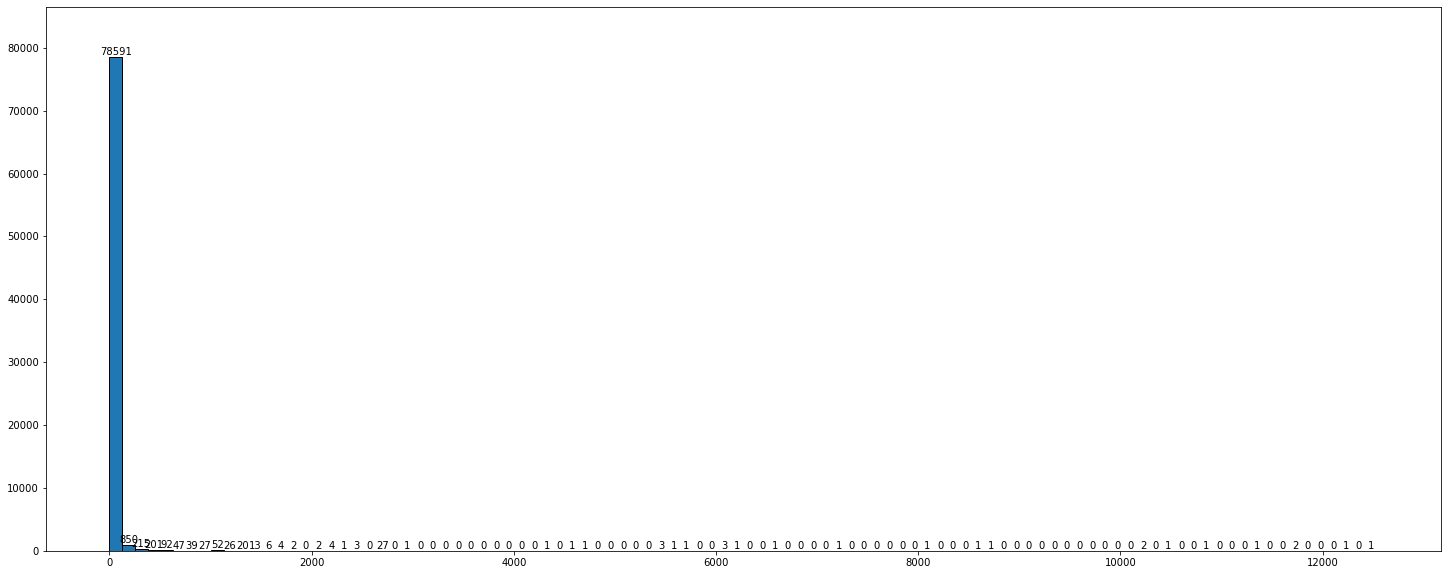

<Figure size 432x288 with 0 Axes>

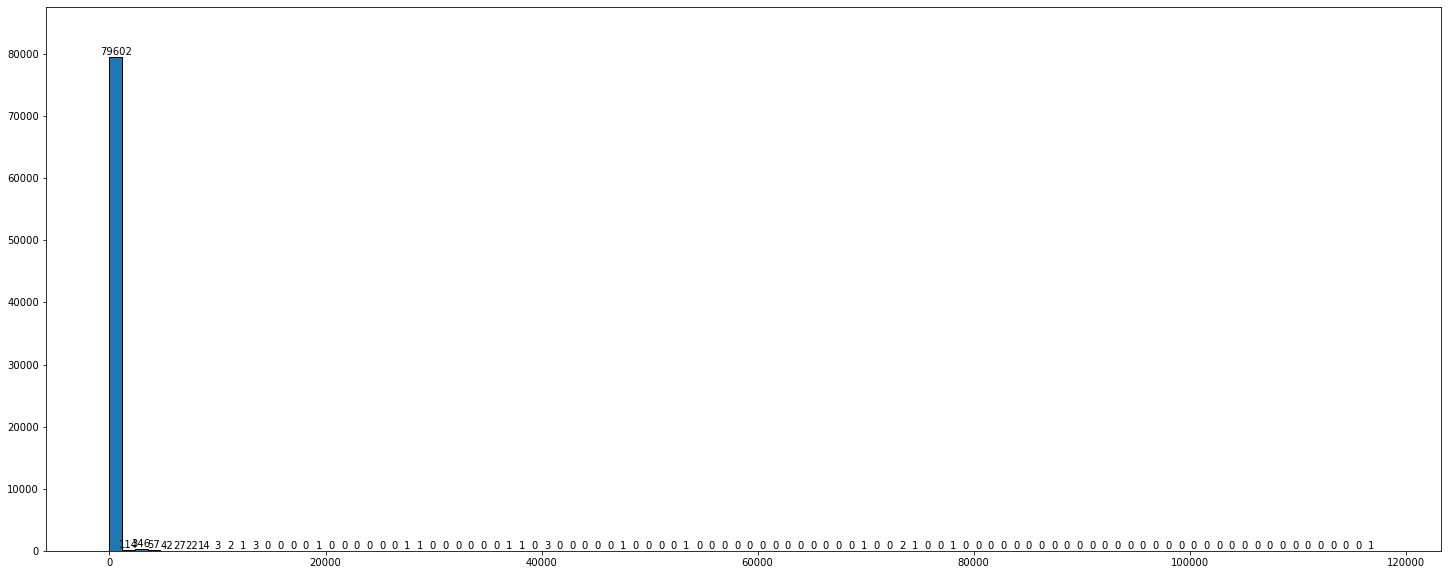

<Figure size 432x288 with 0 Axes>

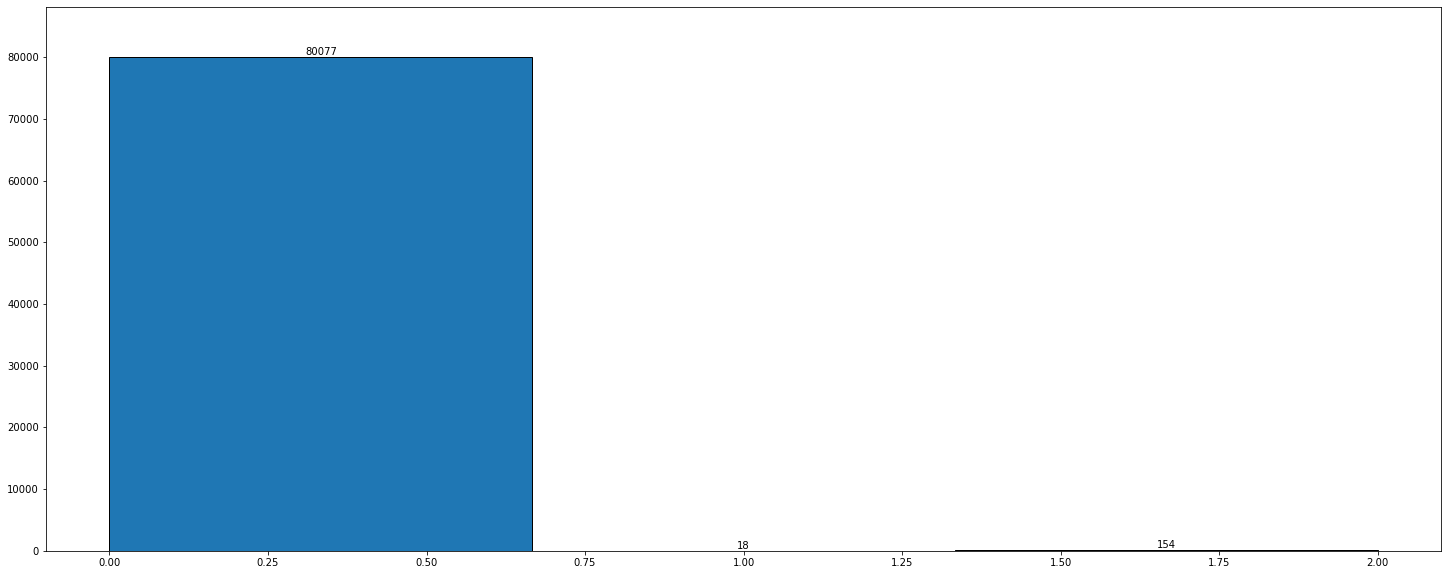

<Figure size 432x288 with 0 Axes>

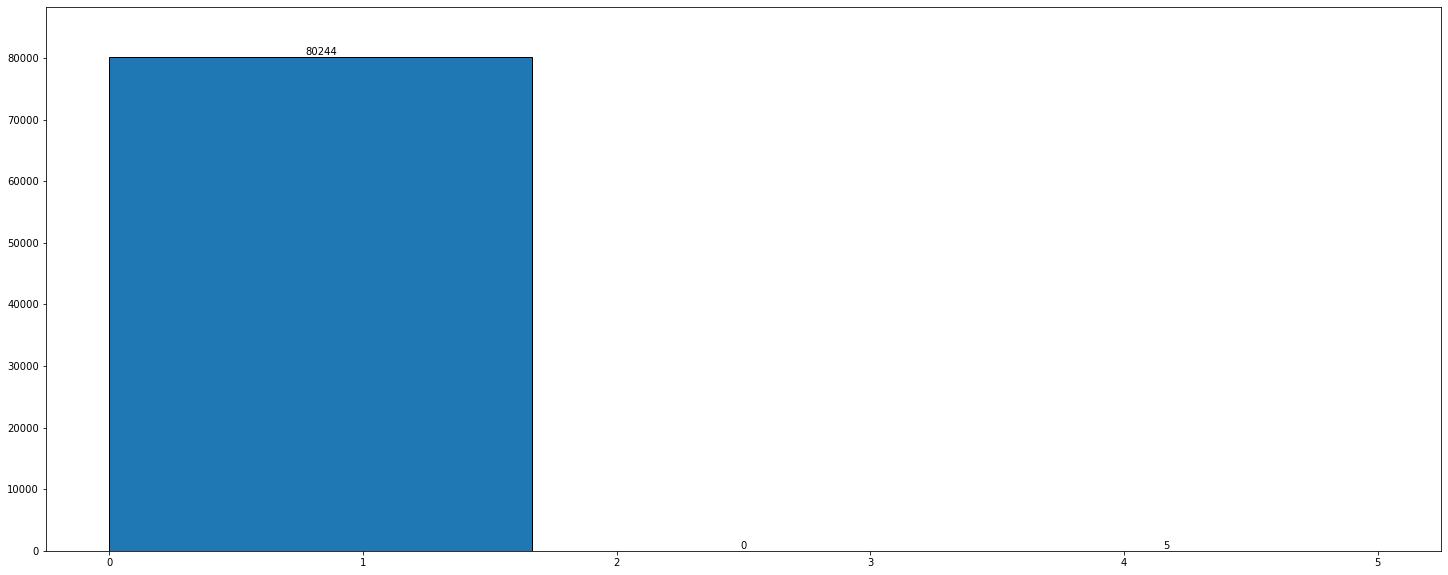

<Figure size 432x288 with 0 Axes>

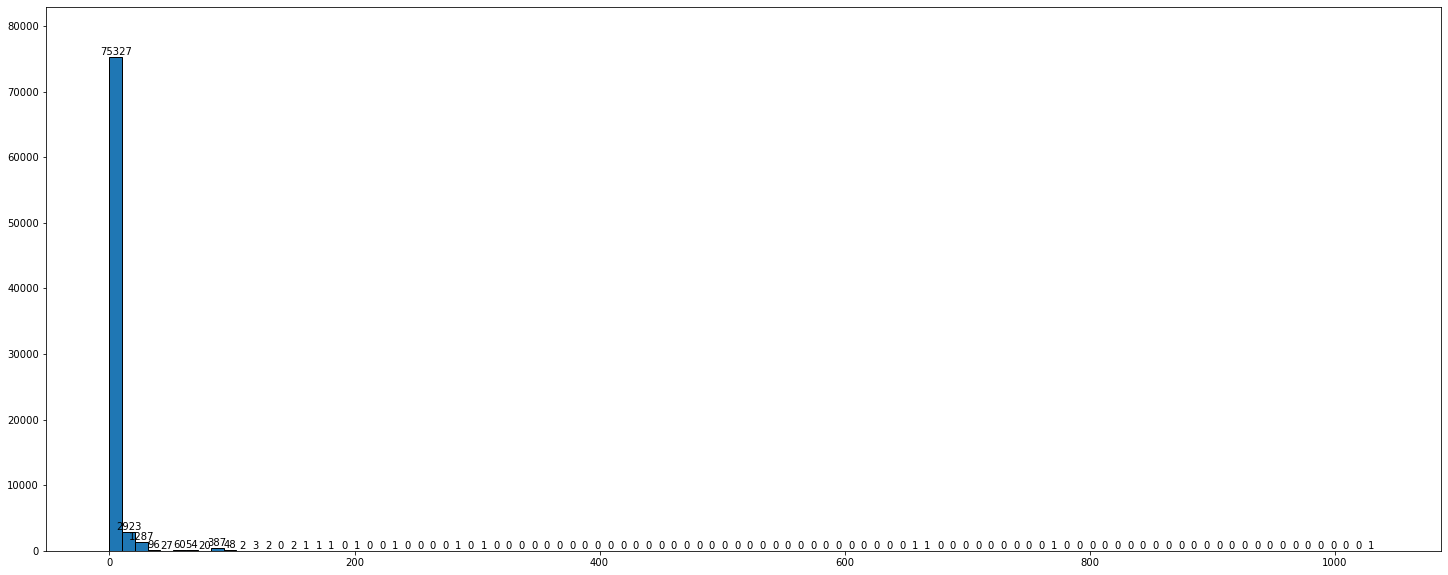

<Figure size 432x288 with 0 Axes>

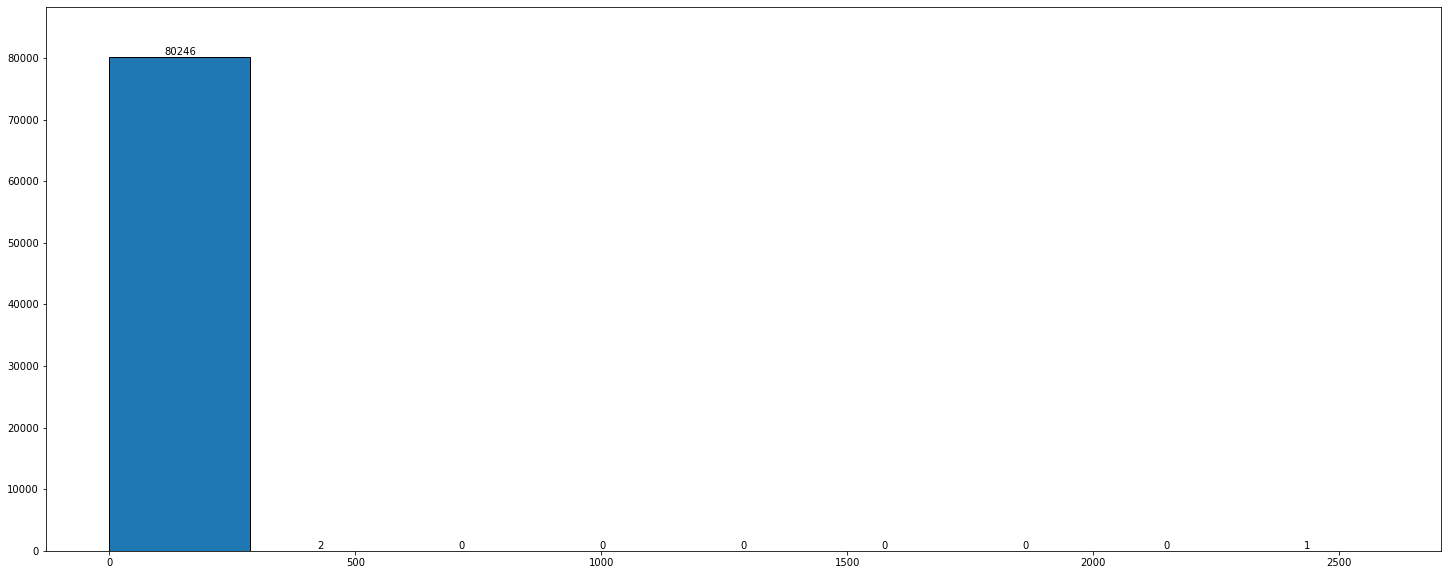

<Figure size 432x288 with 0 Axes>

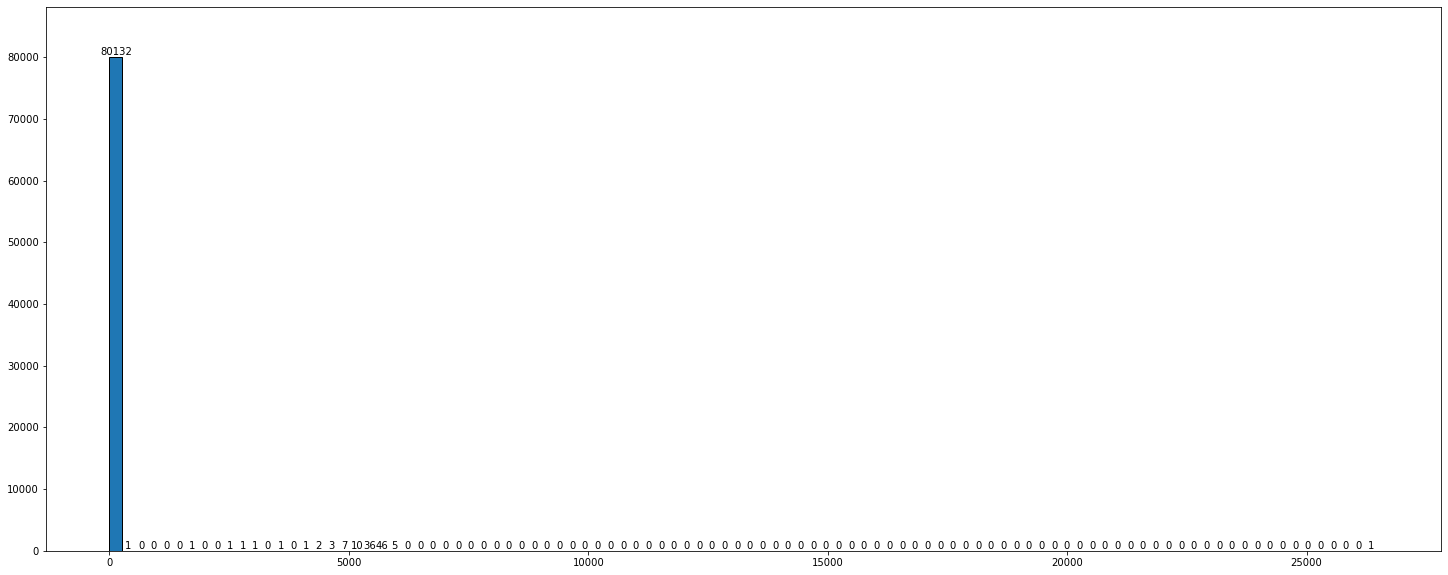

<Figure size 432x288 with 0 Axes>

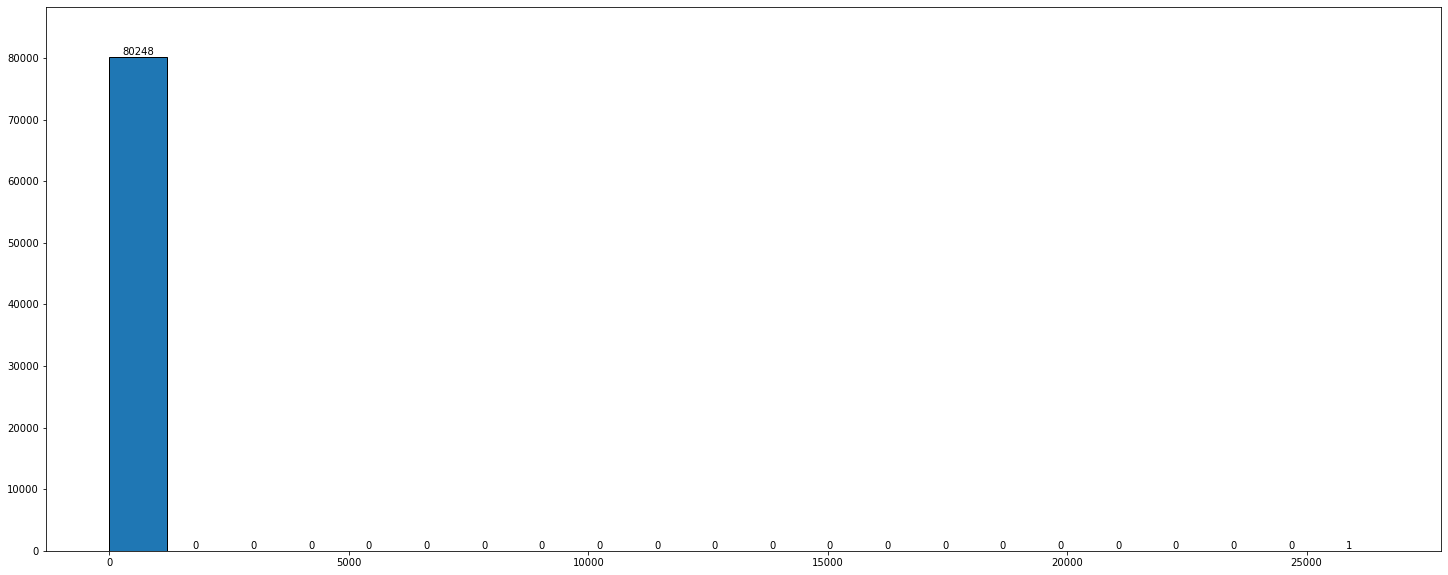

<Figure size 432x288 with 0 Axes>

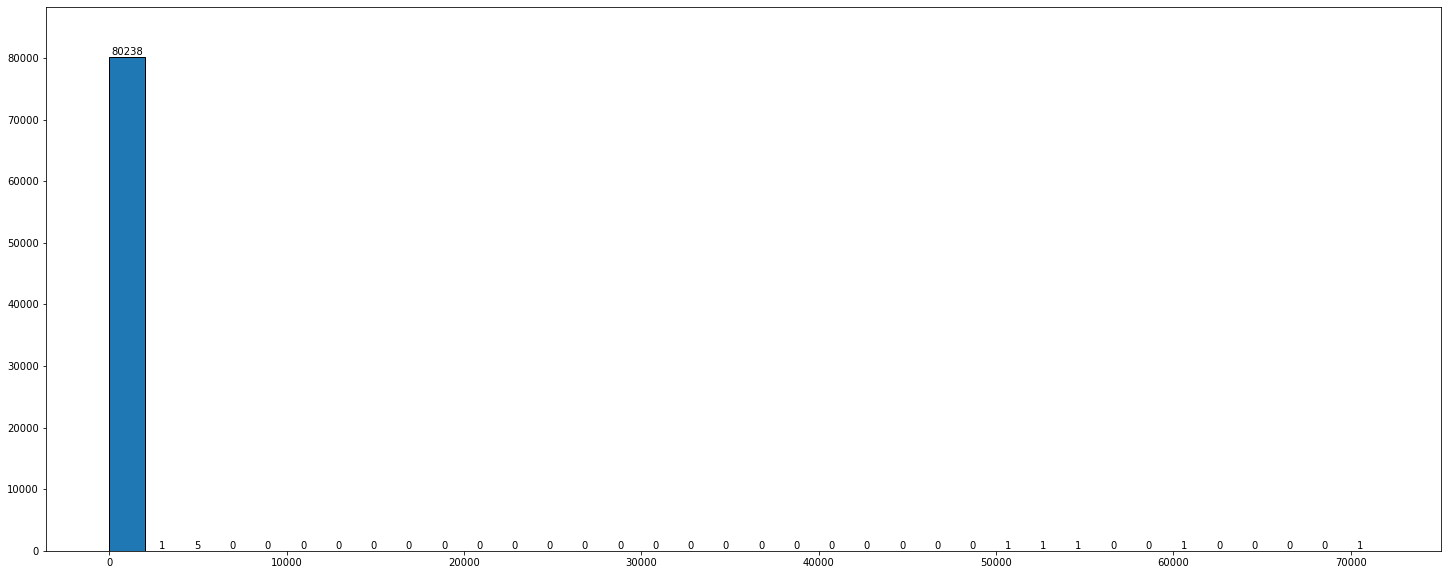

<Figure size 432x288 with 0 Axes>

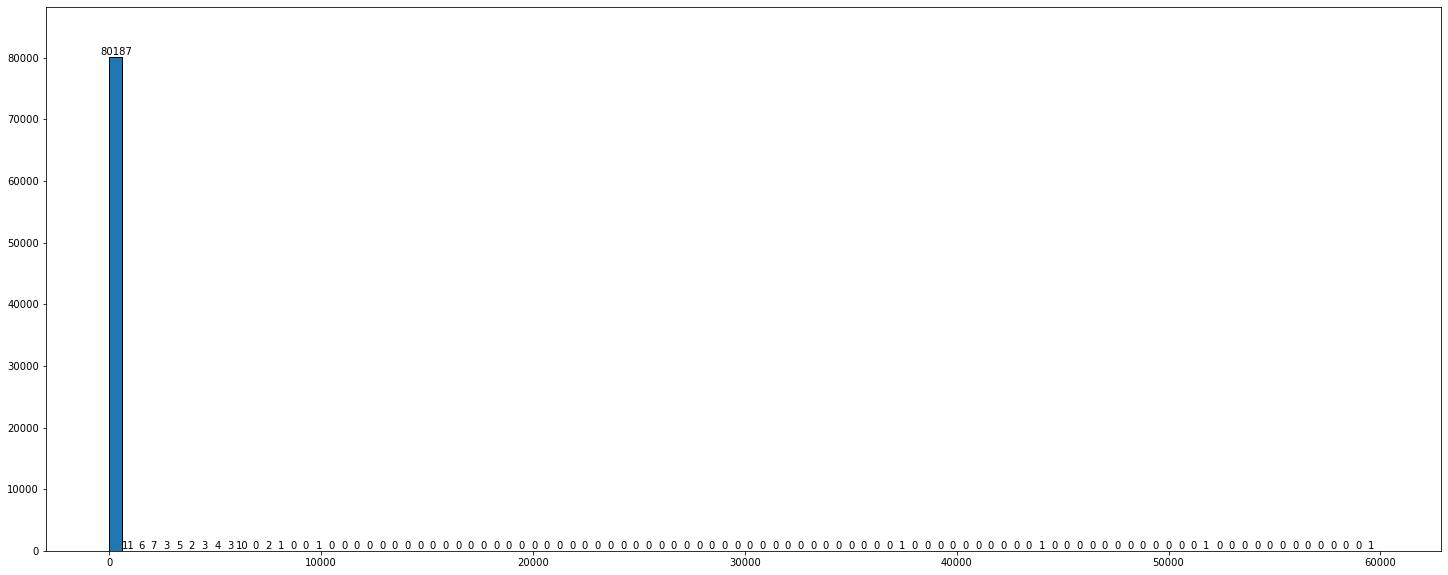

<Figure size 432x288 with 0 Axes>

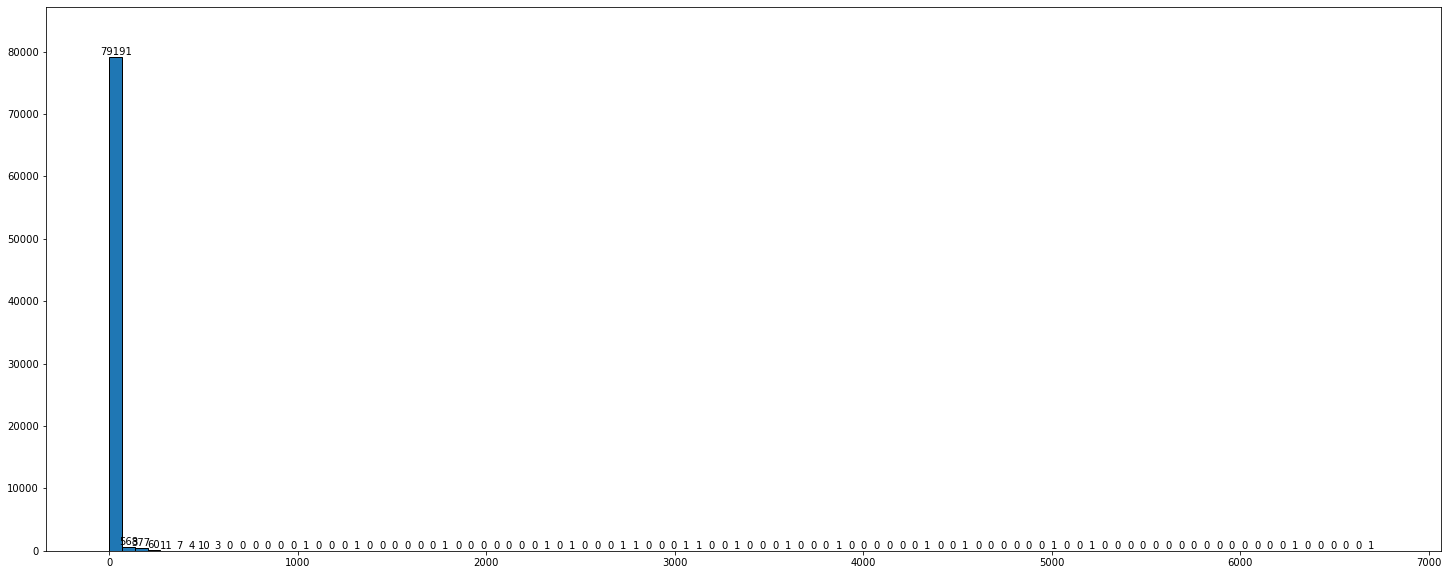

<Figure size 432x288 with 0 Axes>

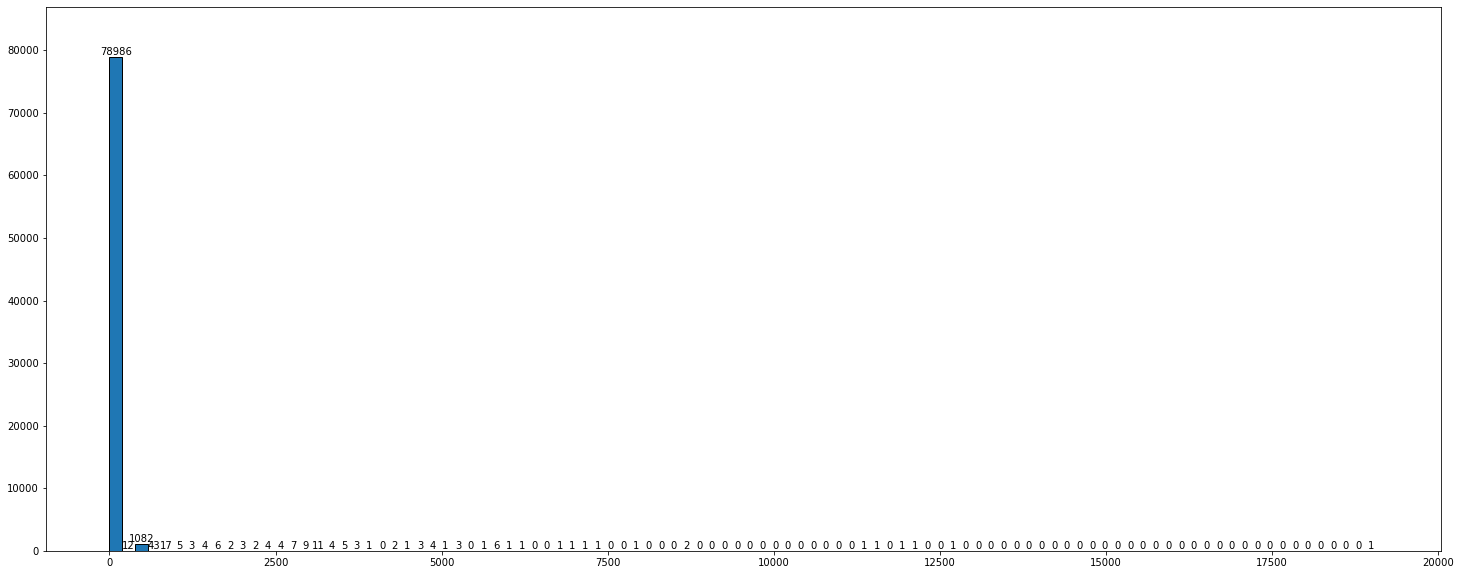

<Figure size 432x288 with 0 Axes>

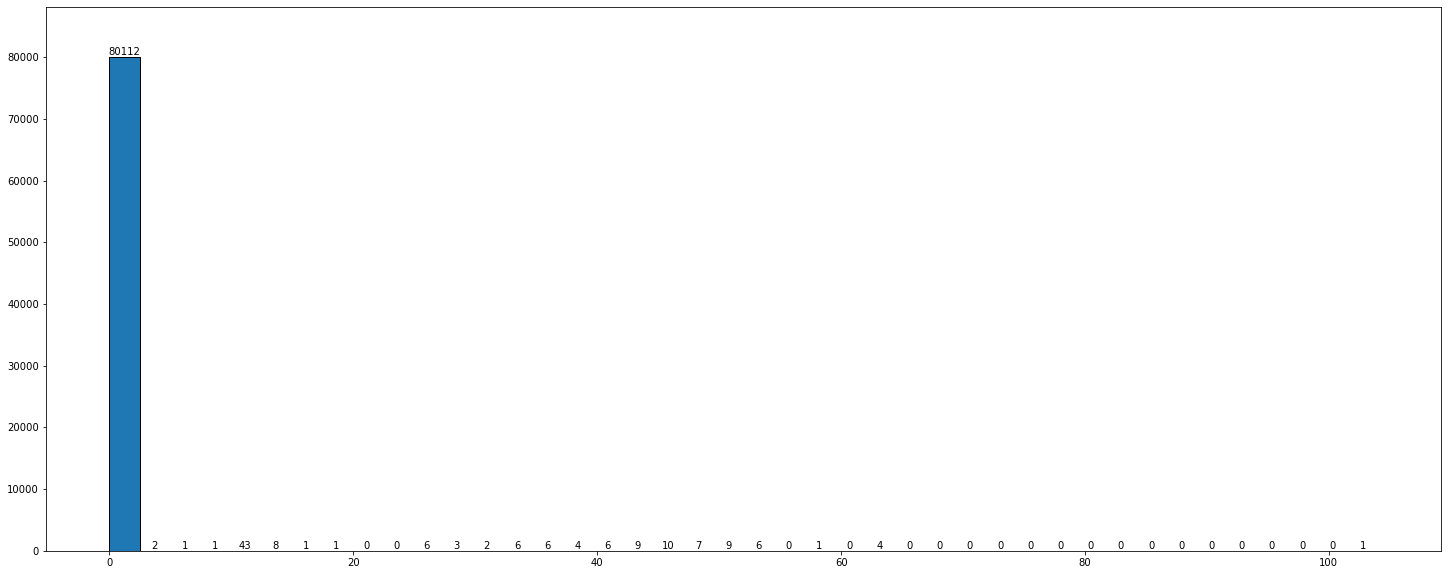

<Figure size 432x288 with 0 Axes>

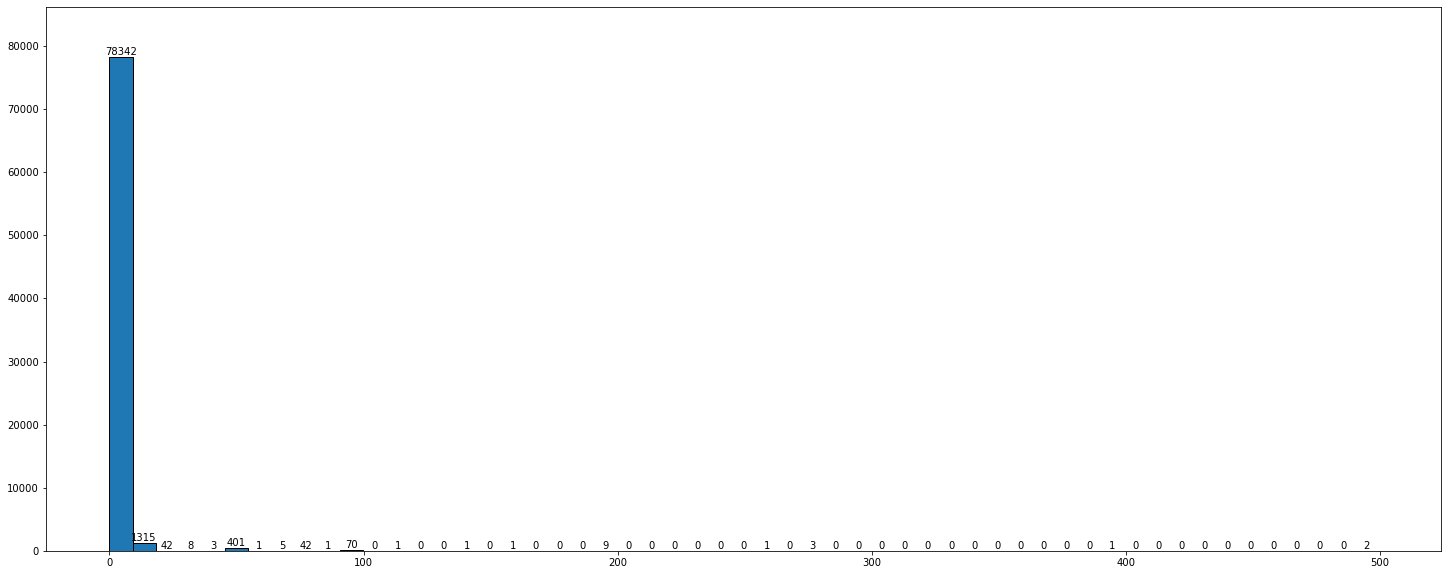

<Figure size 432x288 with 0 Axes>

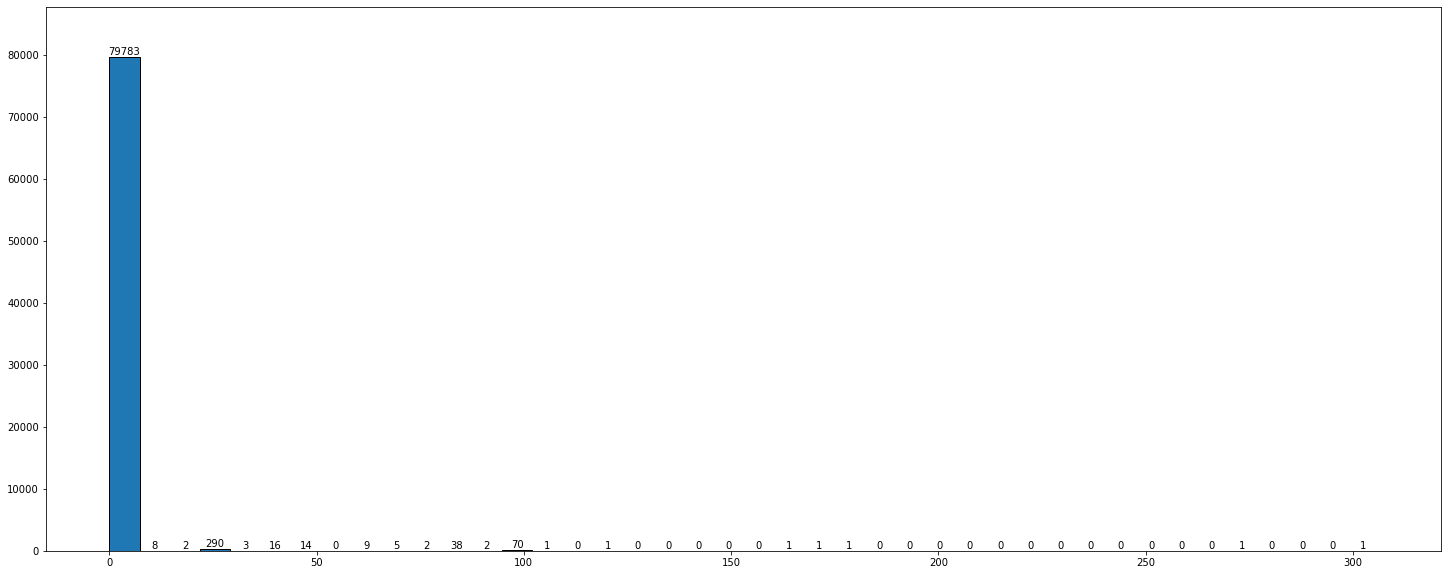

<Figure size 432x288 with 0 Axes>

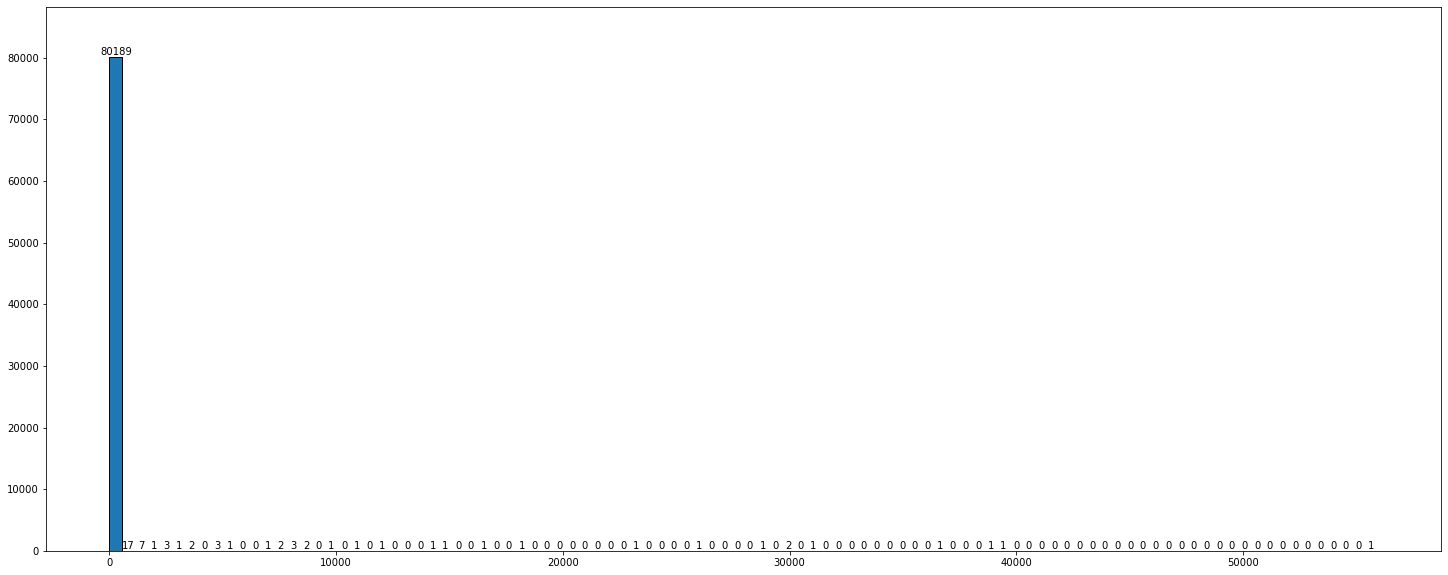

<Figure size 432x288 with 0 Axes>

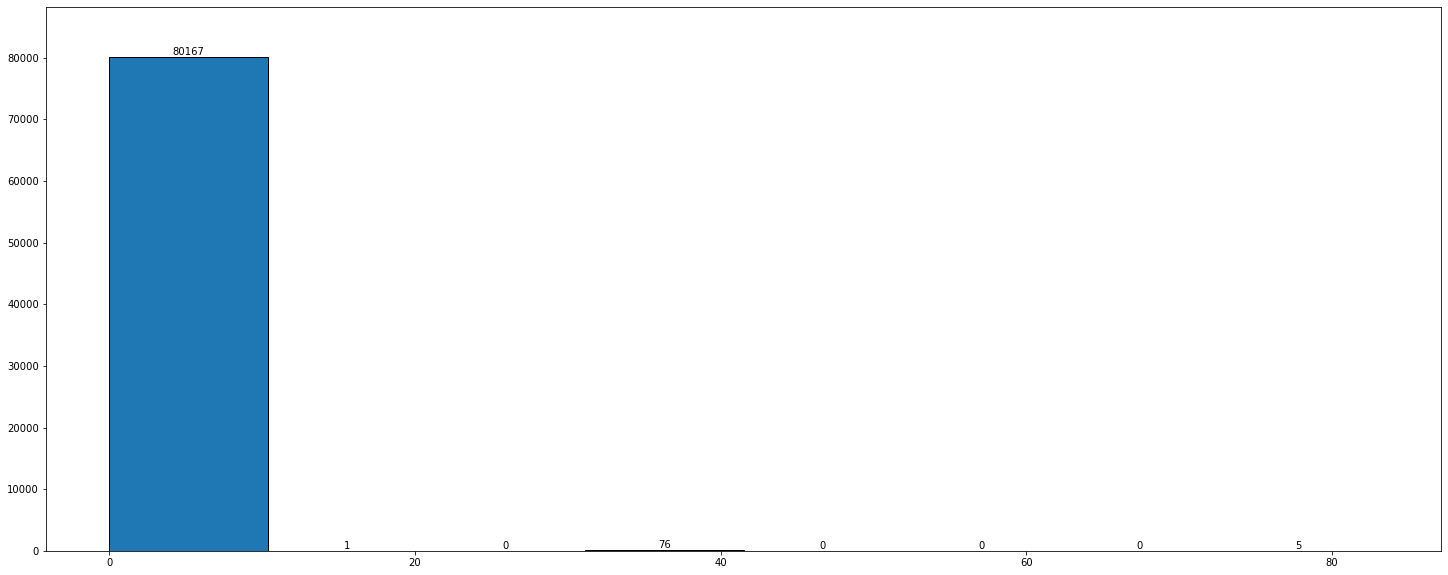

<Figure size 432x288 with 0 Axes>

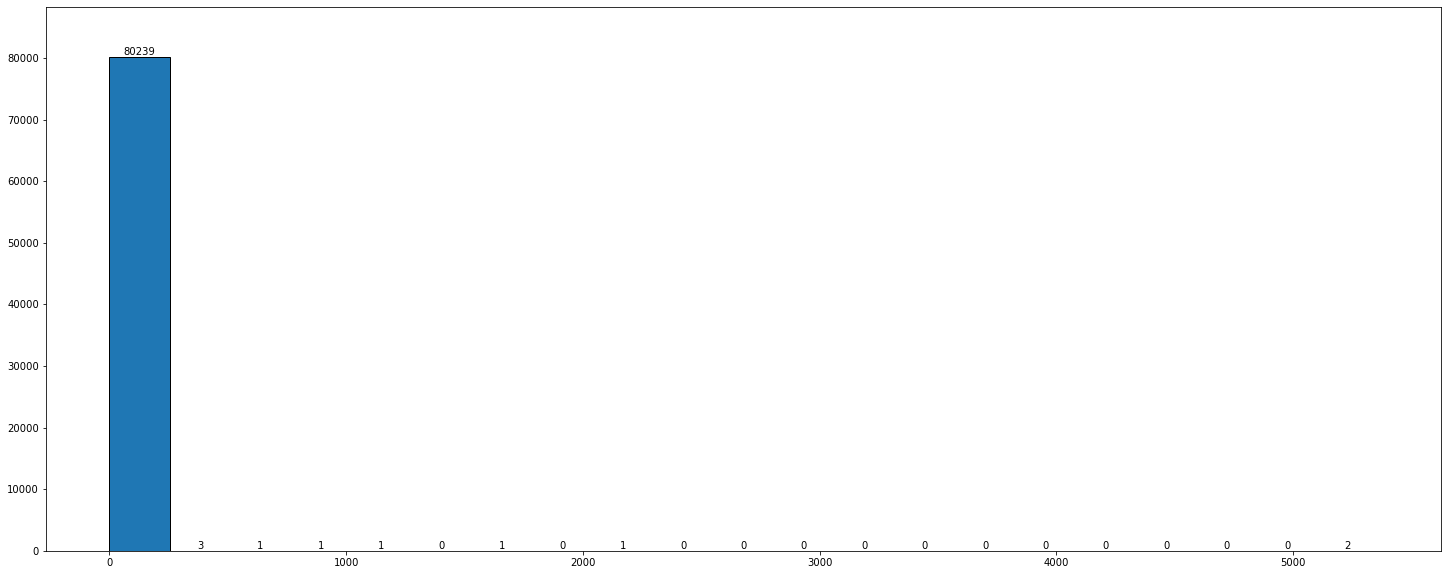

<Figure size 432x288 with 0 Axes>

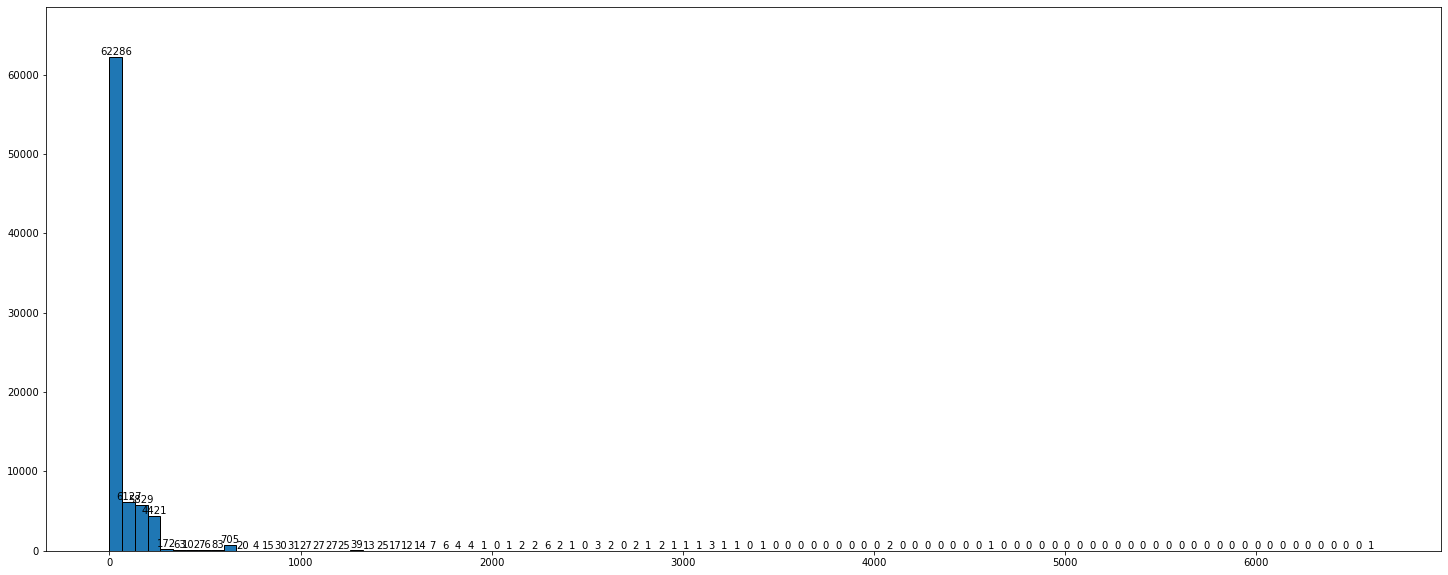

<Figure size 432x288 with 0 Axes>

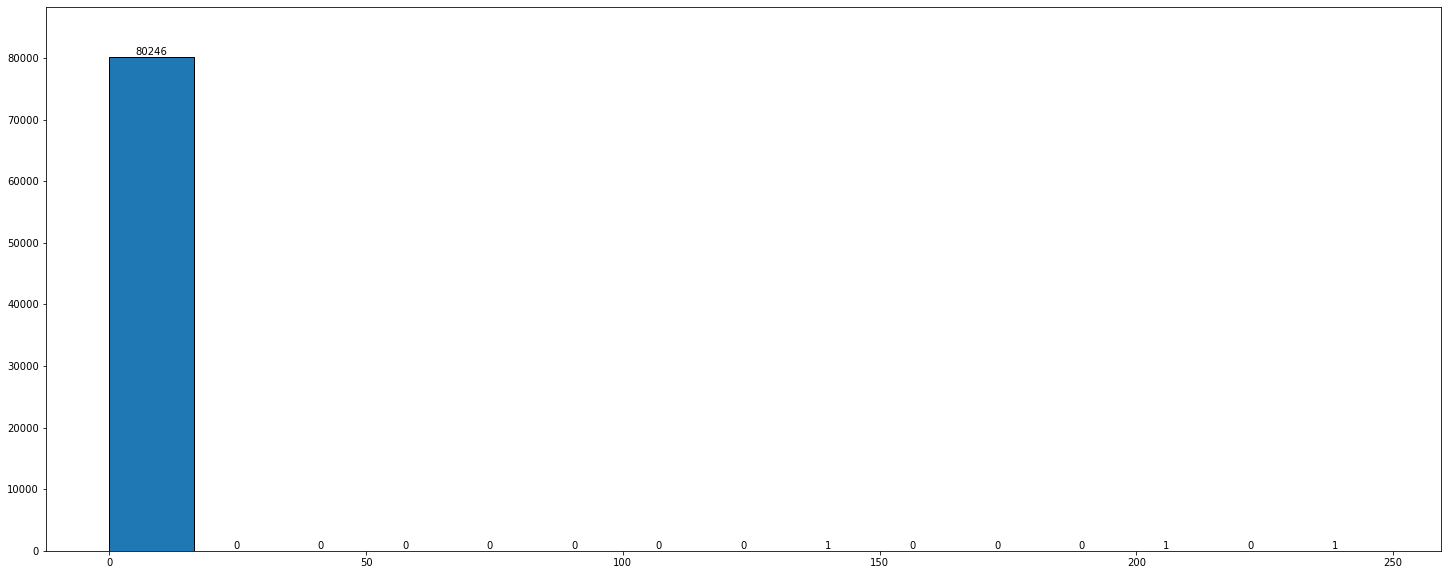

<Figure size 432x288 with 0 Axes>

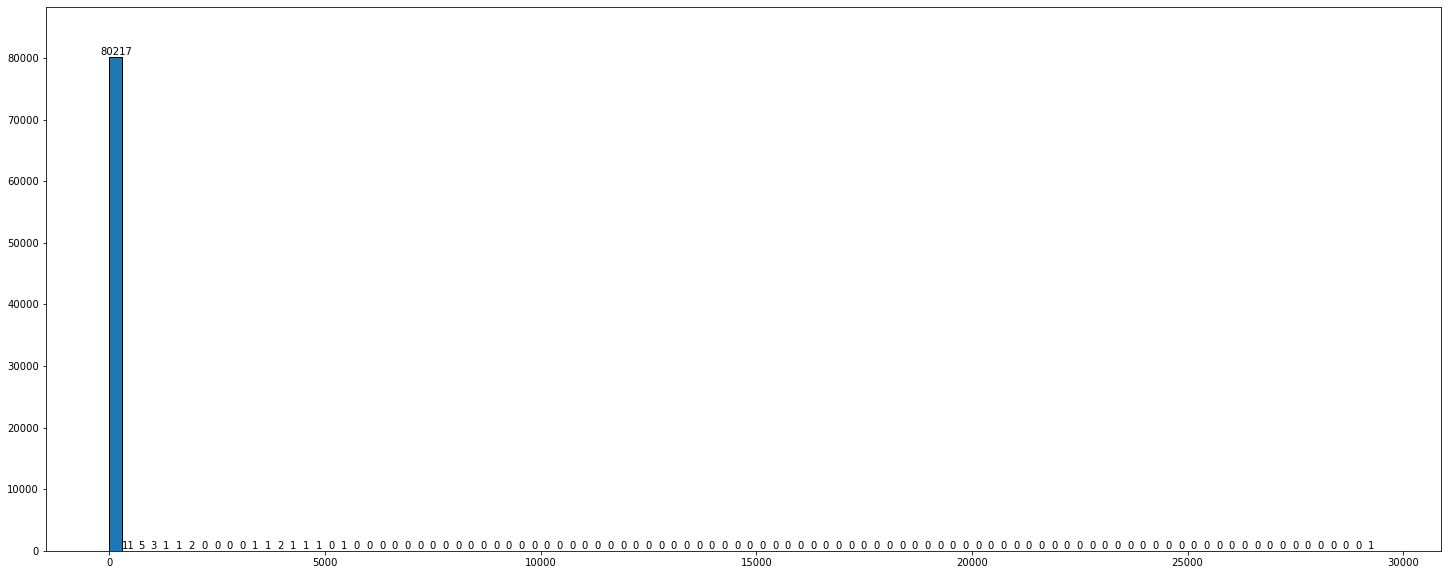

<Figure size 432x288 with 0 Axes>

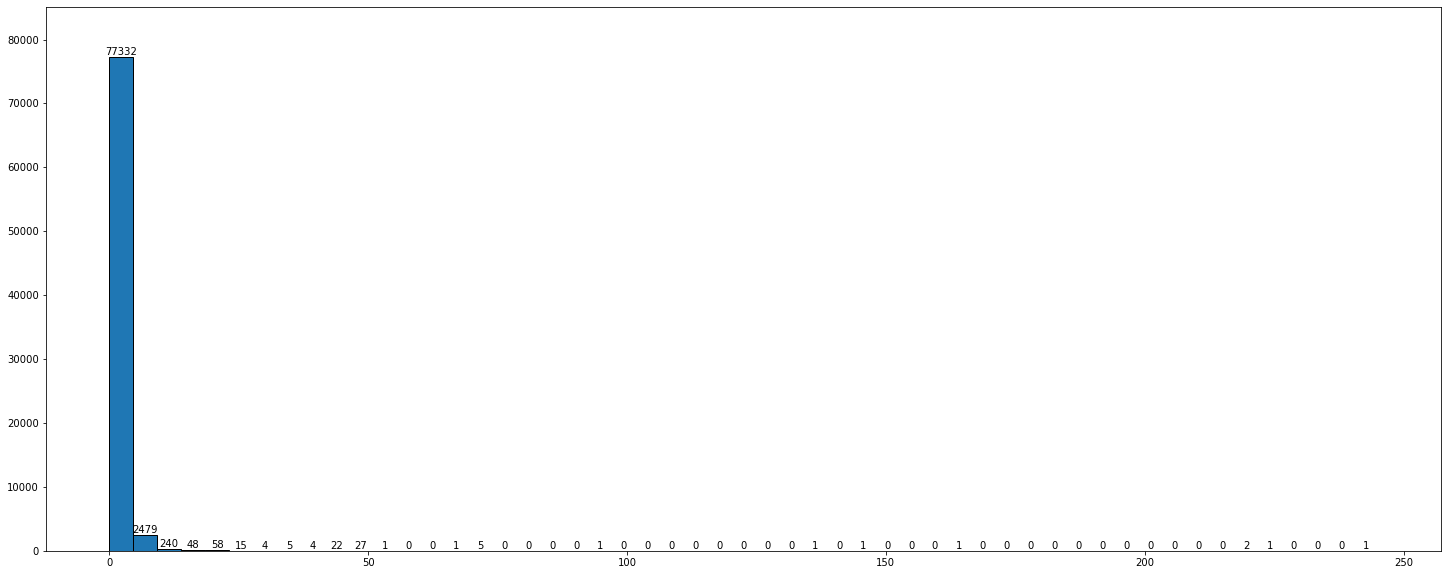

<Figure size 432x288 with 0 Axes>

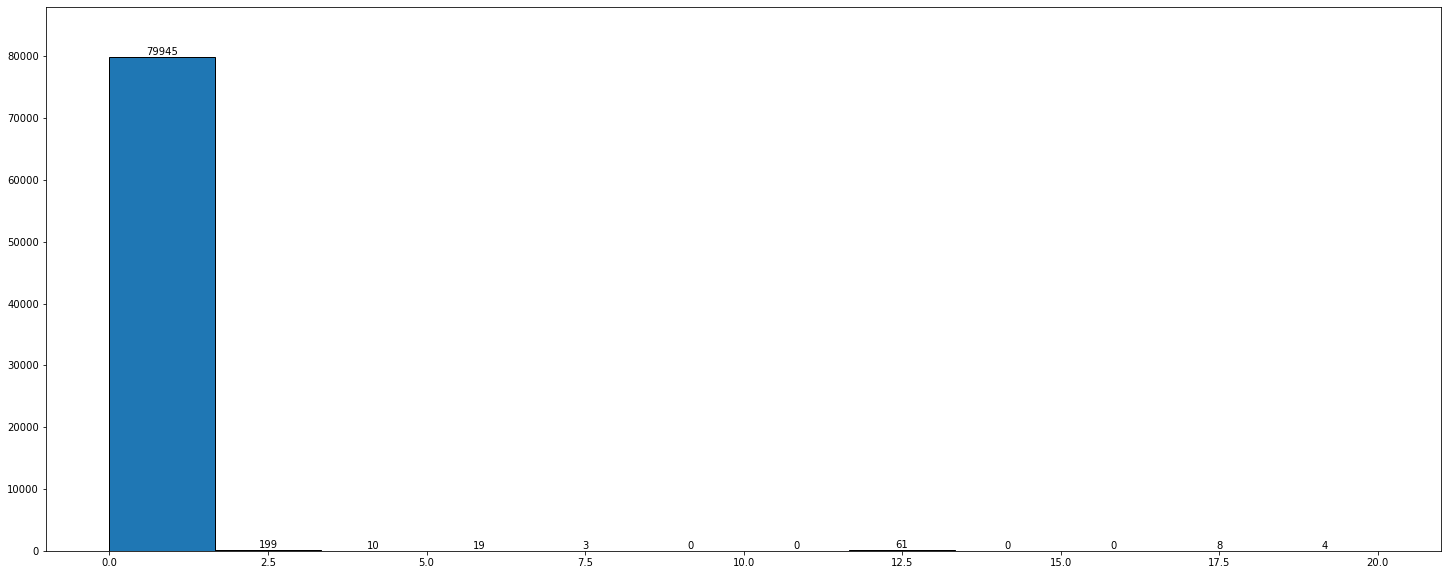

<Figure size 432x288 with 0 Axes>

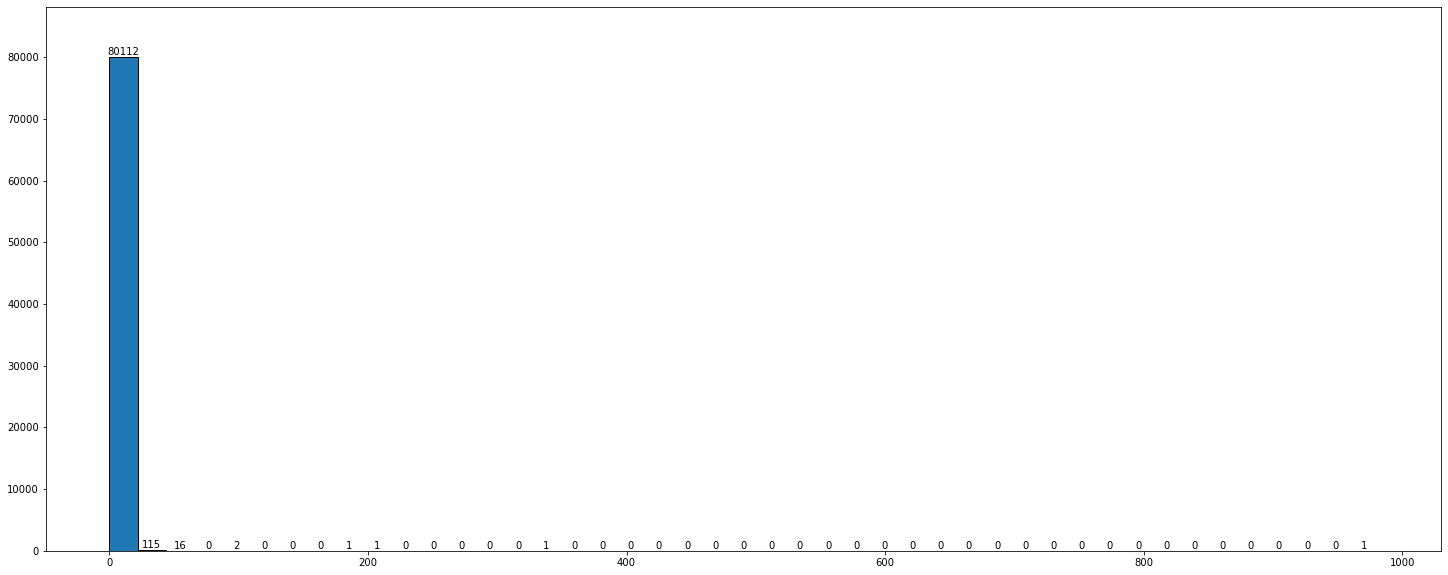

<Figure size 432x288 with 0 Axes>

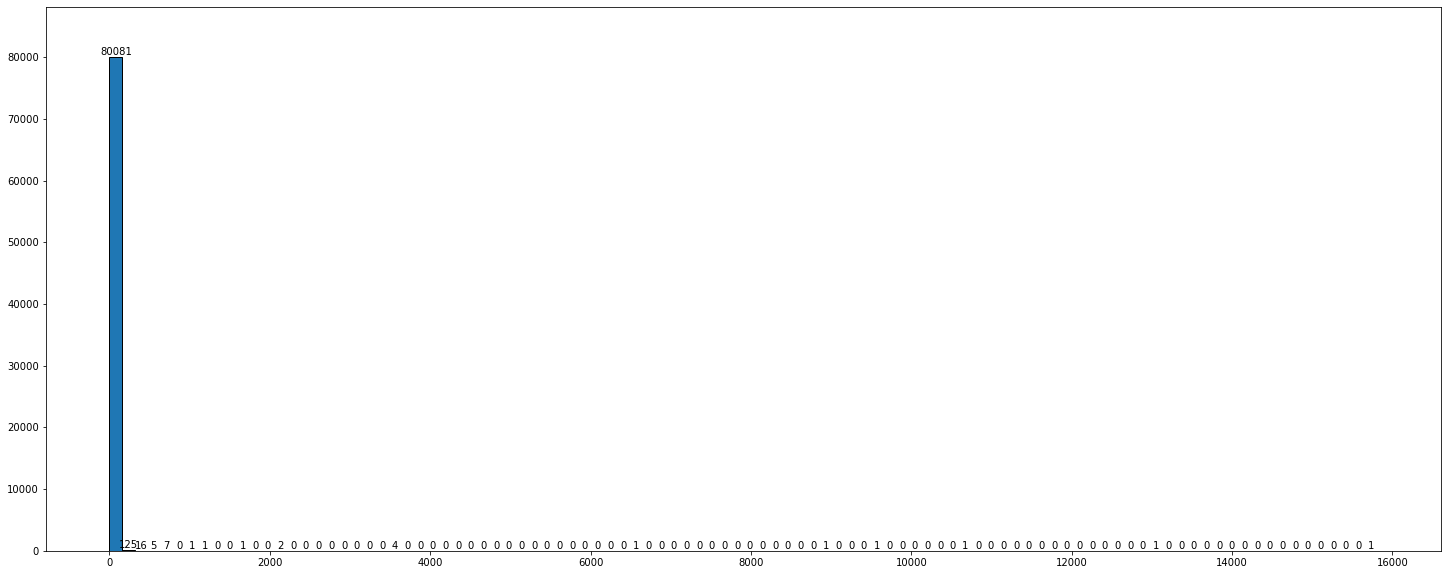

<Figure size 432x288 with 0 Axes>

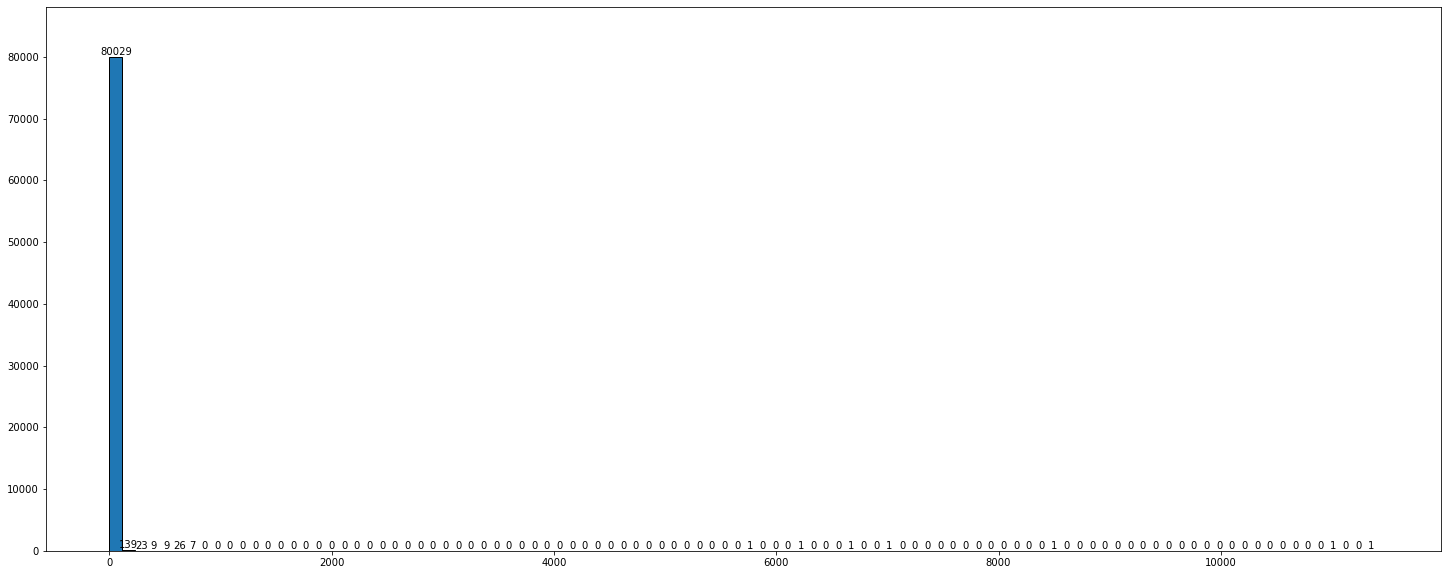

<Figure size 432x288 with 0 Axes>

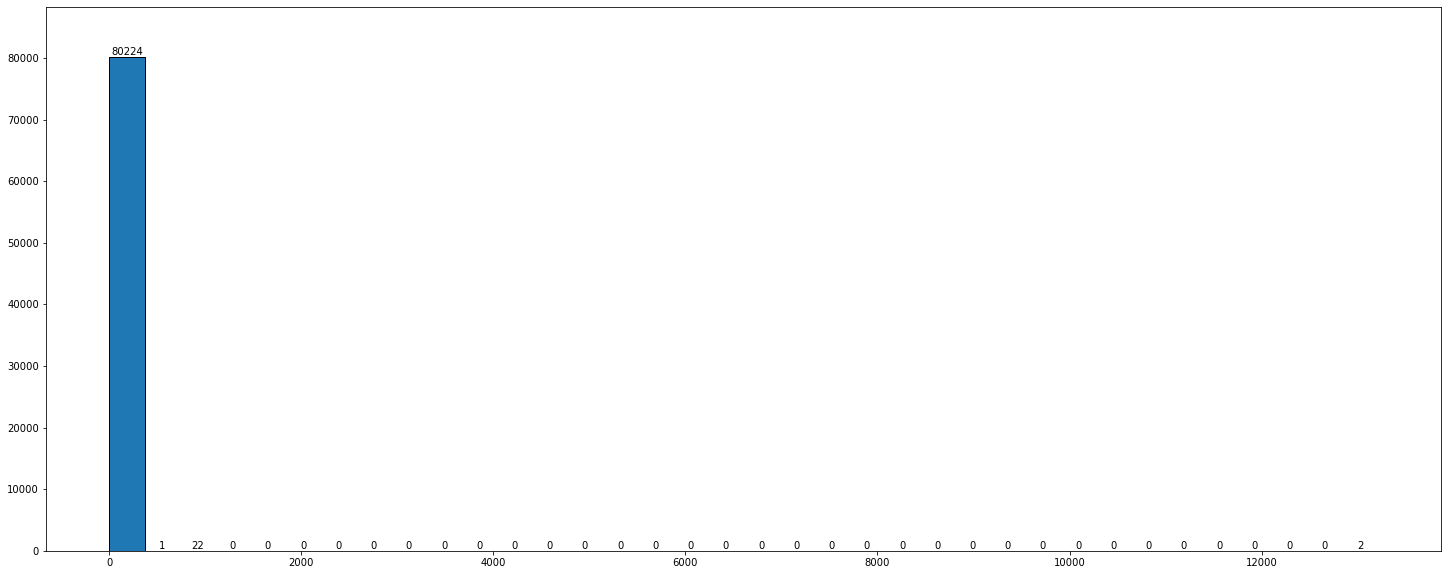

<Figure size 432x288 with 0 Axes>

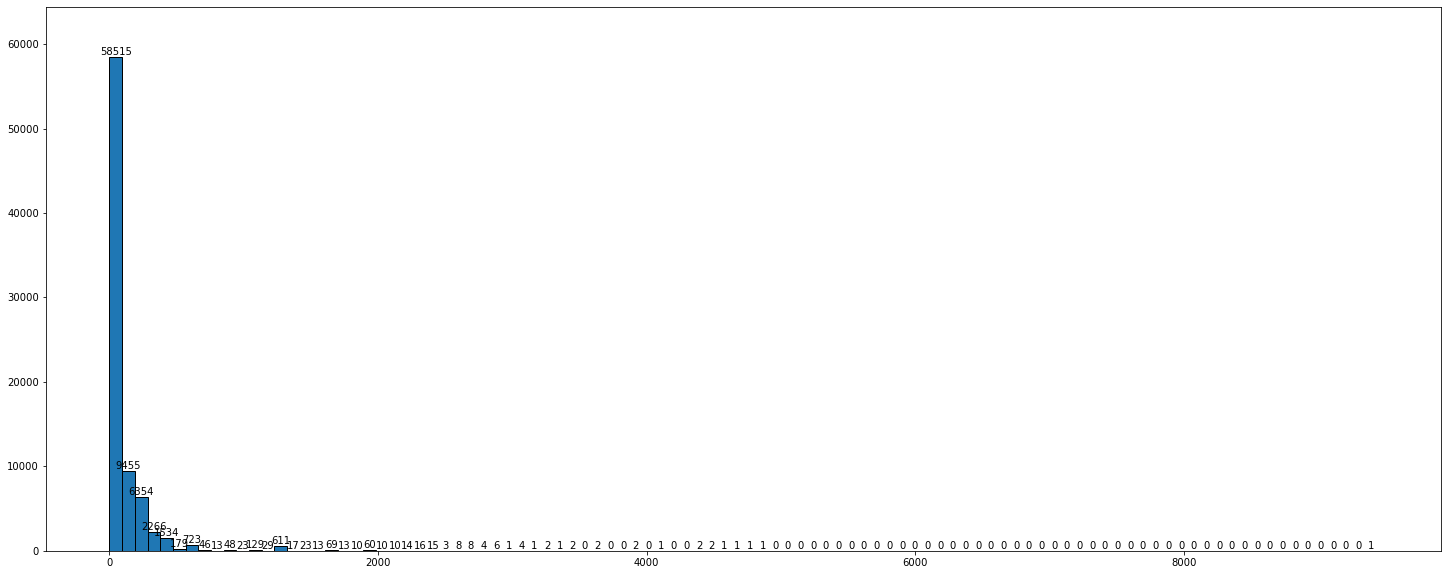

<Figure size 432x288 with 0 Axes>

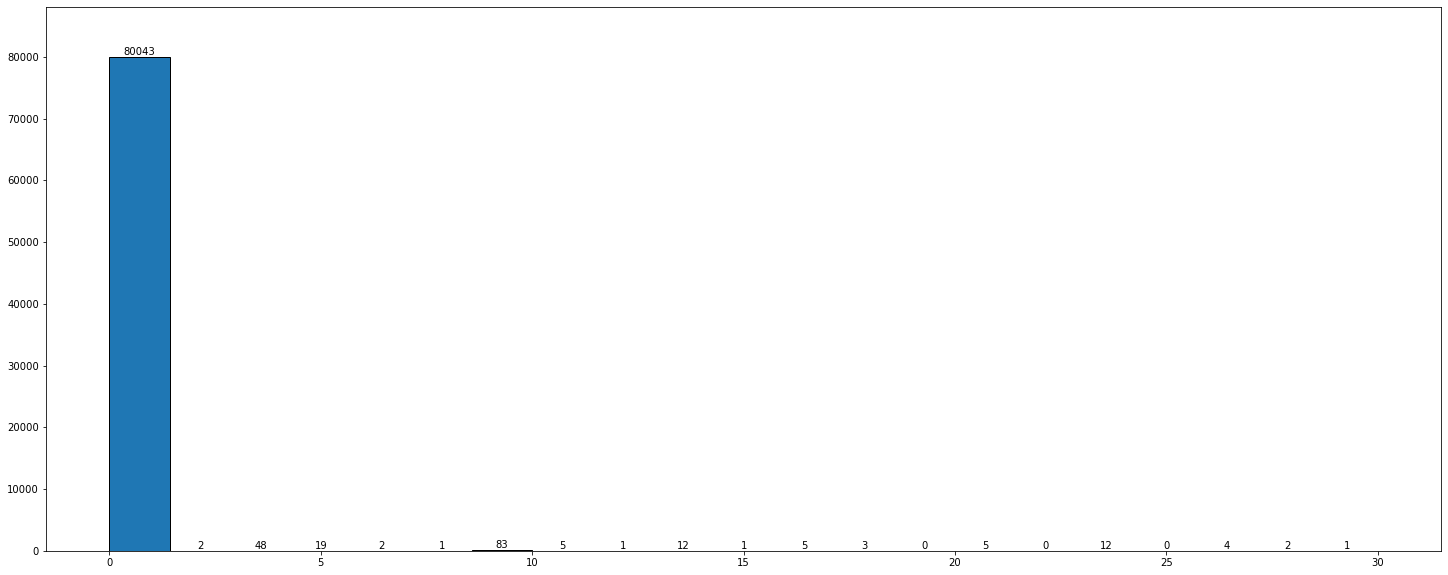

<Figure size 432x288 with 0 Axes>

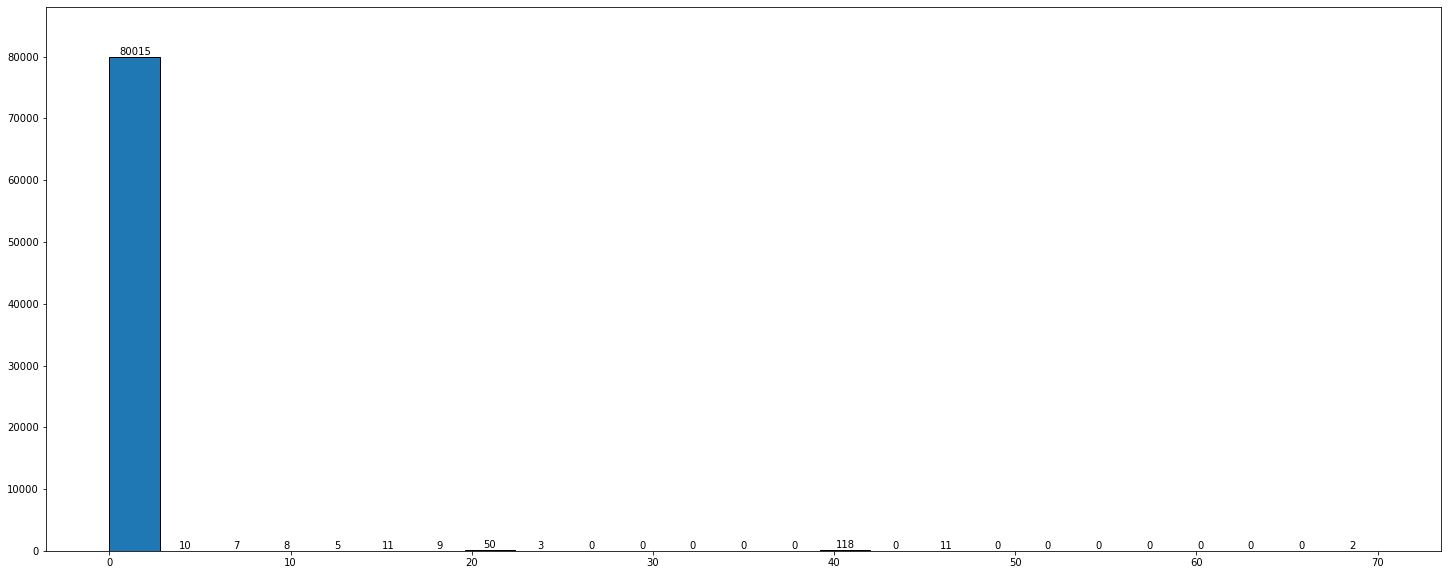

<Figure size 432x288 with 0 Axes>

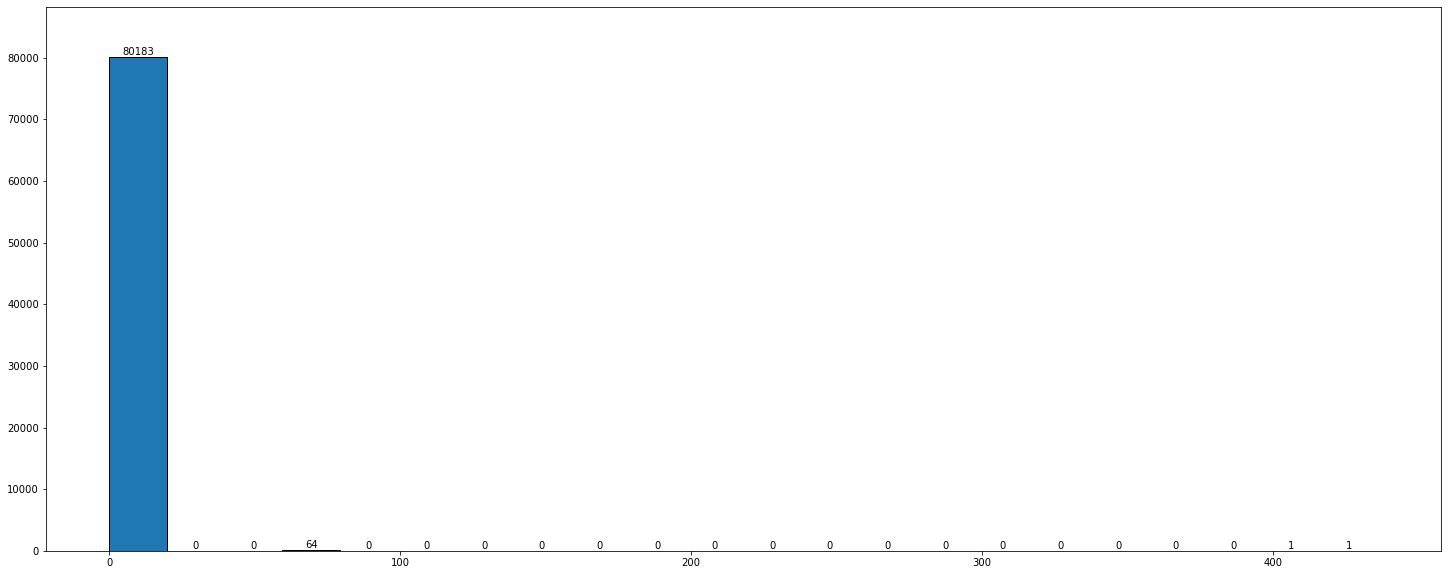

<Figure size 432x288 with 0 Axes>

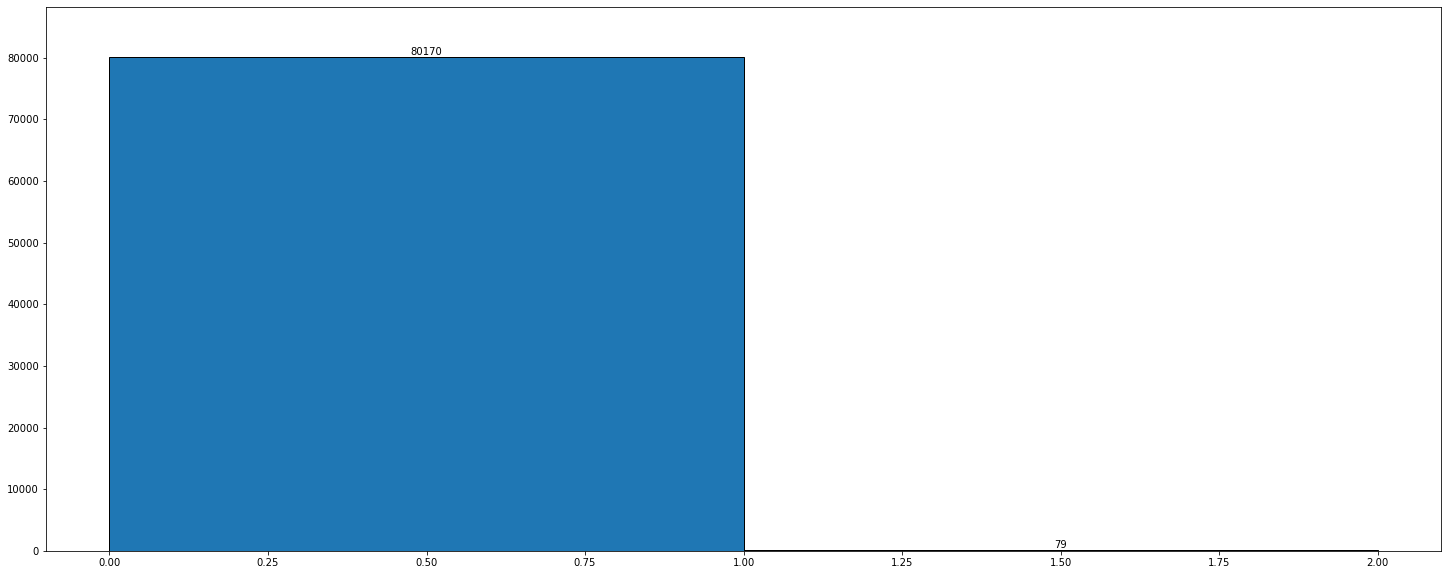

<Figure size 432x288 with 0 Axes>

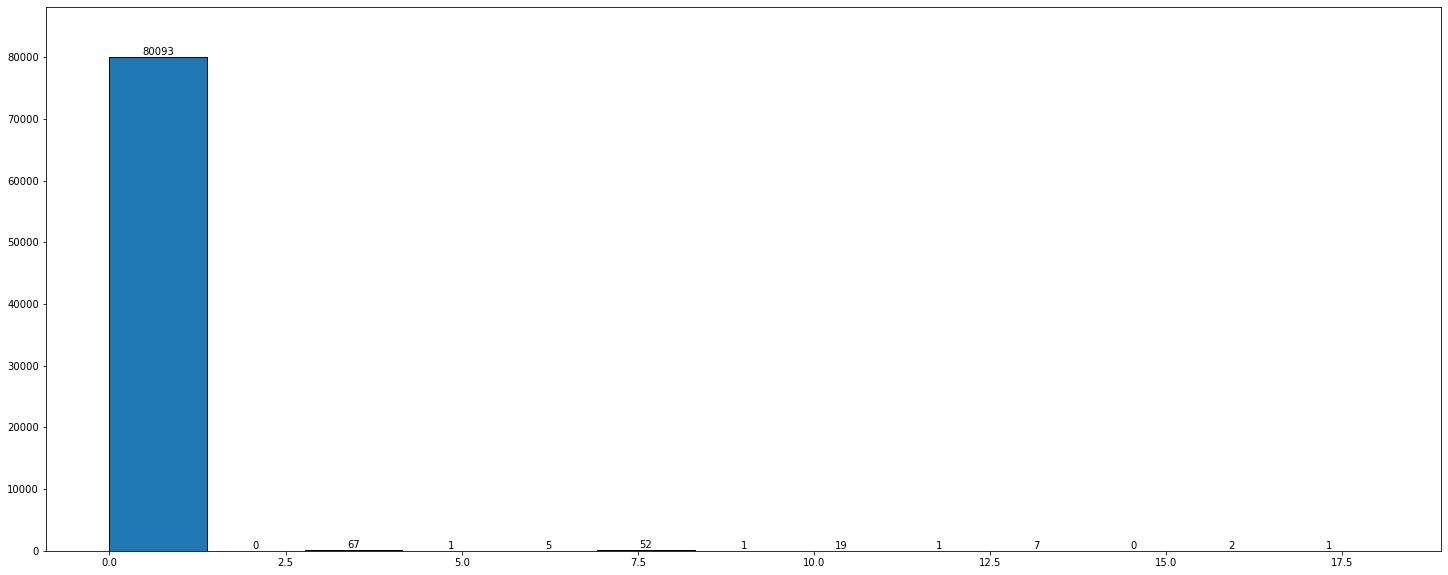

<Figure size 432x288 with 0 Axes>

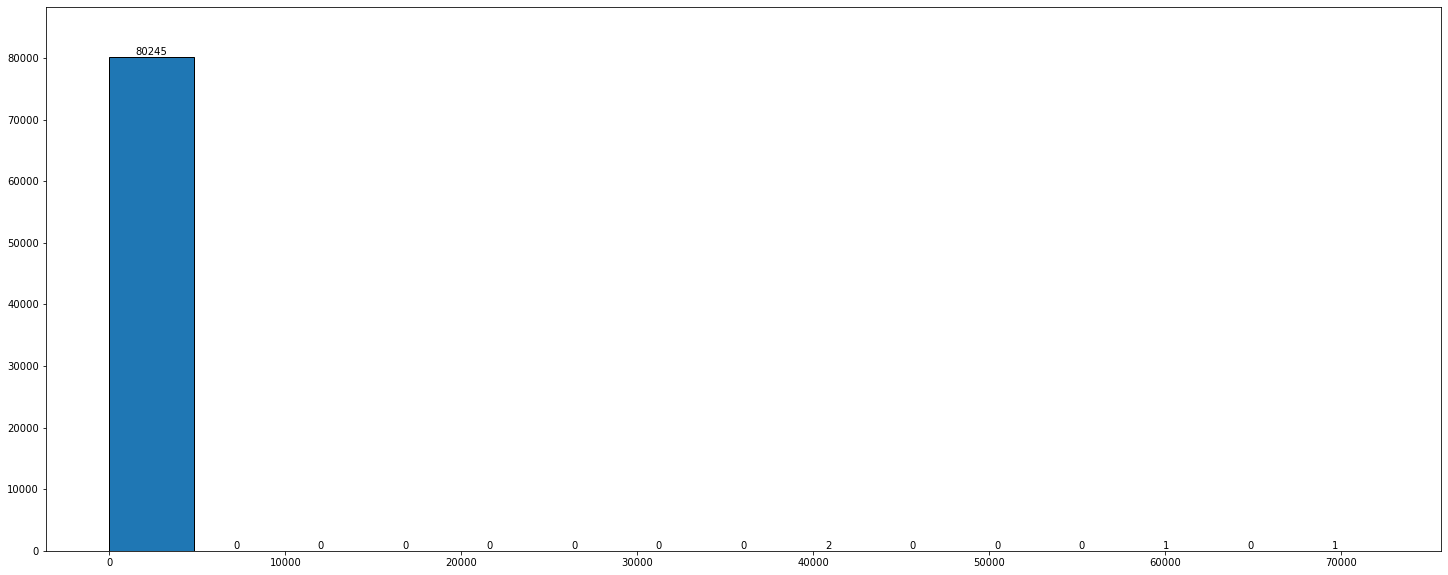

<Figure size 432x288 with 0 Axes>

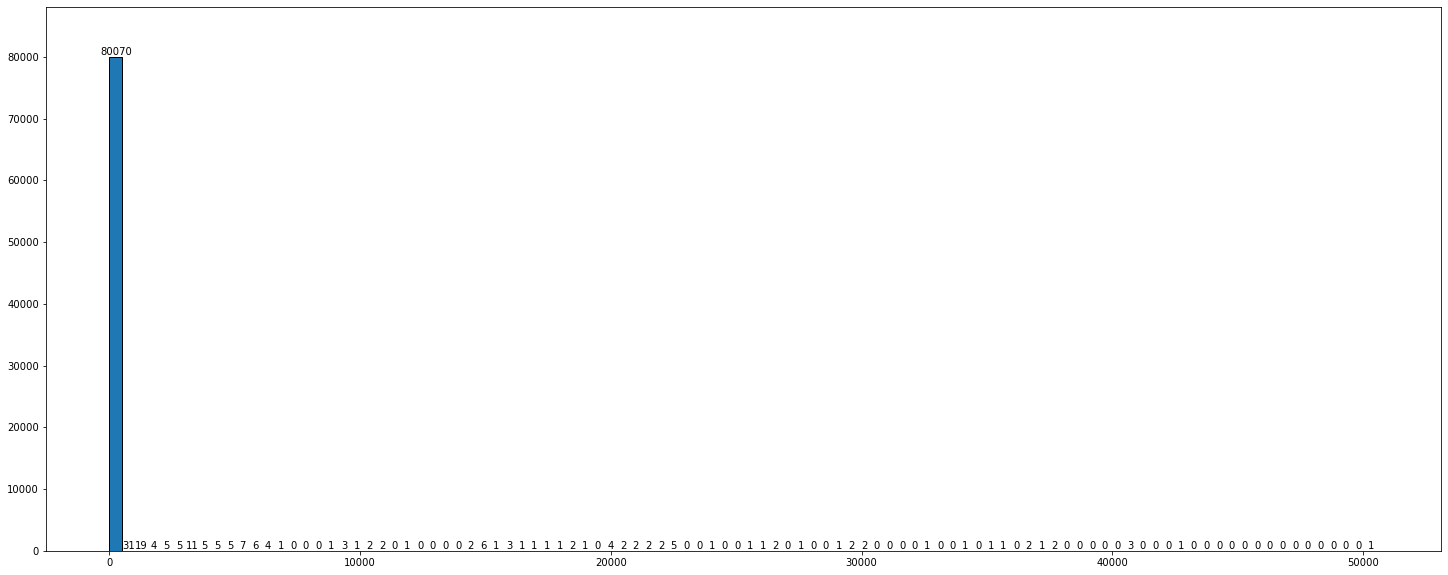

<Figure size 432x288 with 0 Axes>

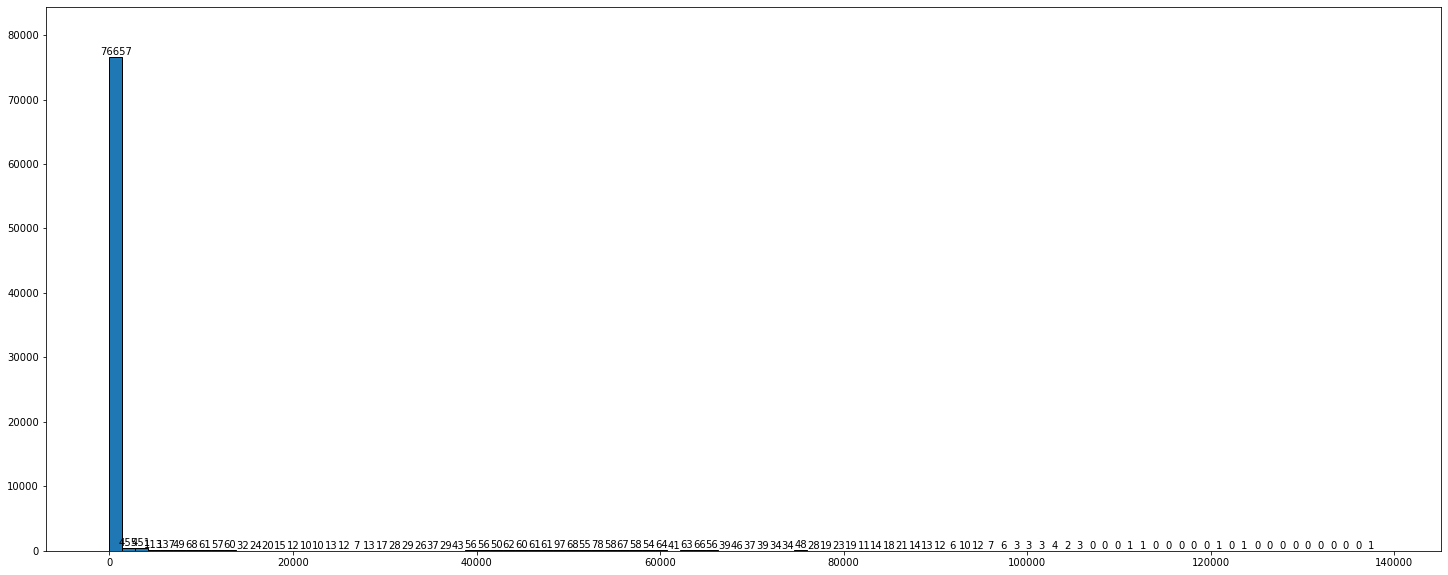

<Figure size 432x288 with 0 Axes>

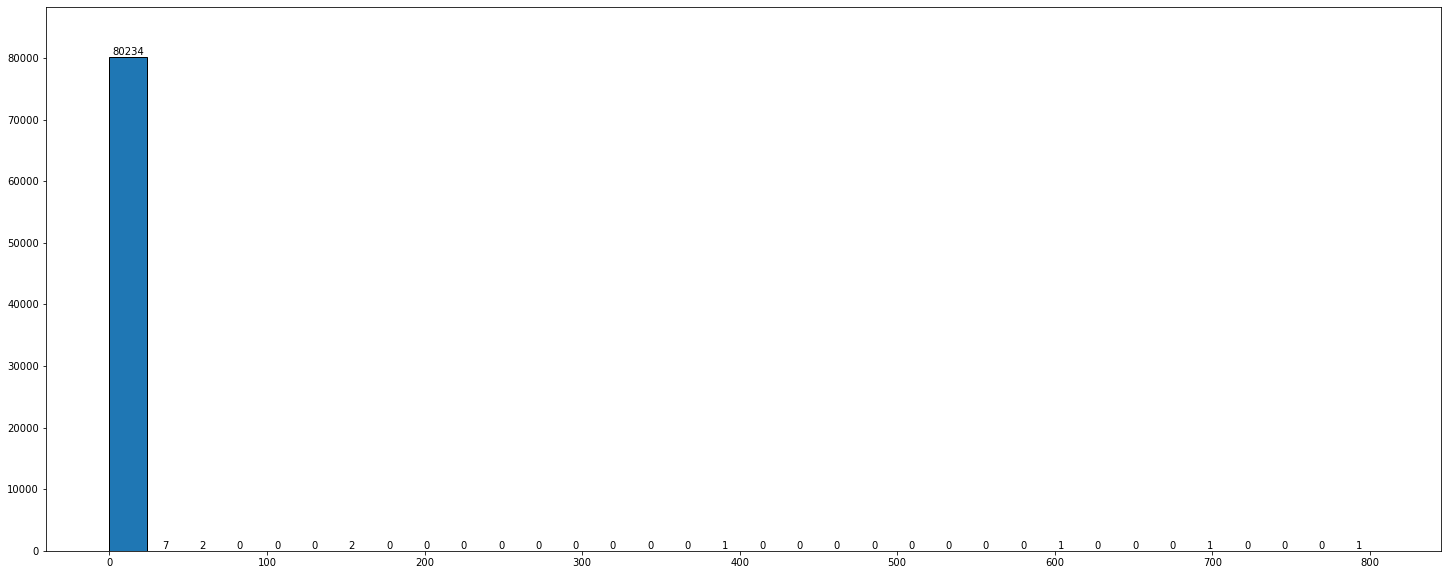

<Figure size 432x288 with 0 Axes>

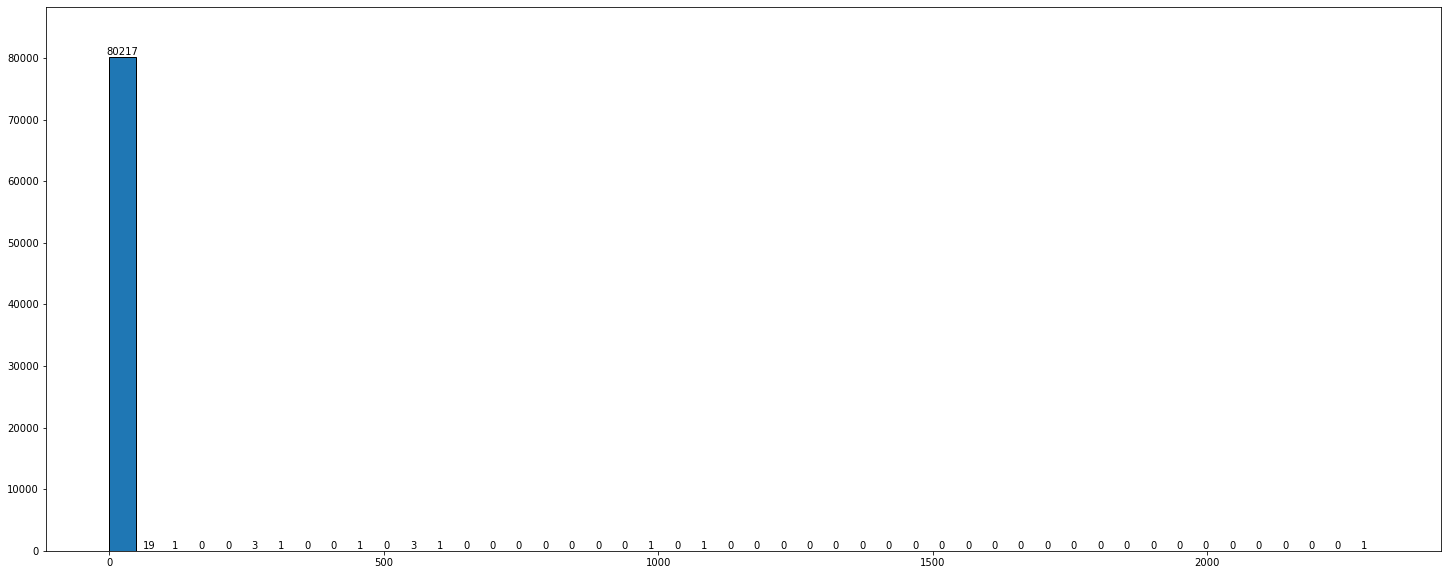

<Figure size 432x288 with 0 Axes>

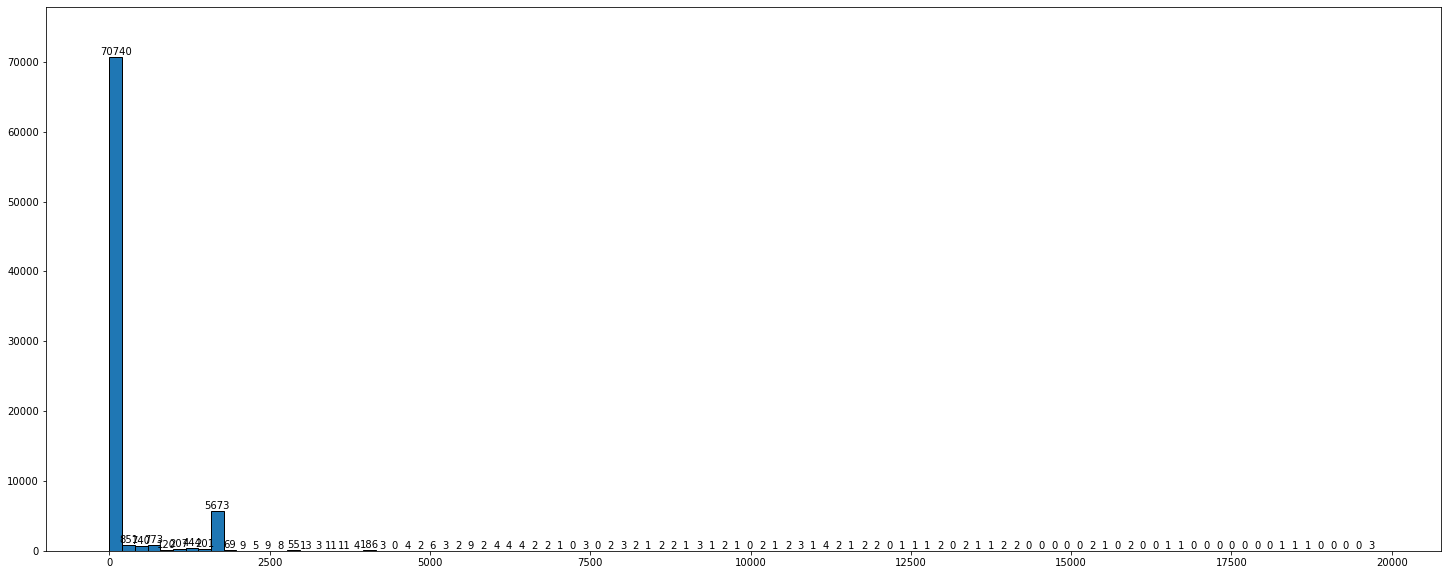

<Figure size 432x288 with 0 Axes>

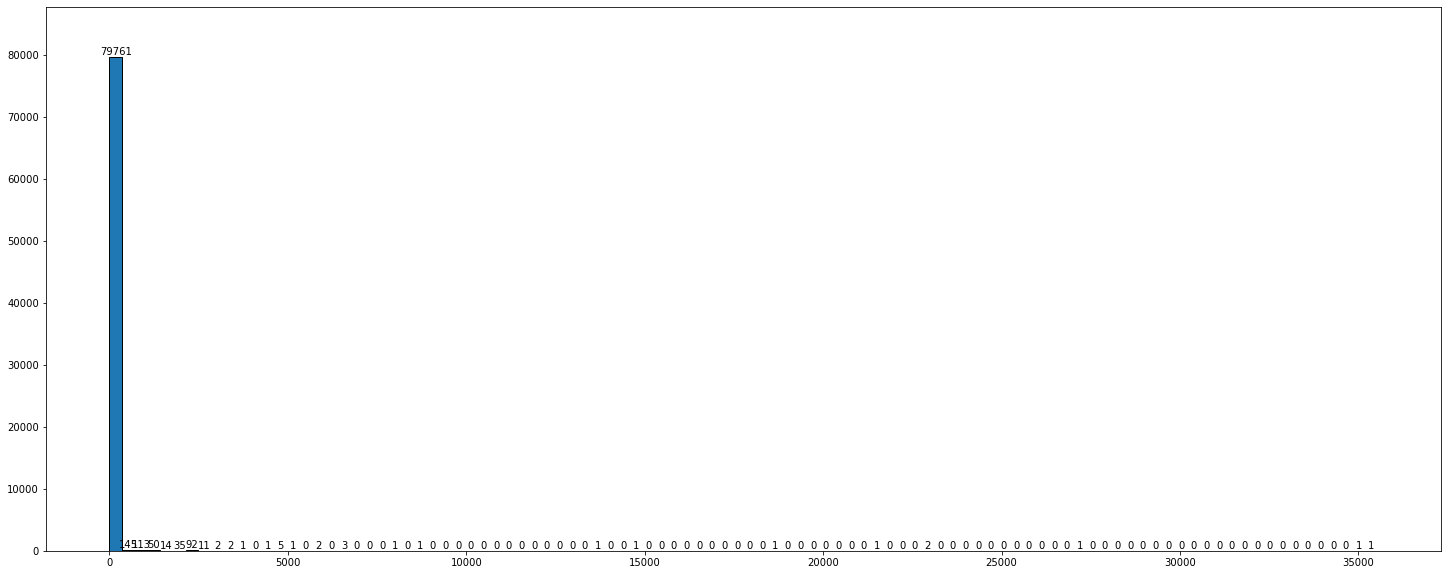

<Figure size 432x288 with 0 Axes>

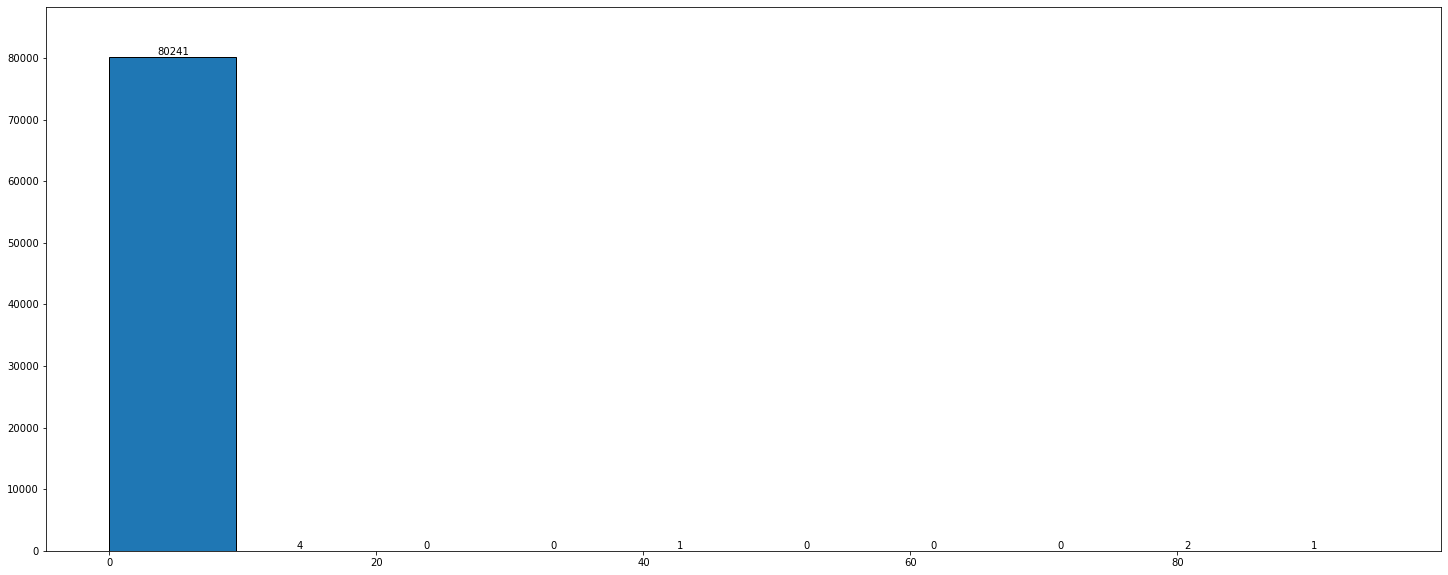

<Figure size 432x288 with 0 Axes>

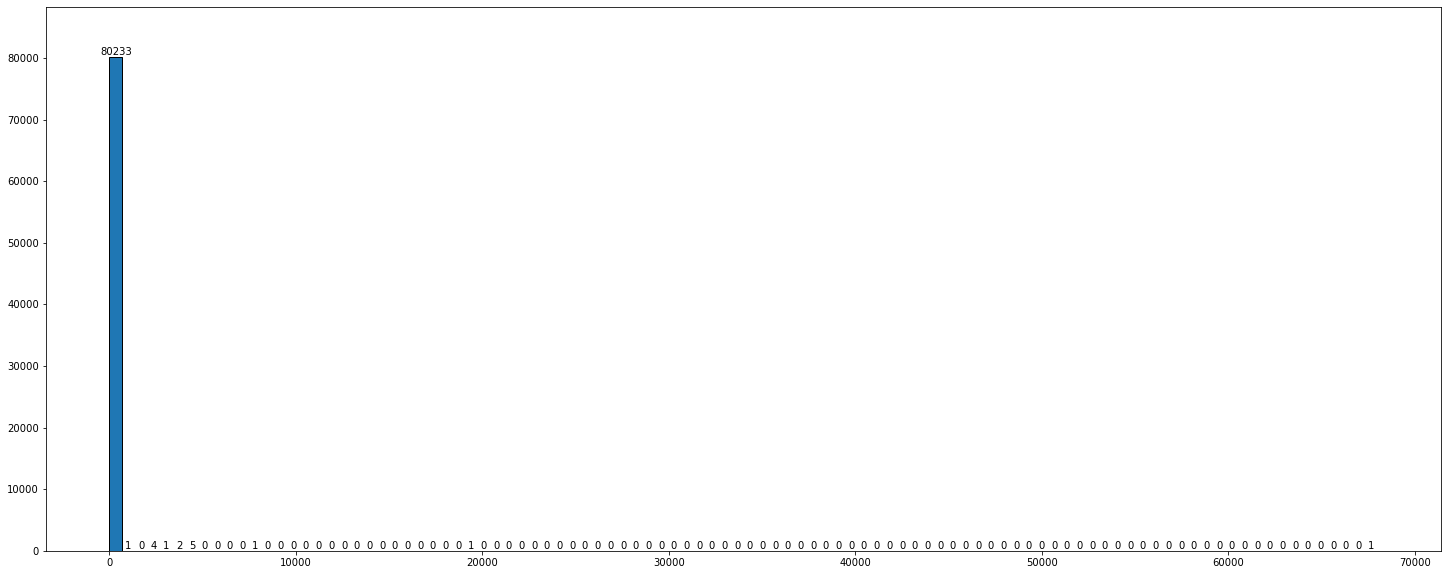

<Figure size 432x288 with 0 Axes>

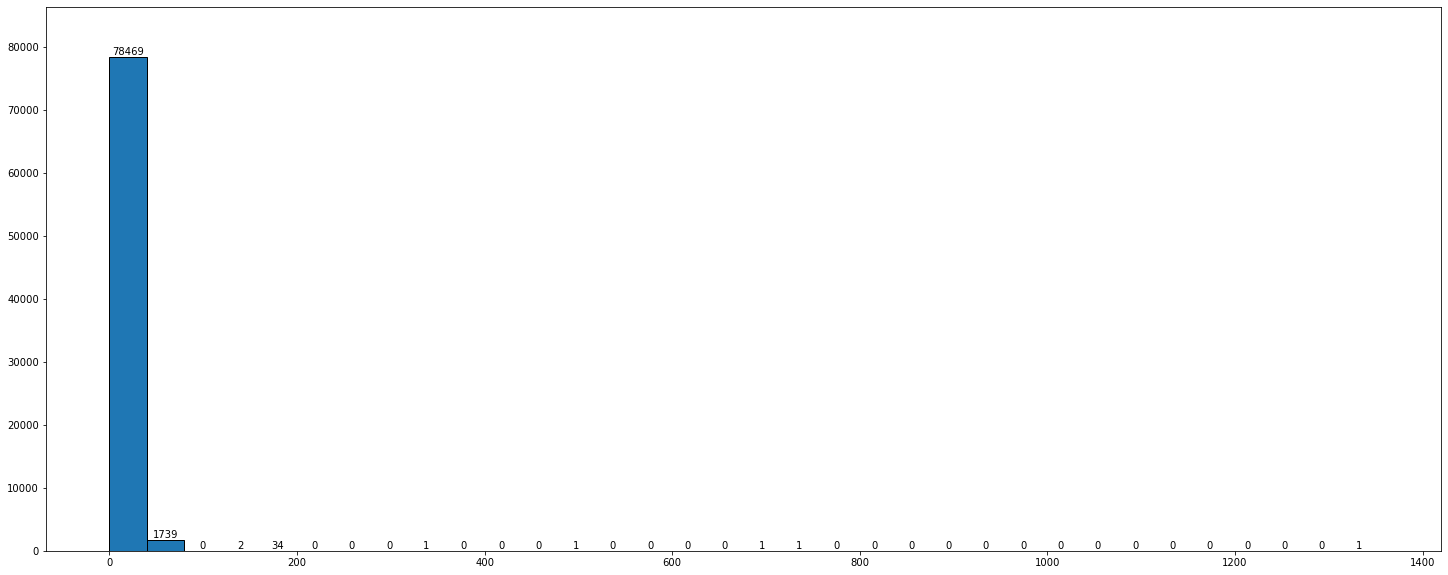

<Figure size 432x288 with 0 Axes>

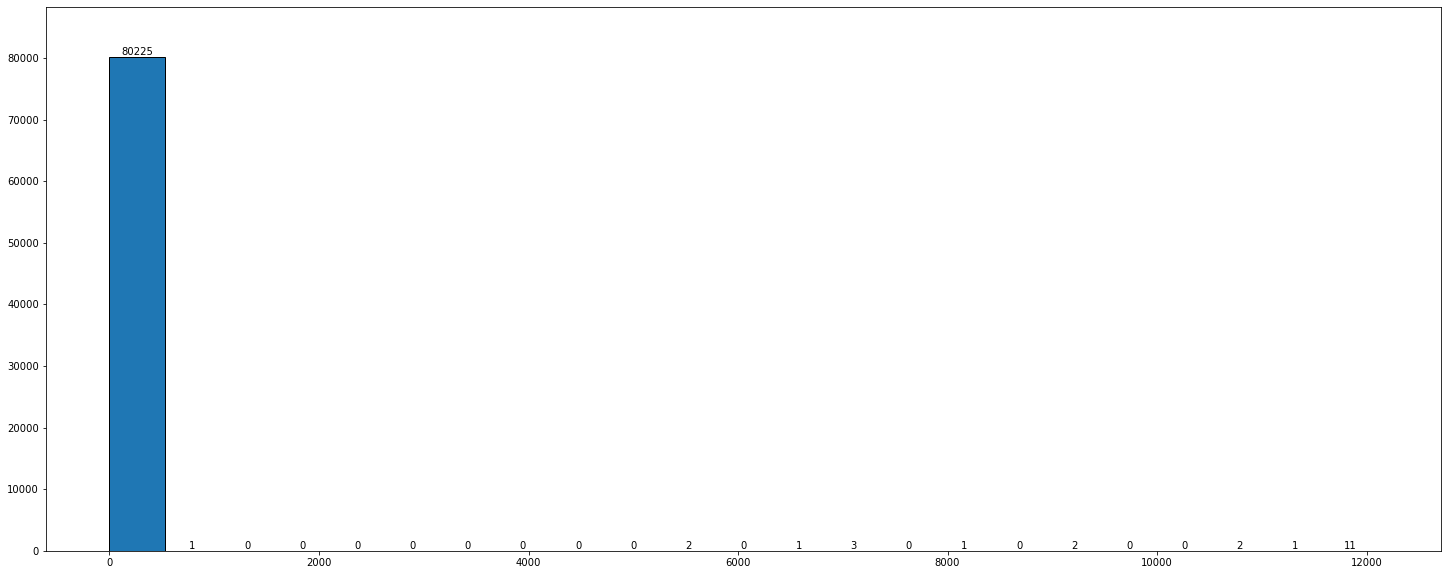

<Figure size 432x288 with 0 Axes>

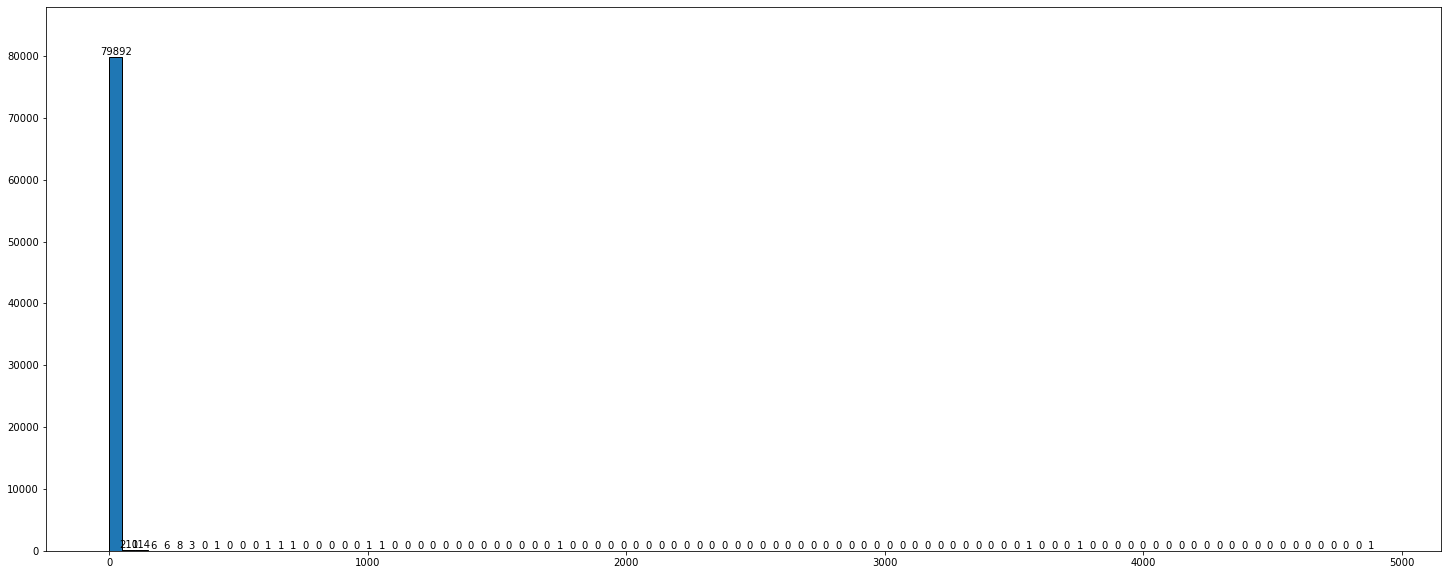

<Figure size 432x288 with 0 Axes>

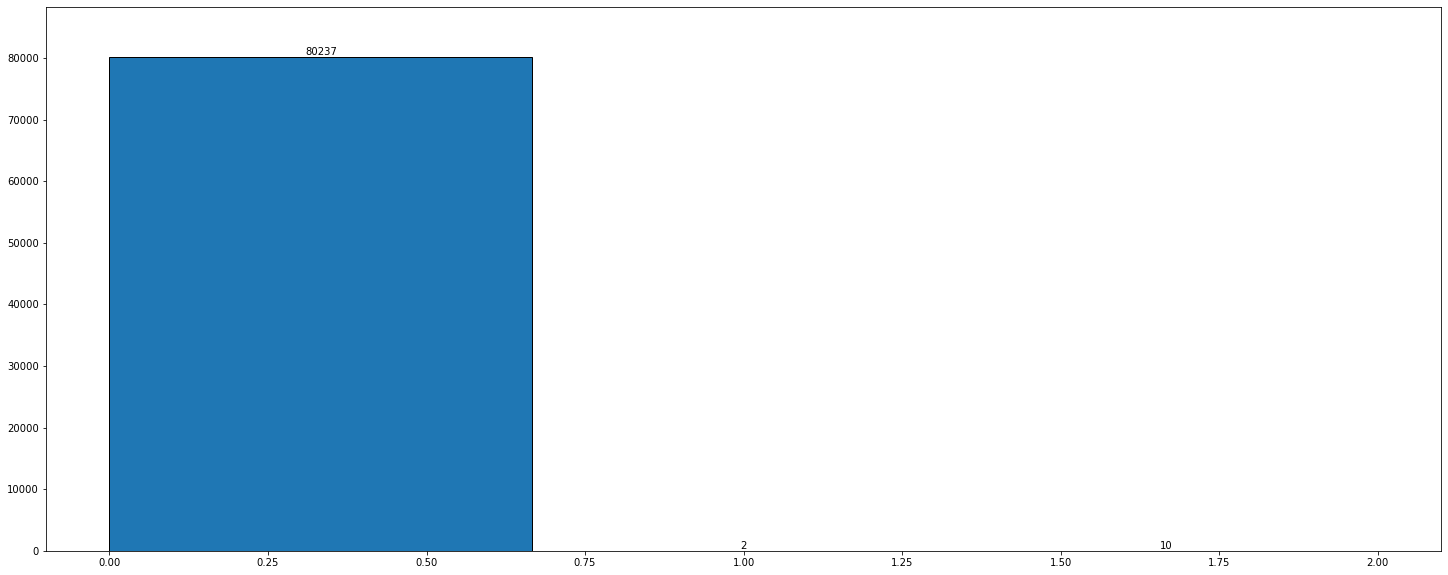

<Figure size 432x288 with 0 Axes>

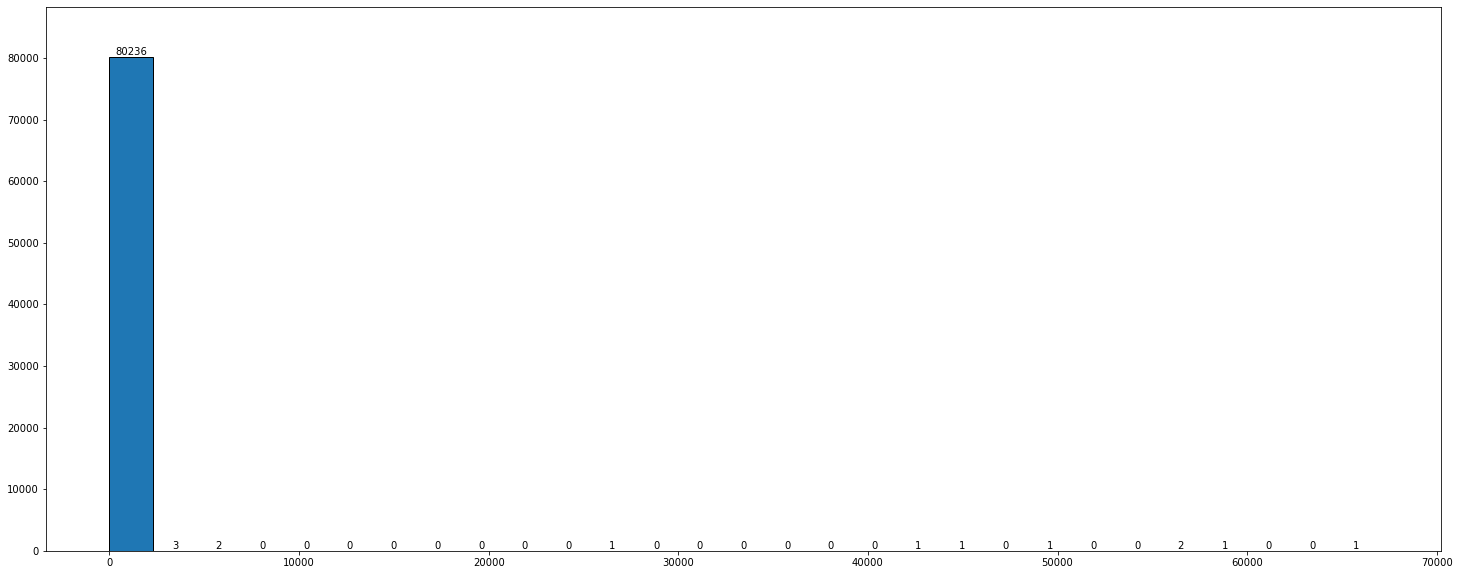

<Figure size 432x288 with 0 Axes>

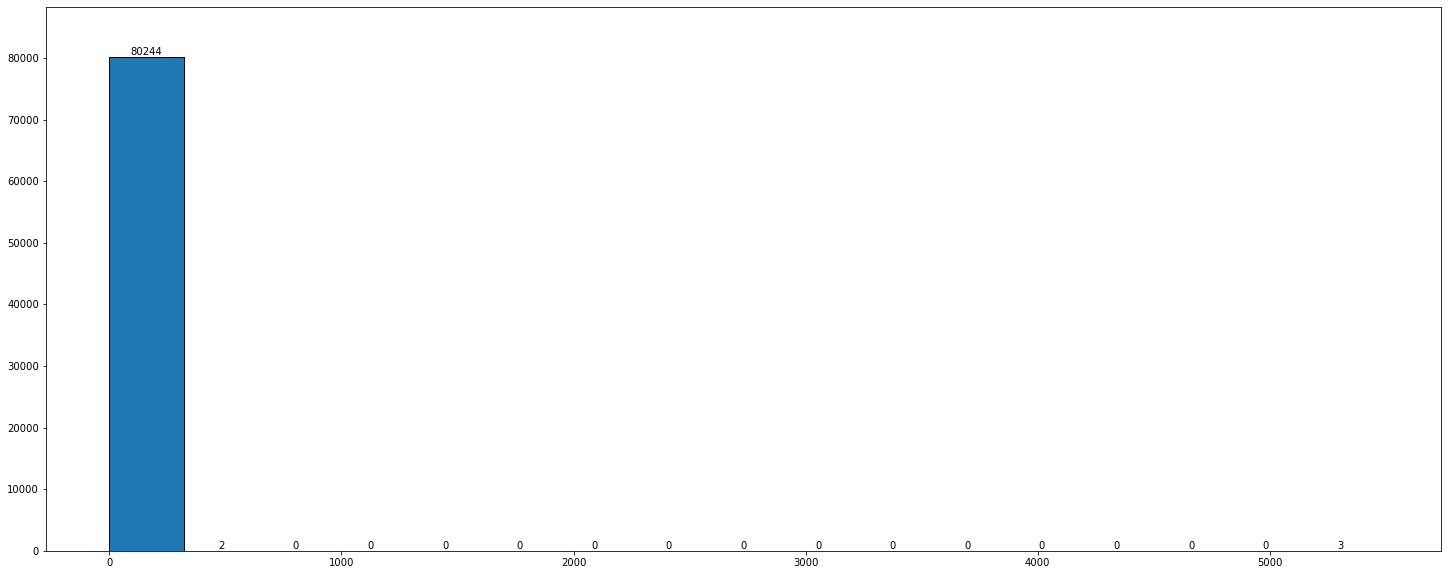

<Figure size 432x288 with 0 Axes>

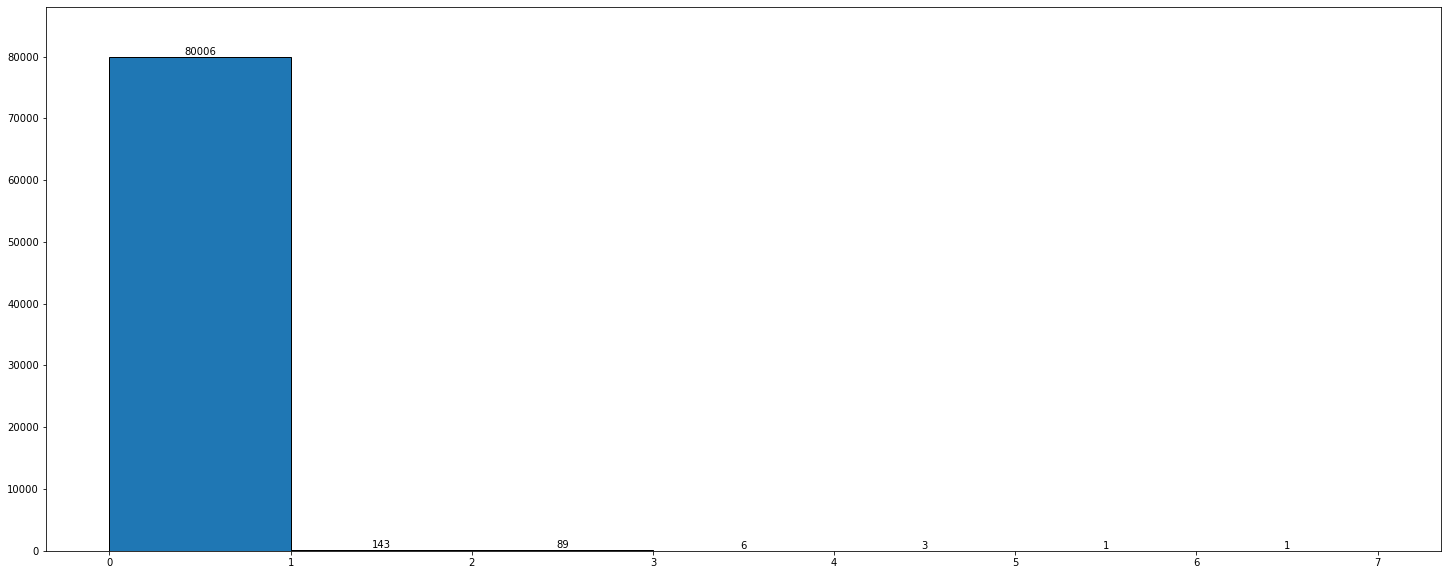

<Figure size 432x288 with 0 Axes>

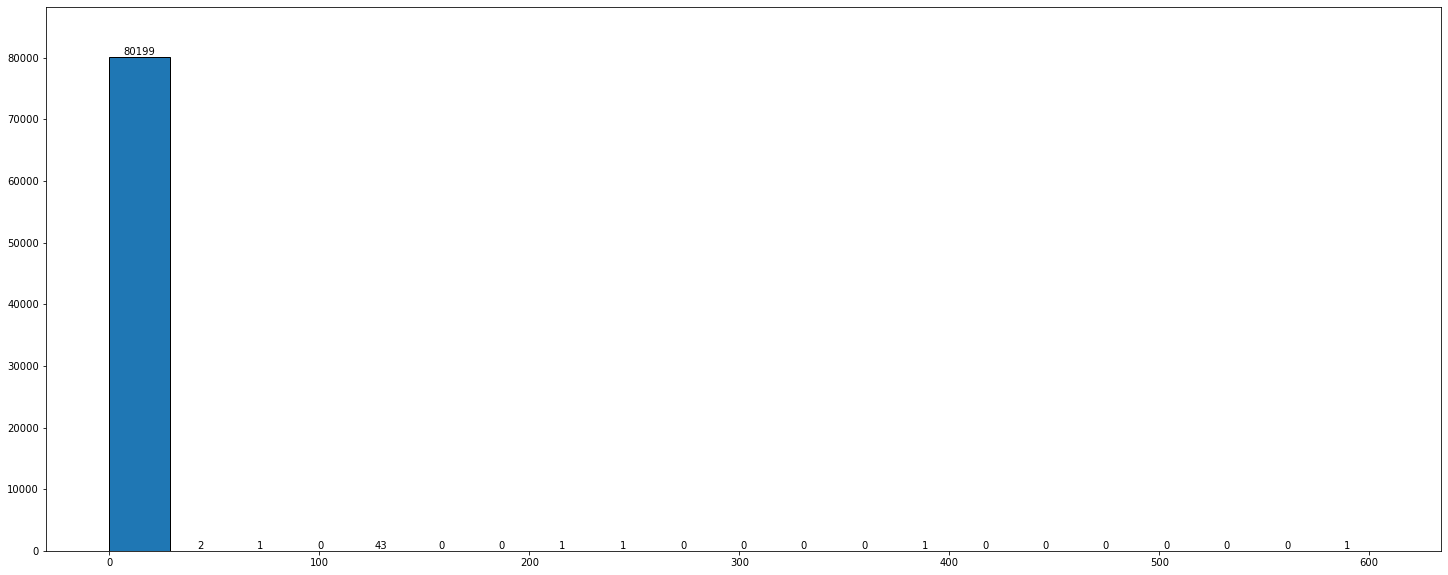

<Figure size 432x288 with 0 Axes>

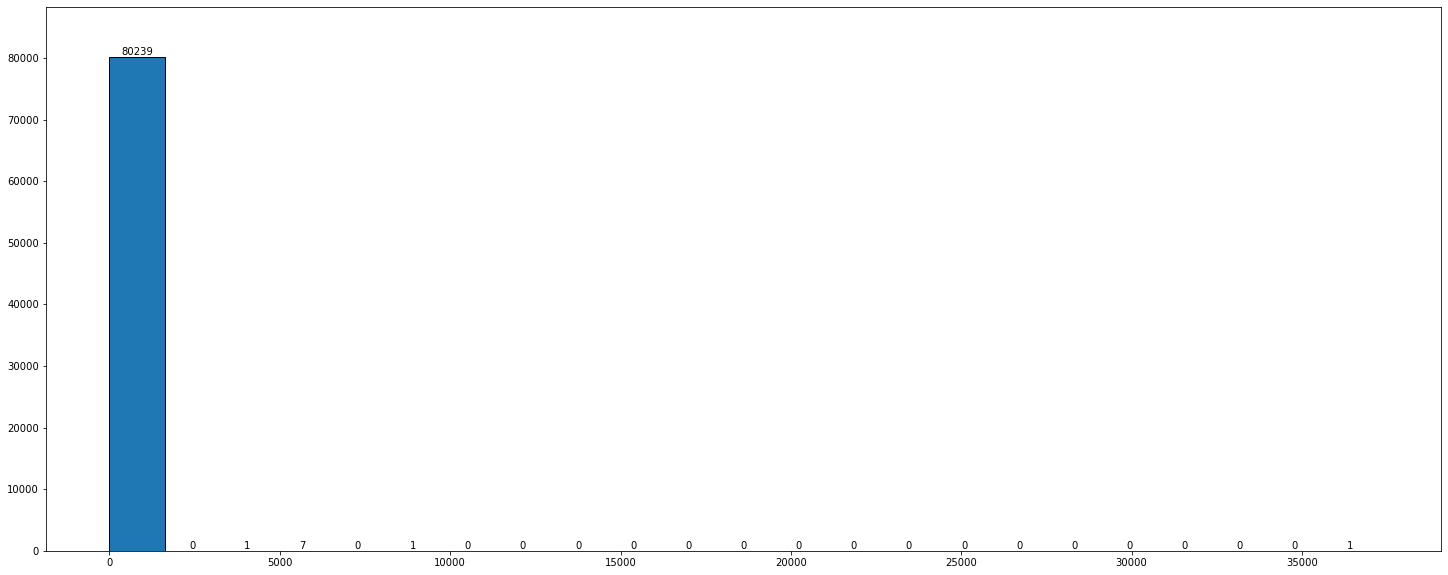

<Figure size 432x288 with 0 Axes>

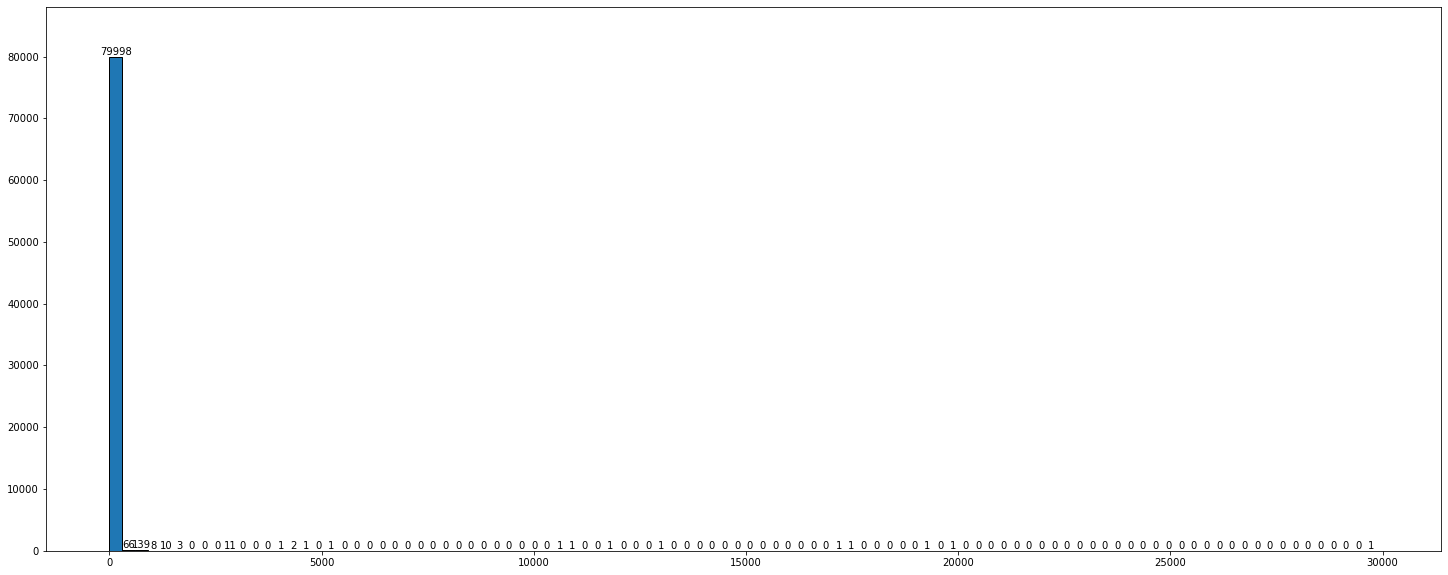

<Figure size 432x288 with 0 Axes>

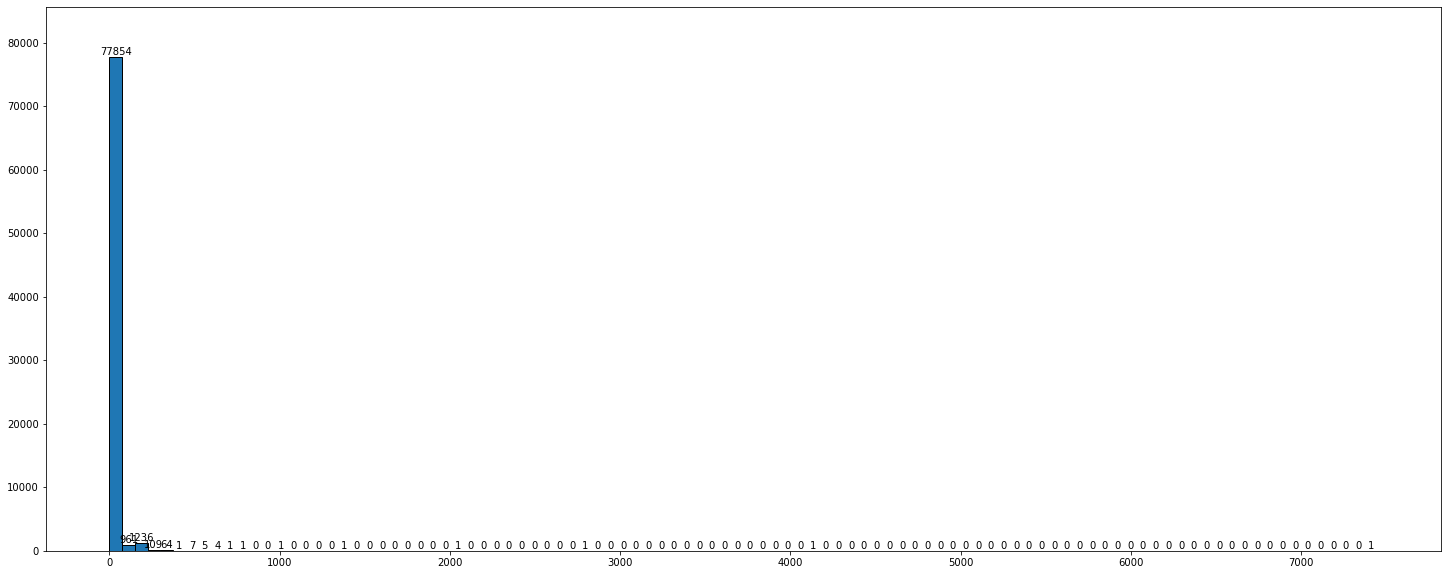

<Figure size 432x288 with 0 Axes>

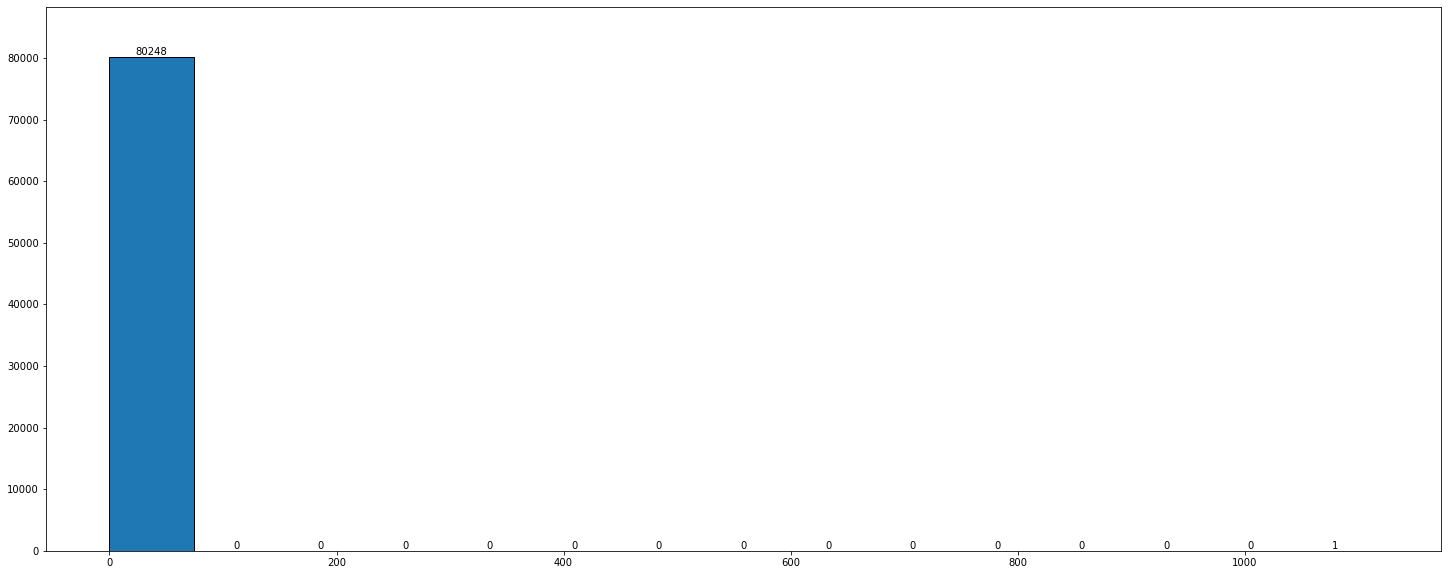

<Figure size 432x288 with 0 Axes>

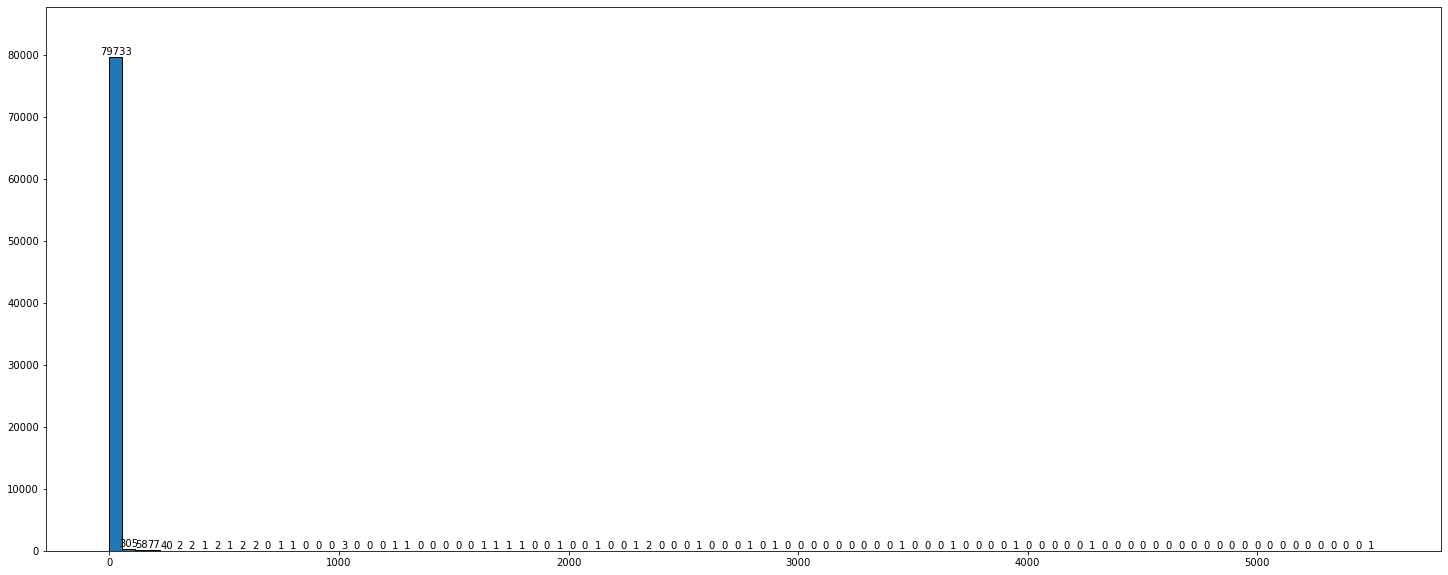

<Figure size 432x288 with 0 Axes>

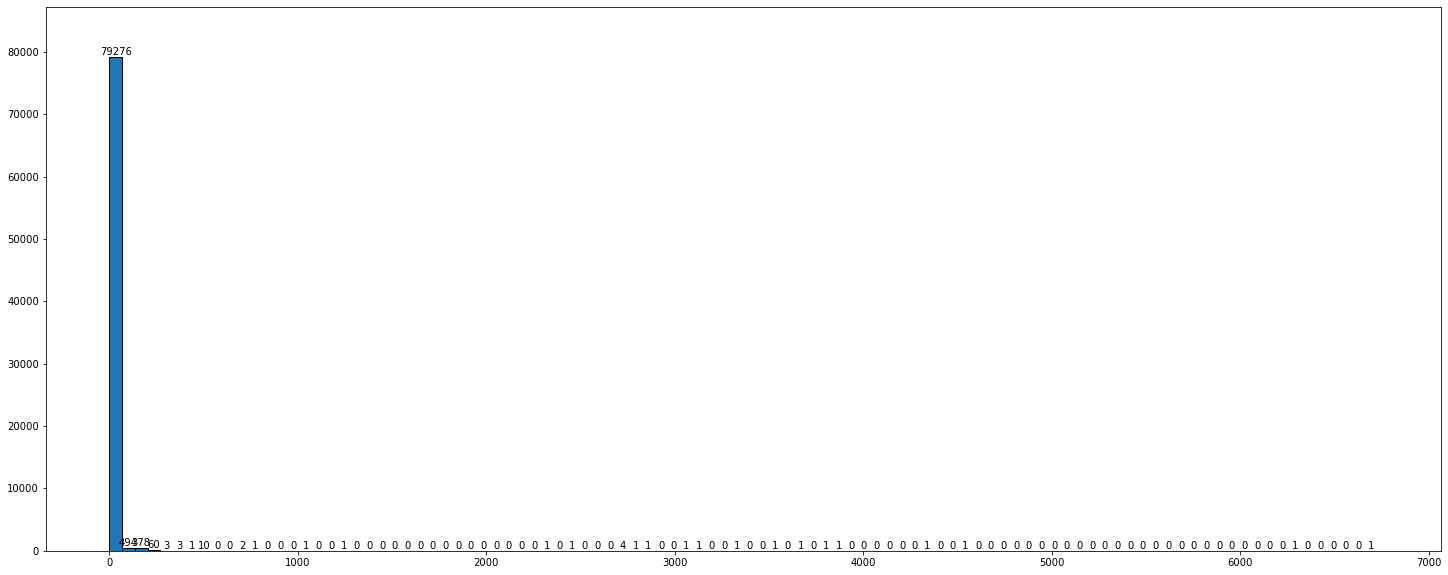

<Figure size 432x288 with 0 Axes>

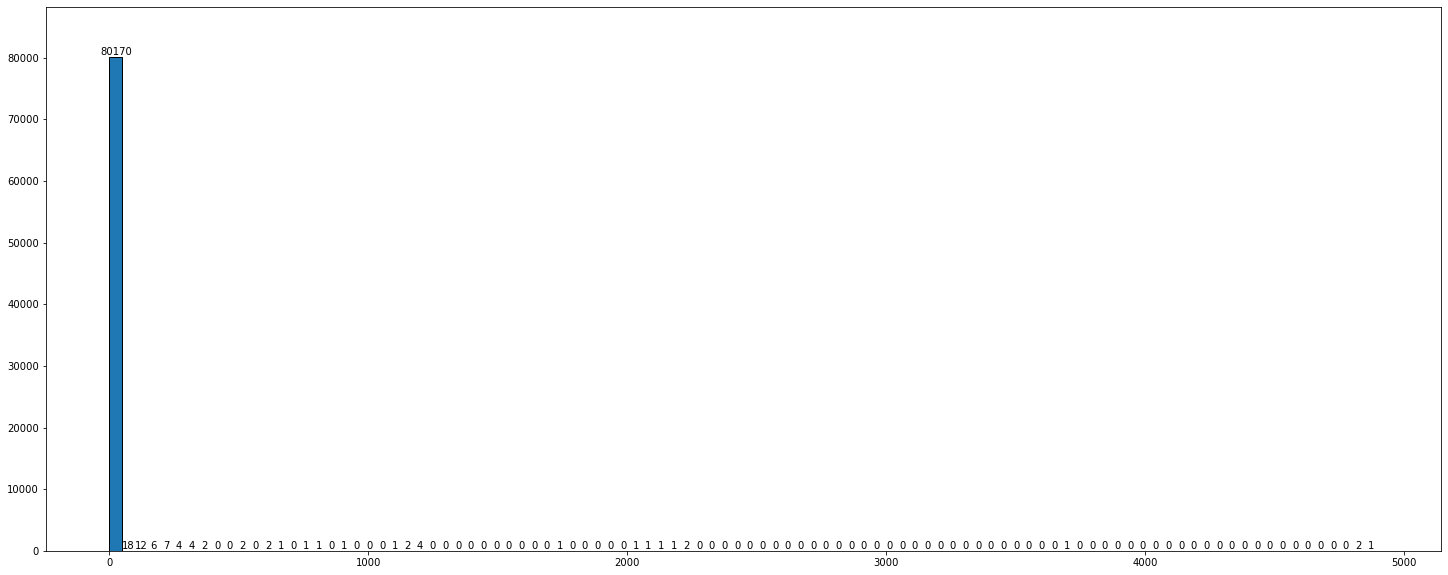

<Figure size 432x288 with 0 Axes>

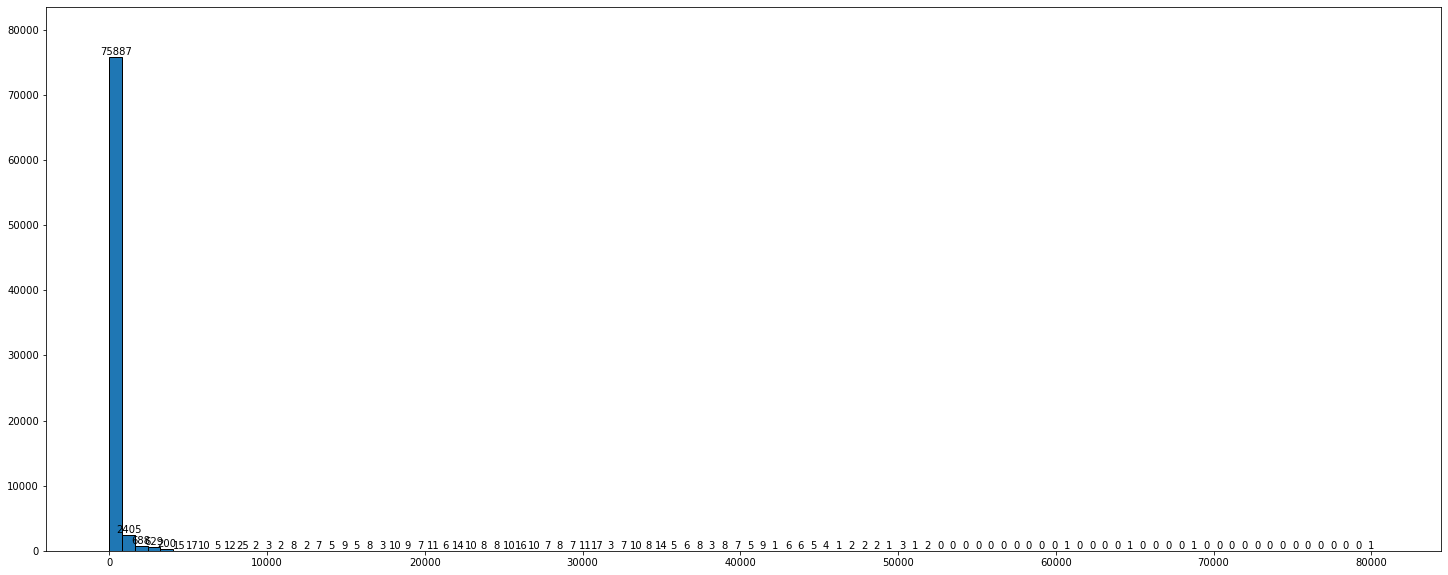

<Figure size 432x288 with 0 Axes>

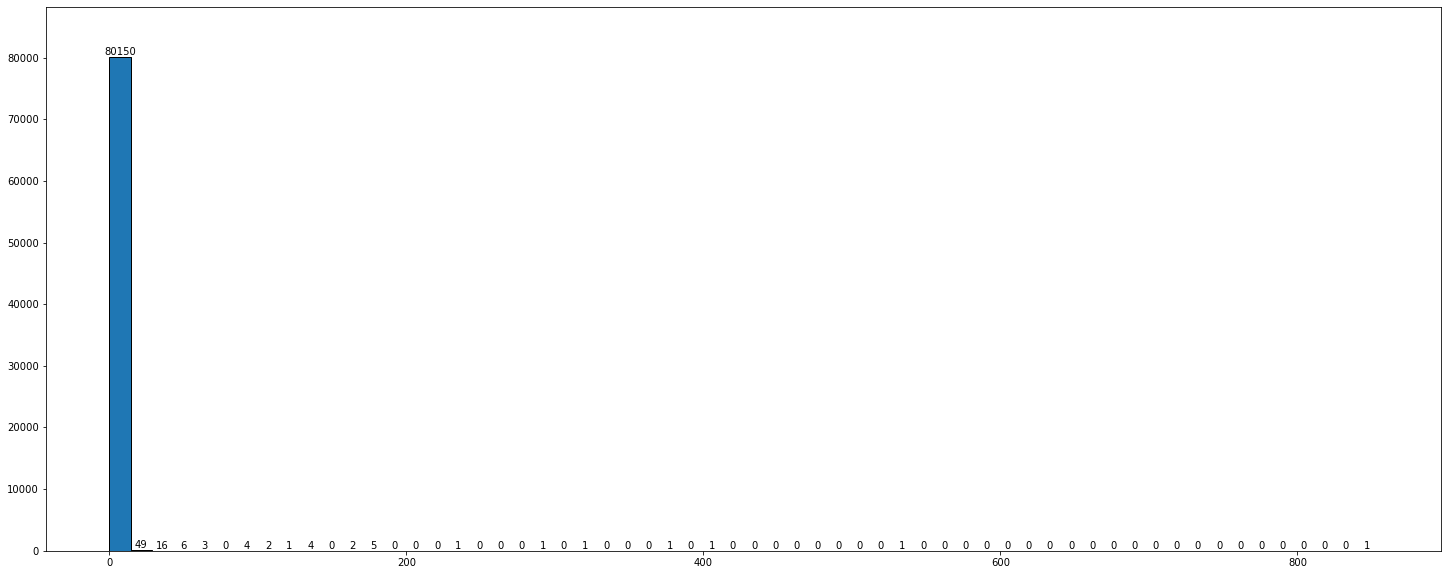

<Figure size 432x288 with 0 Axes>

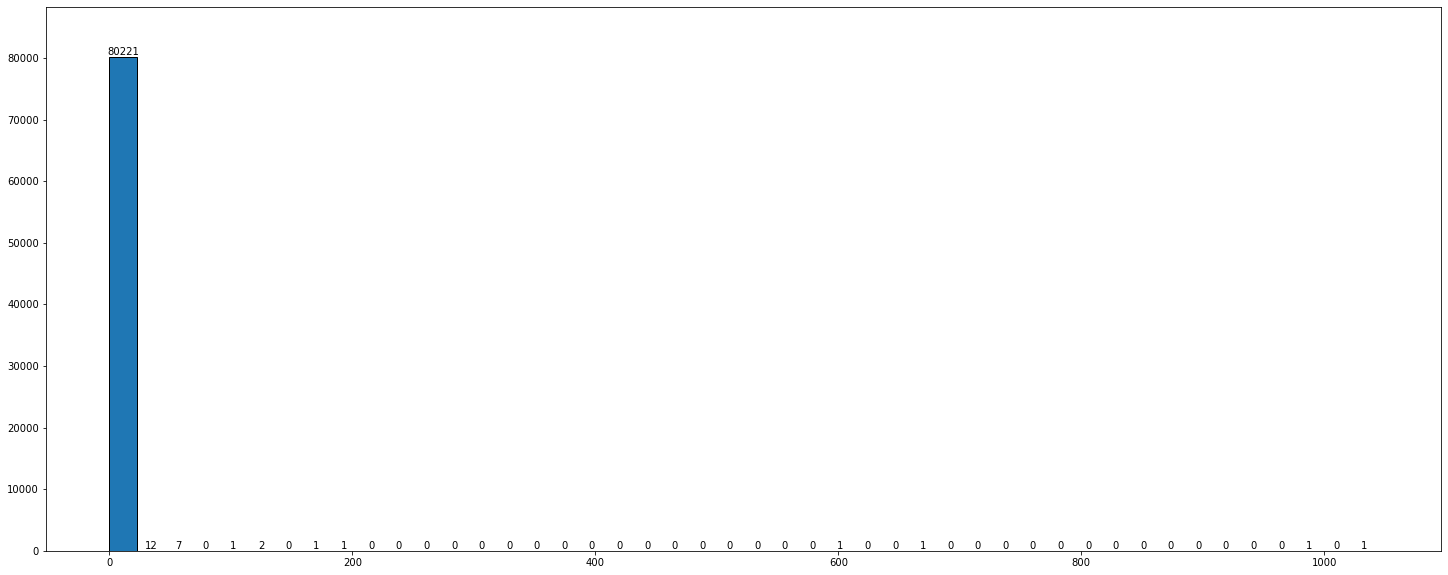

<Figure size 432x288 with 0 Axes>

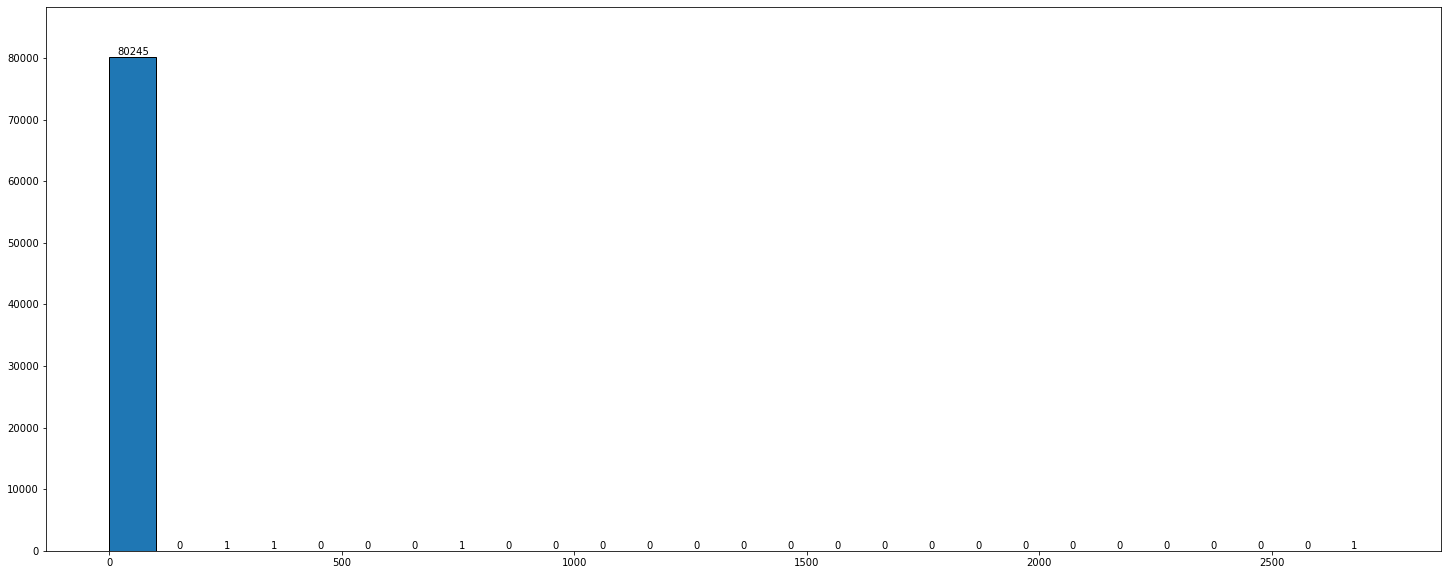

<Figure size 432x288 with 0 Axes>

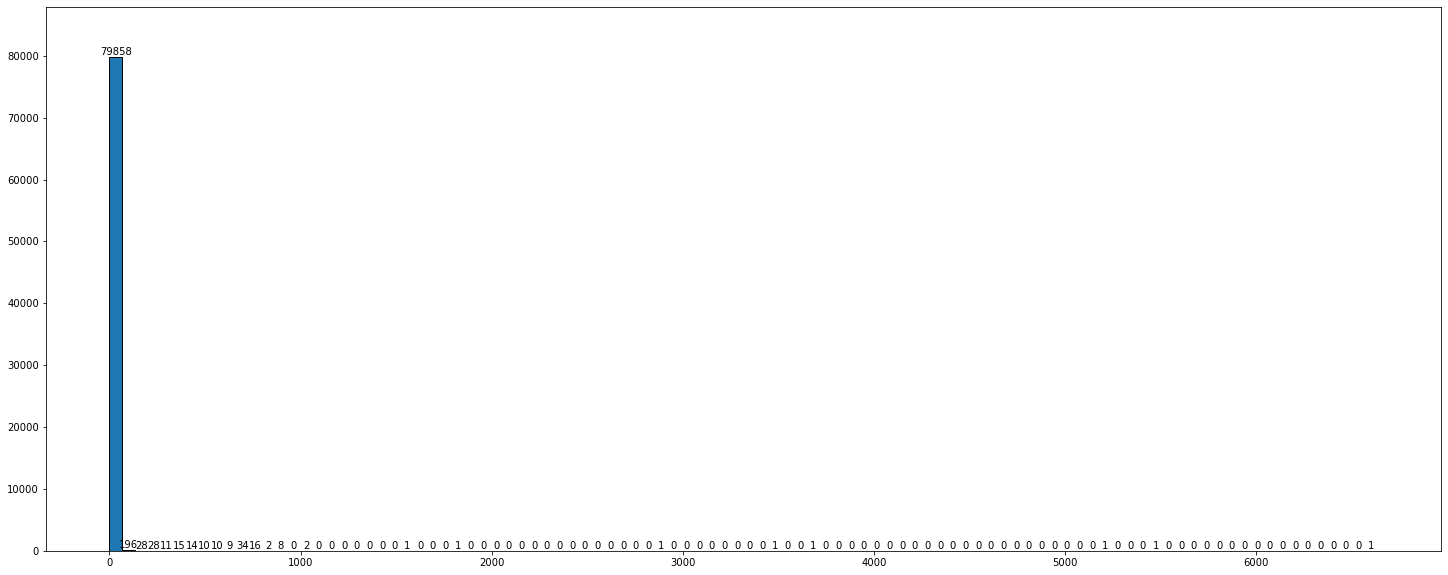

<Figure size 432x288 with 0 Axes>

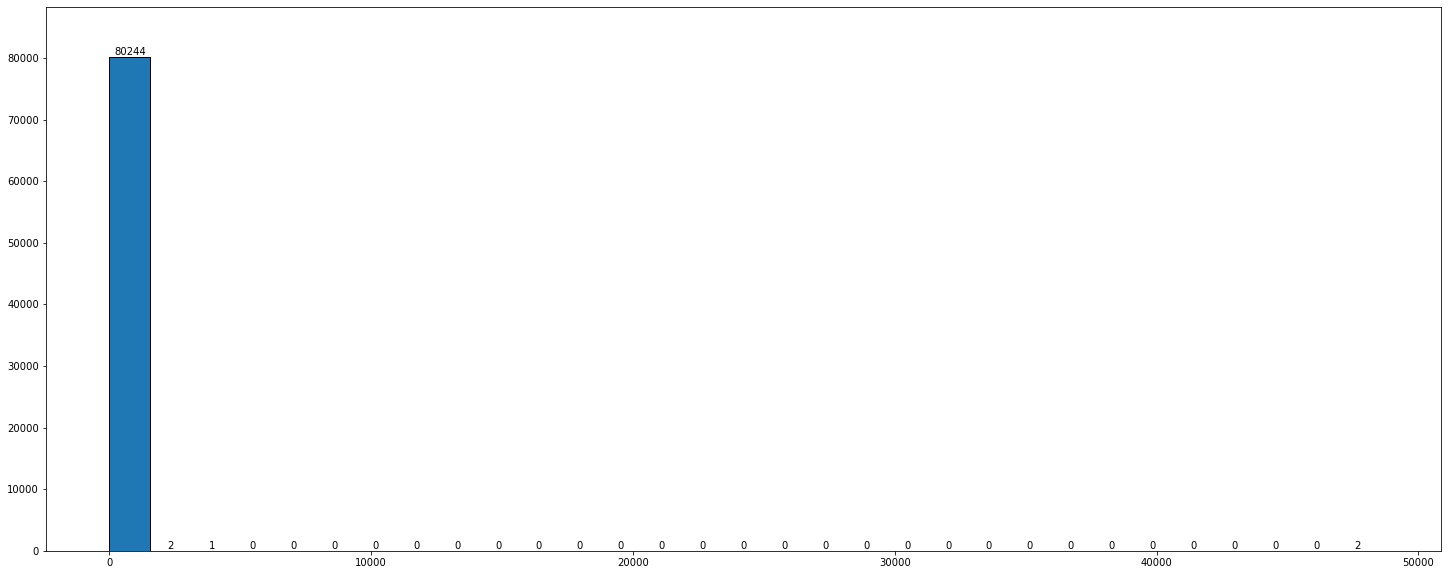

<Figure size 432x288 with 0 Axes>

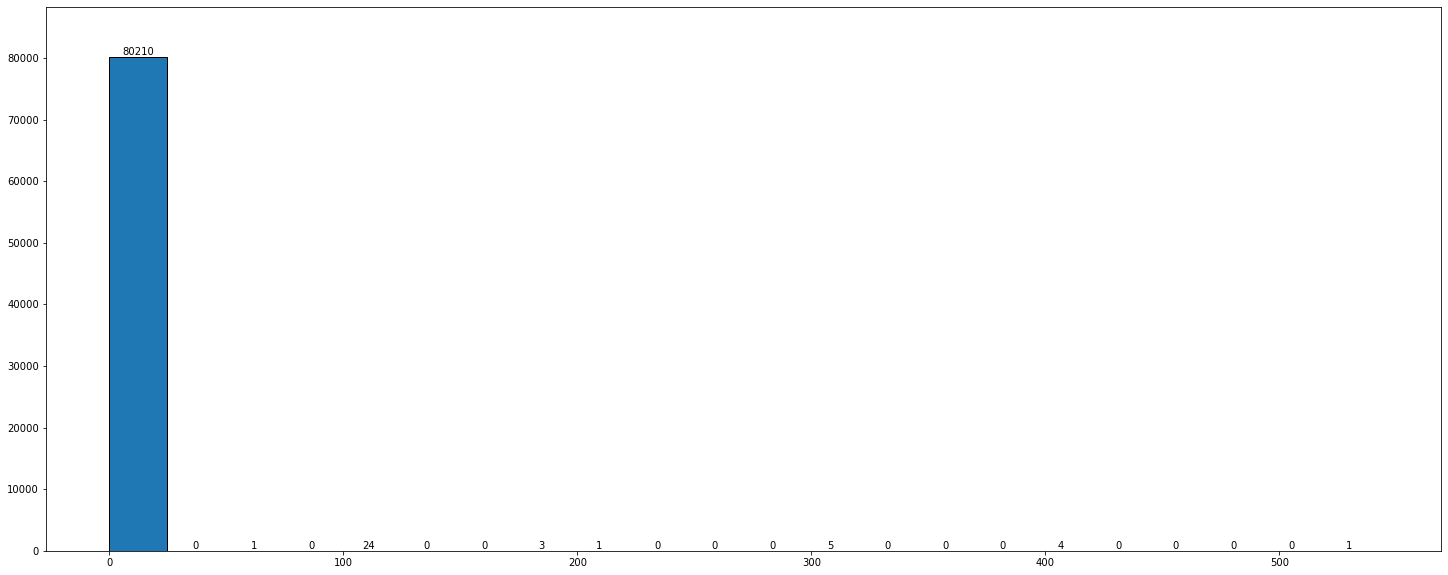

<Figure size 432x288 with 0 Axes>

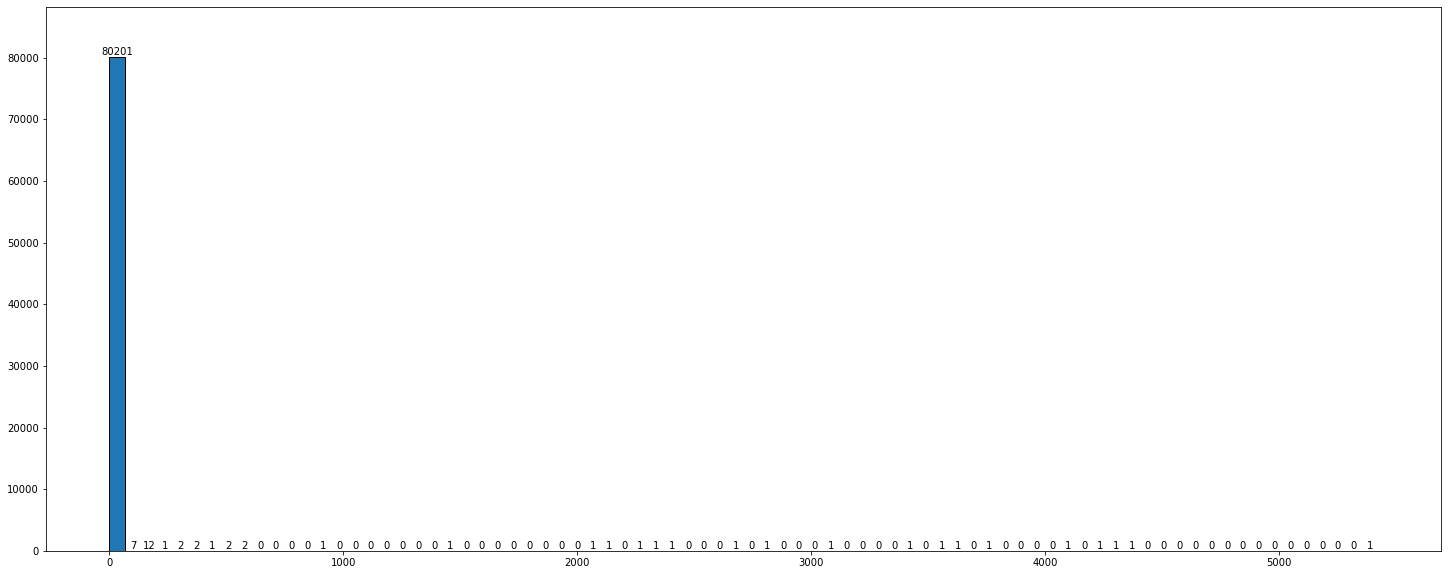

<Figure size 432x288 with 0 Axes>

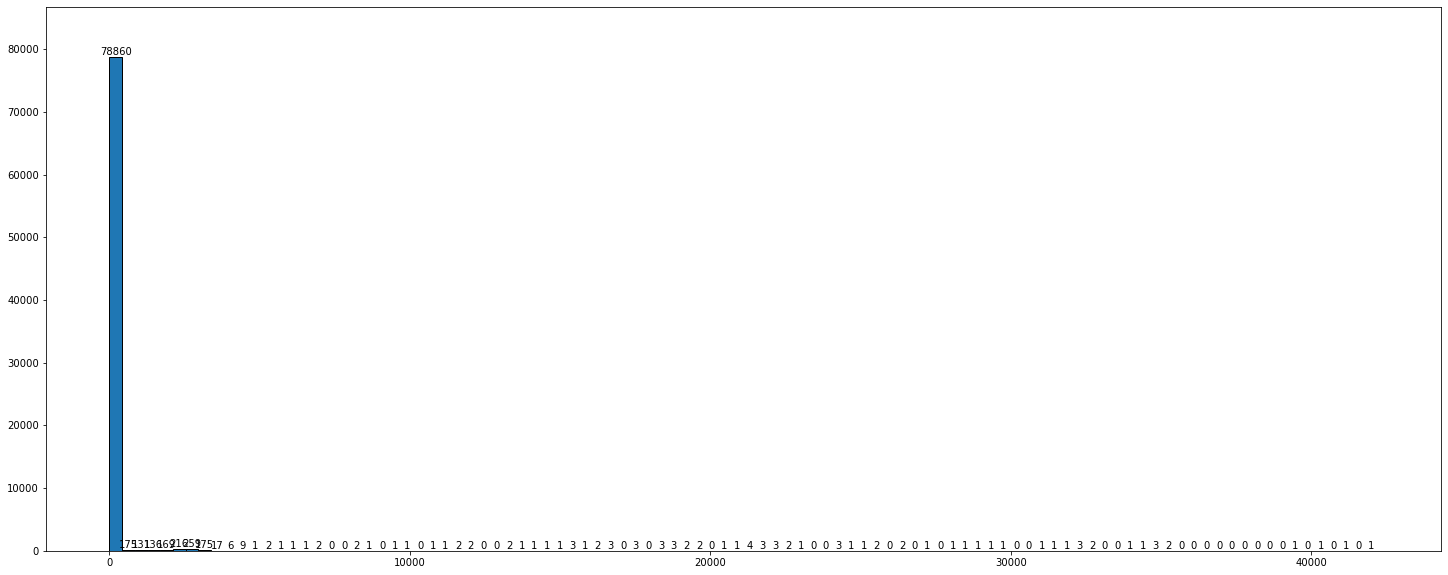

<Figure size 432x288 with 0 Axes>

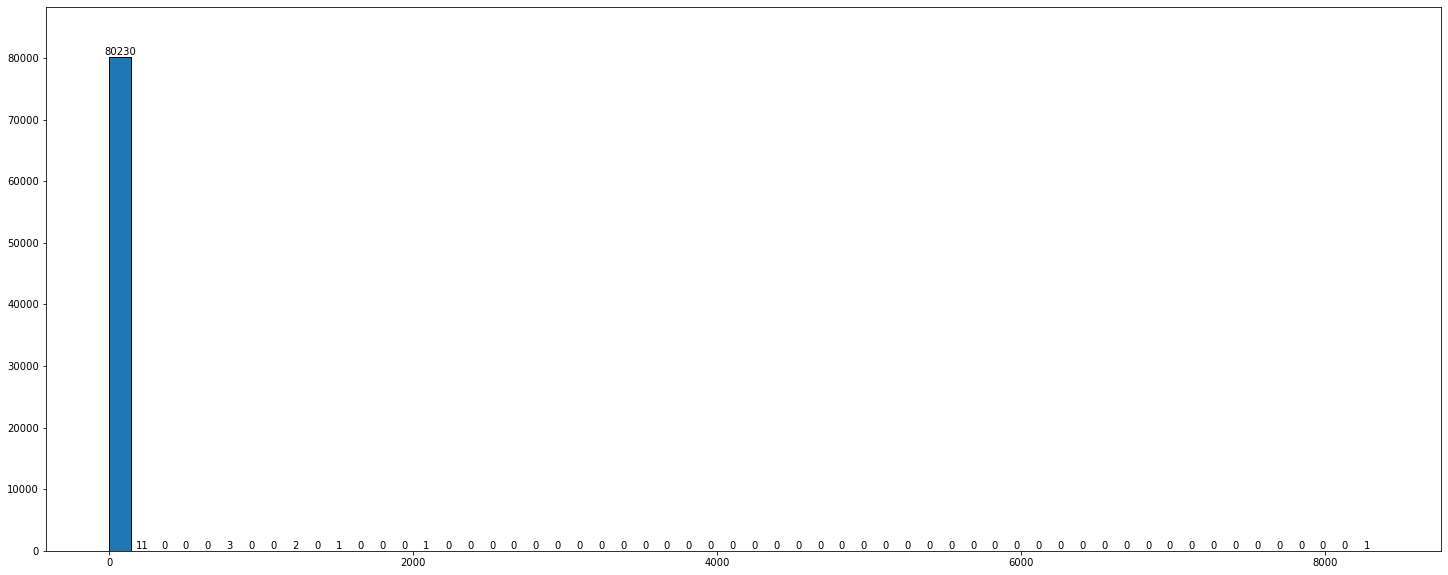

<Figure size 432x288 with 0 Axes>

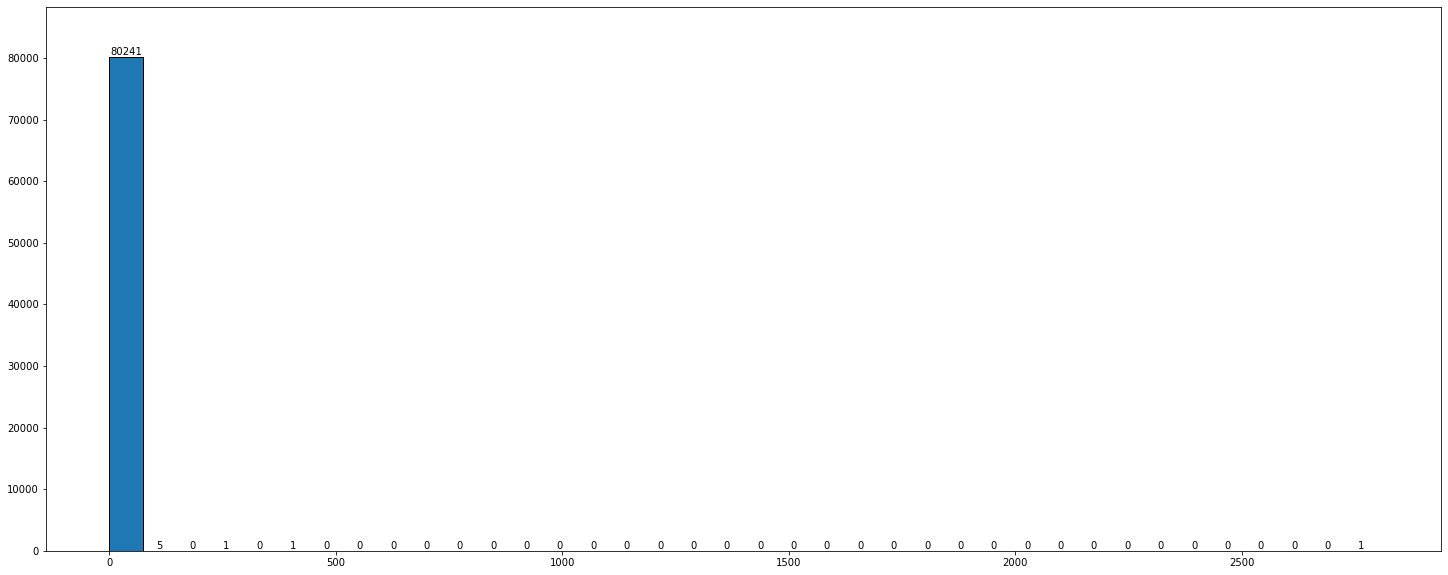

<Figure size 432x288 with 0 Axes>

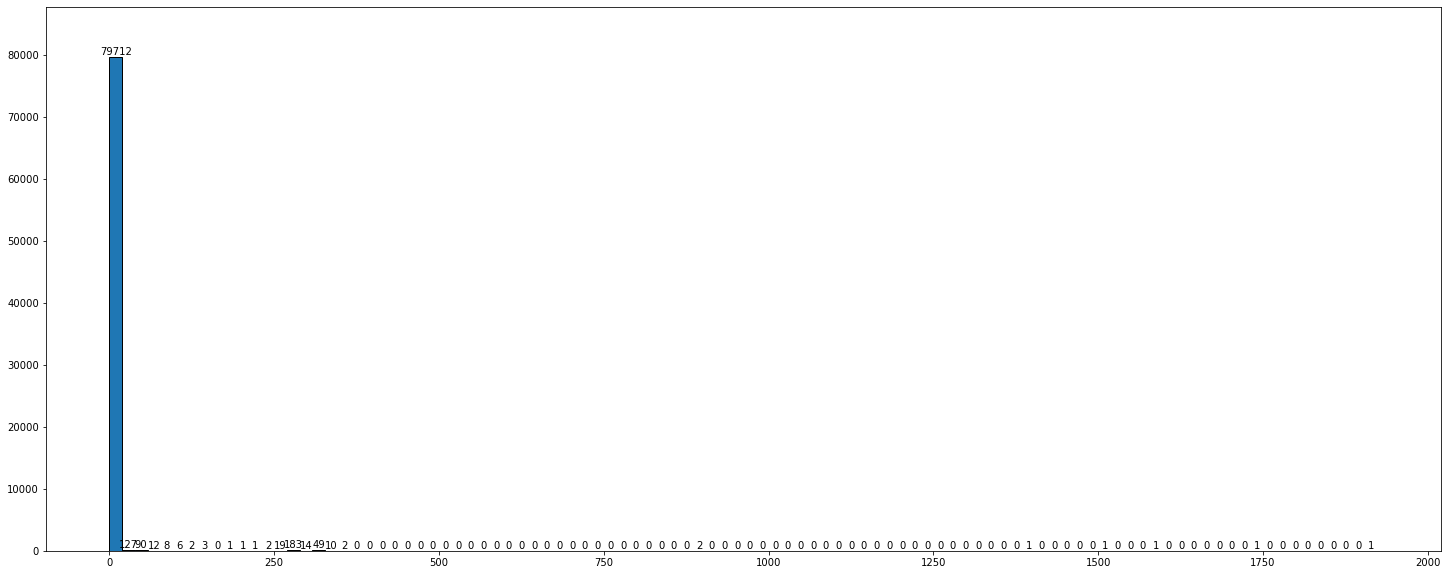

<Figure size 432x288 with 0 Axes>

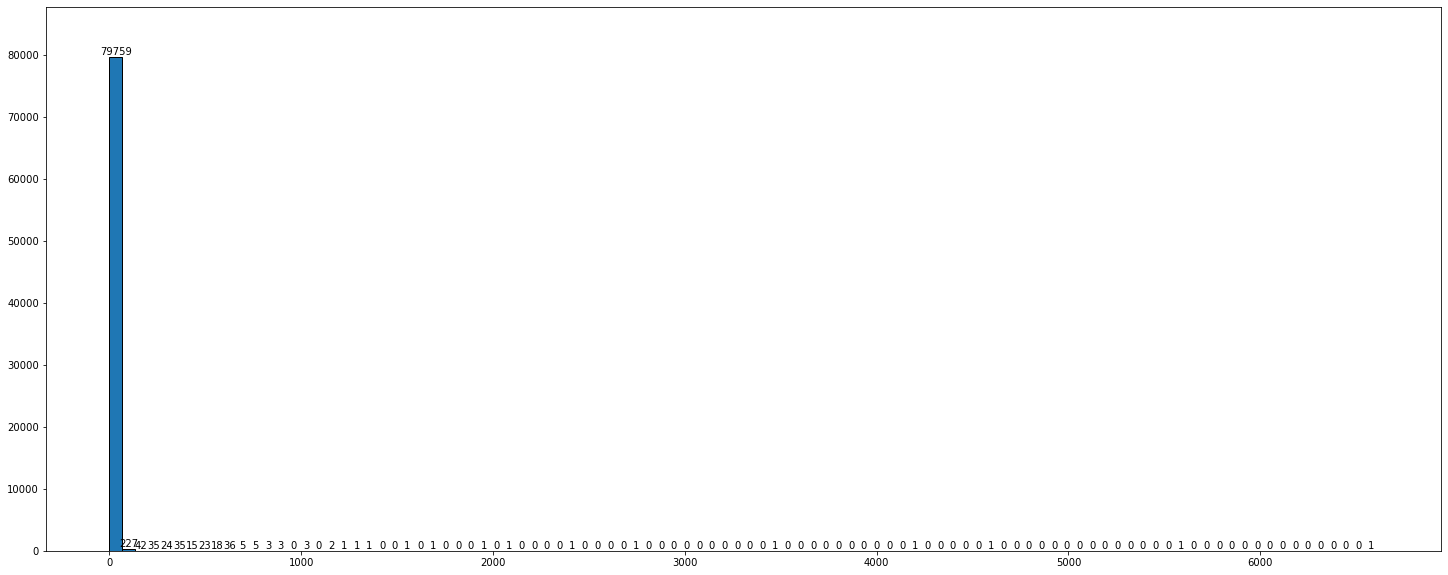

<Figure size 432x288 with 0 Axes>

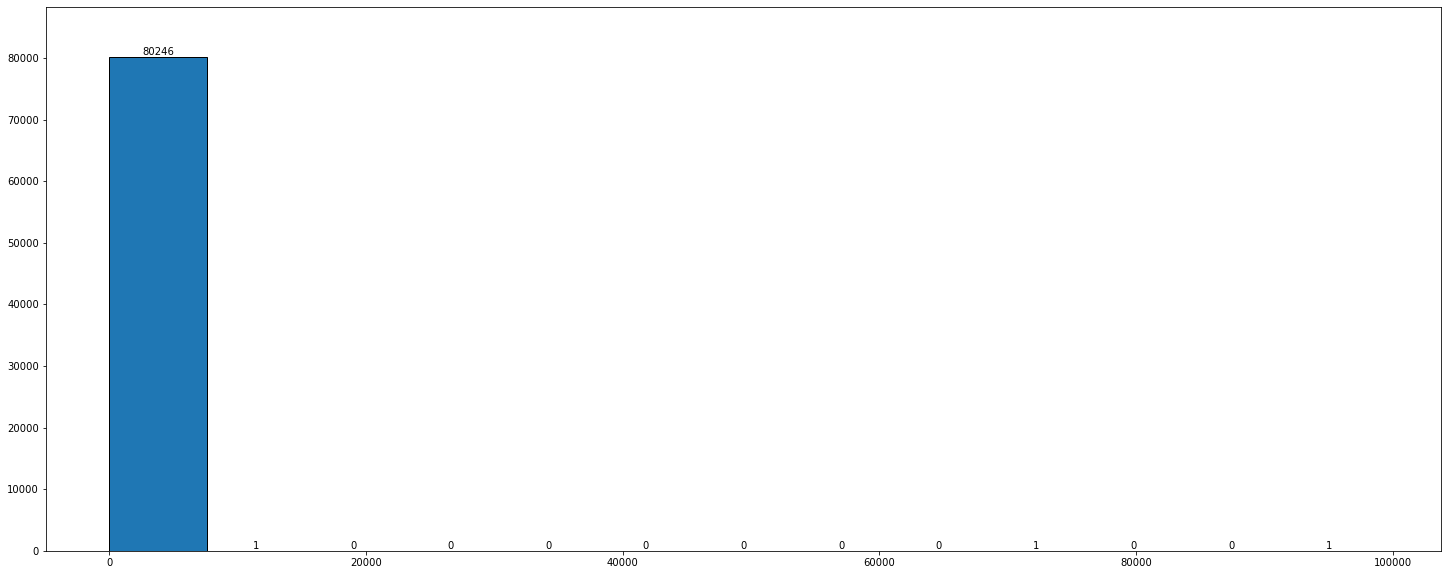

<Figure size 432x288 with 0 Axes>

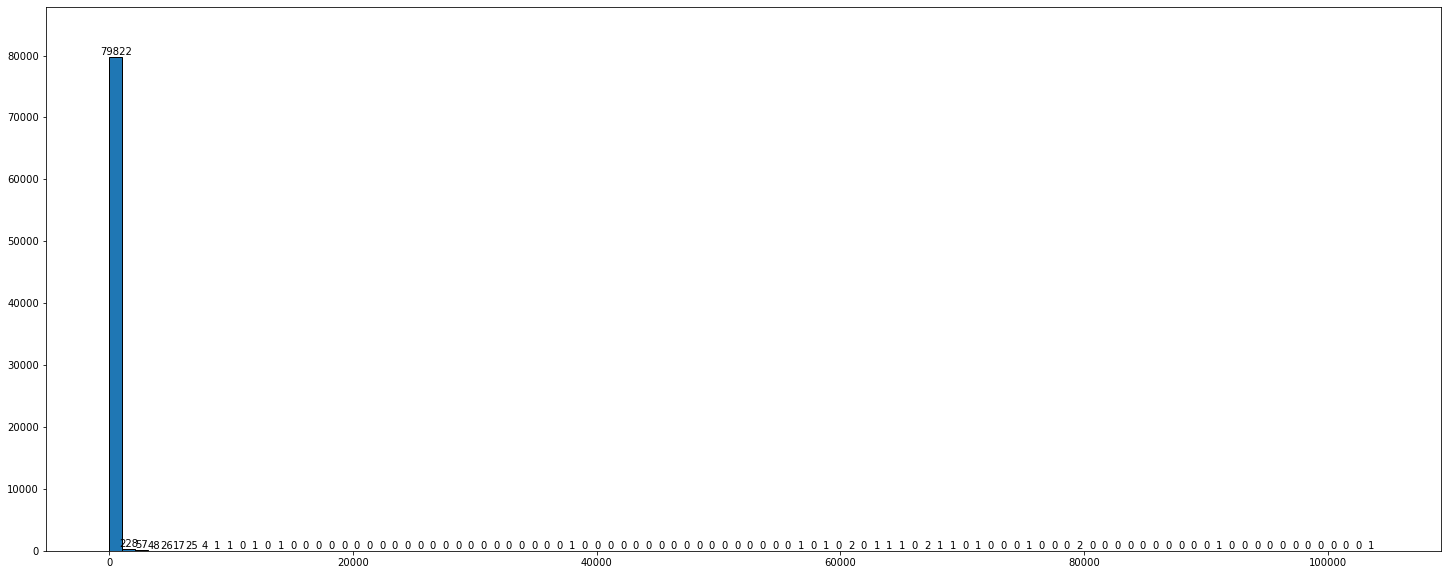

<Figure size 432x288 with 0 Axes>

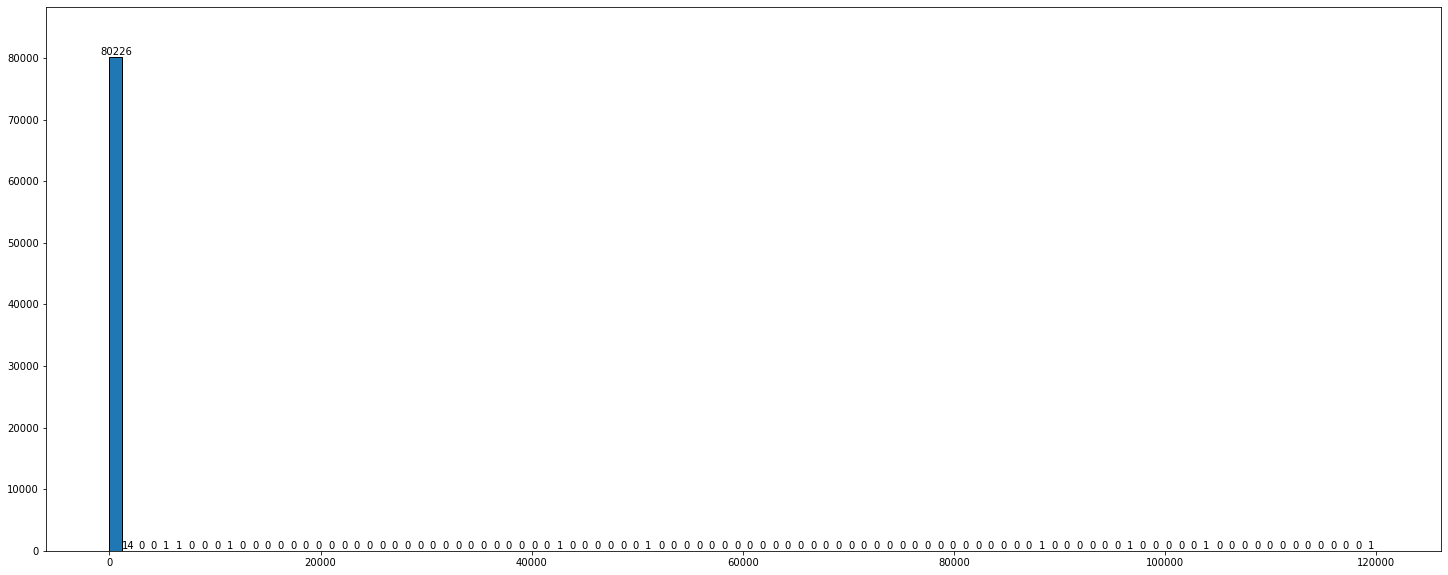

<Figure size 432x288 with 0 Axes>

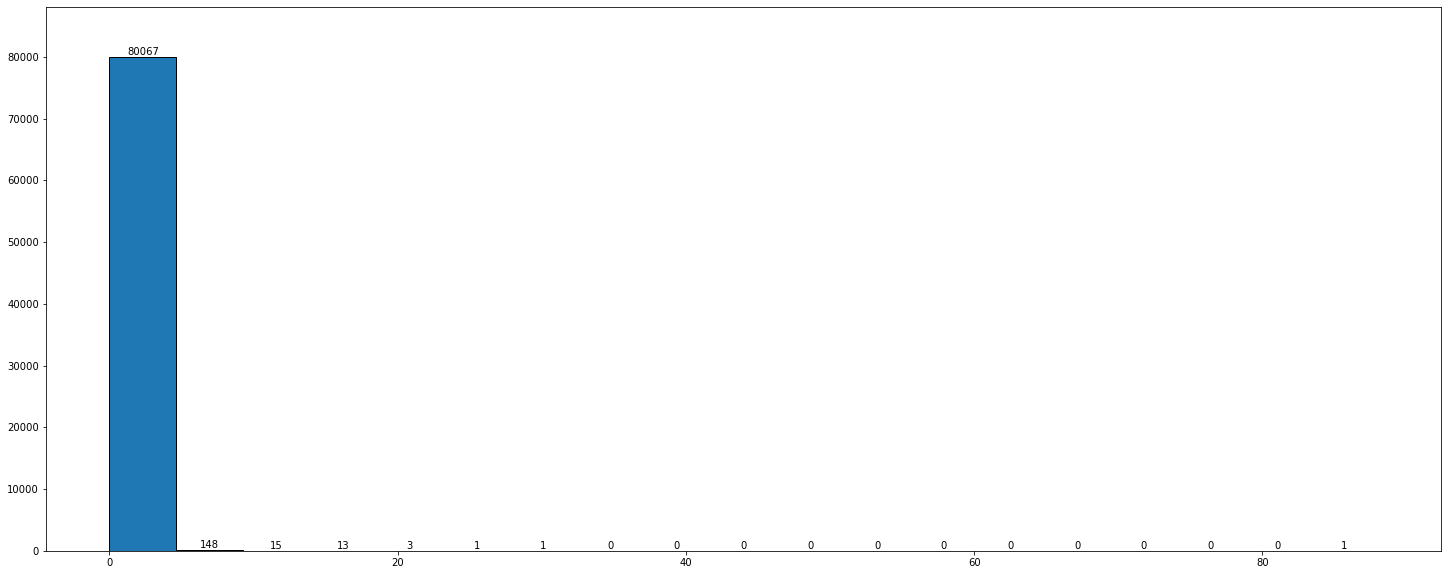

<Figure size 432x288 with 0 Axes>

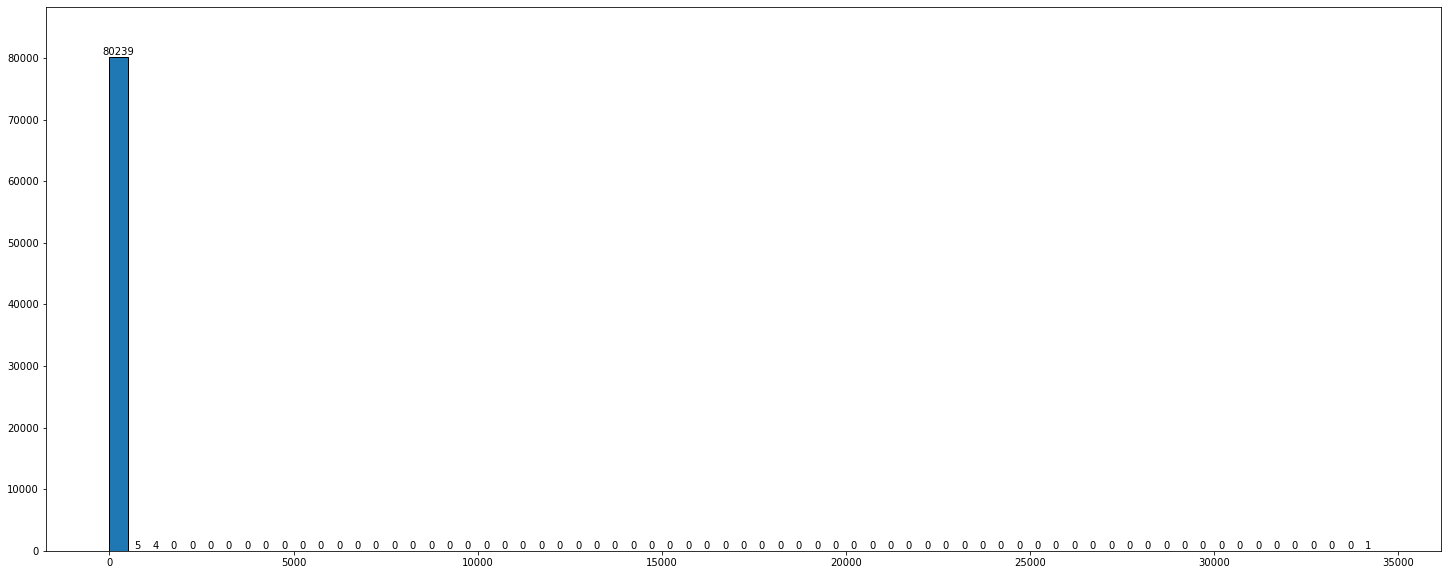

<Figure size 432x288 with 0 Axes>

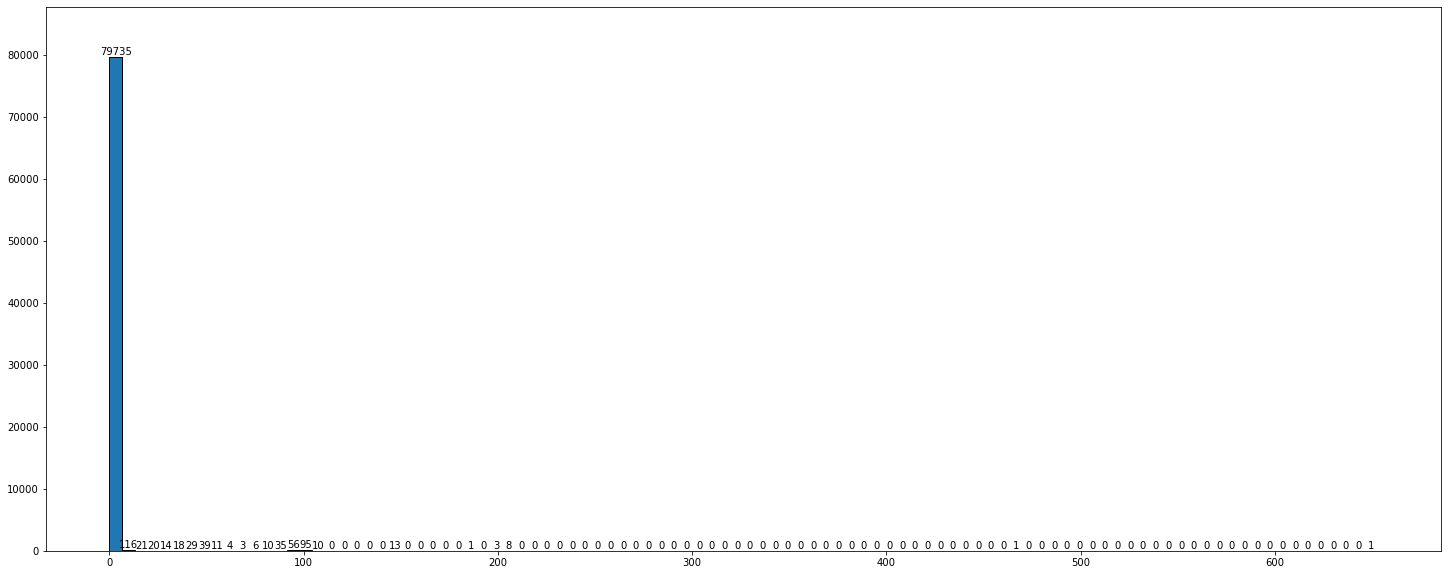

<Figure size 432x288 with 0 Axes>

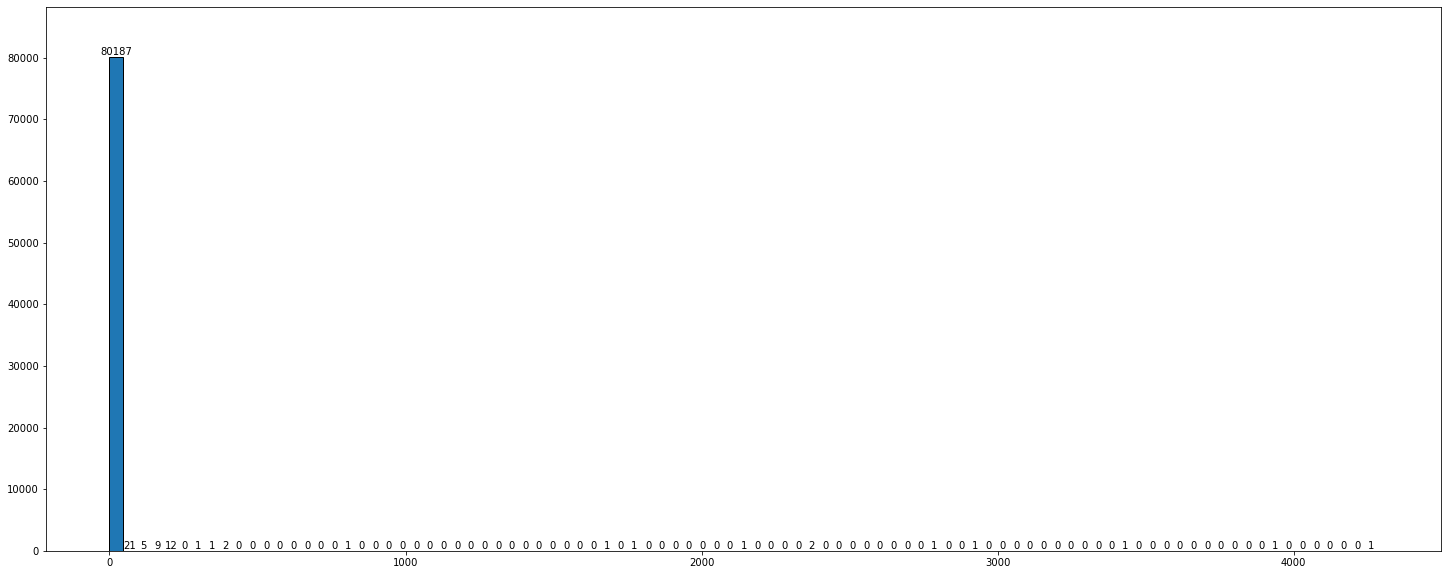

<Figure size 432x288 with 0 Axes>

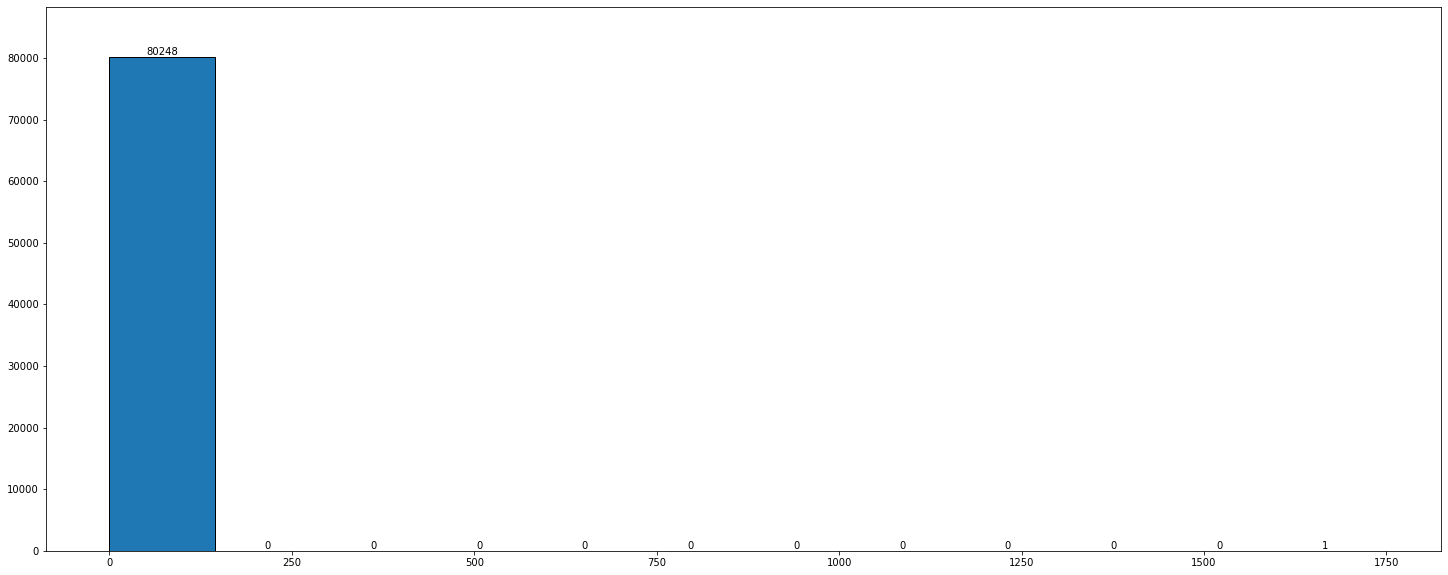

<Figure size 432x288 with 0 Axes>

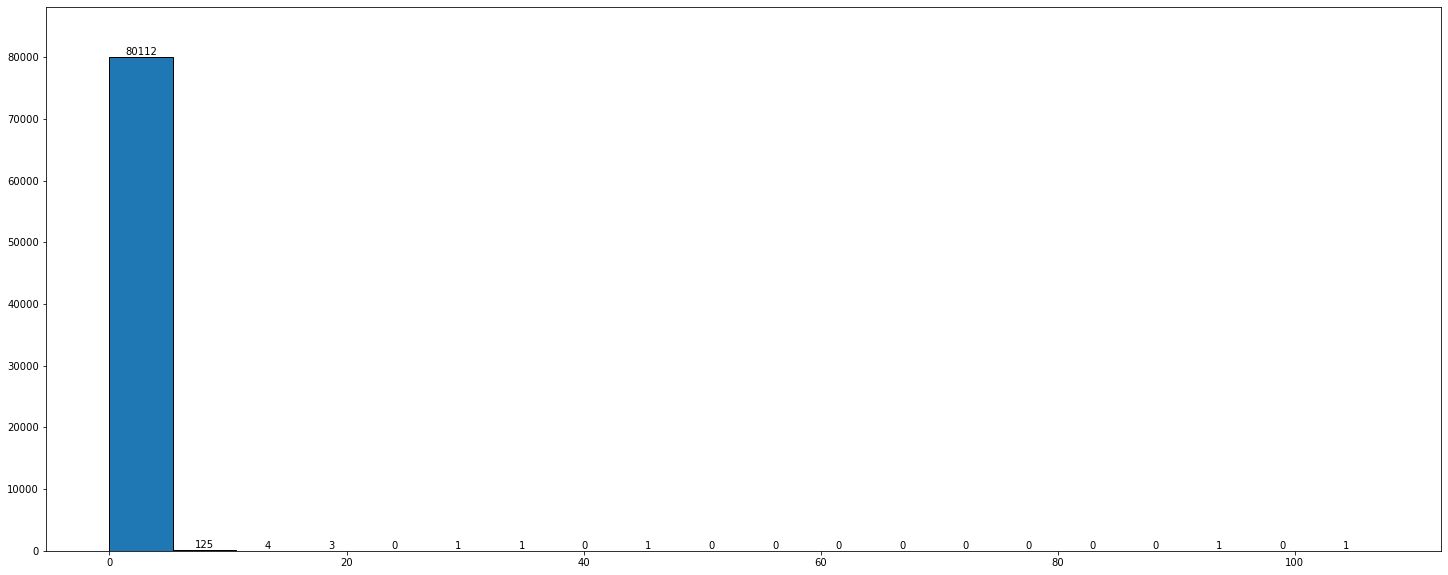

<Figure size 432x288 with 0 Axes>

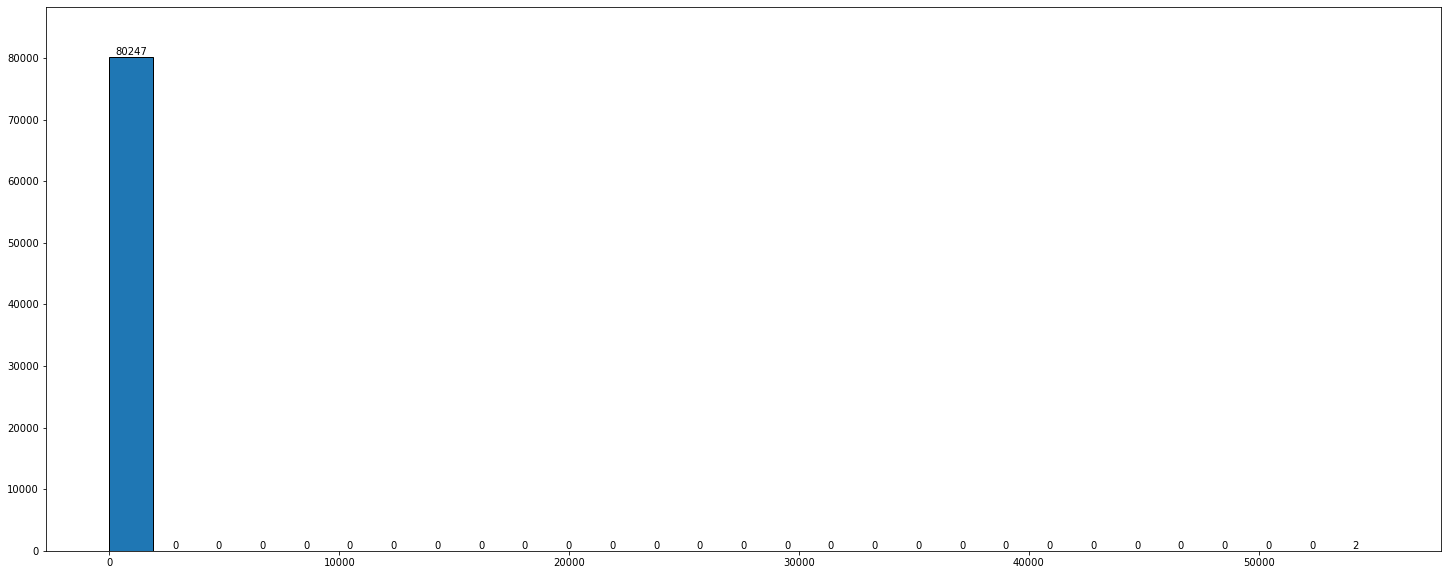

<Figure size 432x288 with 0 Axes>

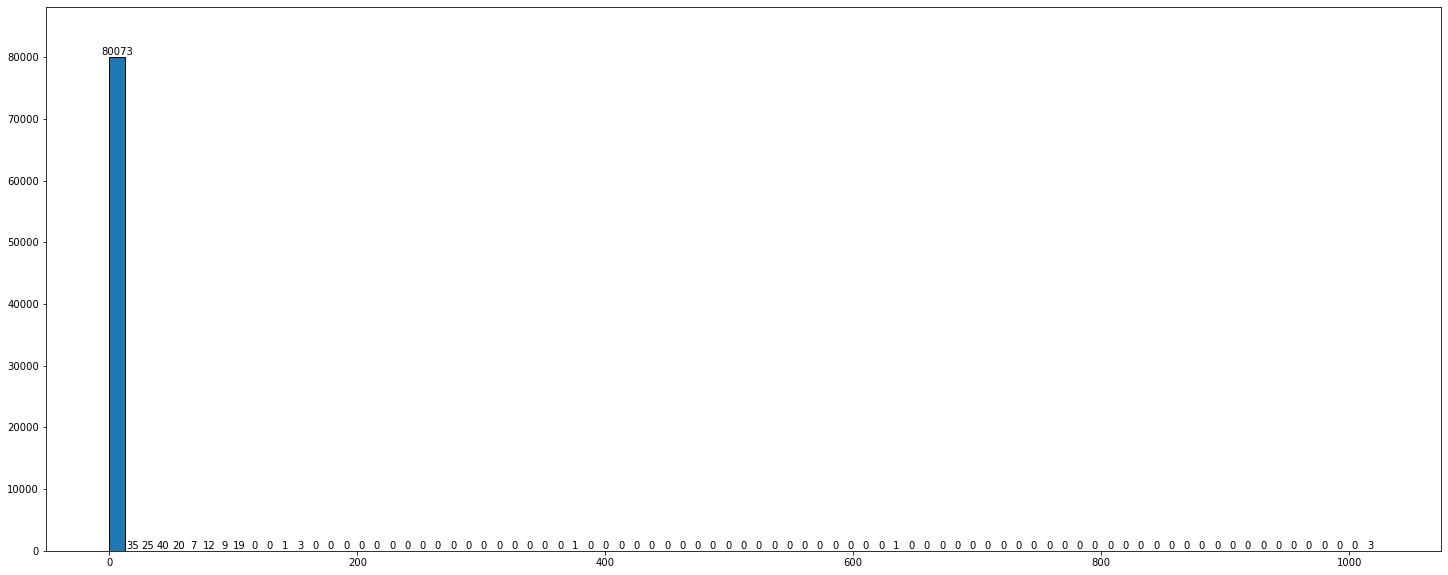

<Figure size 432x288 with 0 Axes>

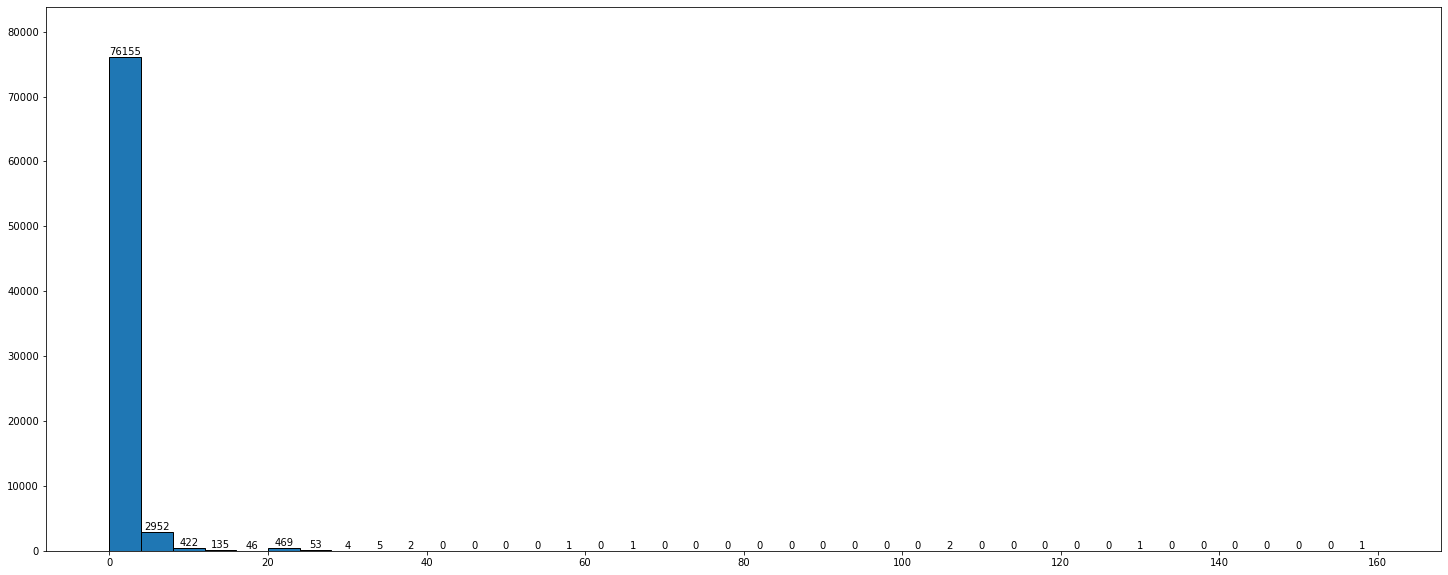

<Figure size 432x288 with 0 Axes>

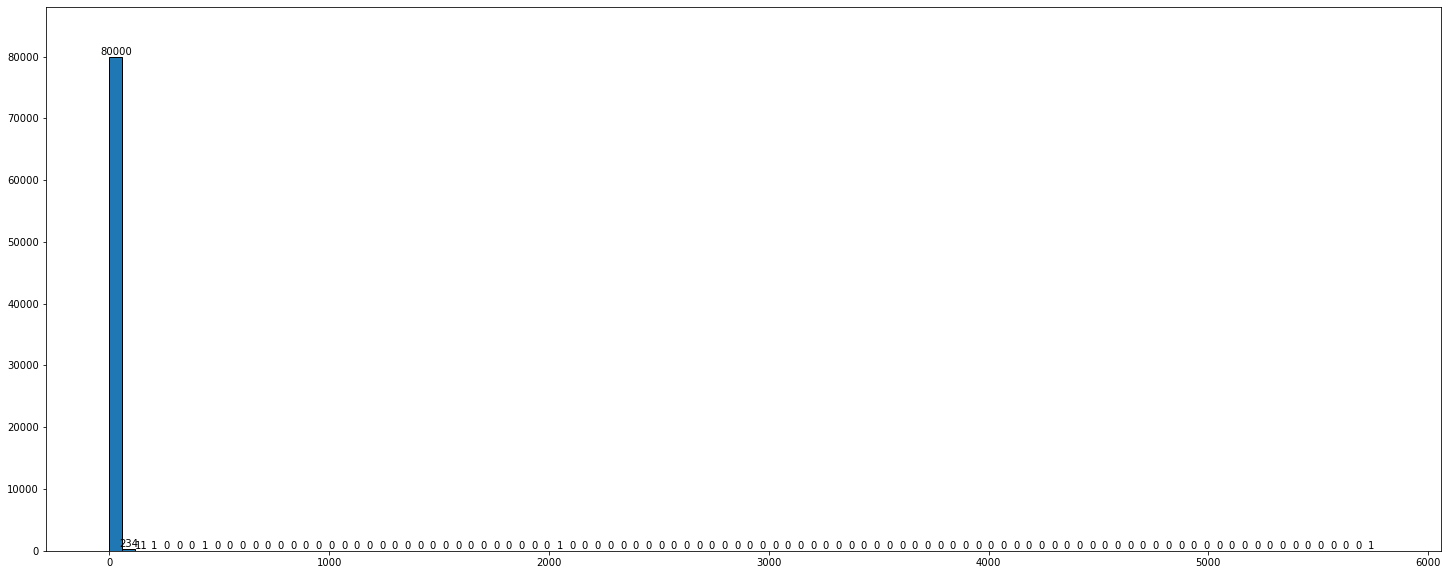

<Figure size 432x288 with 0 Axes>

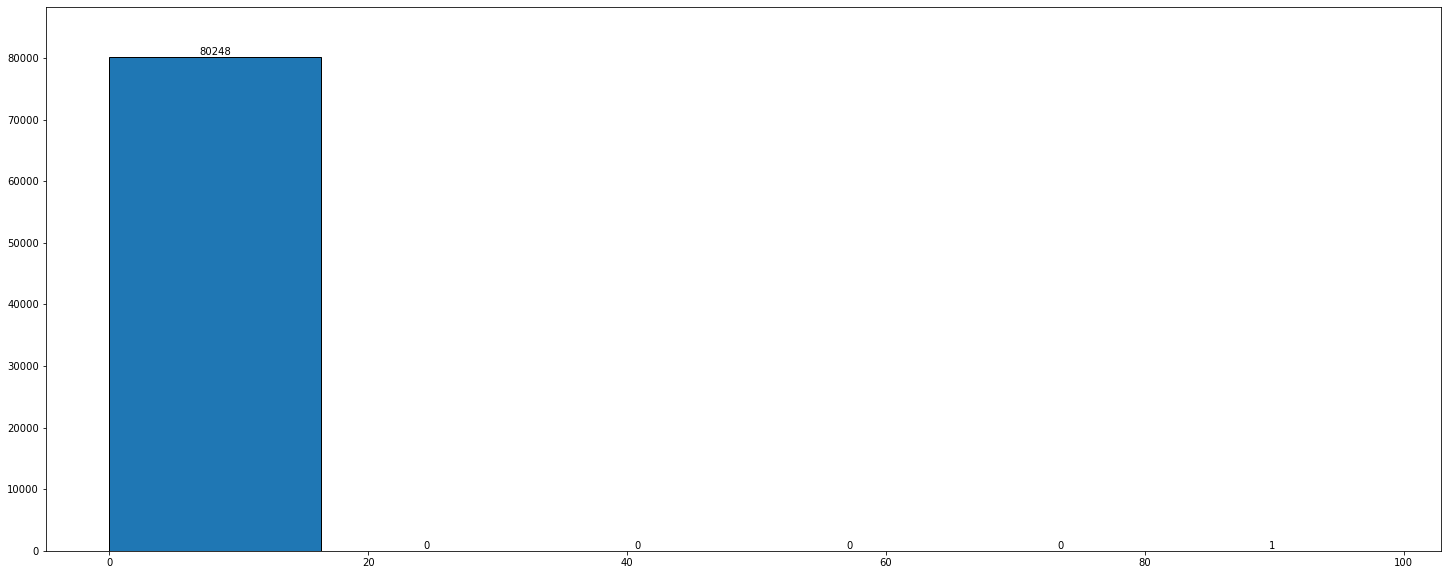

<Figure size 432x288 with 0 Axes>

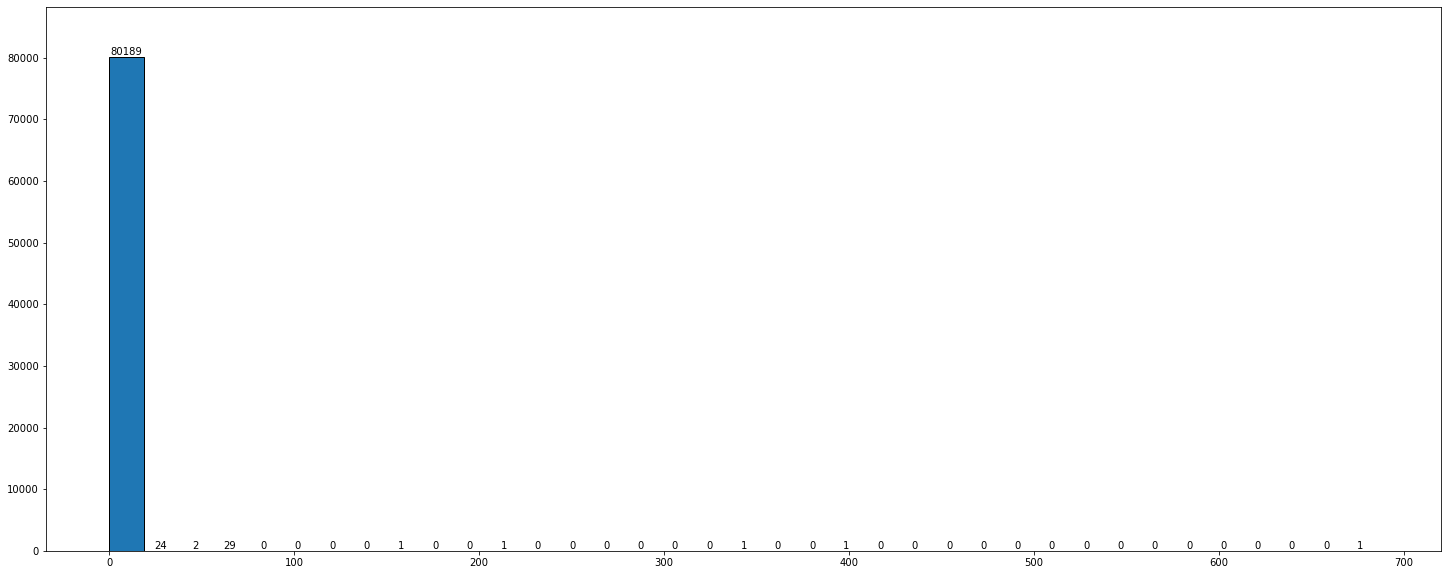

<Figure size 432x288 with 0 Axes>

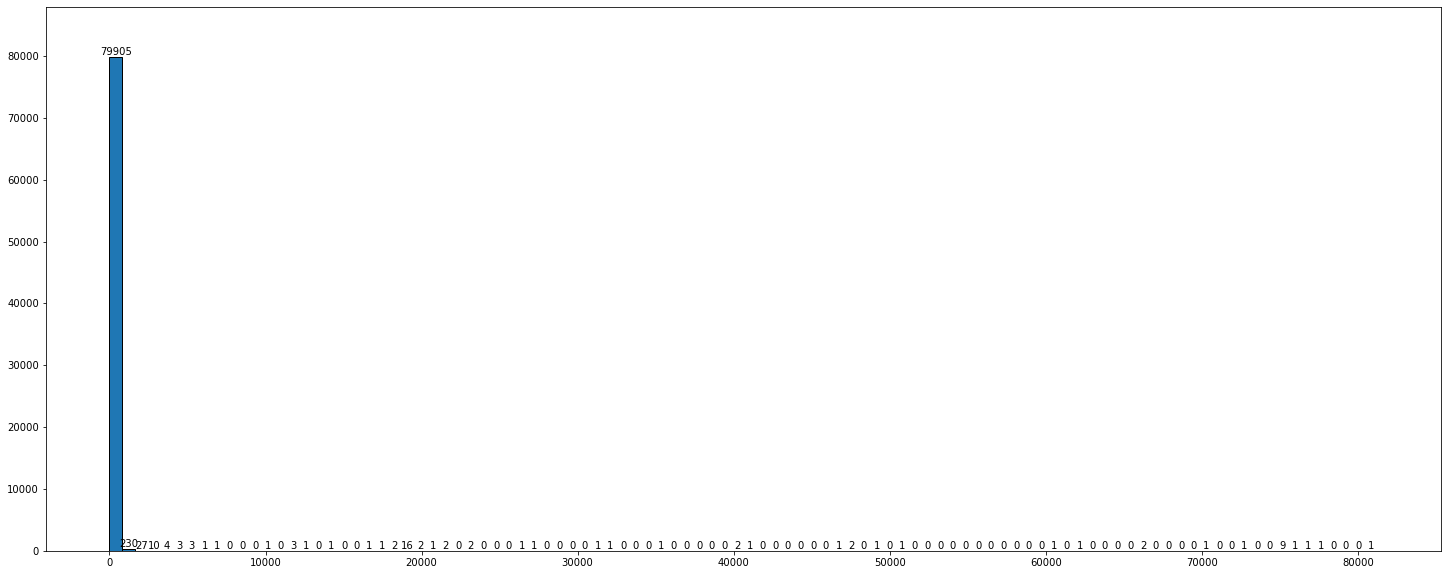

<Figure size 432x288 with 0 Axes>

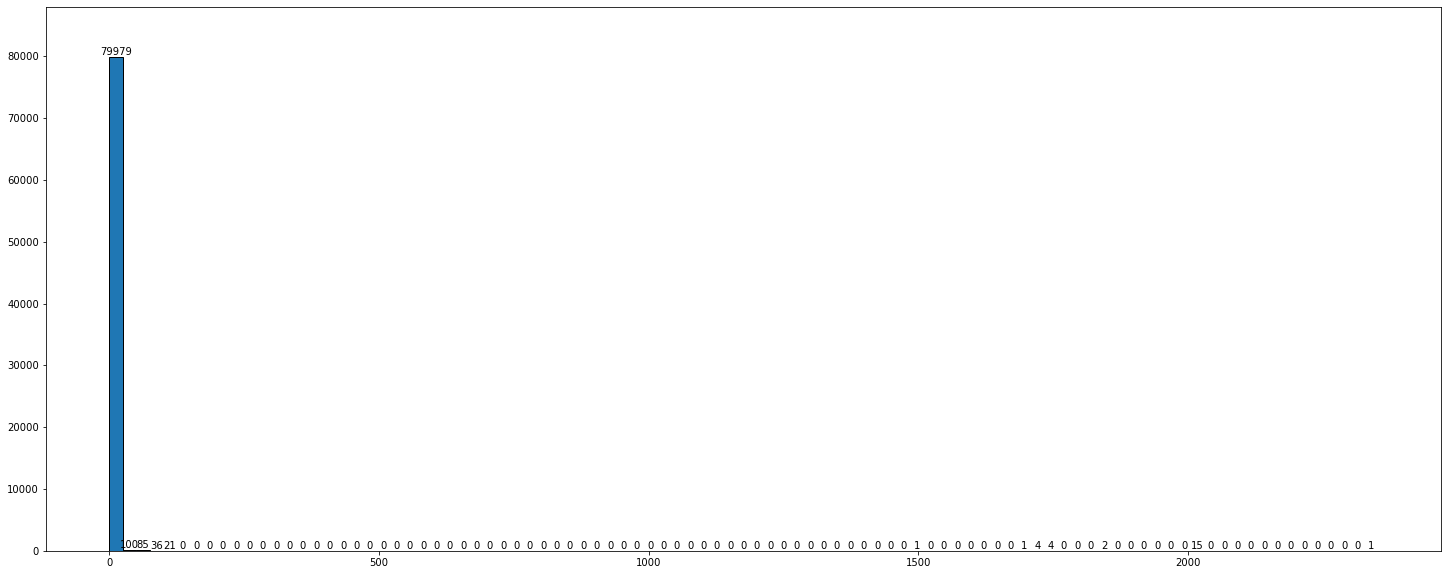

<Figure size 432x288 with 0 Axes>

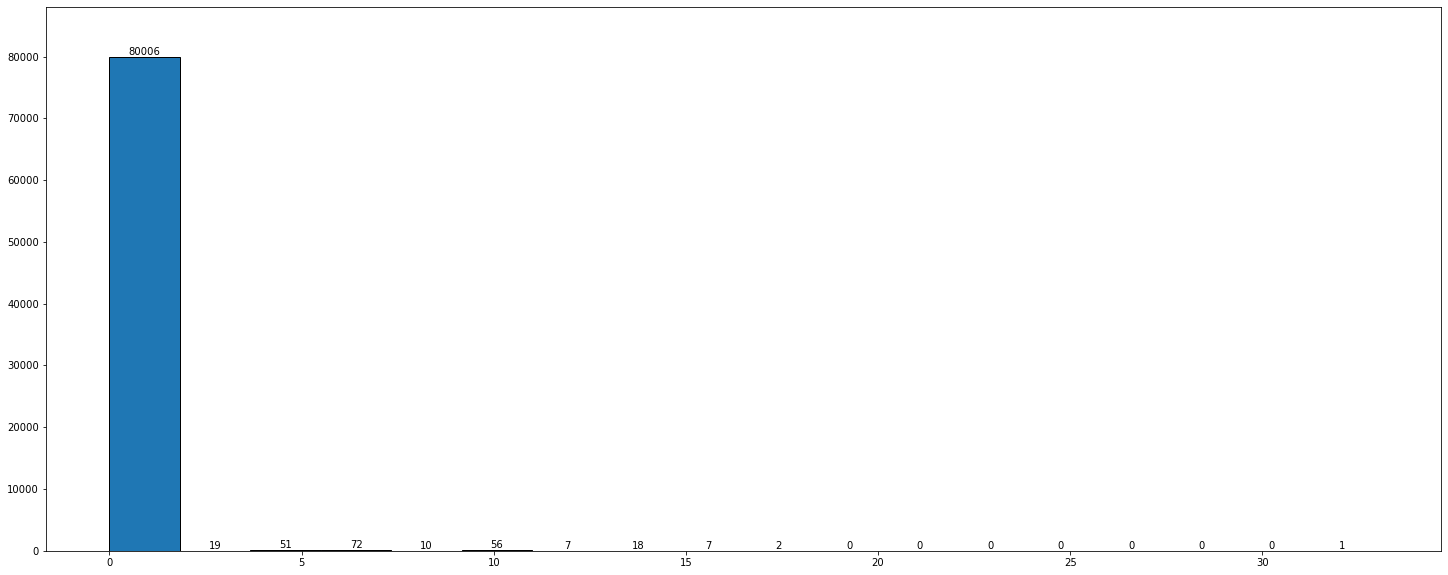

<Figure size 432x288 with 0 Axes>

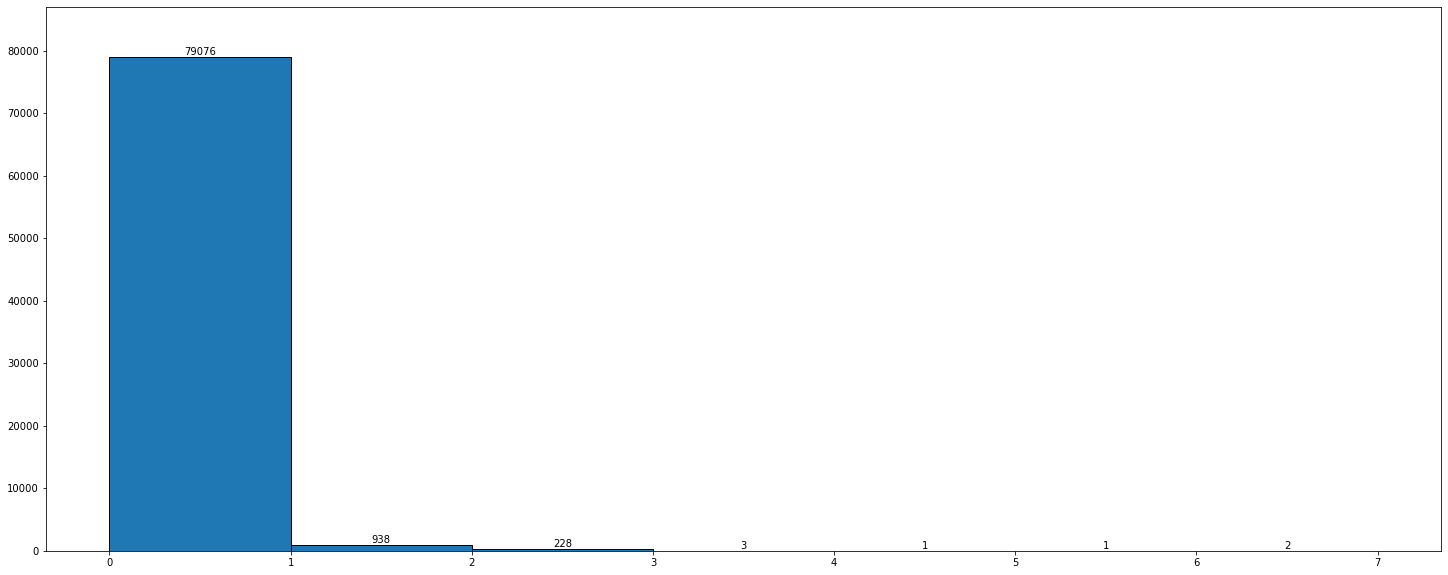

<Figure size 432x288 with 0 Axes>

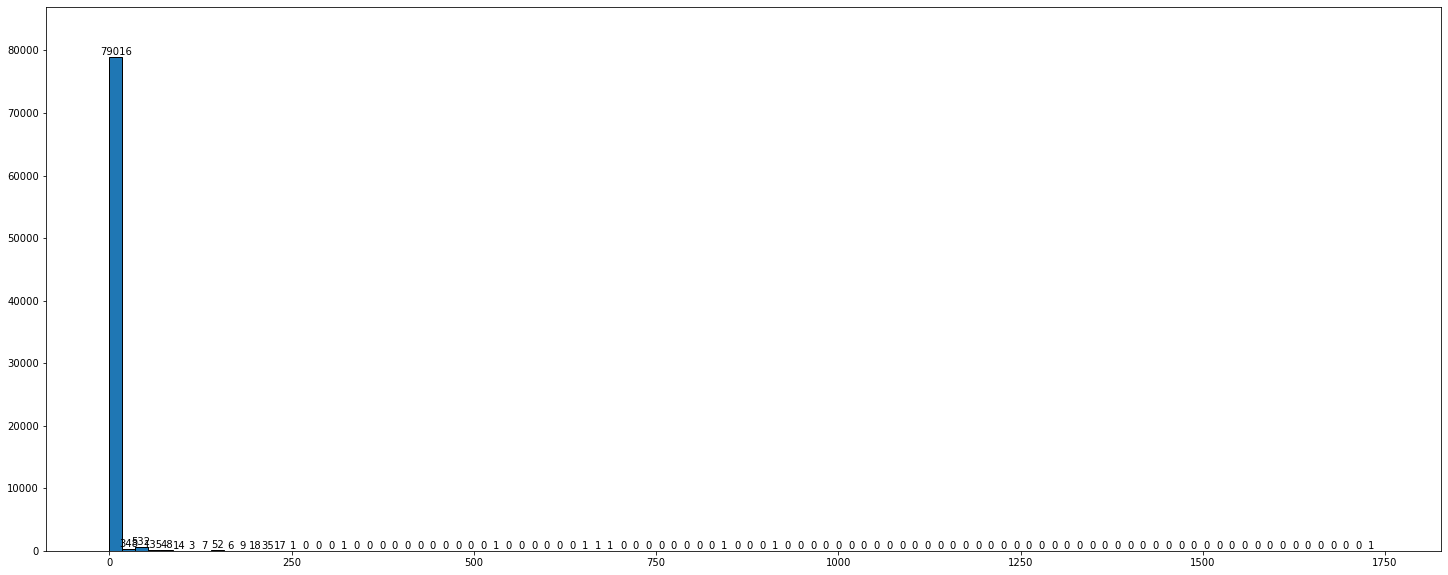

<Figure size 432x288 with 0 Axes>

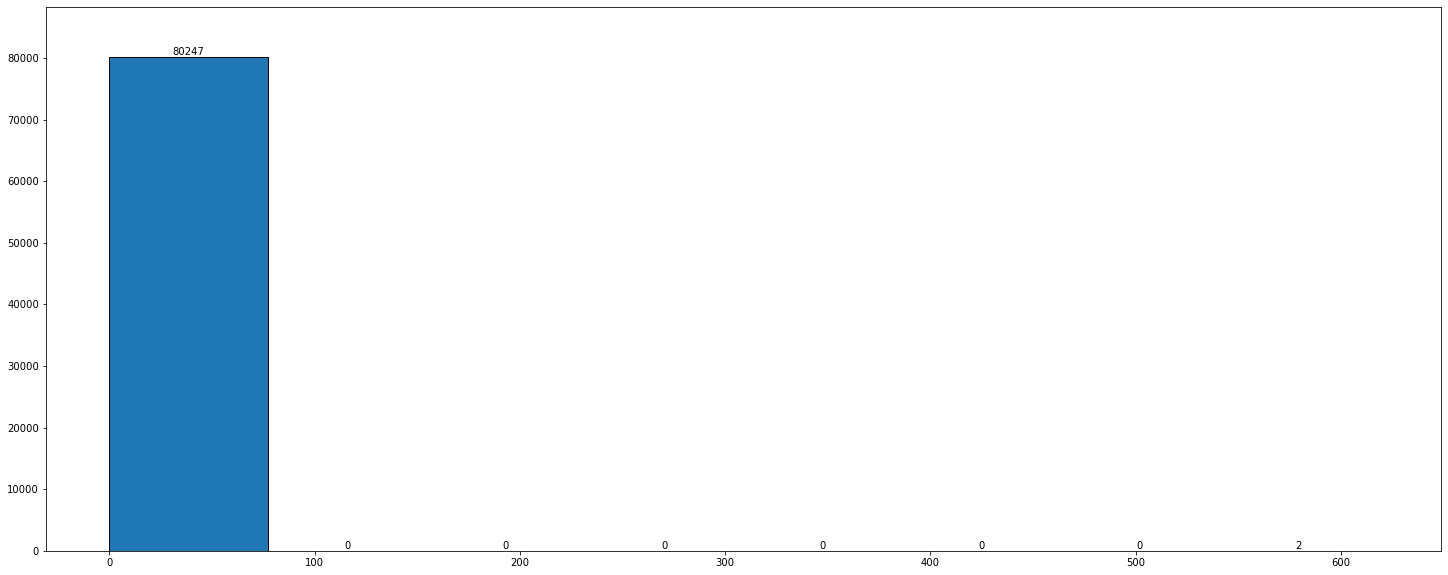

<Figure size 432x288 with 0 Axes>

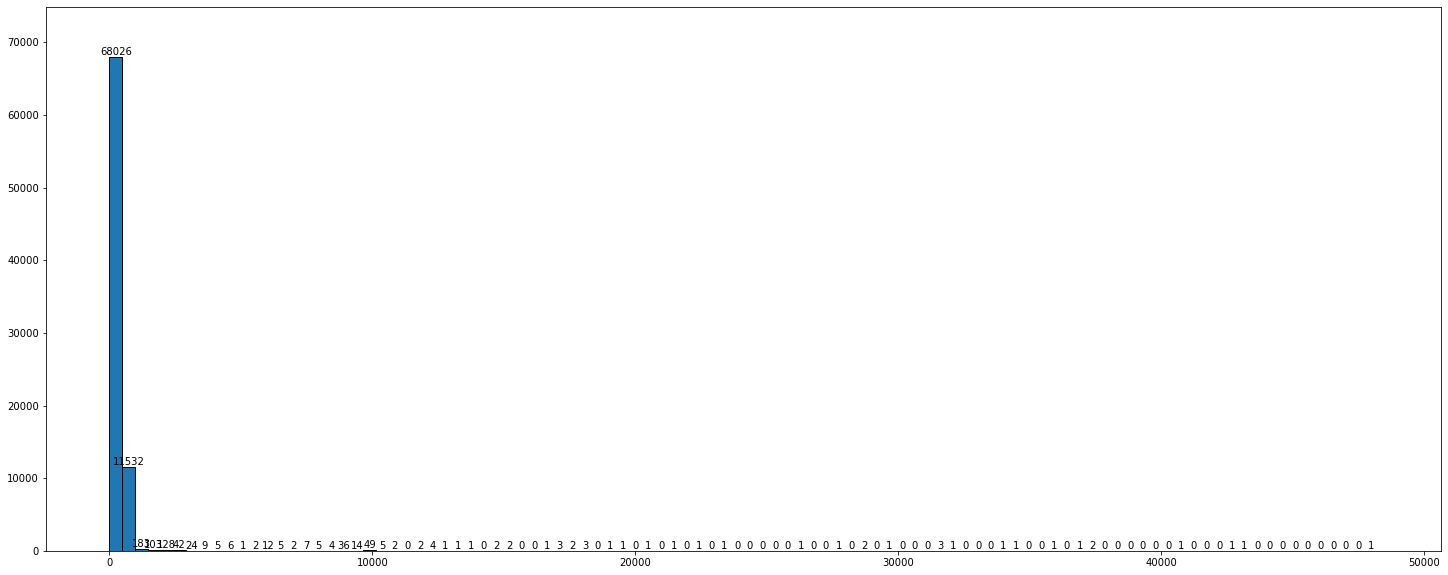

<Figure size 432x288 with 0 Axes>

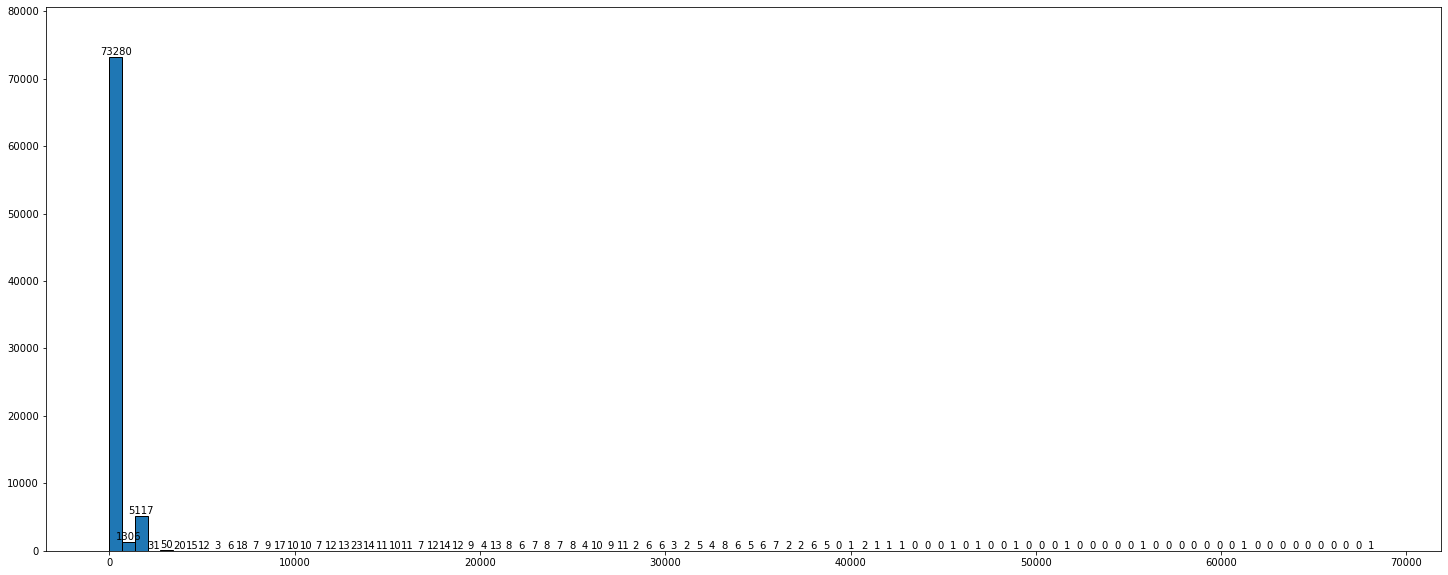

<Figure size 432x288 with 0 Axes>

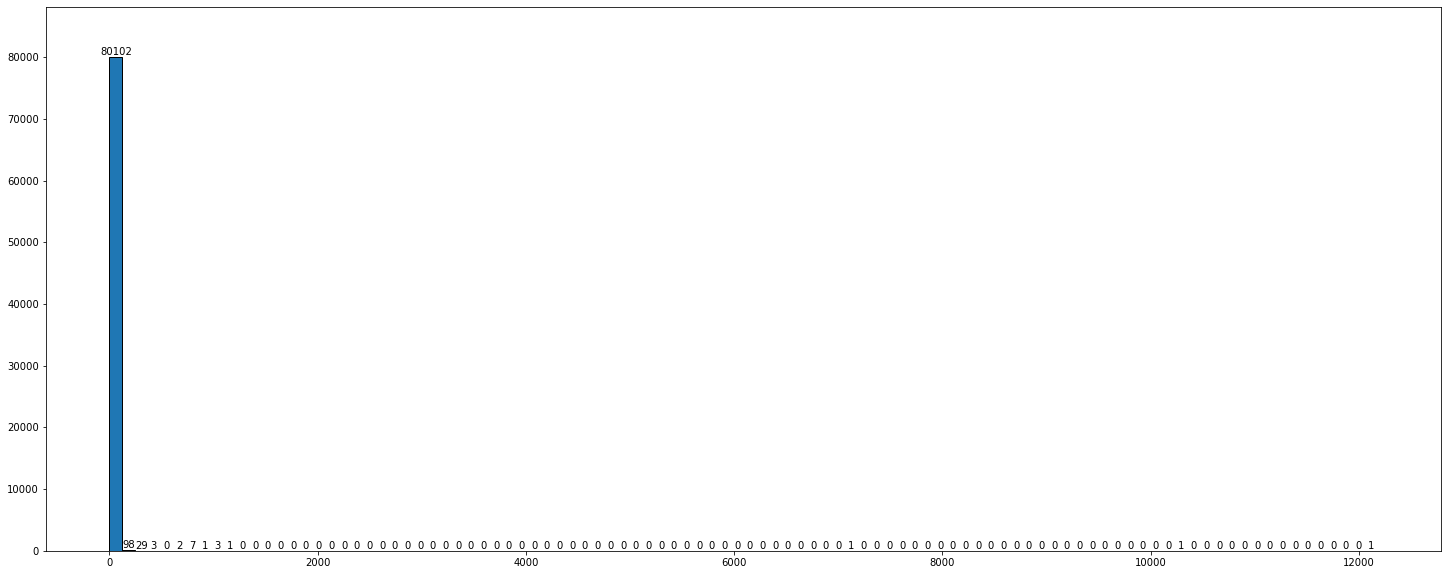

<Figure size 432x288 with 0 Axes>

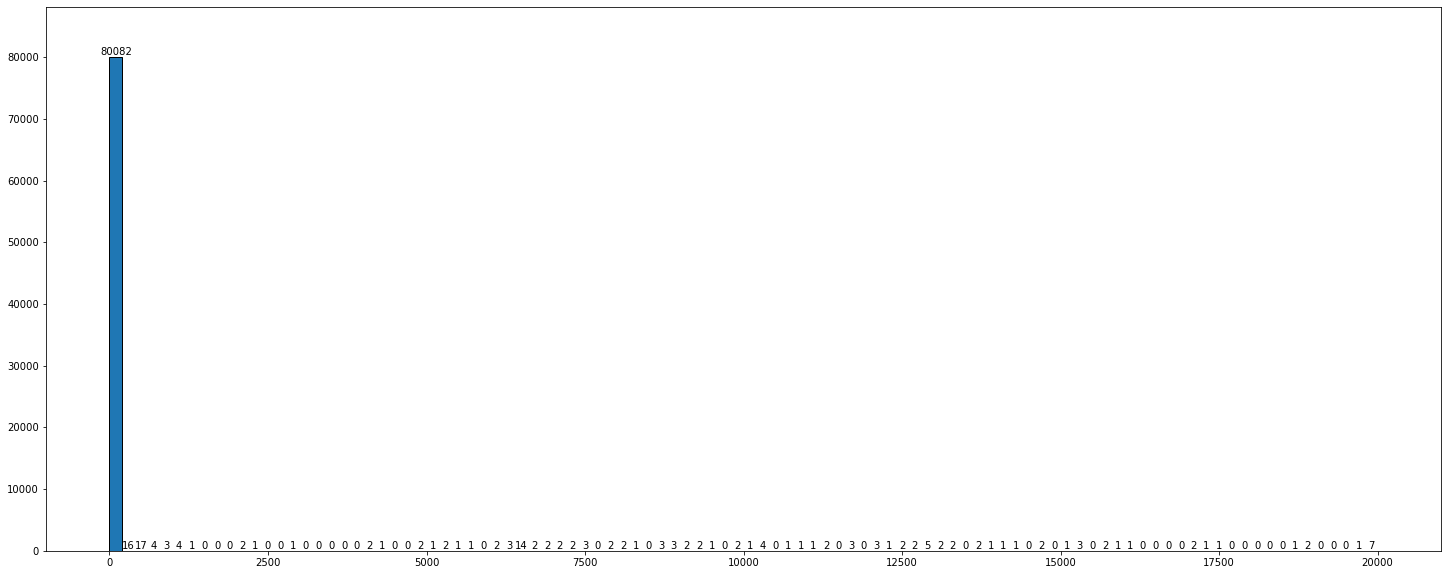

<Figure size 432x288 with 0 Axes>

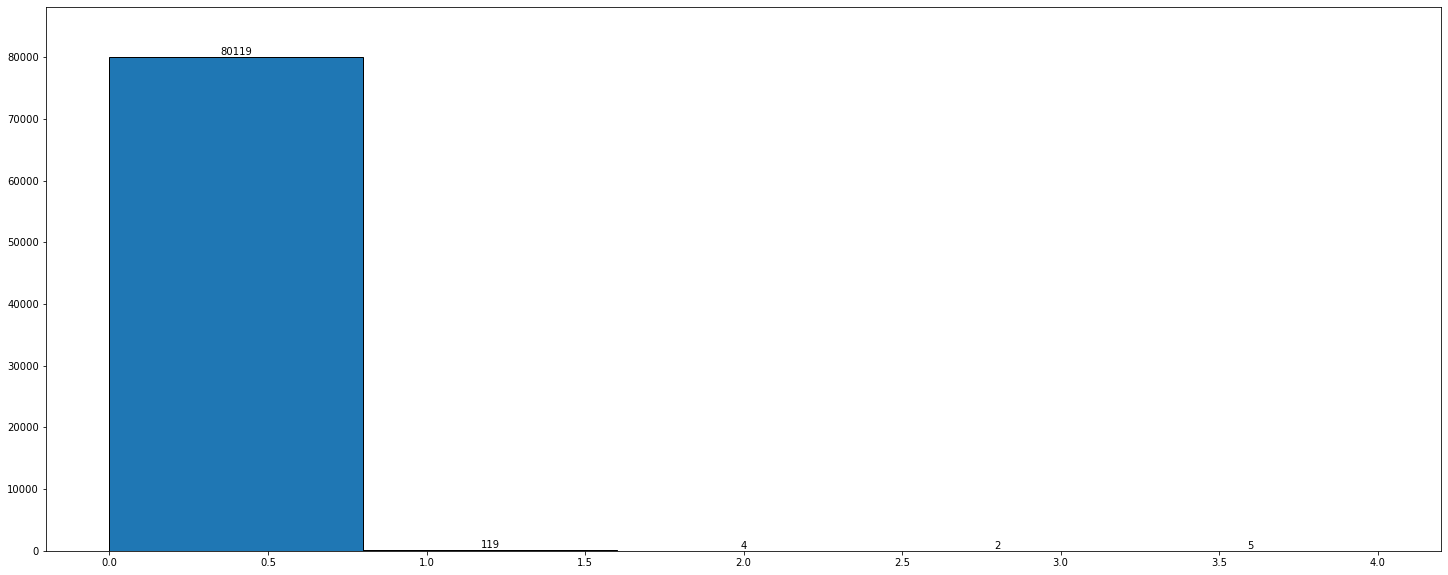

<Figure size 432x288 with 0 Axes>

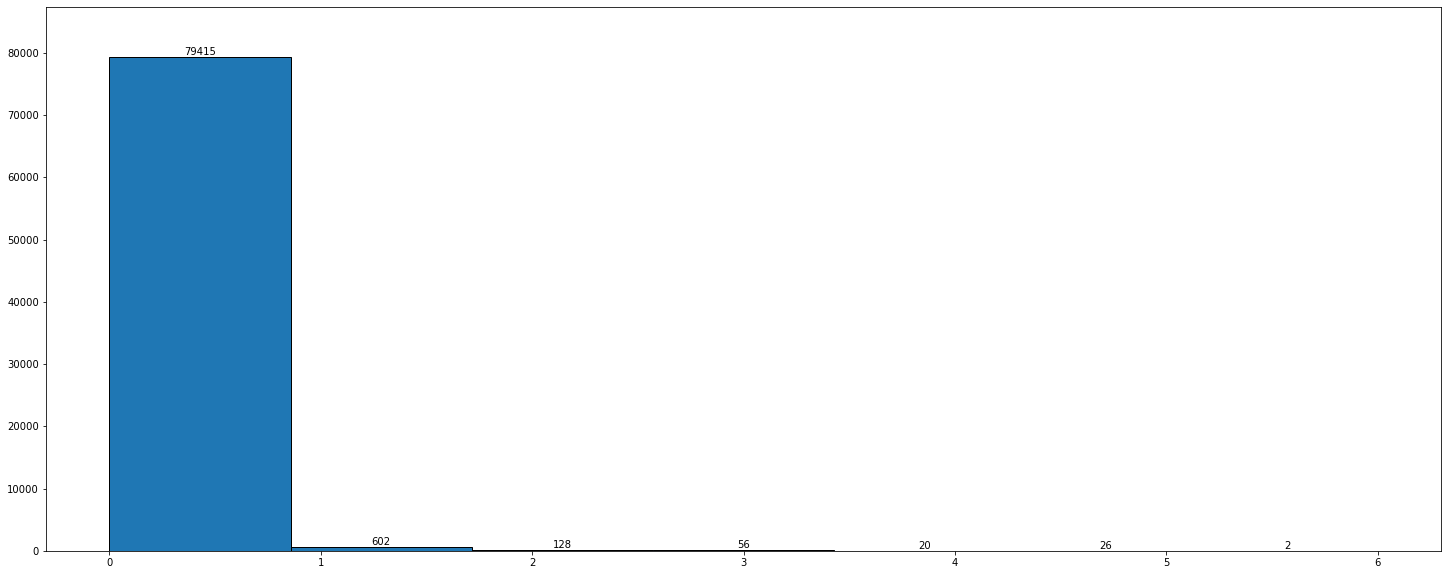

<Figure size 432x288 with 0 Axes>

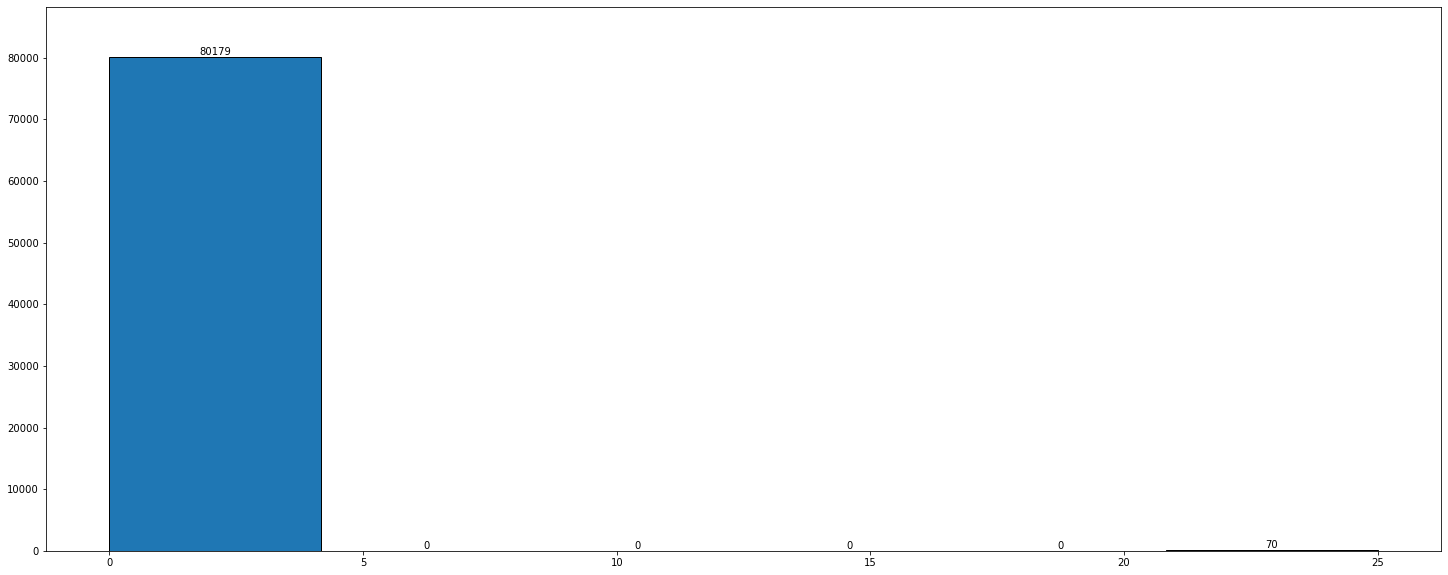

<Figure size 432x288 with 0 Axes>

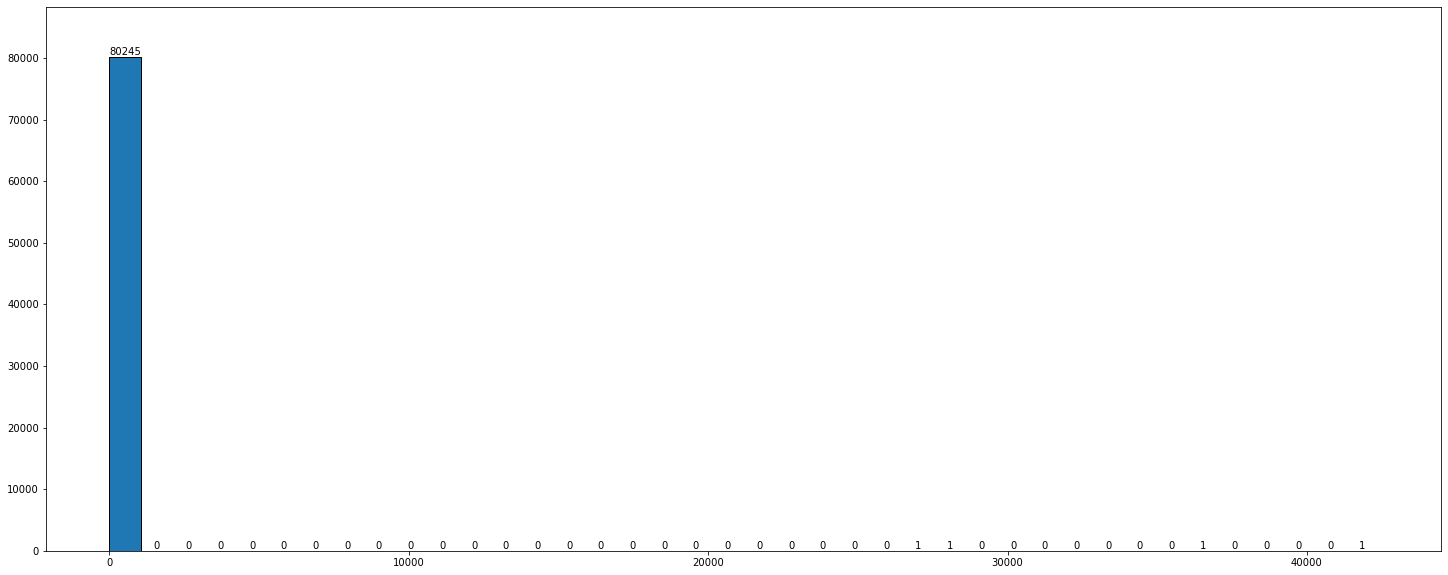

<Figure size 432x288 with 0 Axes>

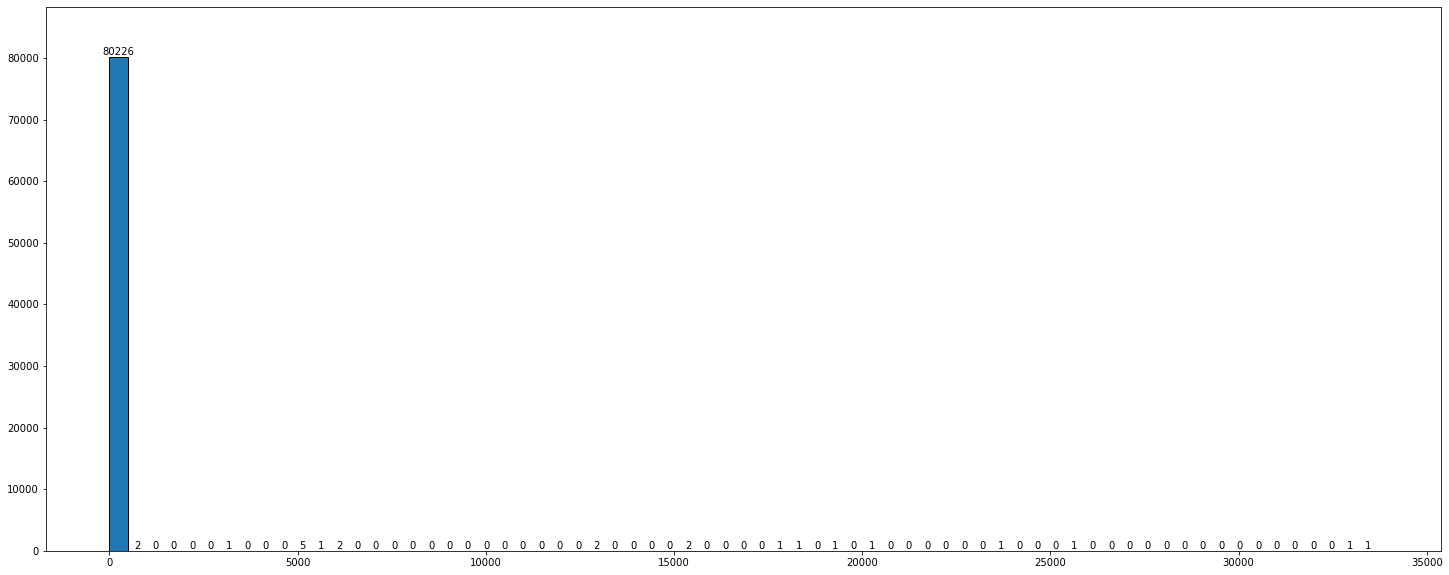

<Figure size 432x288 with 0 Axes>

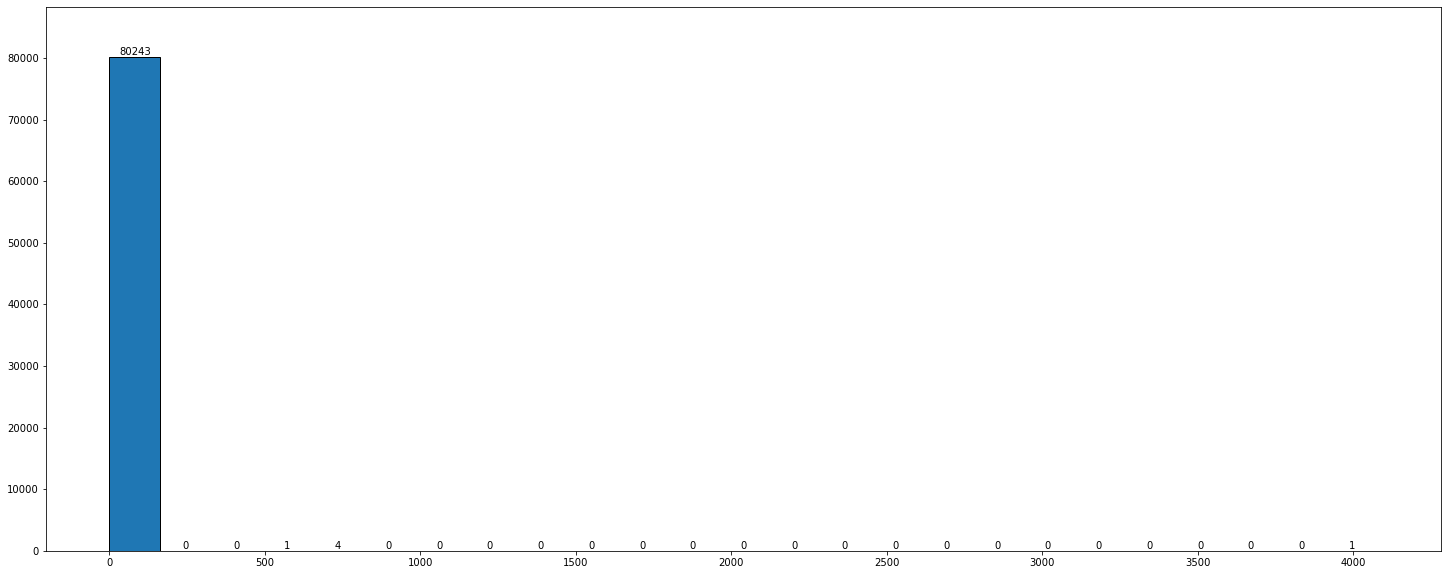

<Figure size 432x288 with 0 Axes>

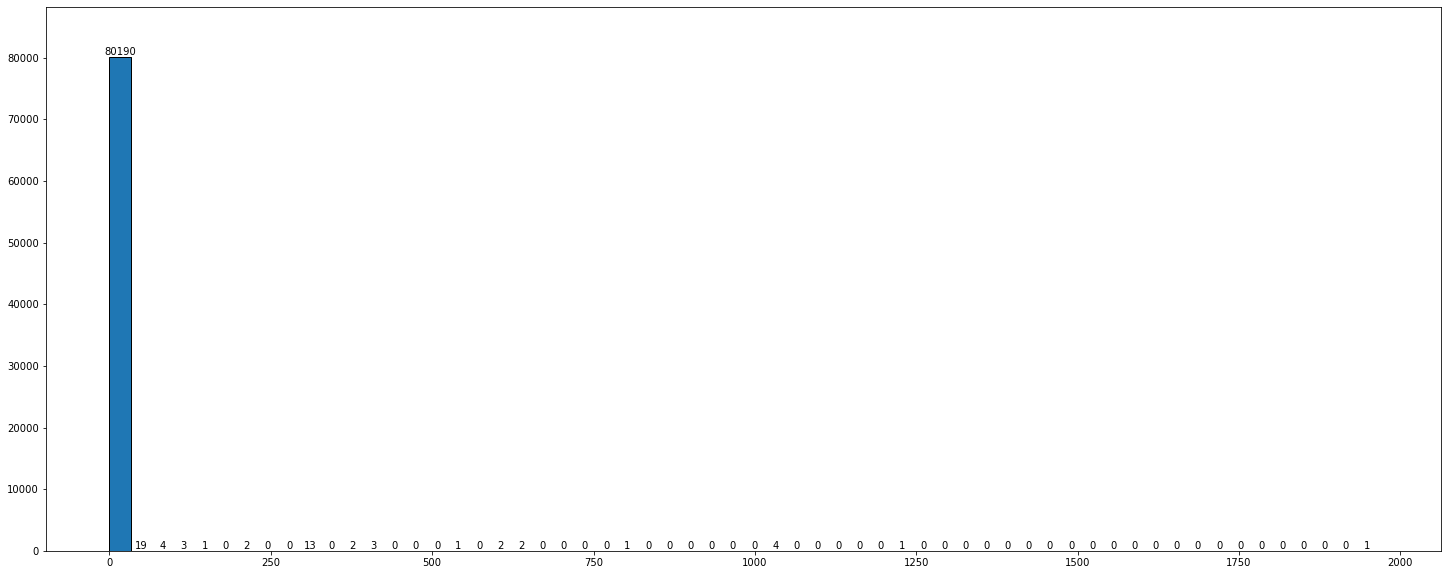

<Figure size 432x288 with 0 Axes>

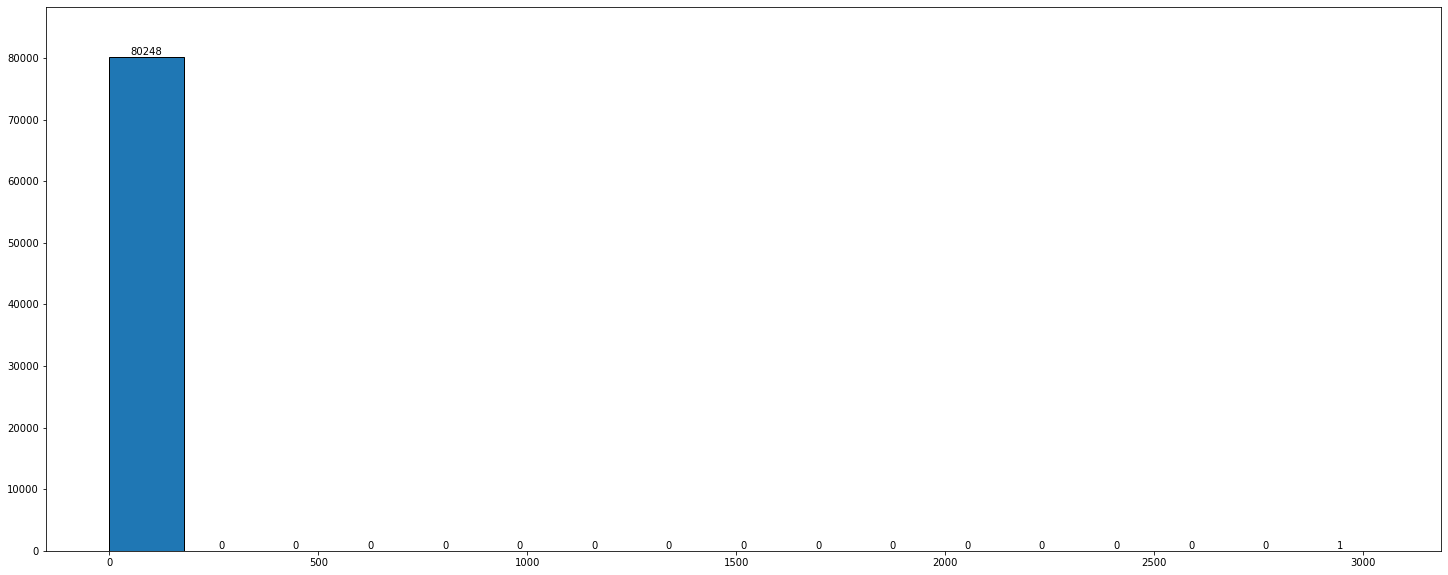

<Figure size 432x288 with 0 Axes>

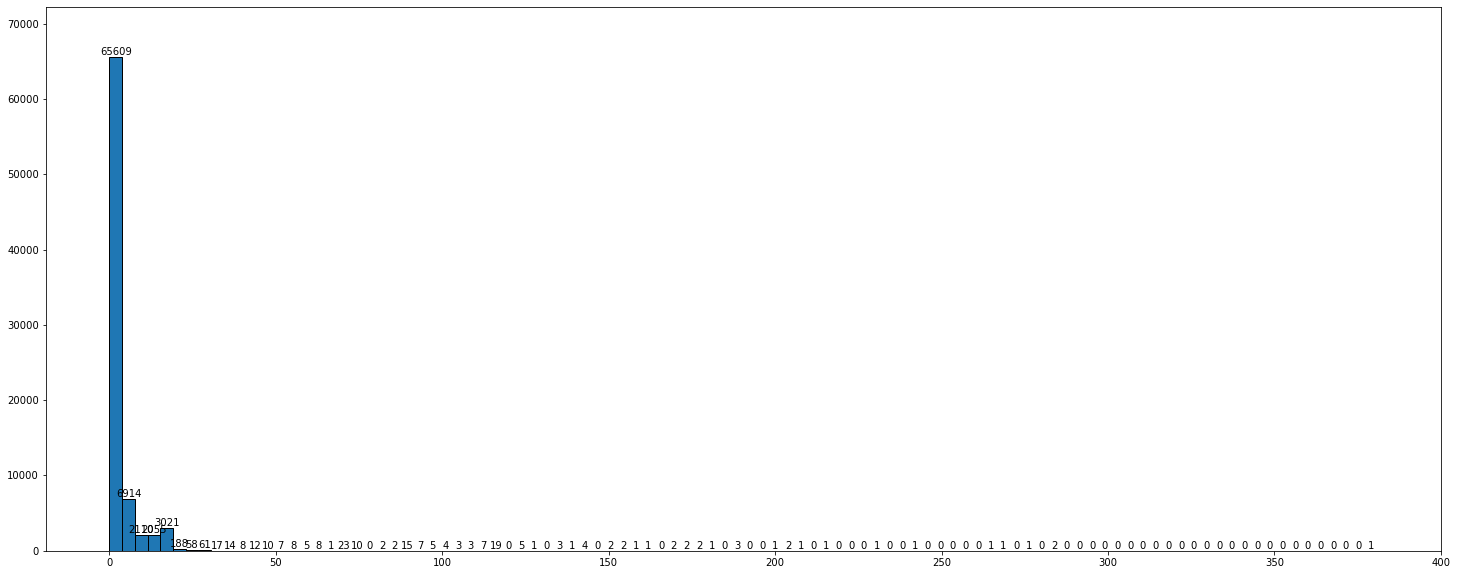

<Figure size 432x288 with 0 Axes>

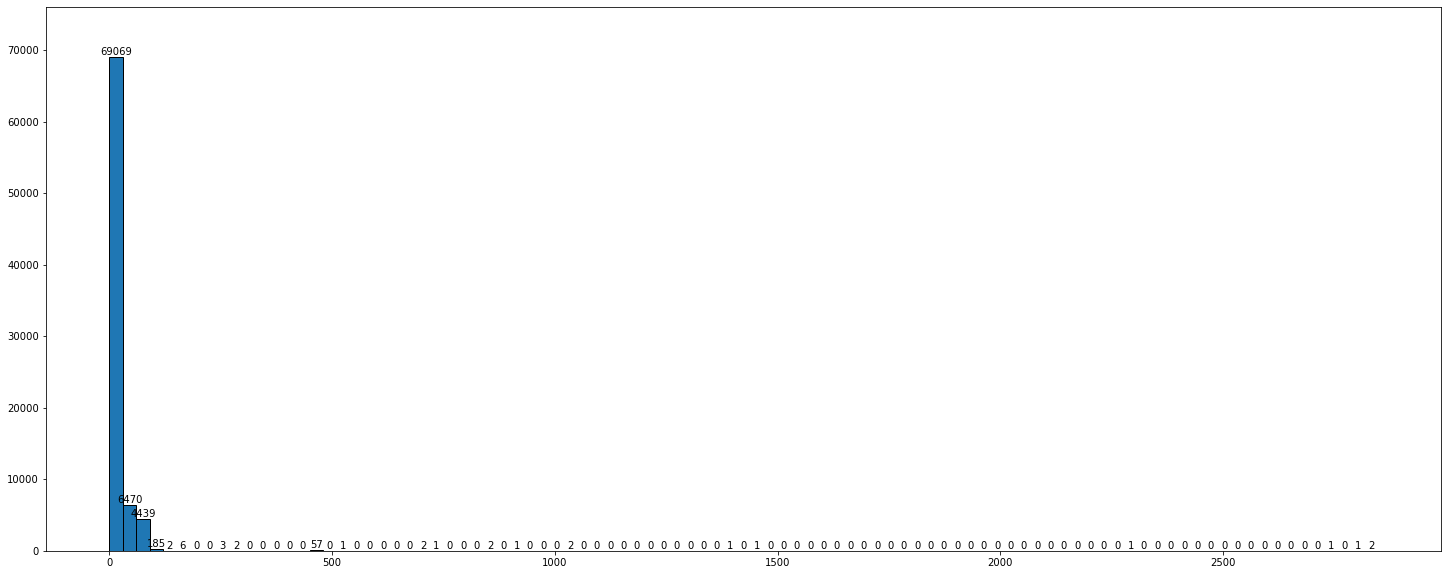

<Figure size 432x288 with 0 Axes>

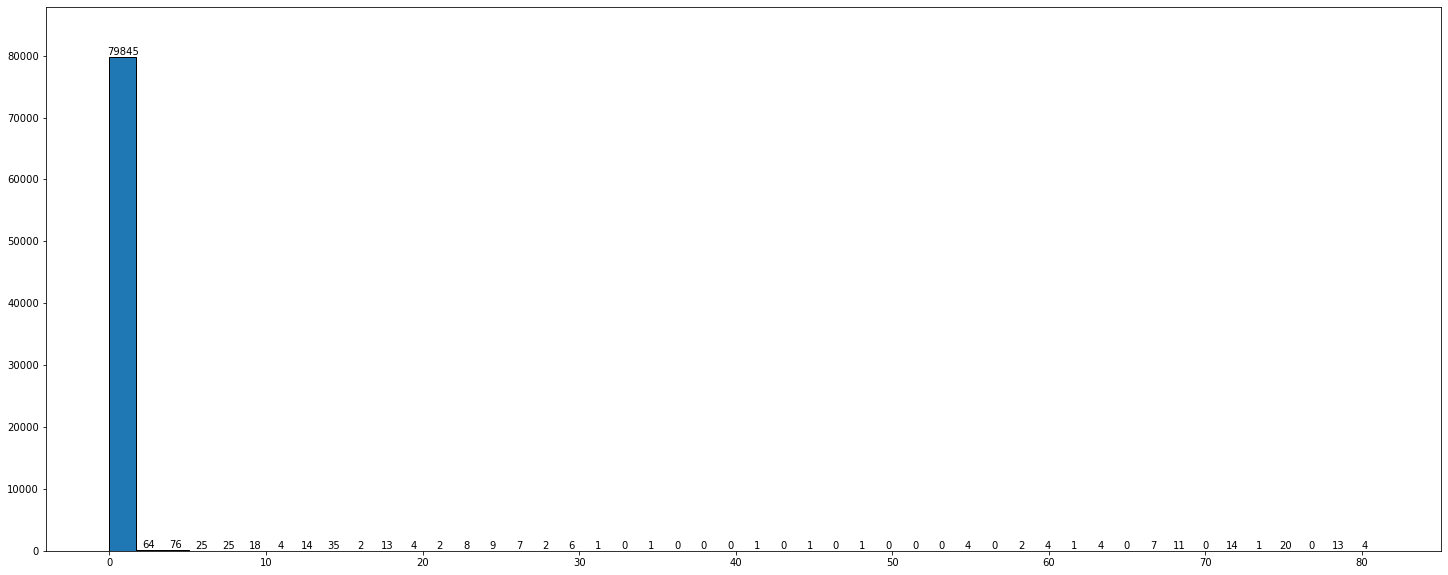

<Figure size 432x288 with 0 Axes>

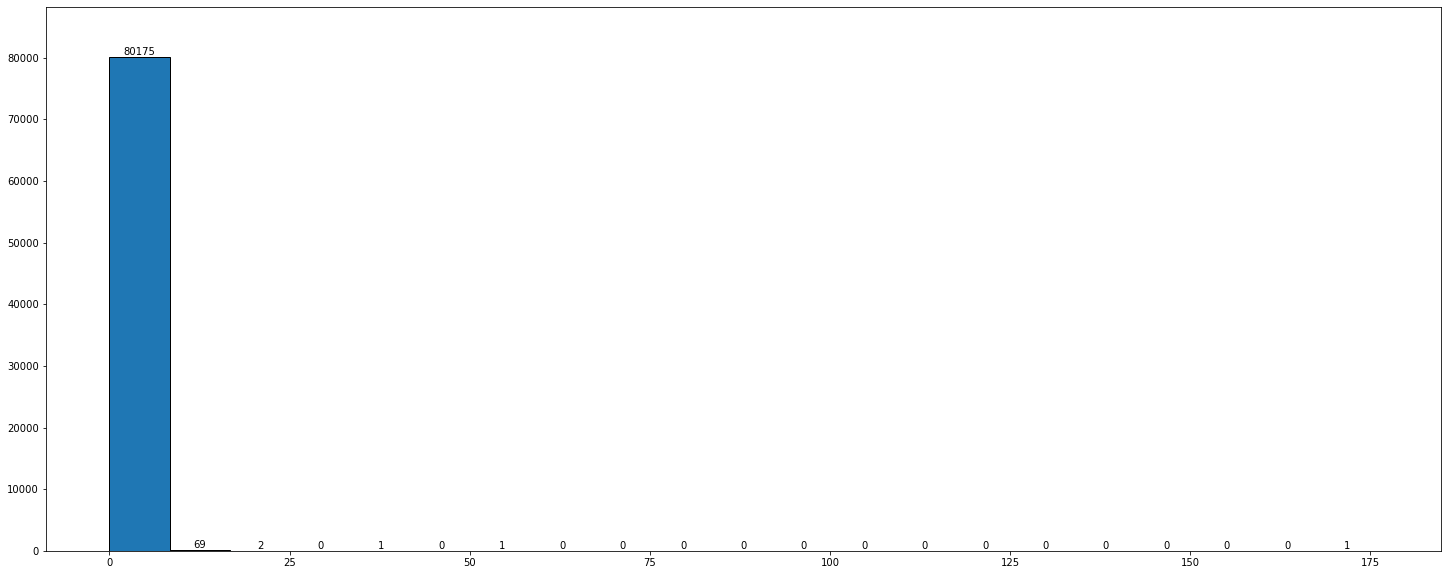

<Figure size 432x288 with 0 Axes>

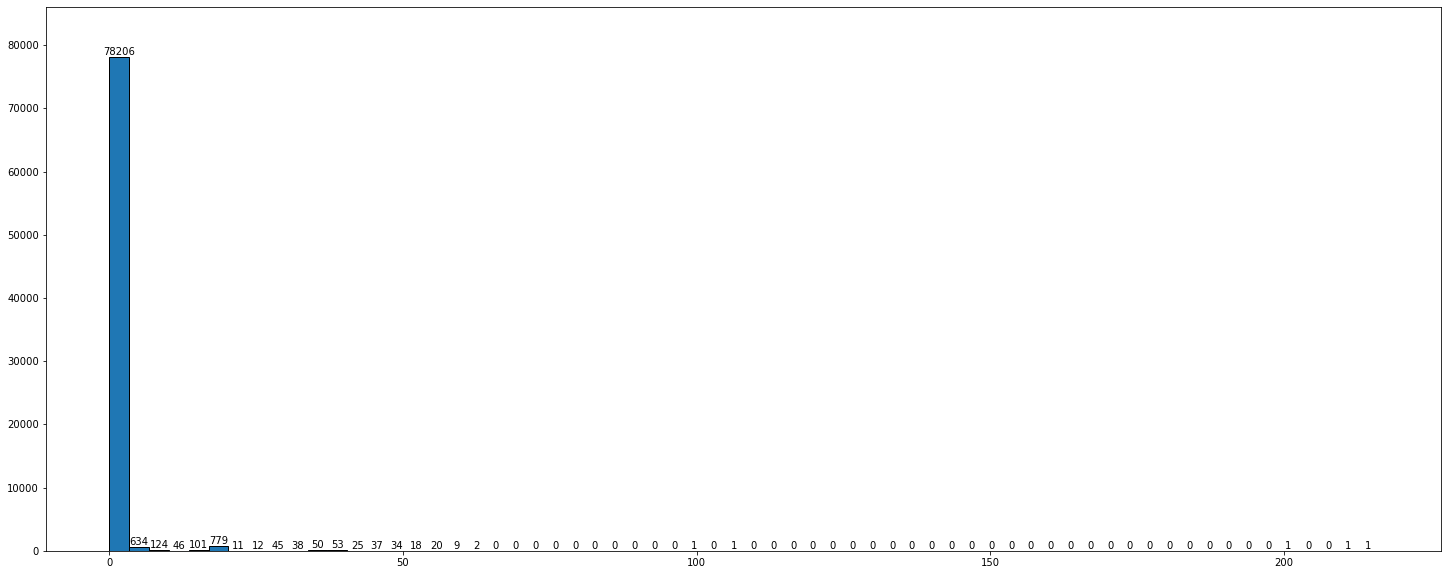

<Figure size 432x288 with 0 Axes>

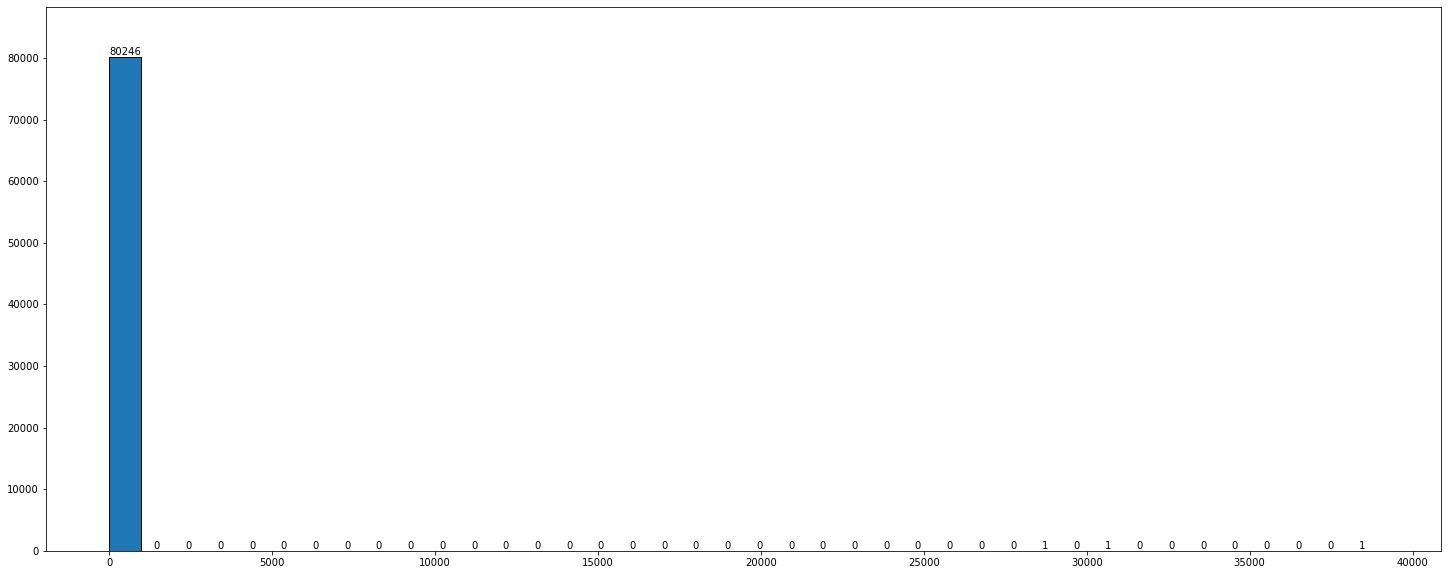

<Figure size 432x288 with 0 Axes>

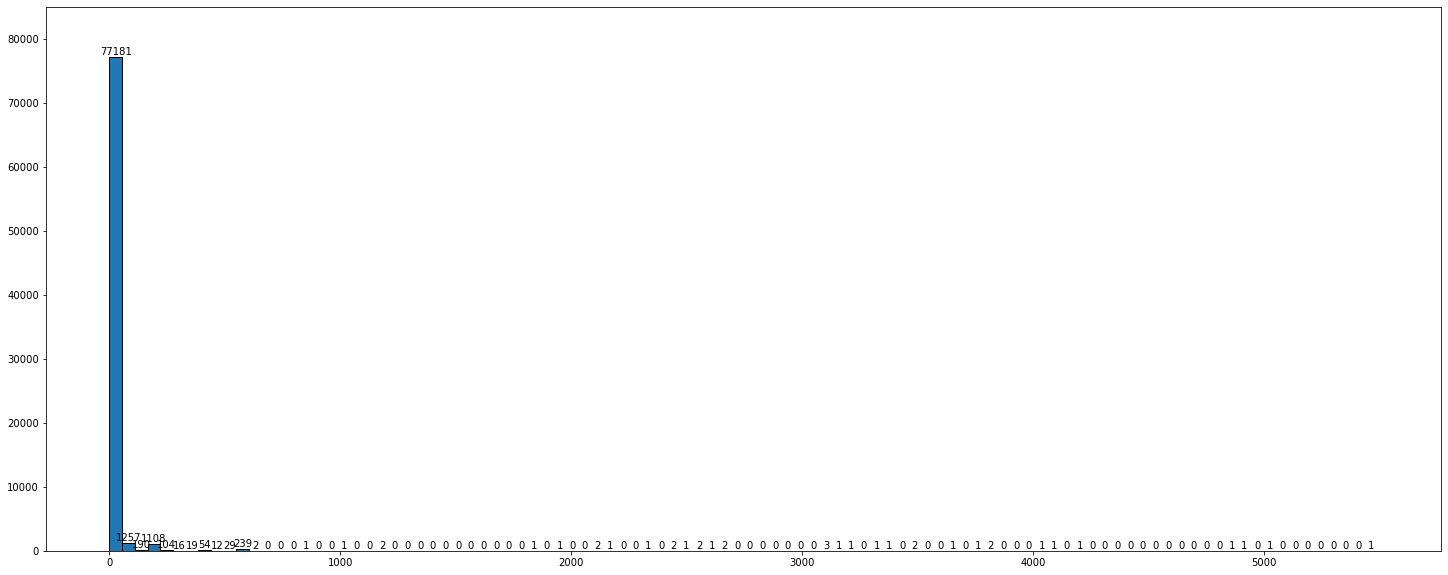

<Figure size 432x288 with 0 Axes>

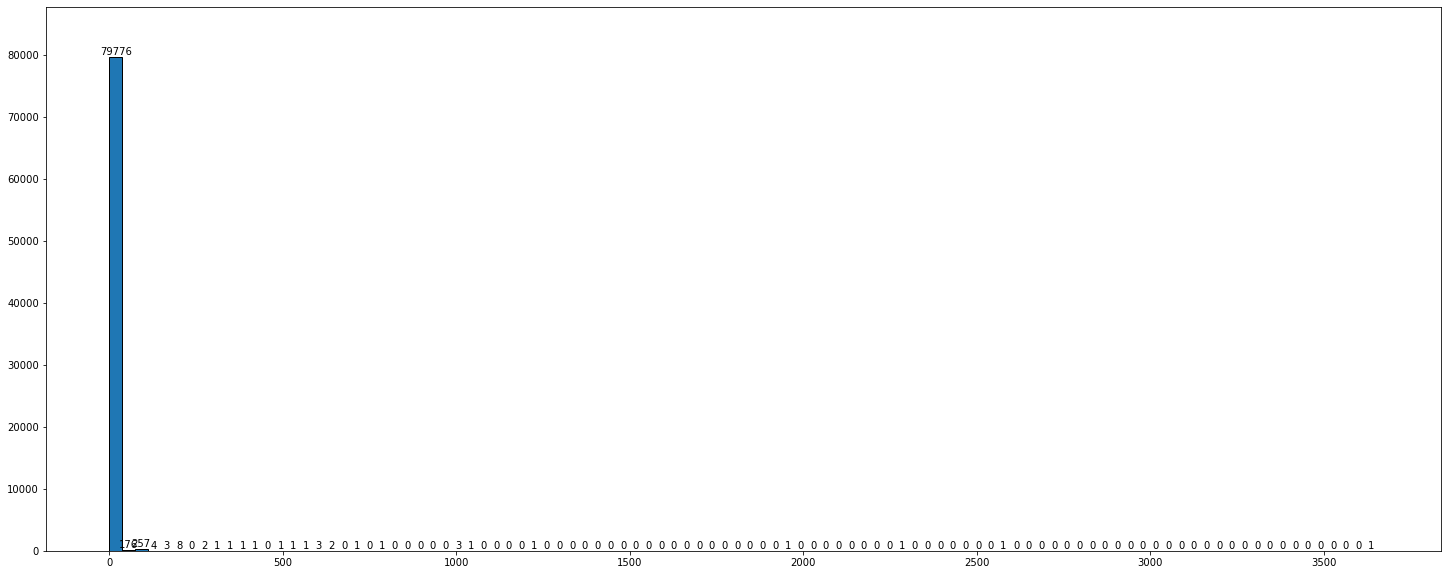

<Figure size 432x288 with 0 Axes>

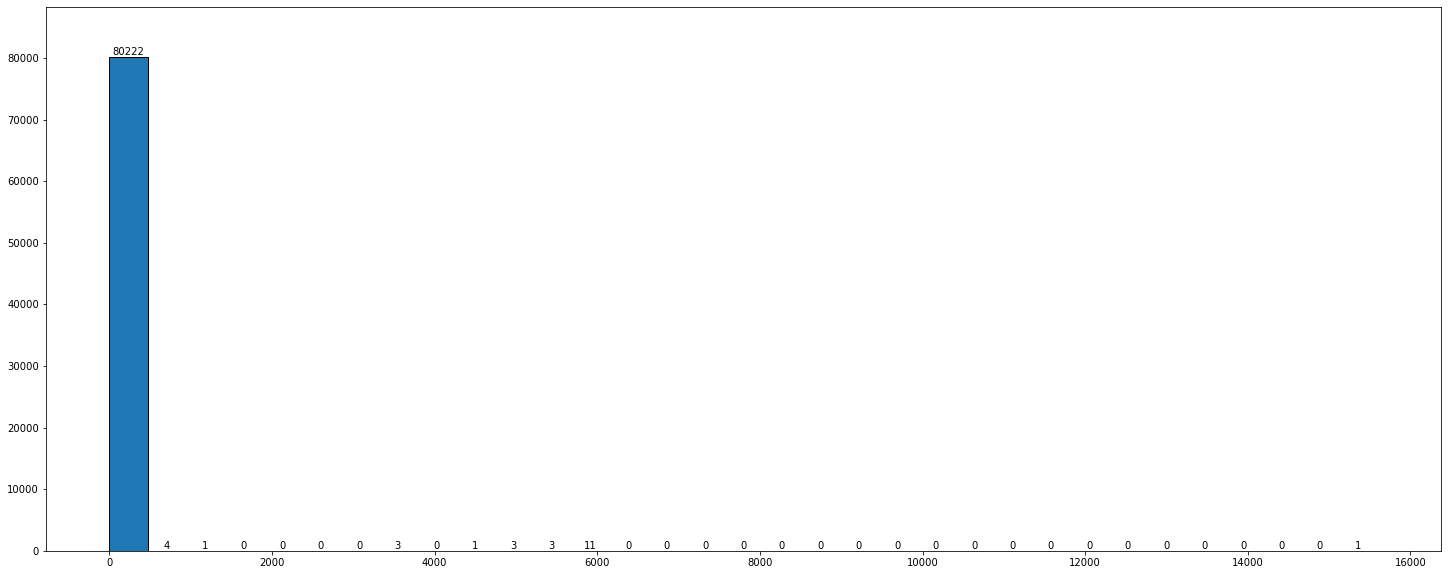

<Figure size 432x288 with 0 Axes>

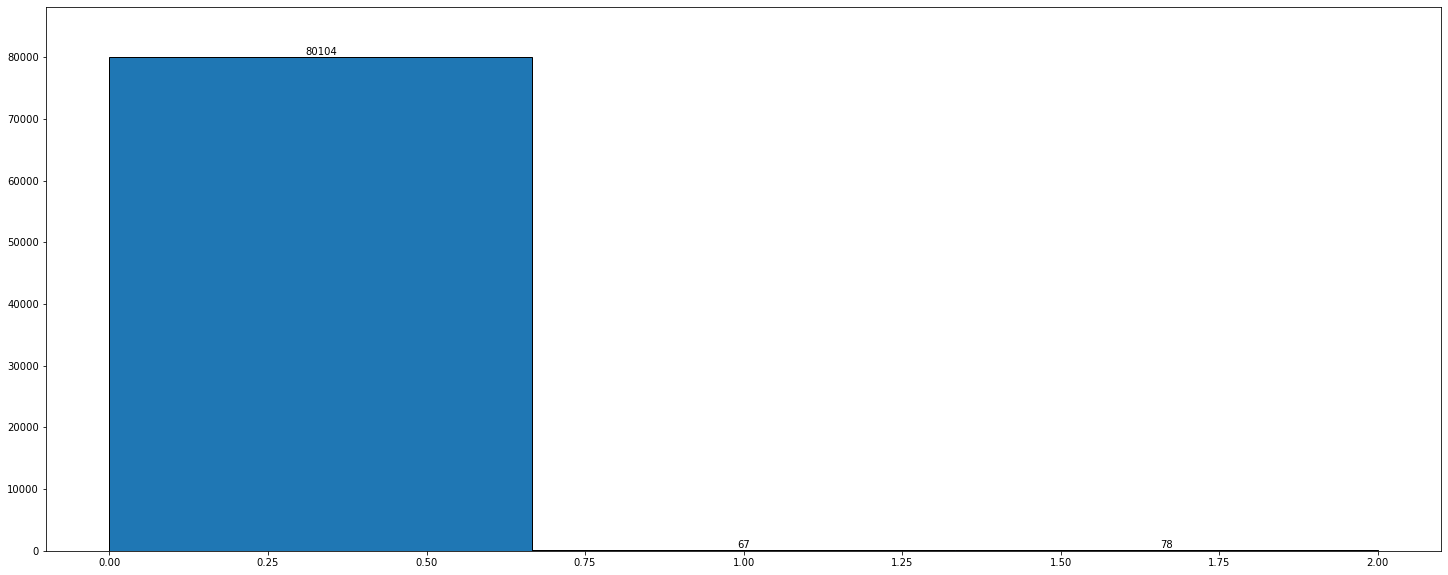

<Figure size 432x288 with 0 Axes>

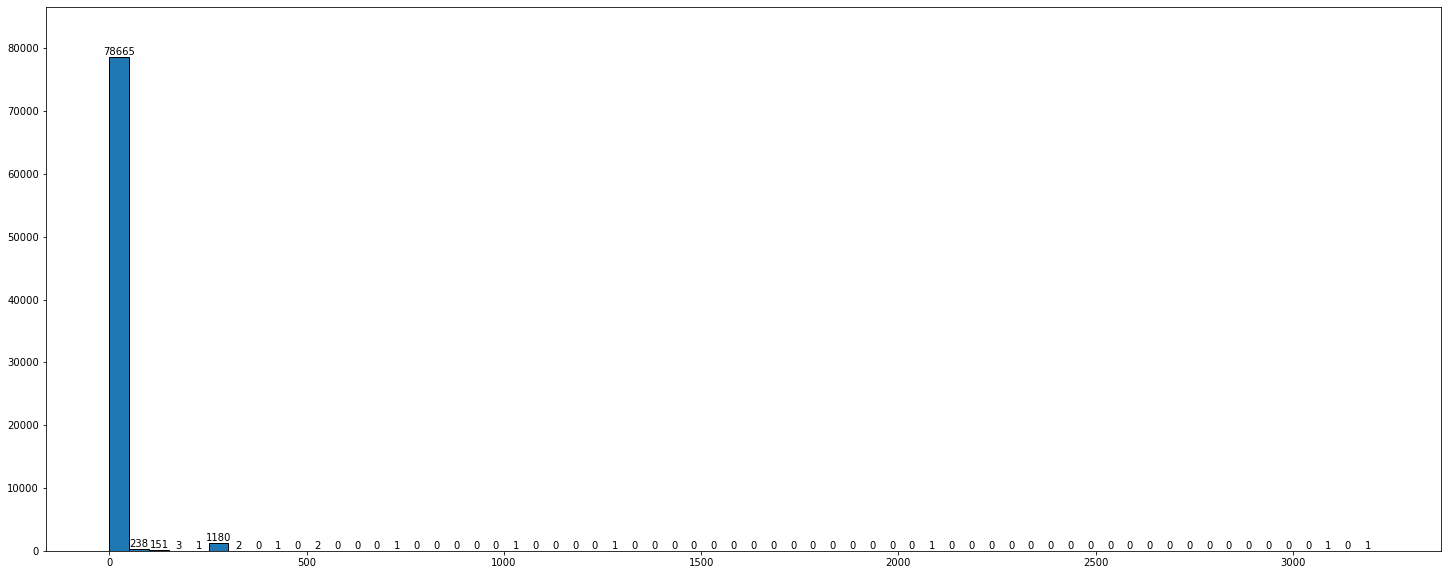

<Figure size 432x288 with 0 Axes>

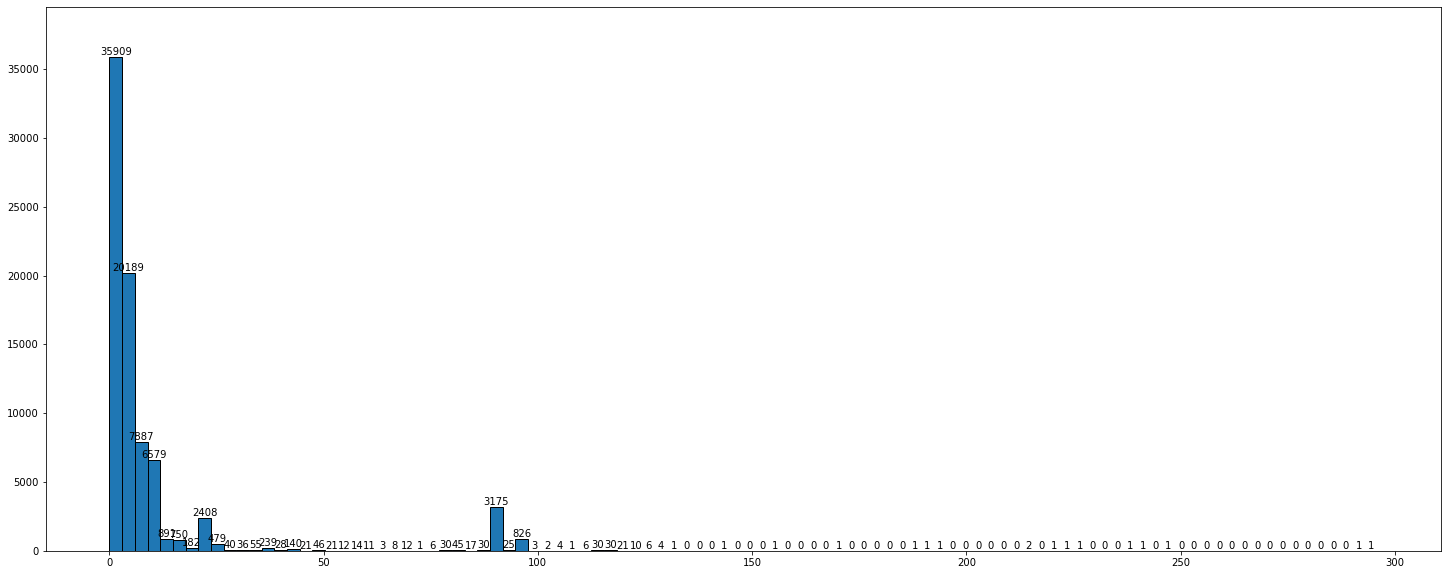

<Figure size 432x288 with 0 Axes>

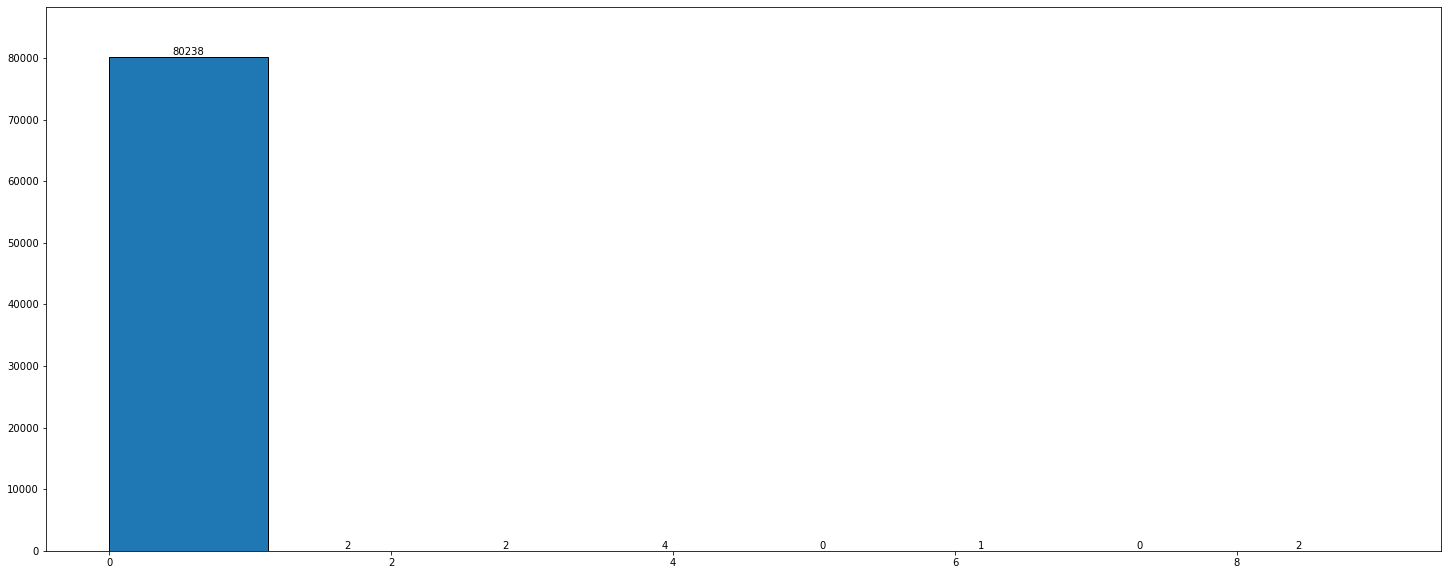

<Figure size 432x288 with 0 Axes>

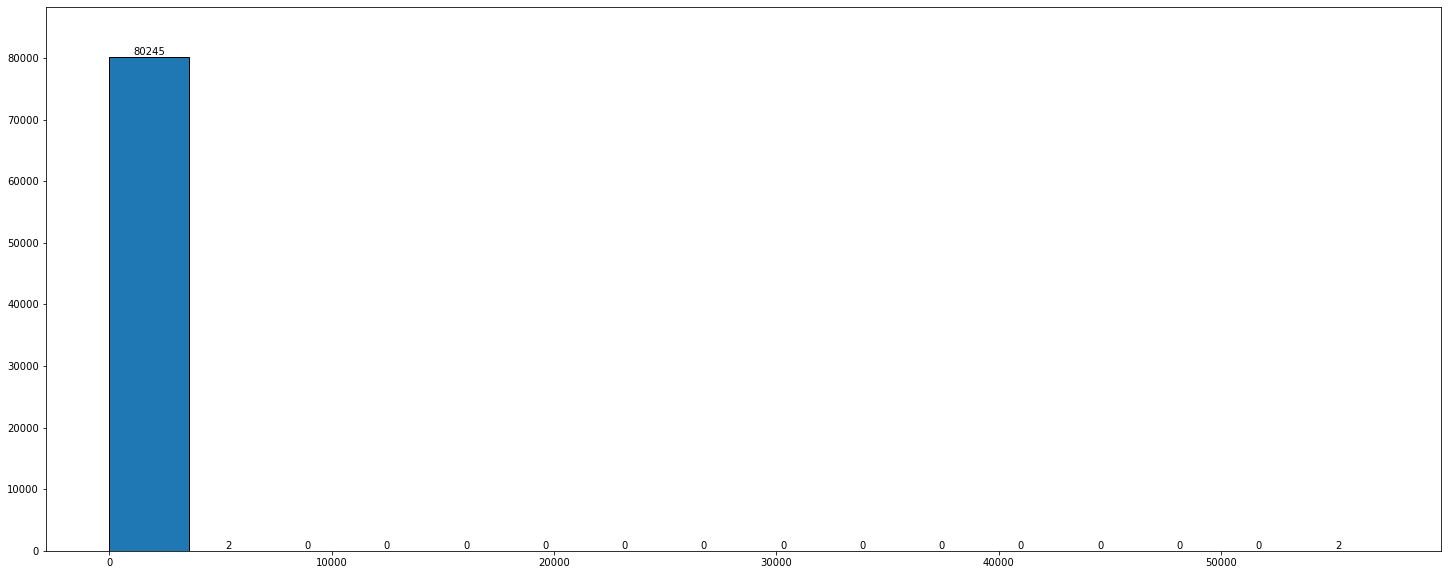

<Figure size 432x288 with 0 Axes>

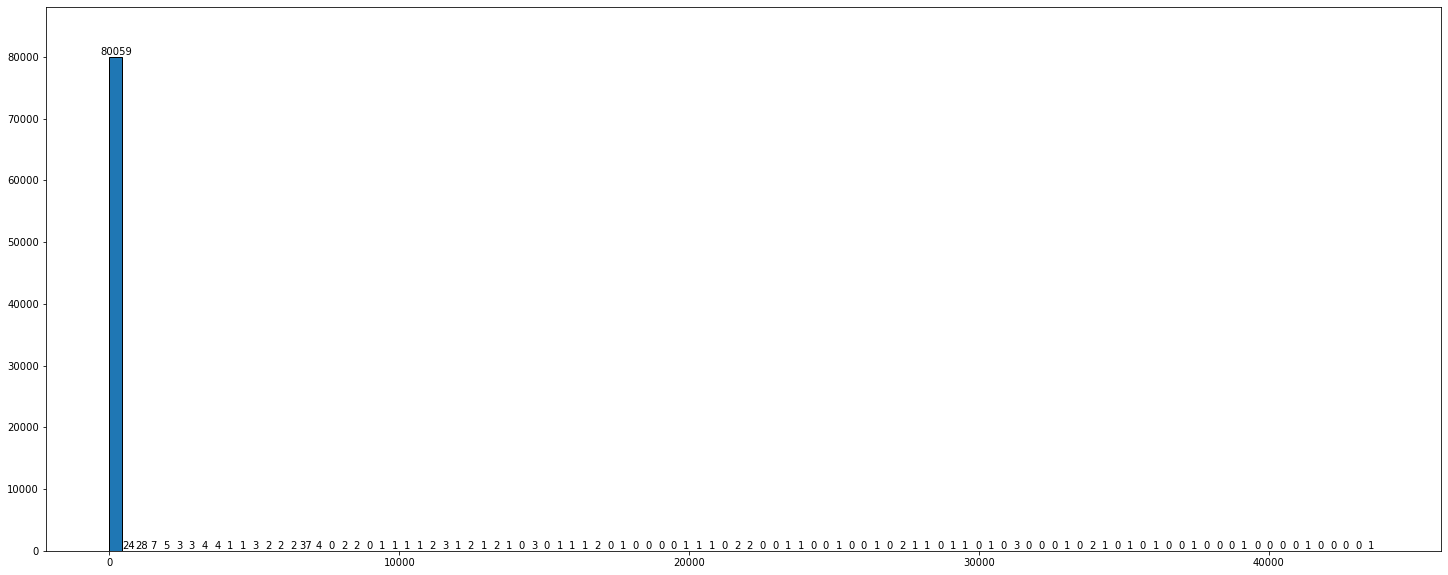

<Figure size 432x288 with 0 Axes>

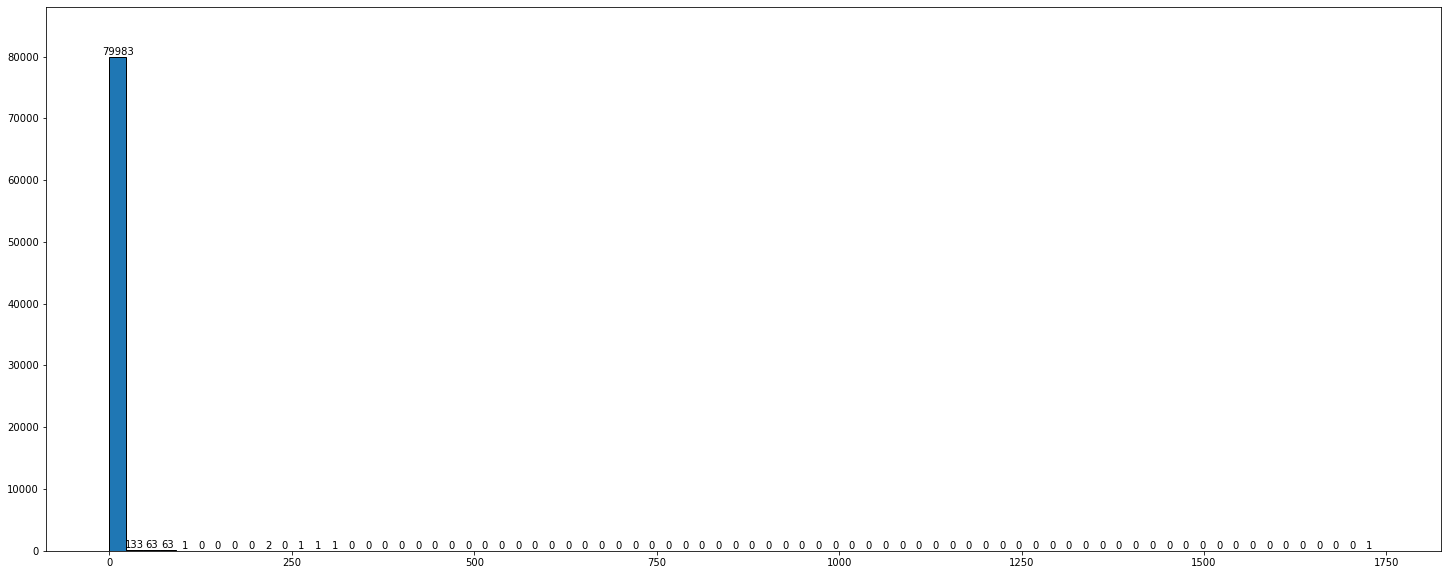

<Figure size 432x288 with 0 Axes>

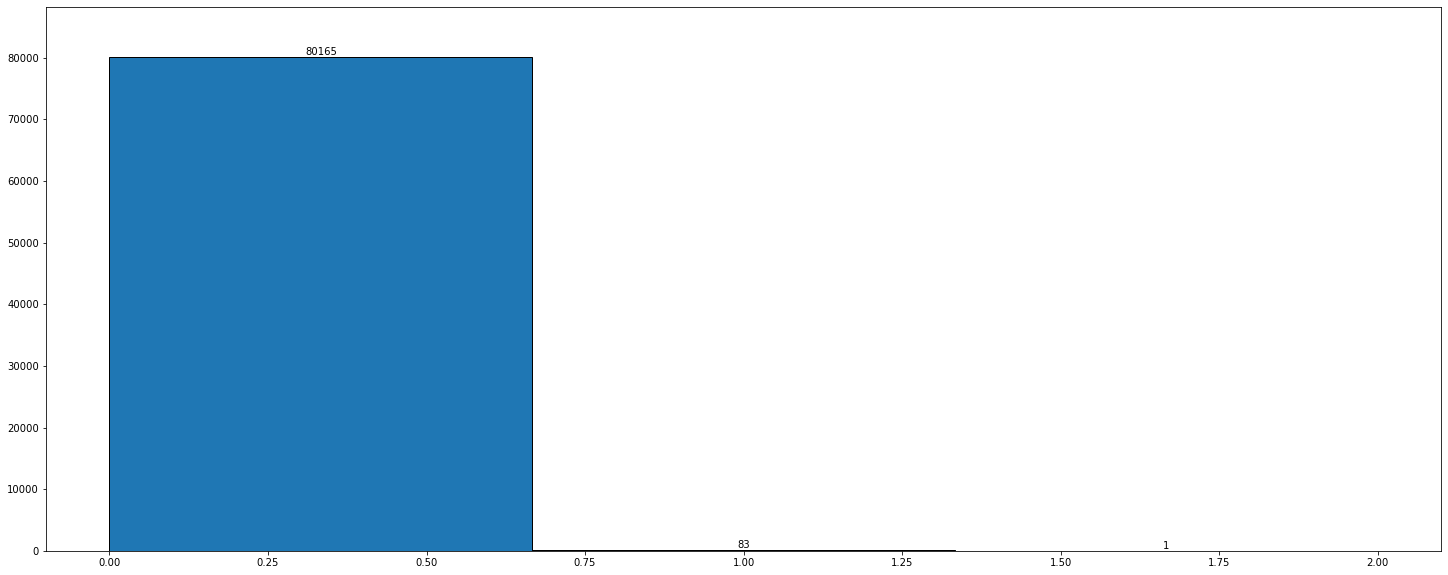

<Figure size 432x288 with 0 Axes>

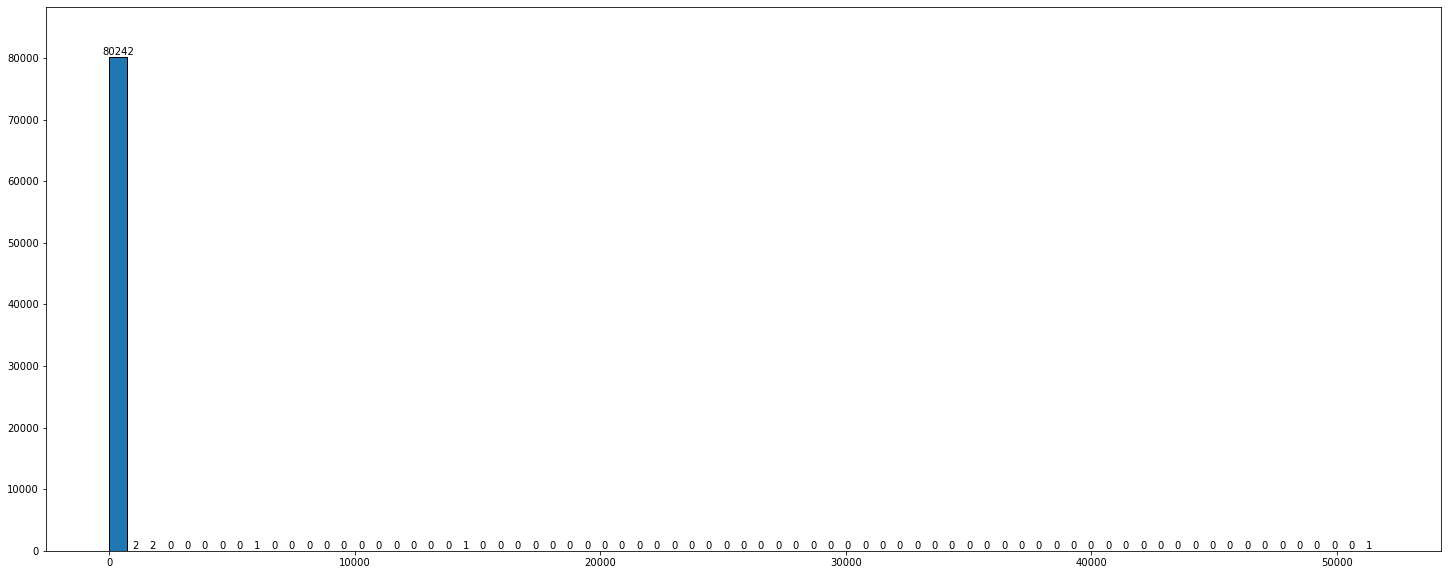

<Figure size 432x288 with 0 Axes>

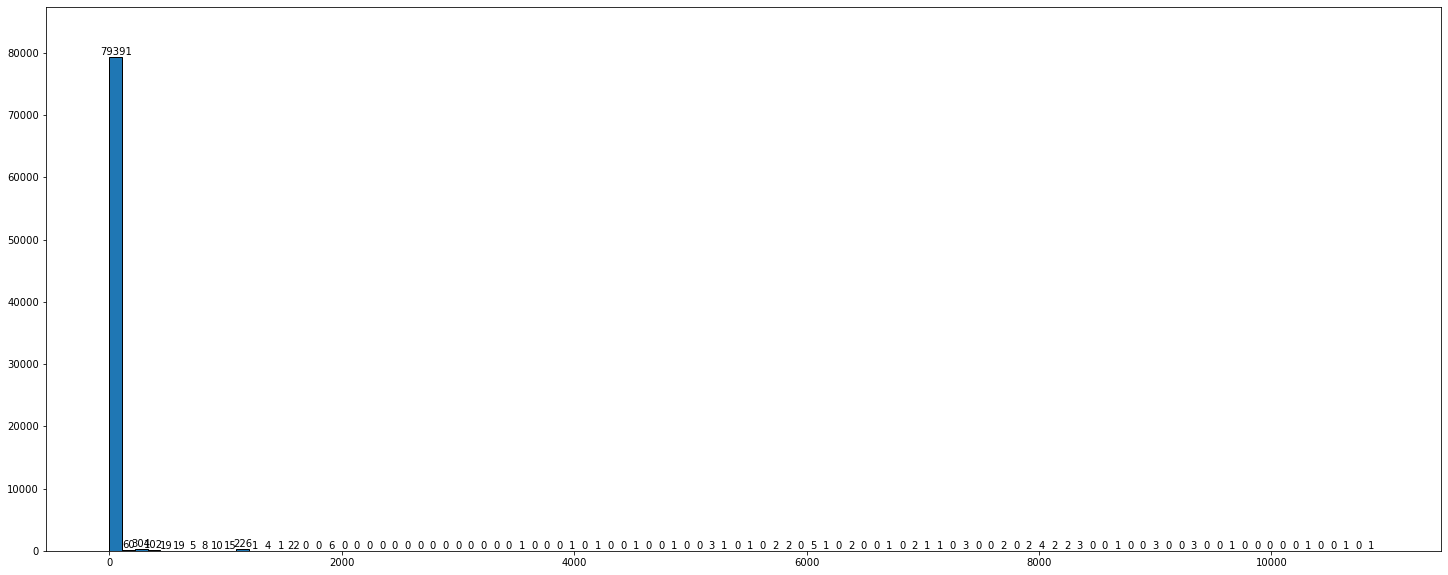

<Figure size 432x288 with 0 Axes>

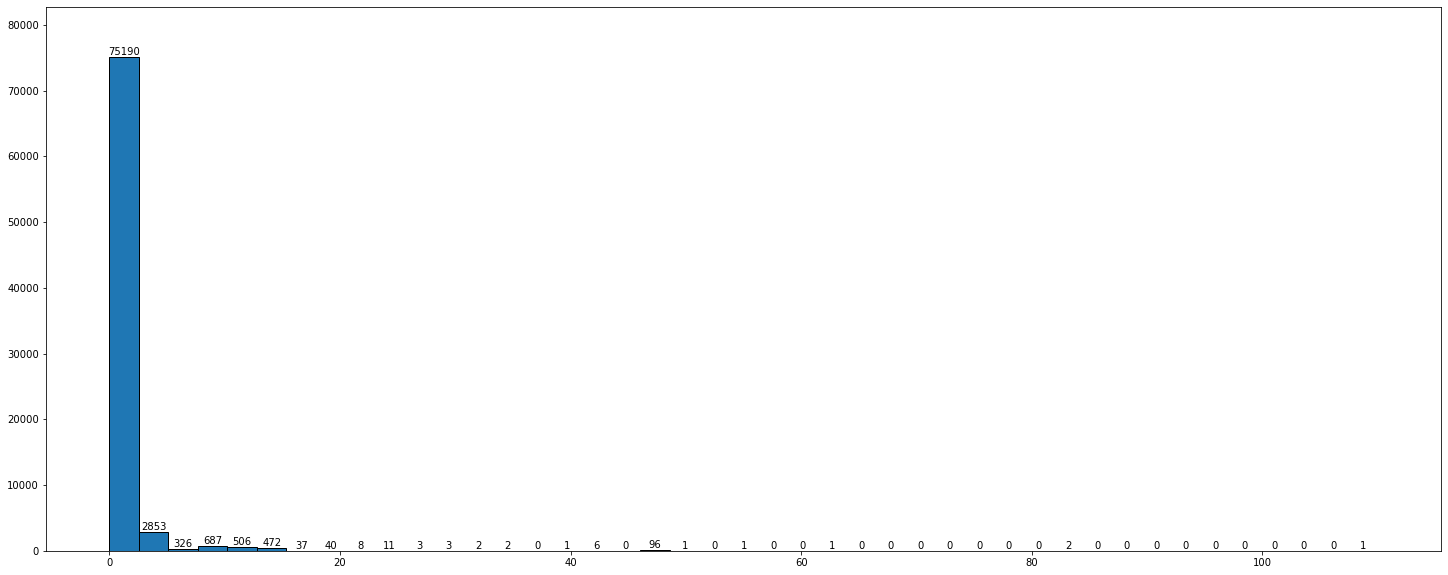

<Figure size 432x288 with 0 Axes>

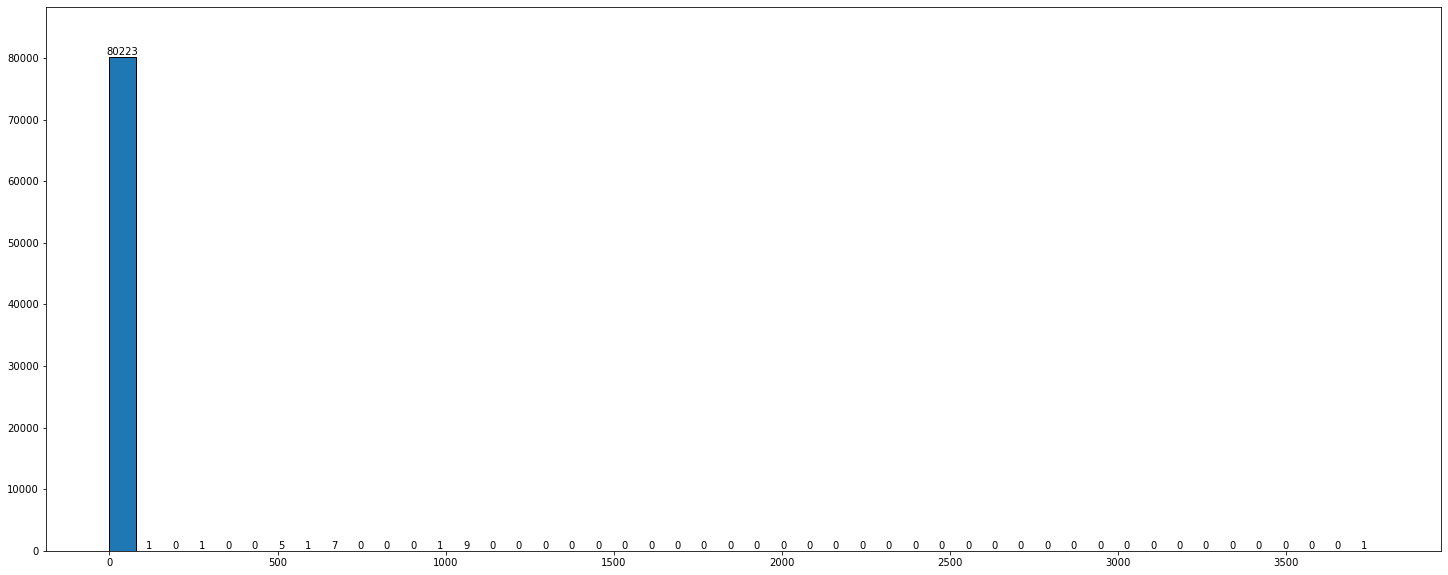

<Figure size 432x288 with 0 Axes>

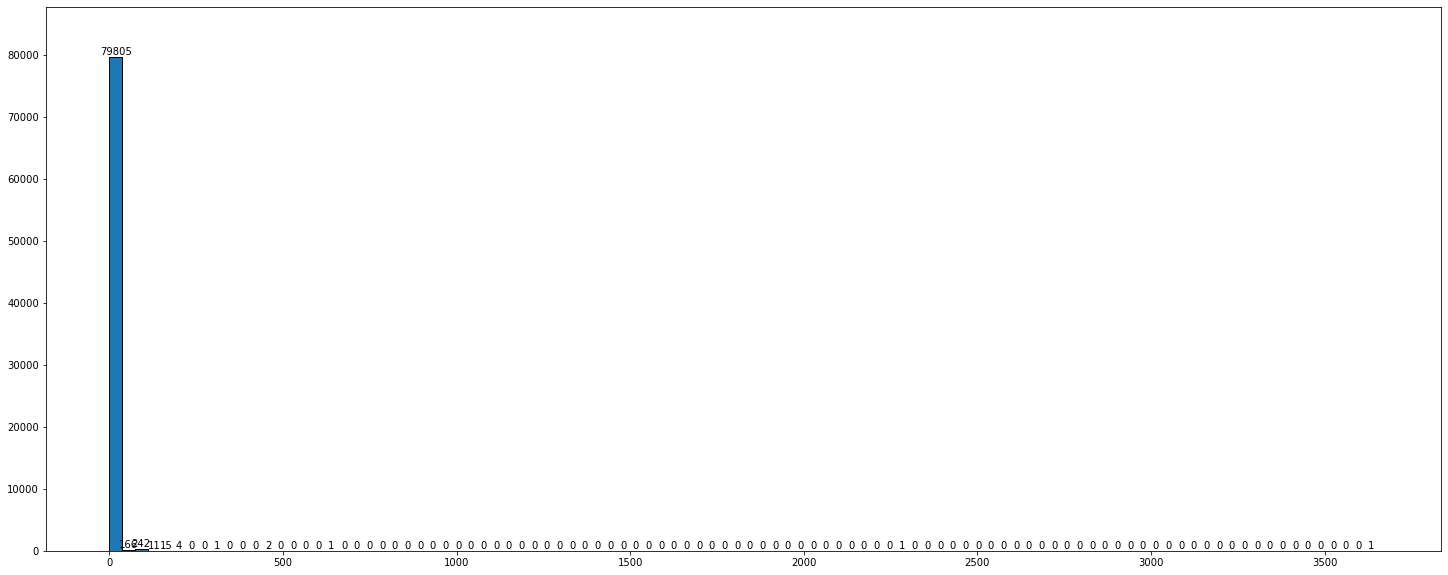

<Figure size 432x288 with 0 Axes>

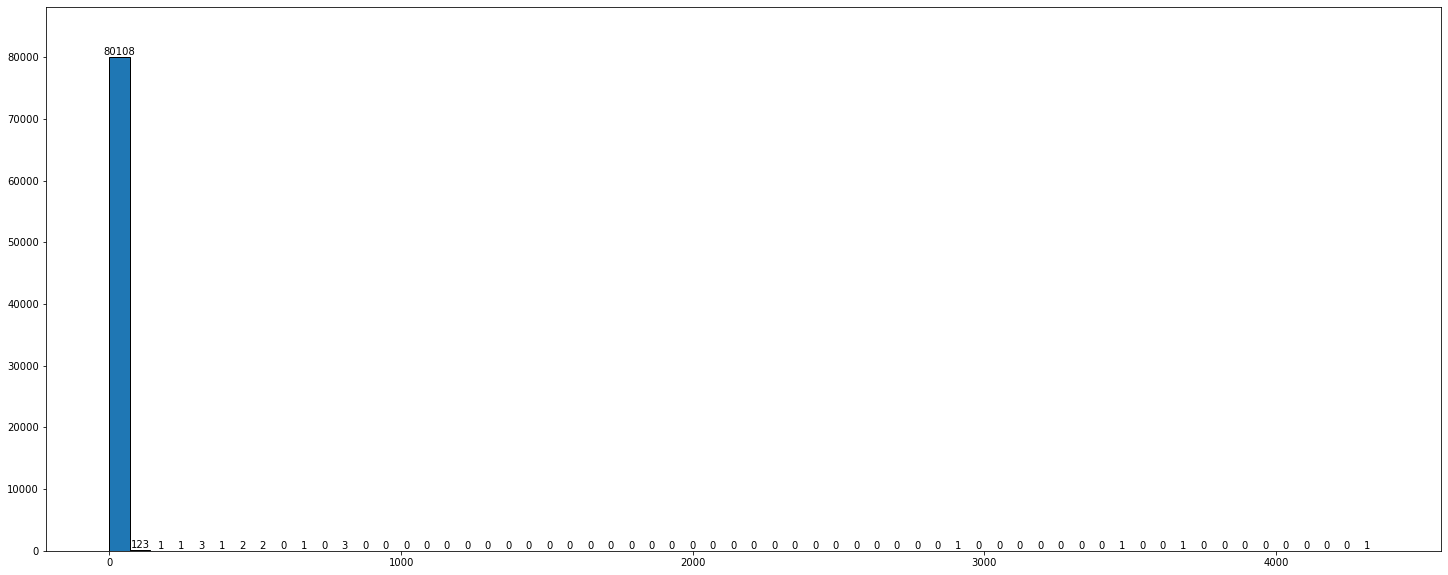

<Figure size 432x288 with 0 Axes>

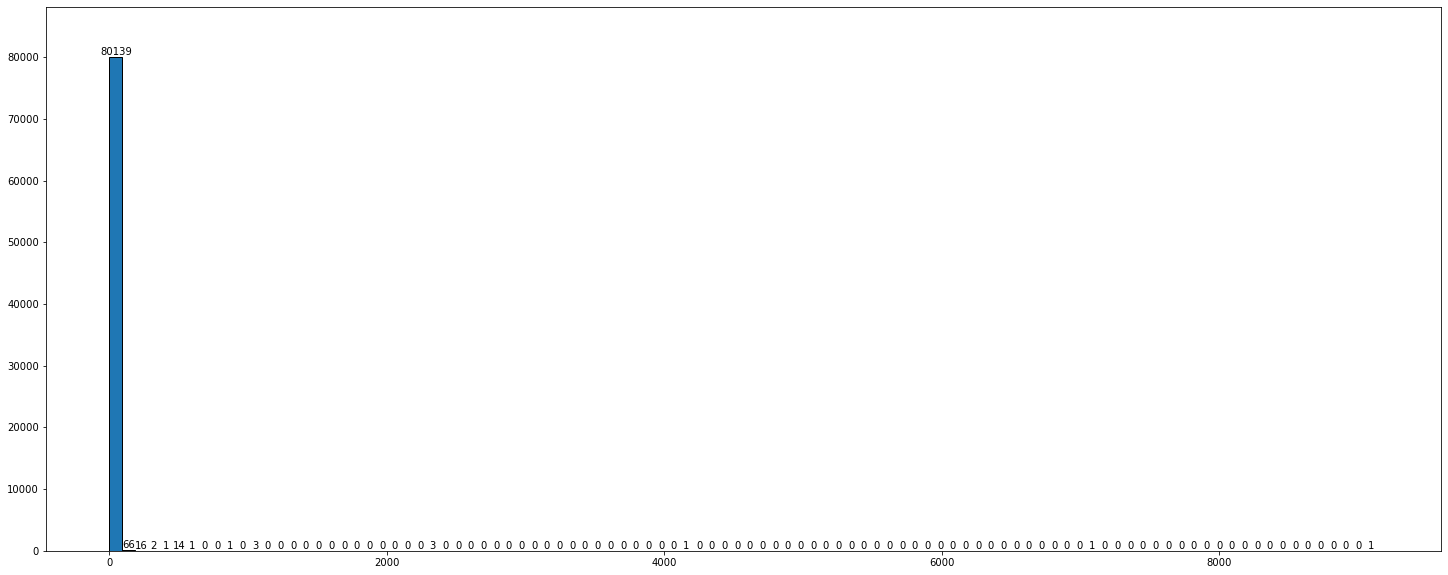

<Figure size 432x288 with 0 Axes>

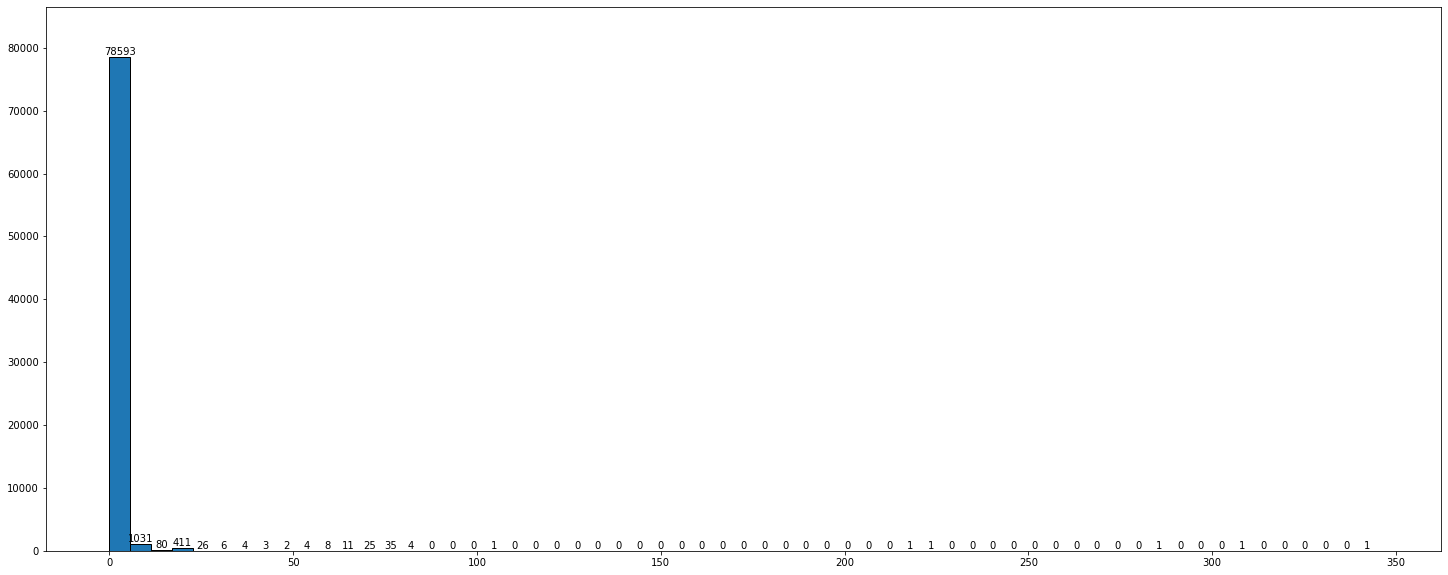

<Figure size 432x288 with 0 Axes>

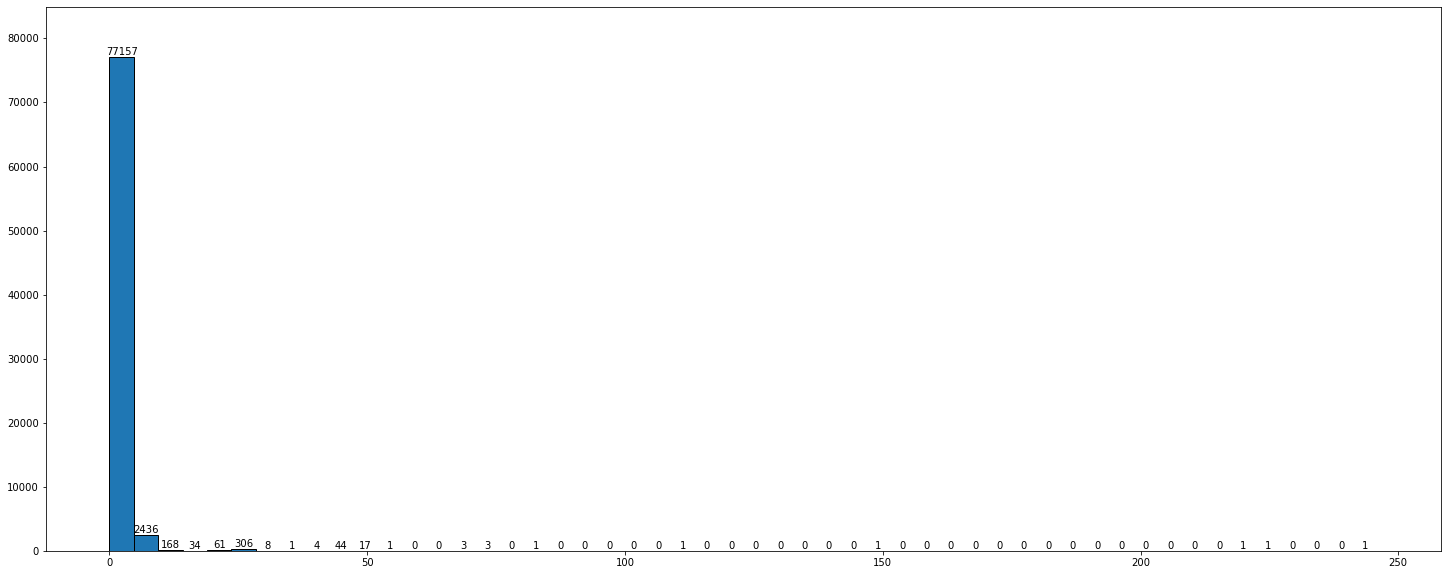

<Figure size 432x288 with 0 Axes>

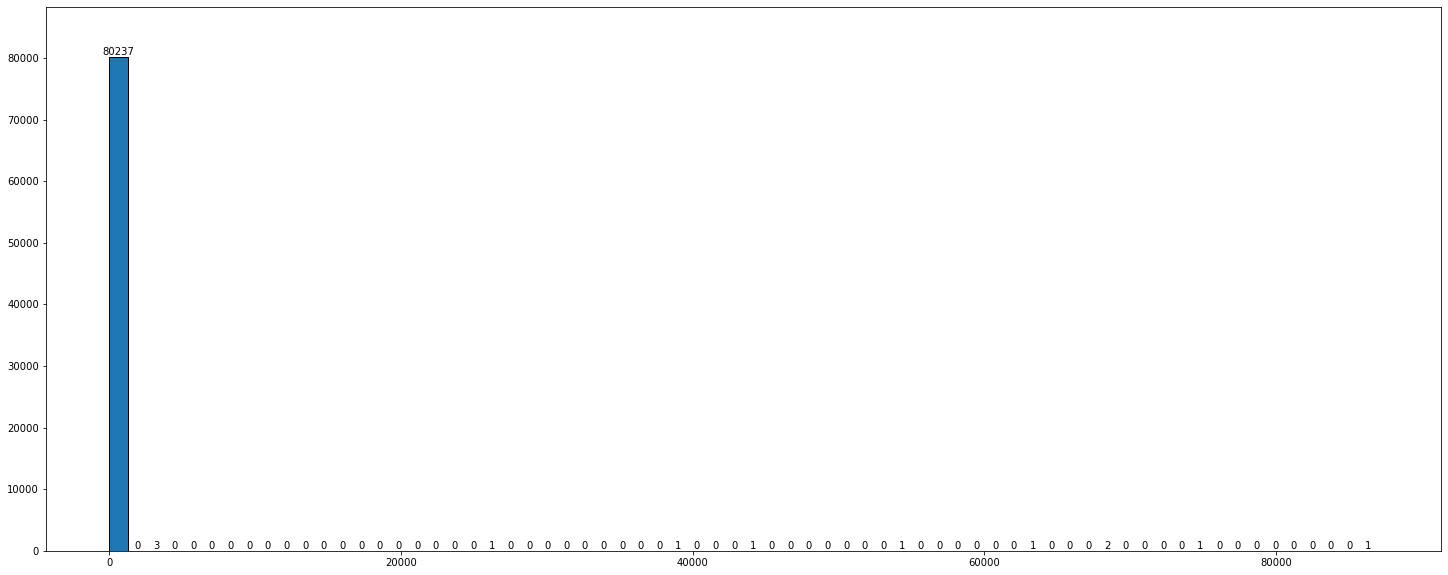

<Figure size 432x288 with 0 Axes>

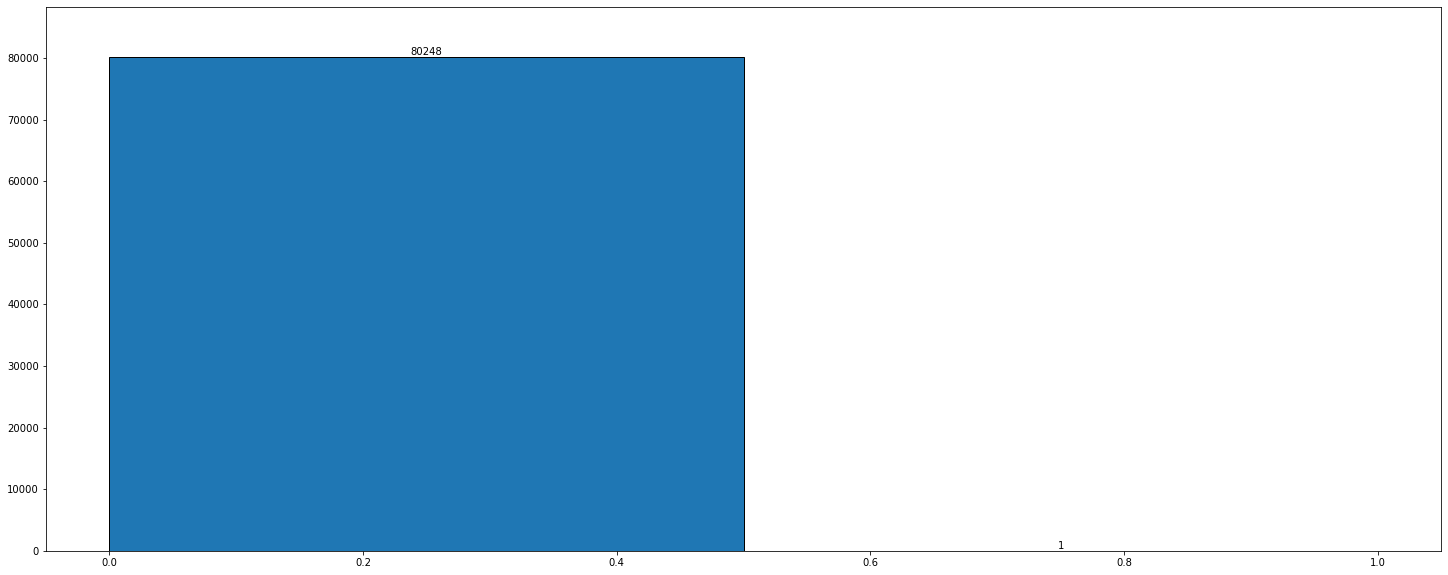

<Figure size 432x288 with 0 Axes>

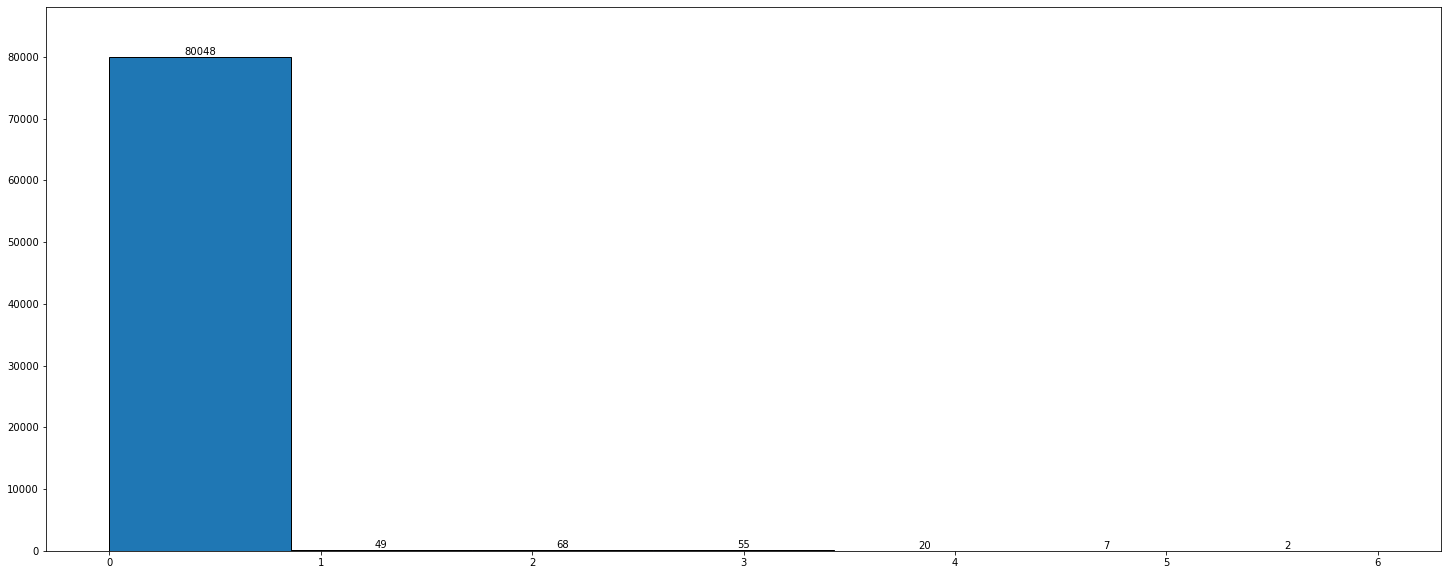

<Figure size 432x288 with 0 Axes>

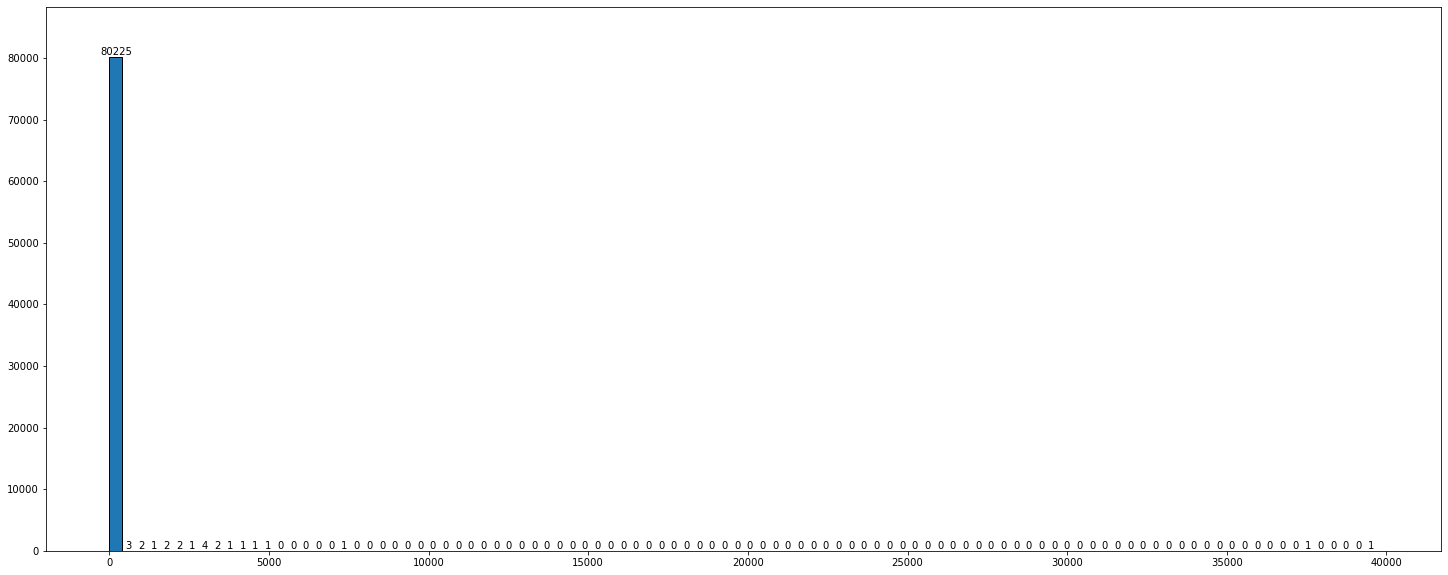

<Figure size 432x288 with 0 Axes>

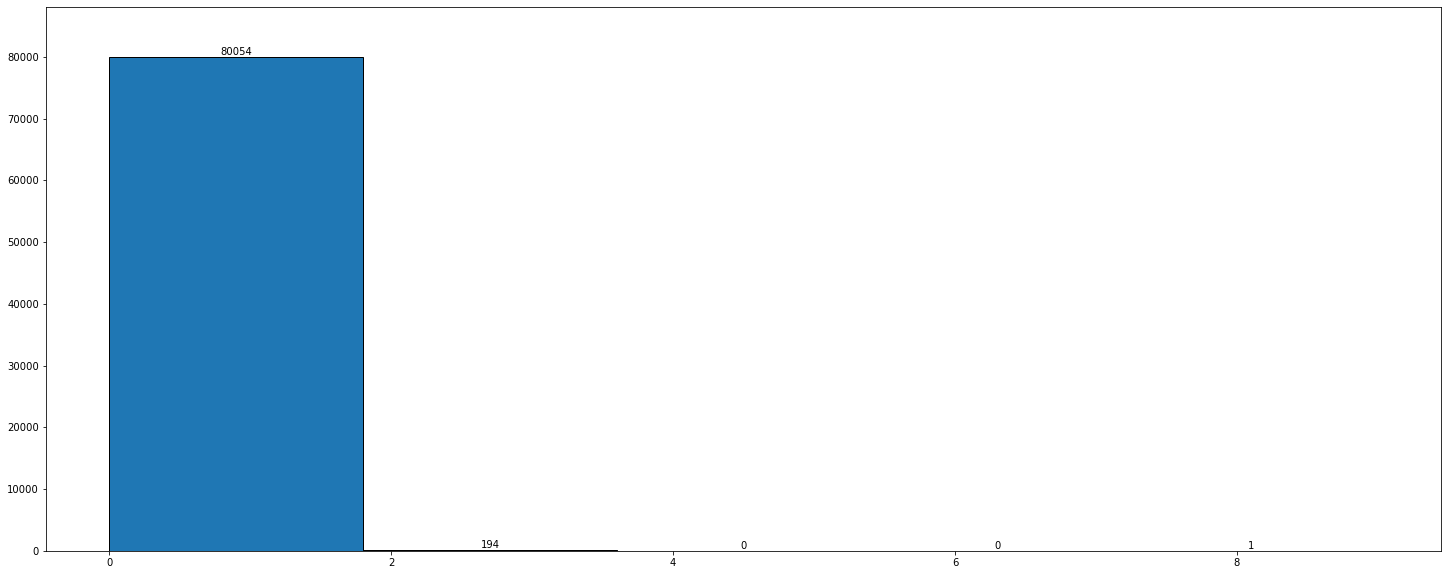

<Figure size 432x288 with 0 Axes>

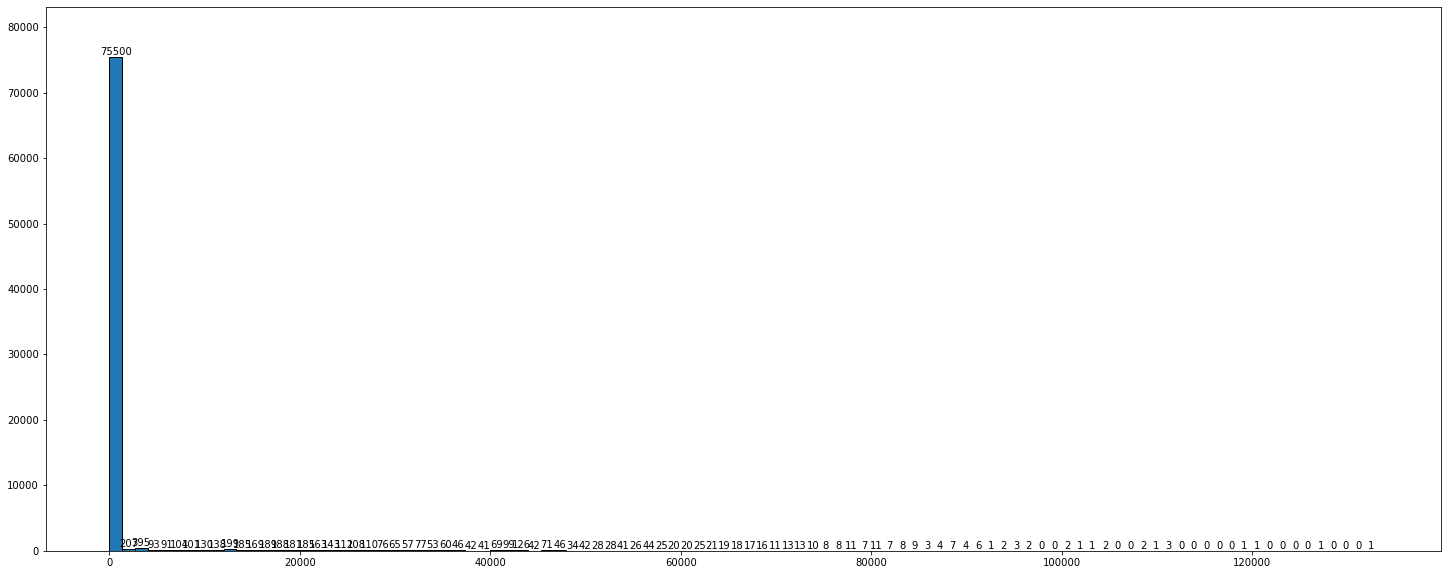

<Figure size 432x288 with 0 Axes>

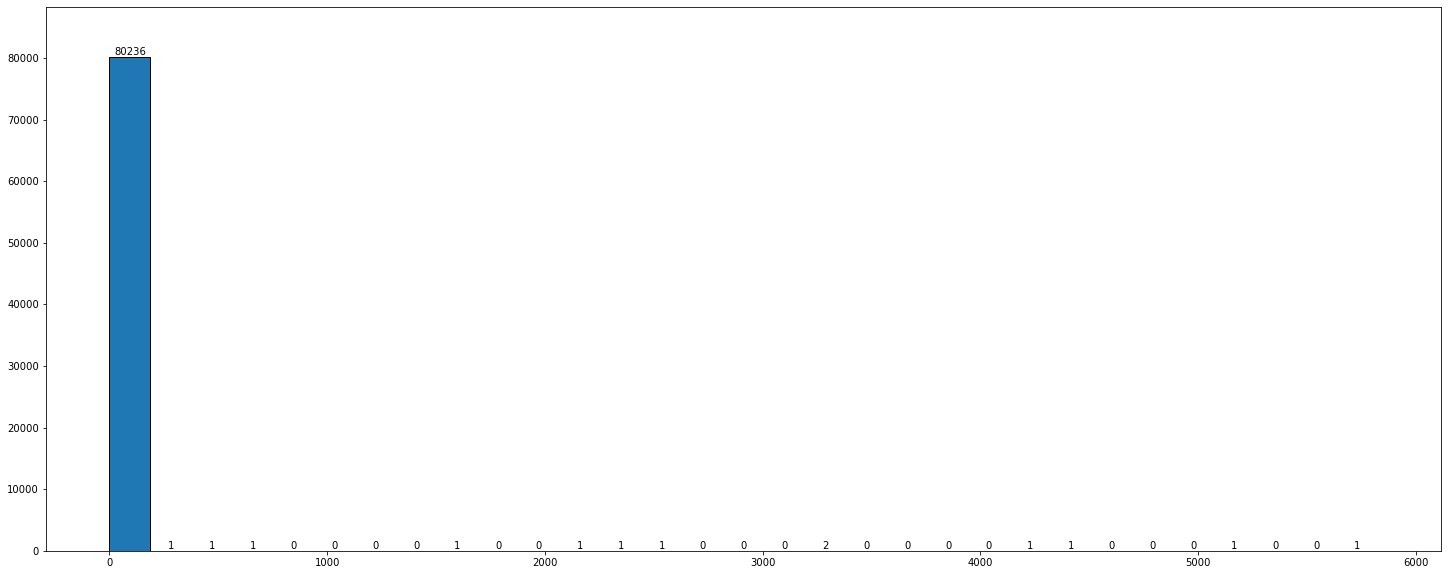

<Figure size 432x288 with 0 Axes>

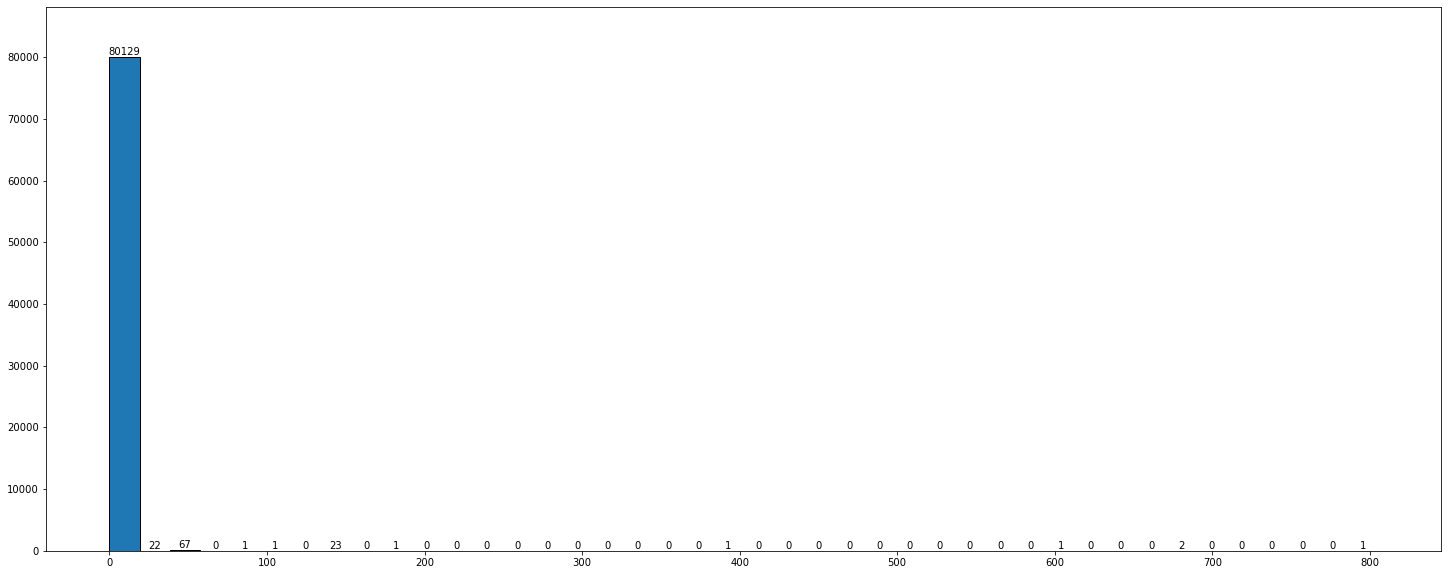

<Figure size 432x288 with 0 Axes>

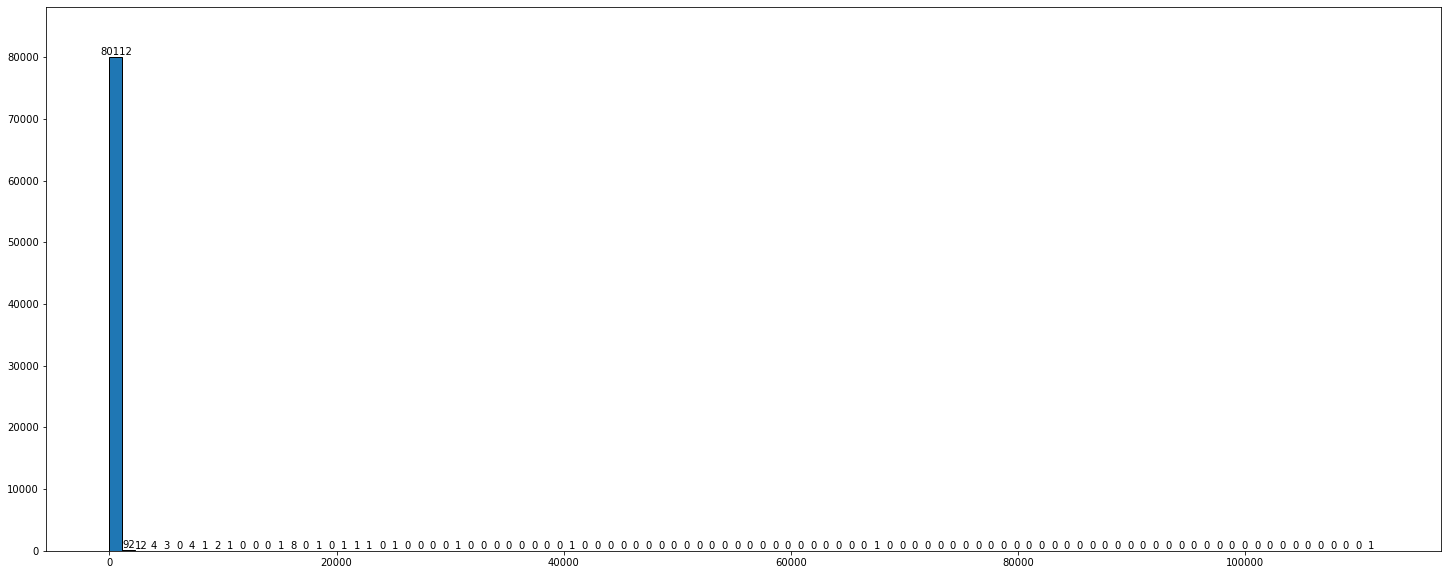

<Figure size 432x288 with 0 Axes>

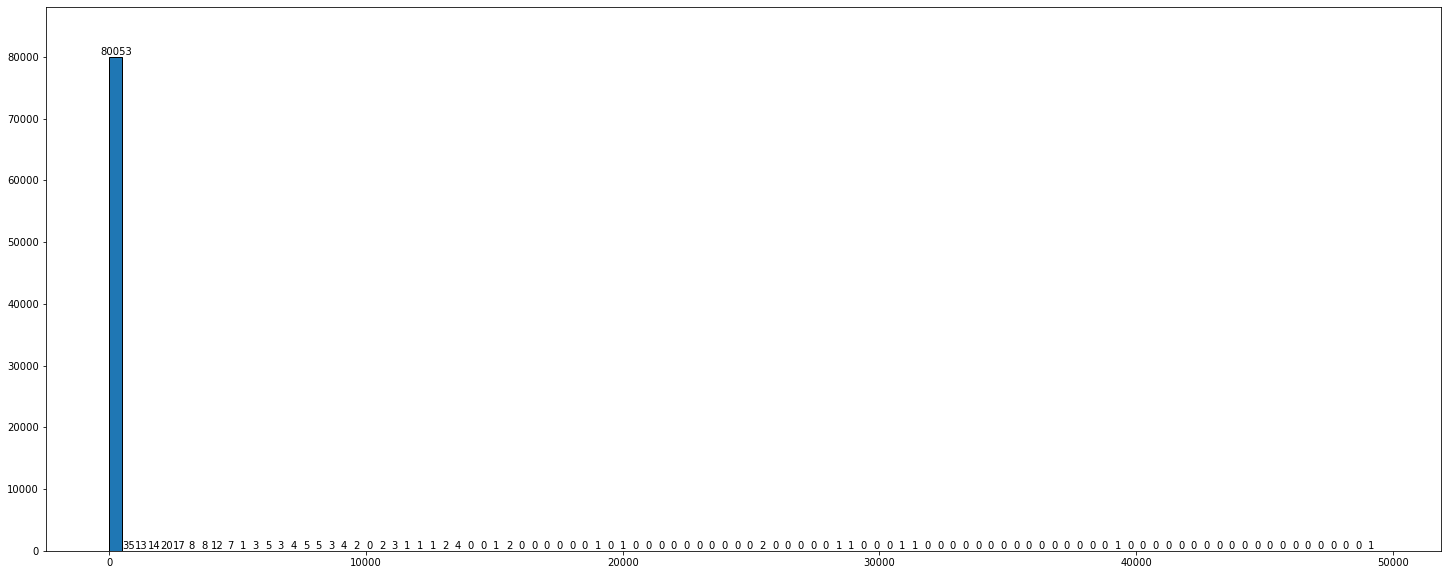

<Figure size 432x288 with 0 Axes>

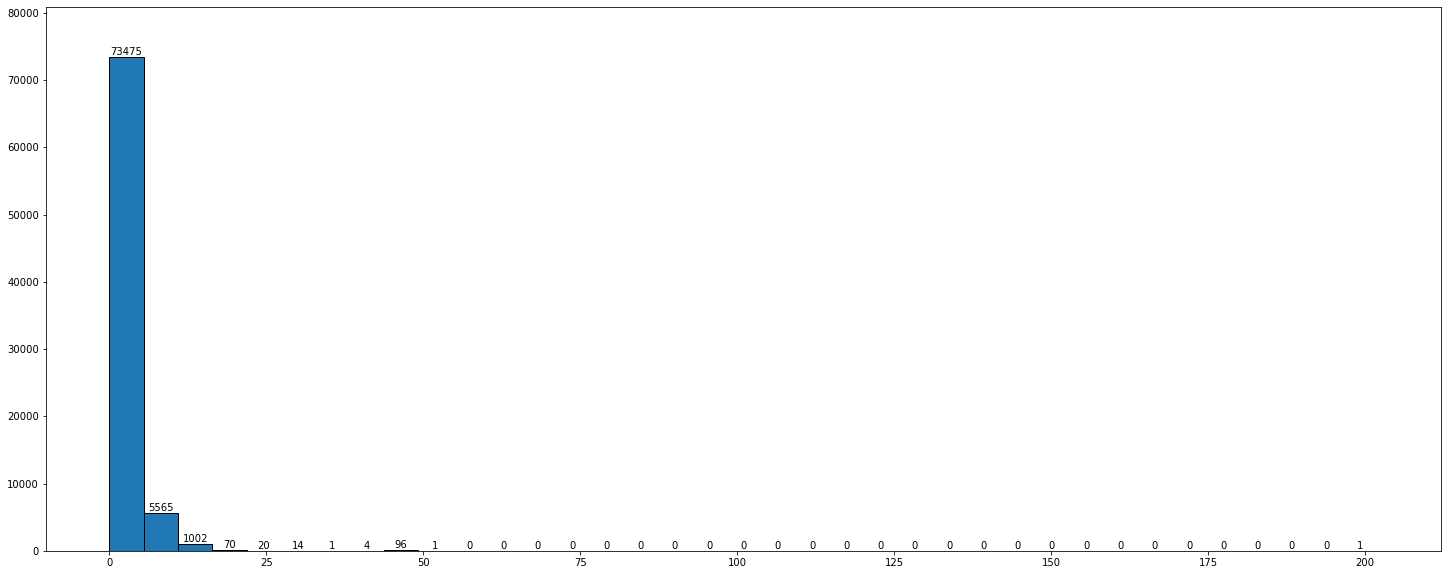

<Figure size 432x288 with 0 Axes>

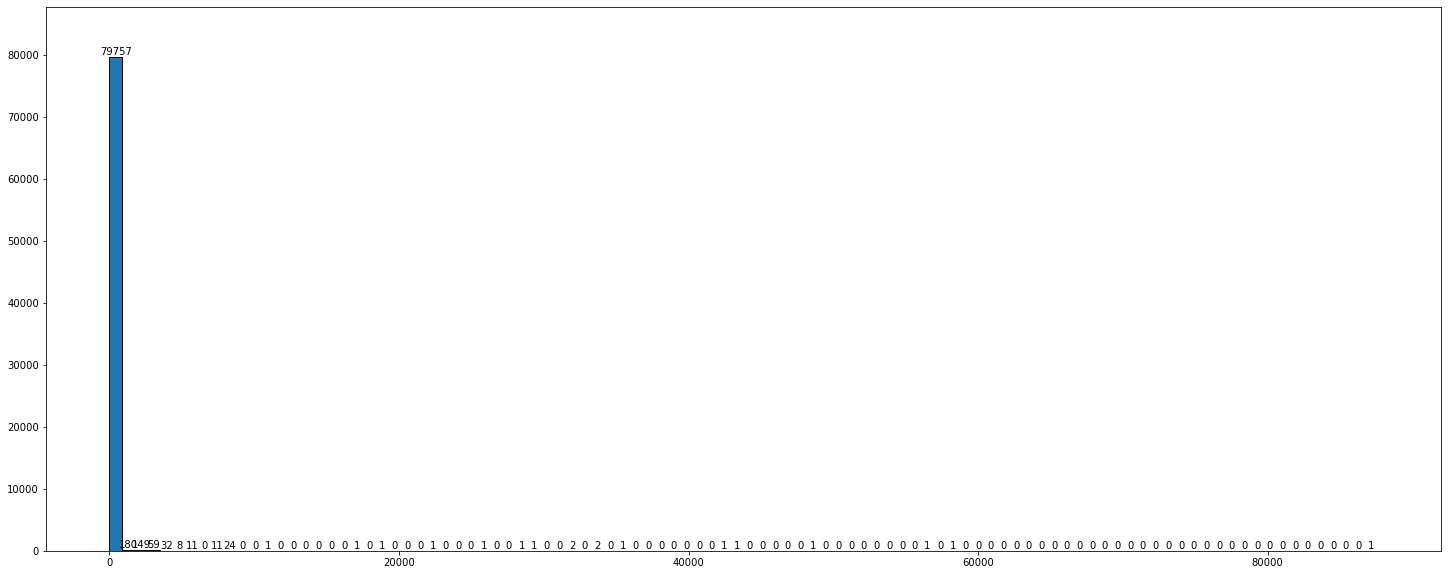

<Figure size 432x288 with 0 Axes>

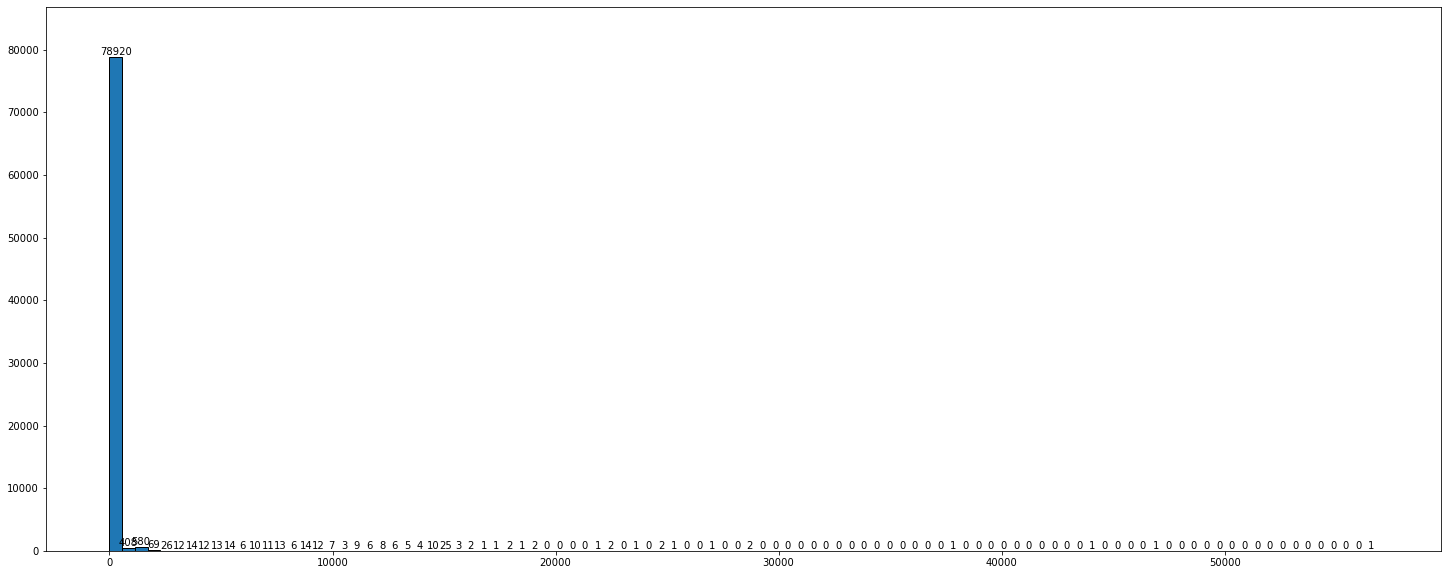

<Figure size 432x288 with 0 Axes>

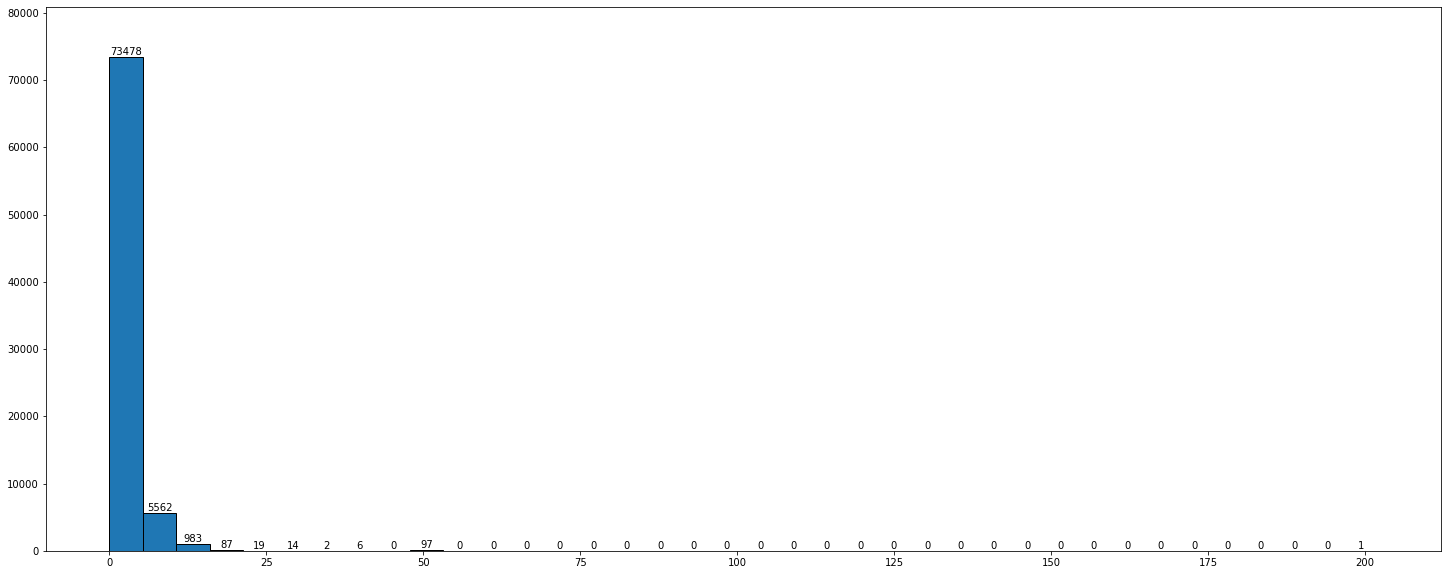

<Figure size 432x288 with 0 Axes>

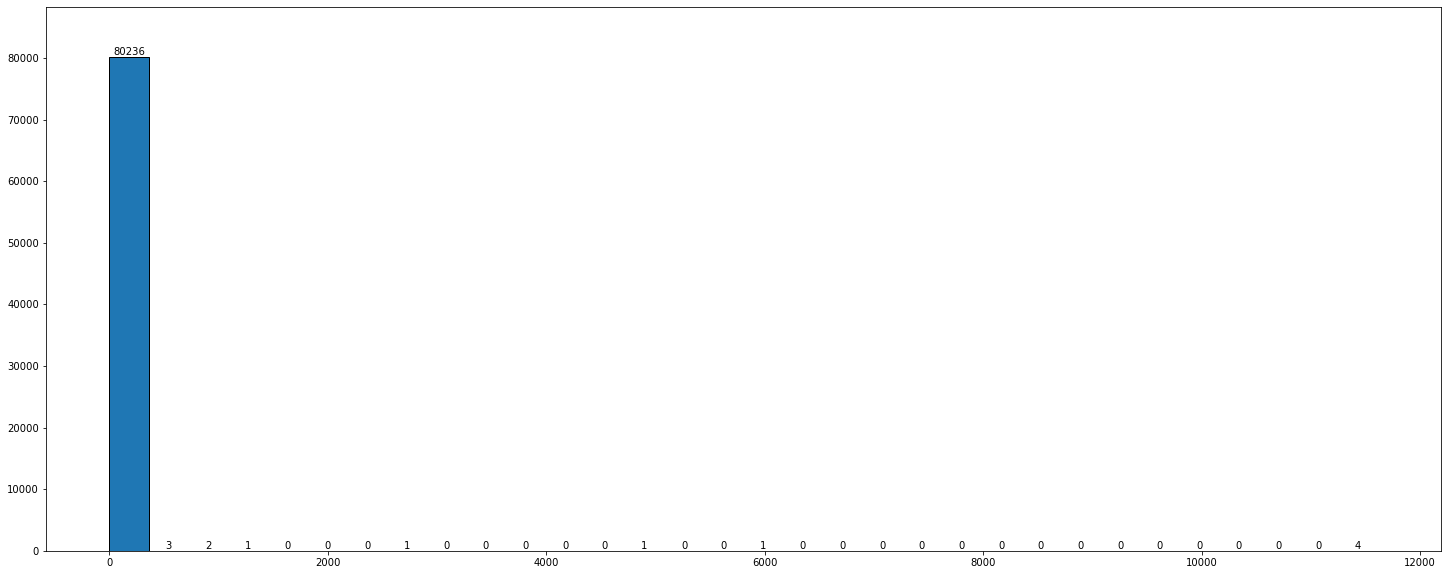

<Figure size 432x288 with 0 Axes>

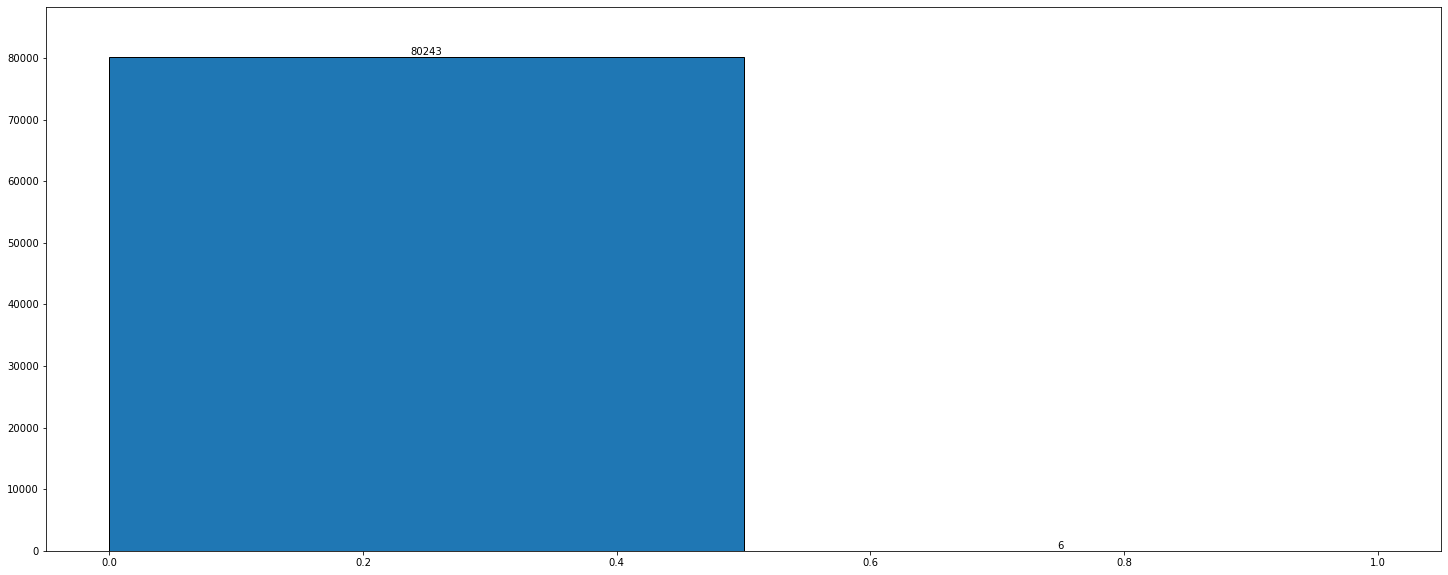

<Figure size 432x288 with 0 Axes>

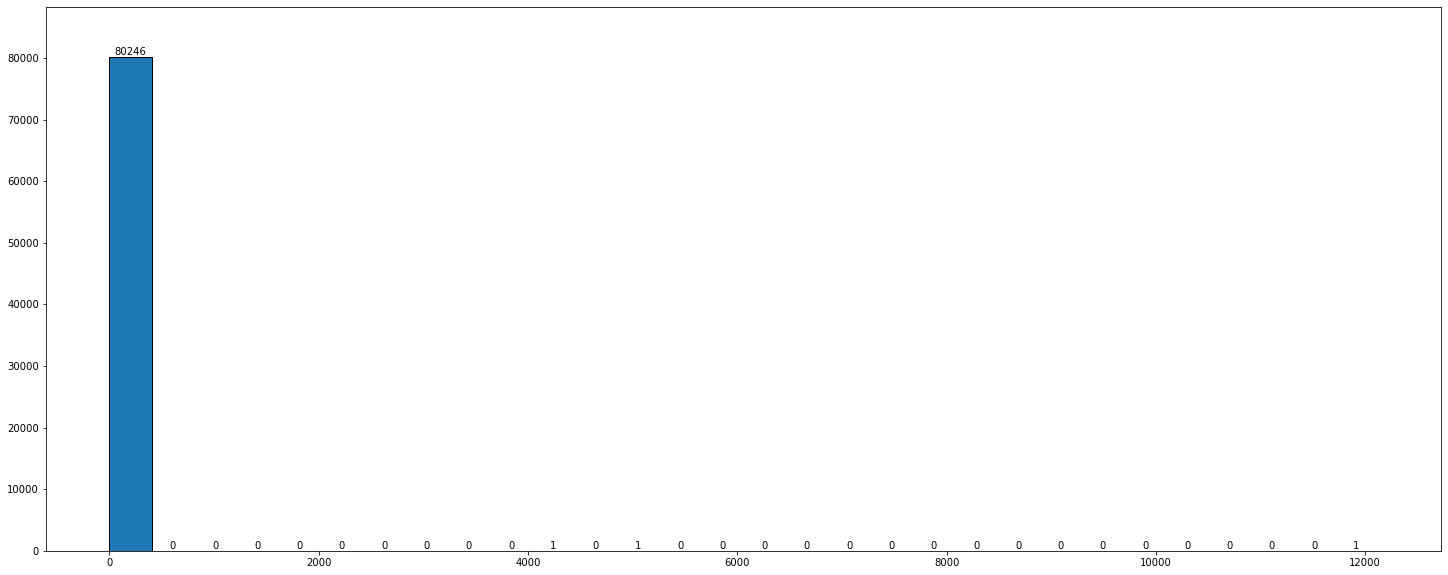

<Figure size 432x288 with 0 Axes>

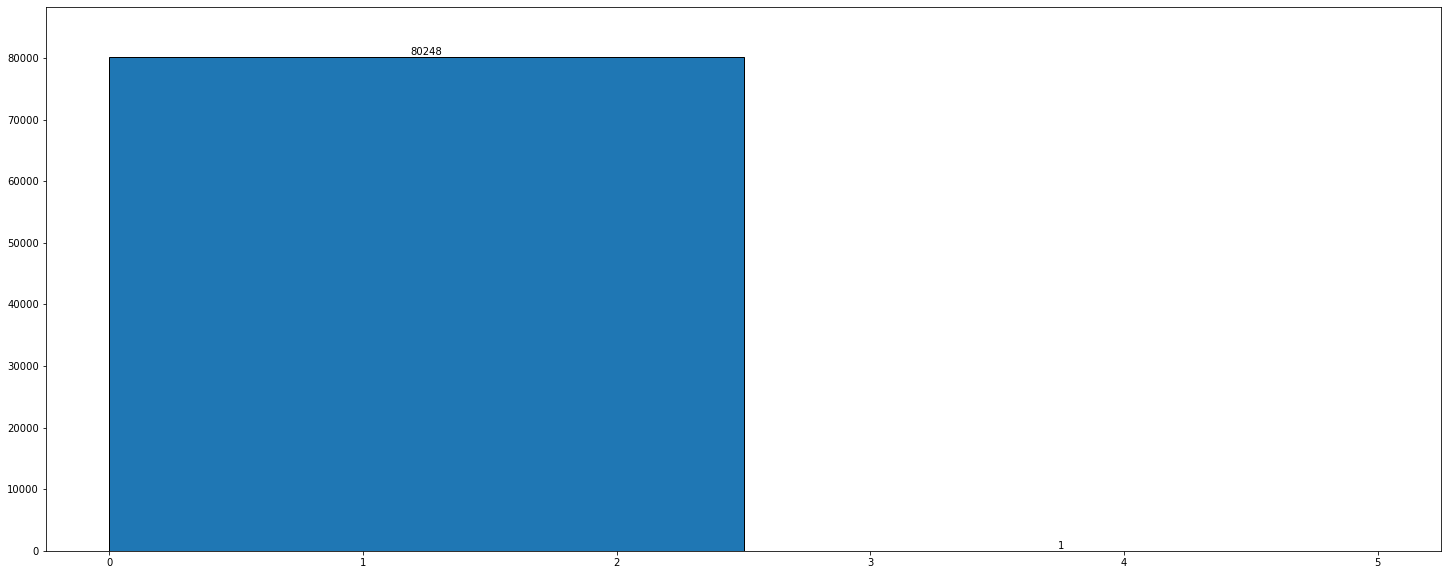

<Figure size 432x288 with 0 Axes>

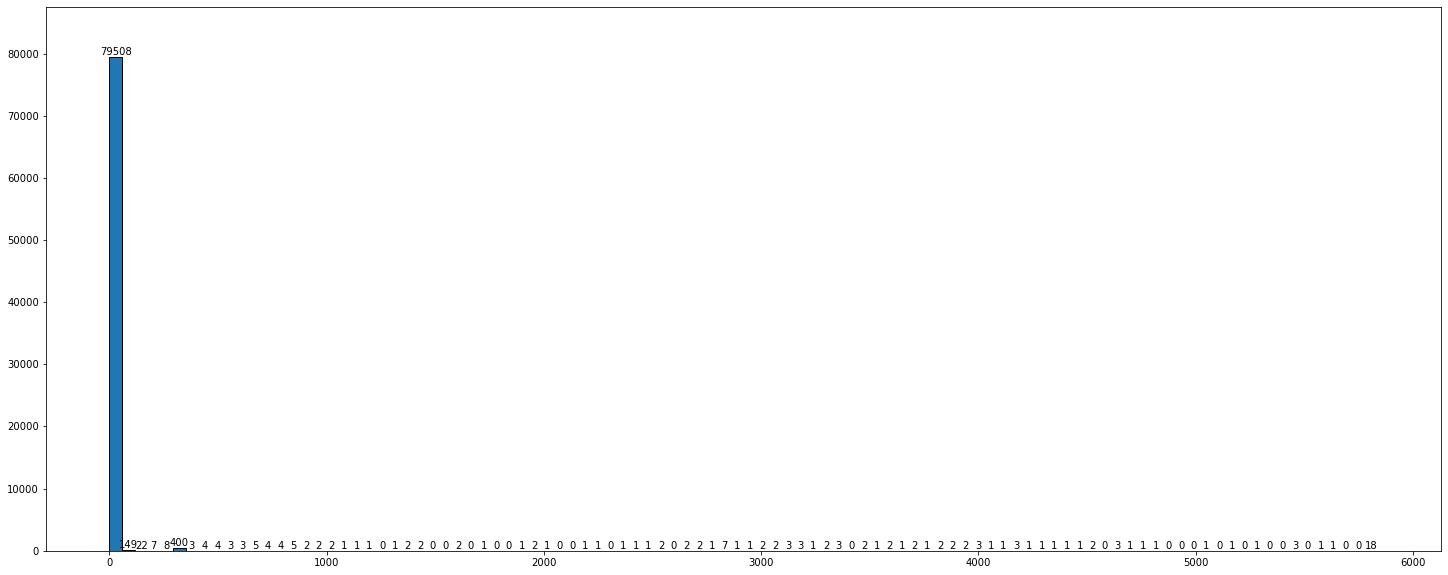

<Figure size 432x288 with 0 Axes>

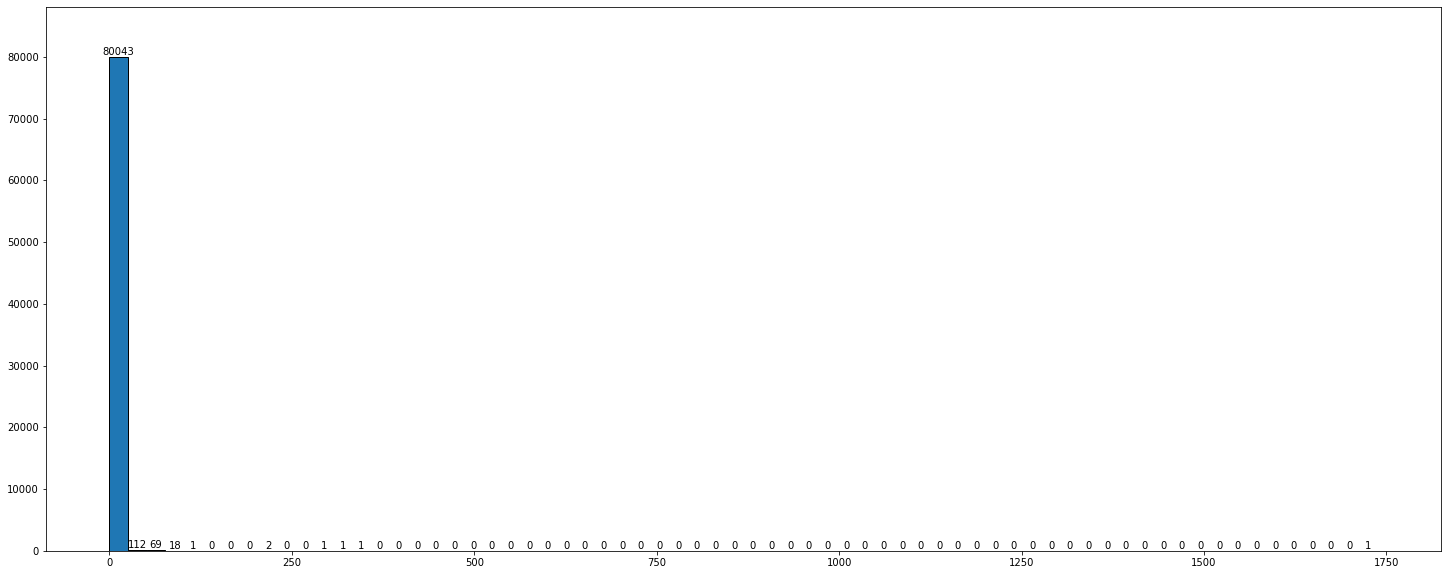

<Figure size 432x288 with 0 Axes>

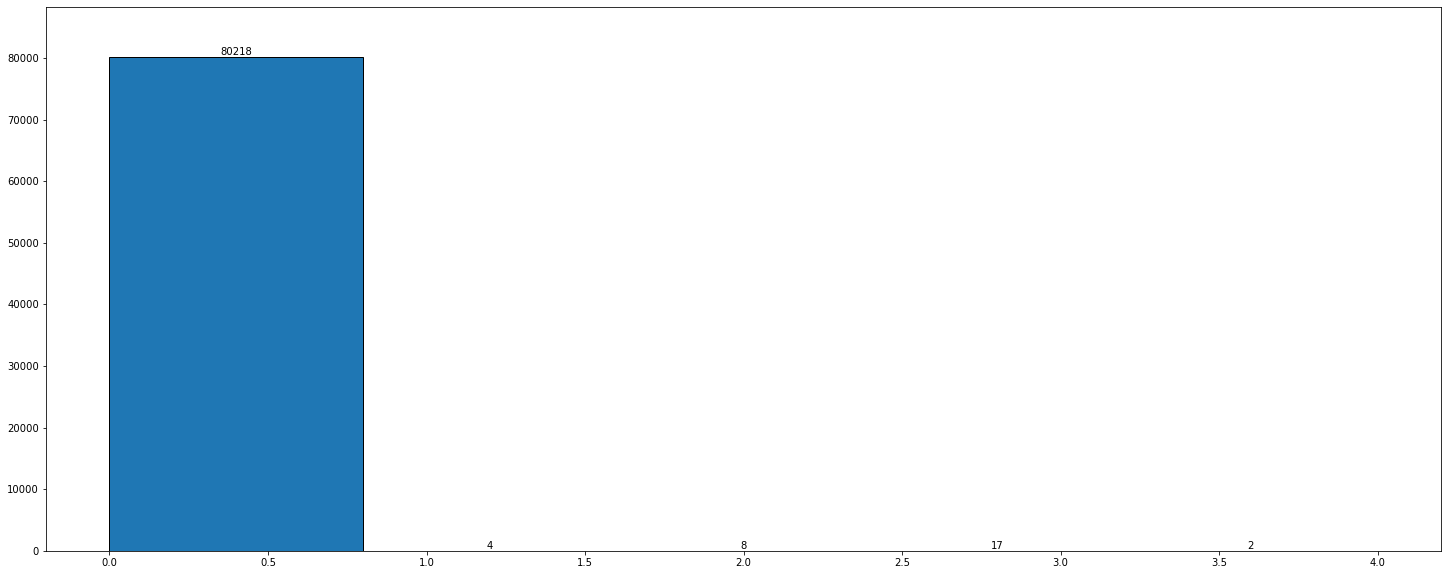

<Figure size 432x288 with 0 Axes>

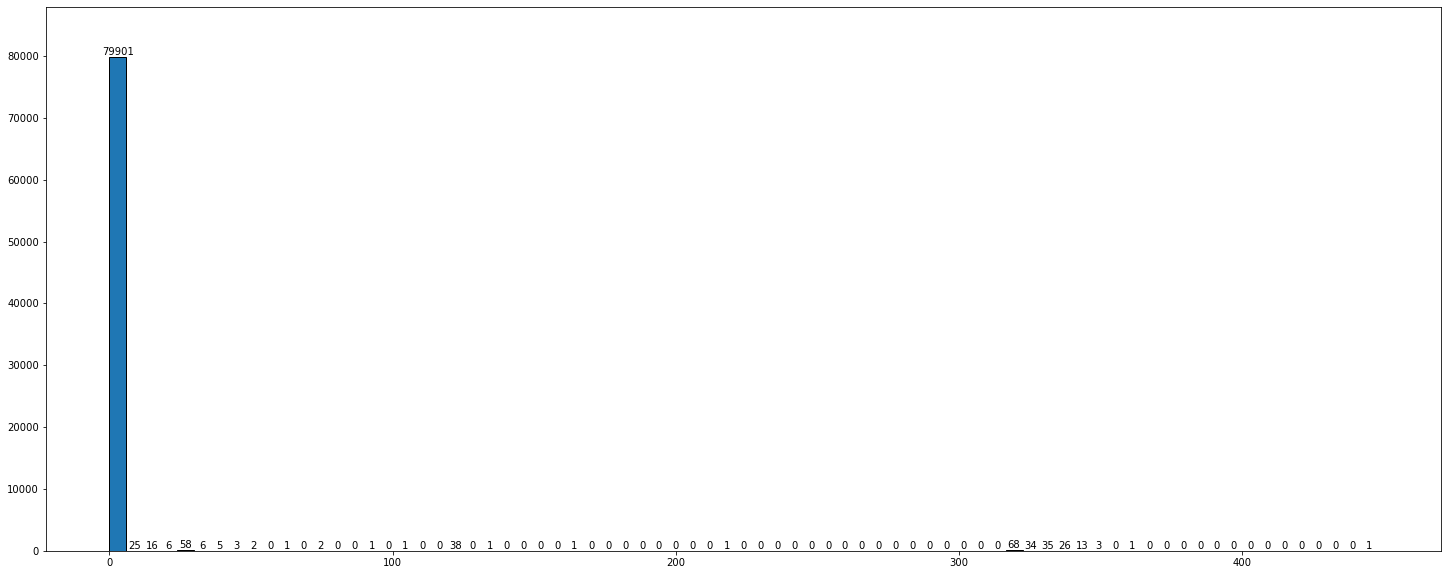

<Figure size 432x288 with 0 Axes>

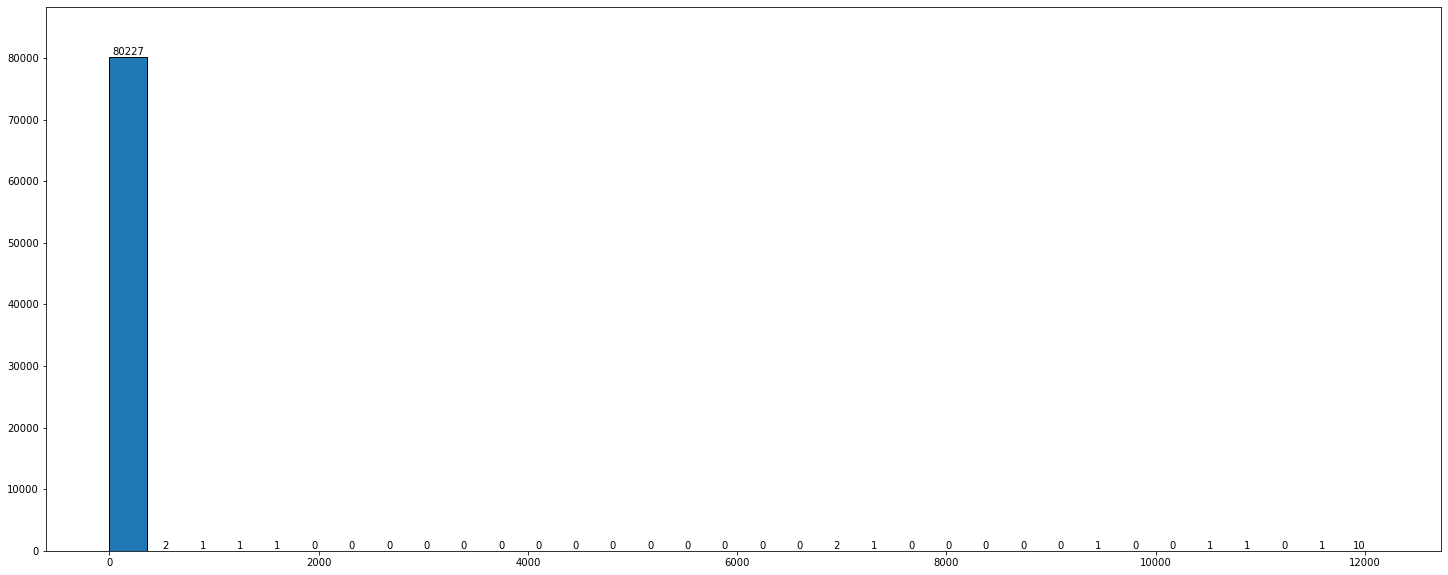

<Figure size 432x288 with 0 Axes>

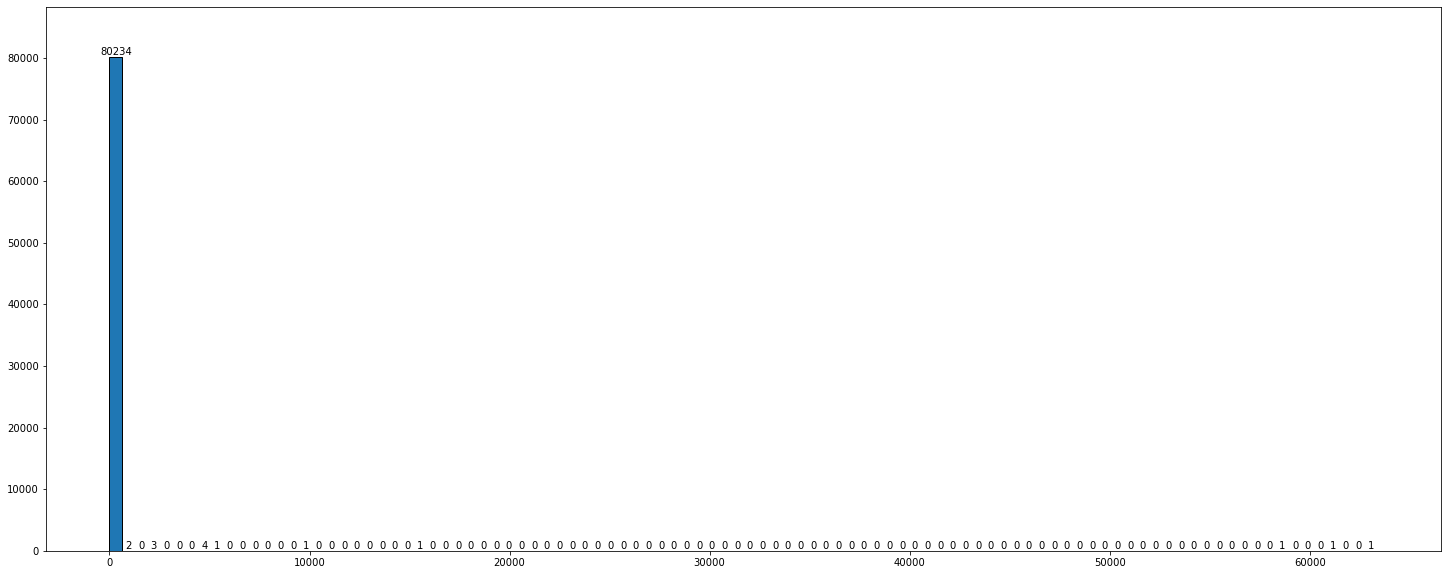

<Figure size 432x288 with 0 Axes>

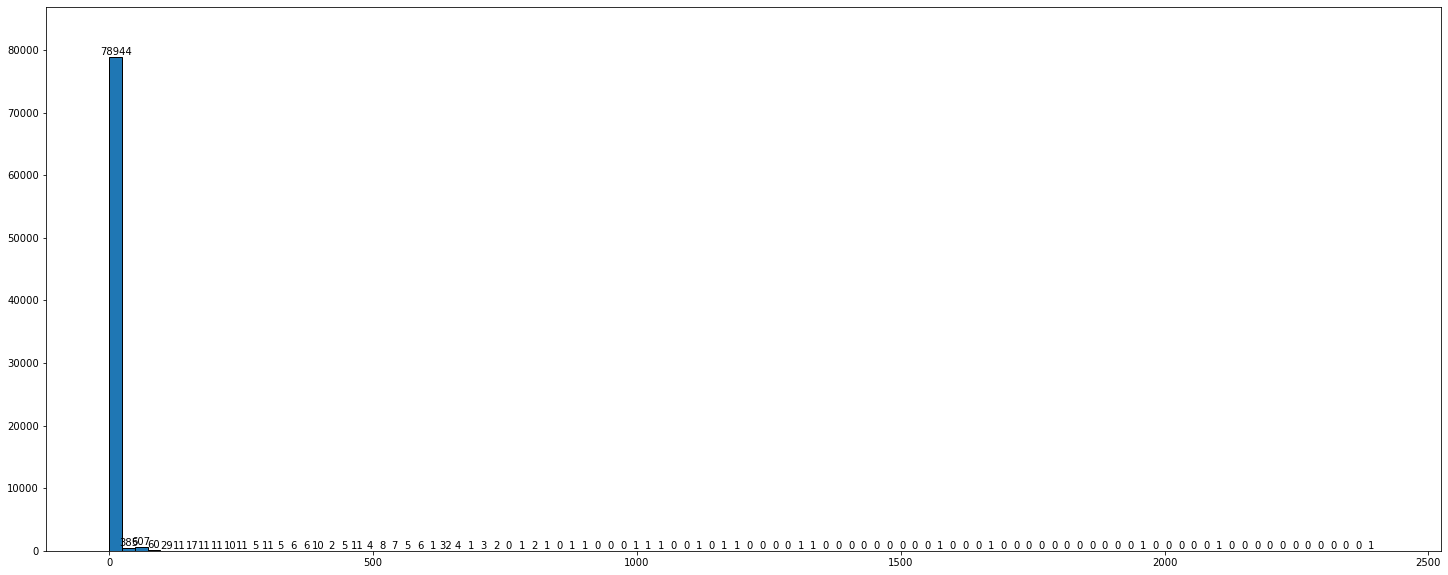

<Figure size 432x288 with 0 Axes>

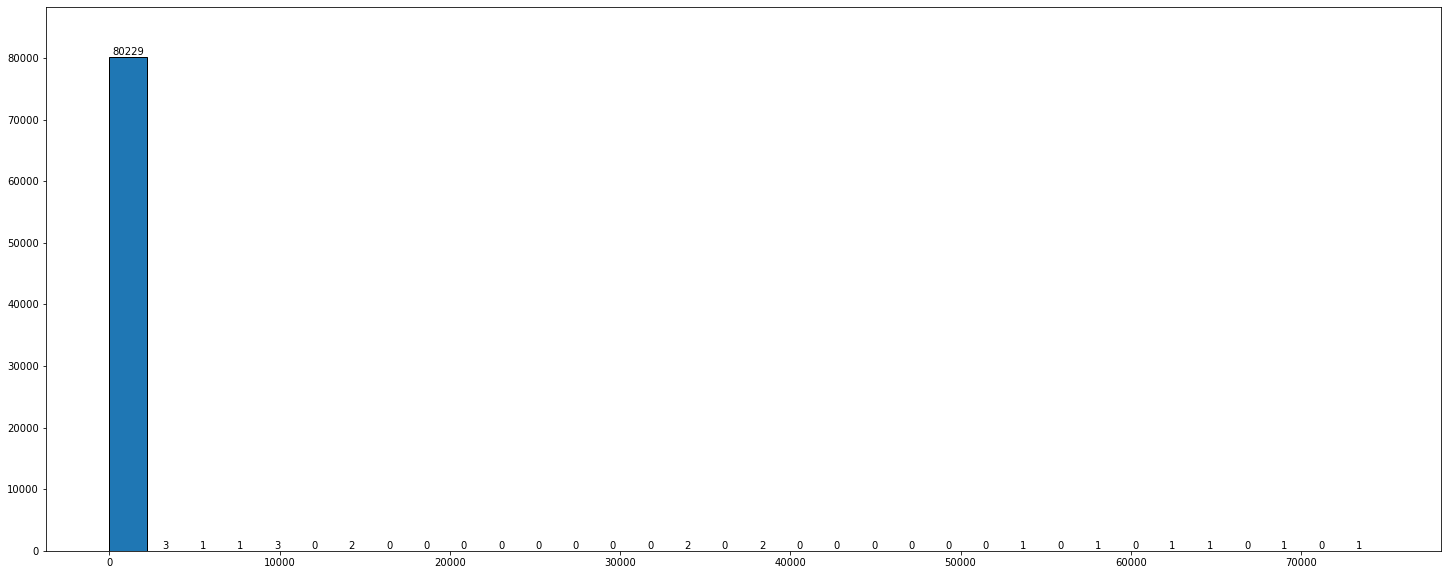

<Figure size 432x288 with 0 Axes>

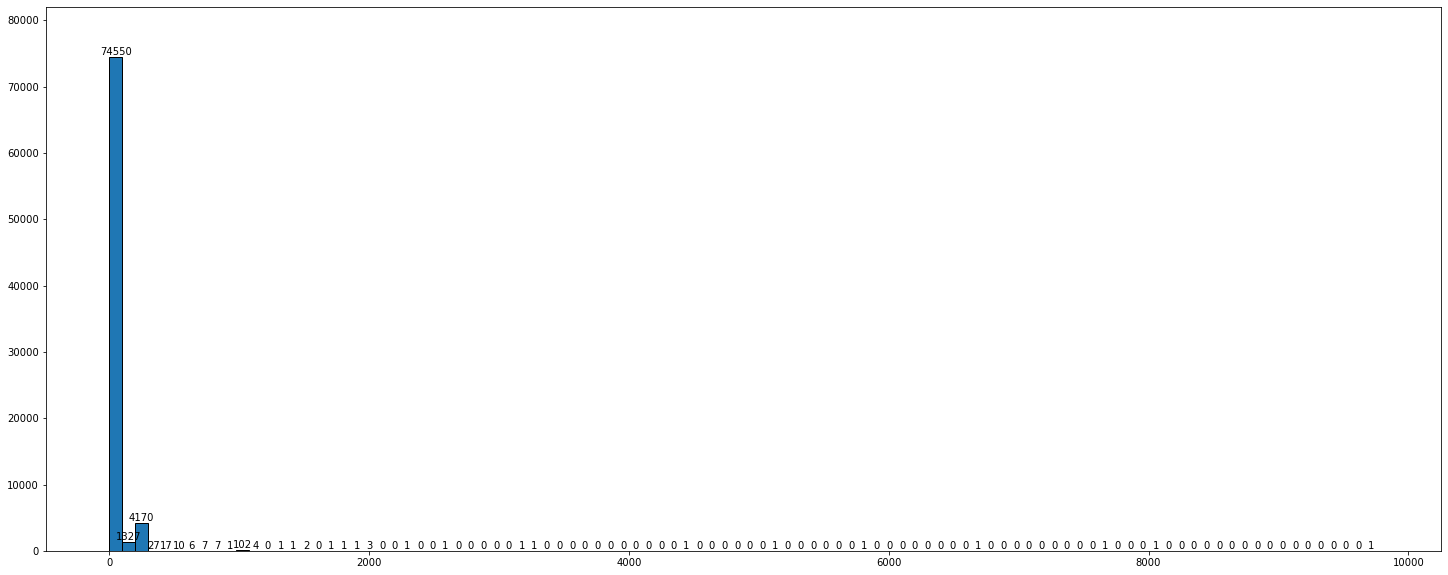

<Figure size 432x288 with 0 Axes>

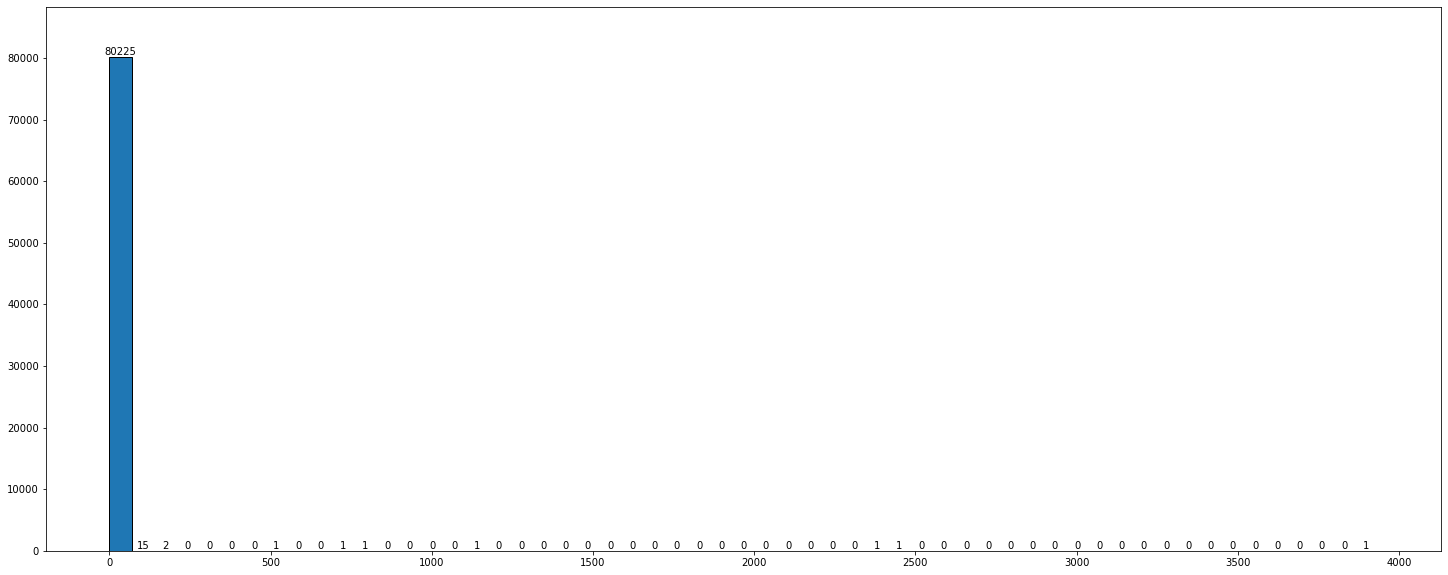

<Figure size 432x288 with 0 Axes>

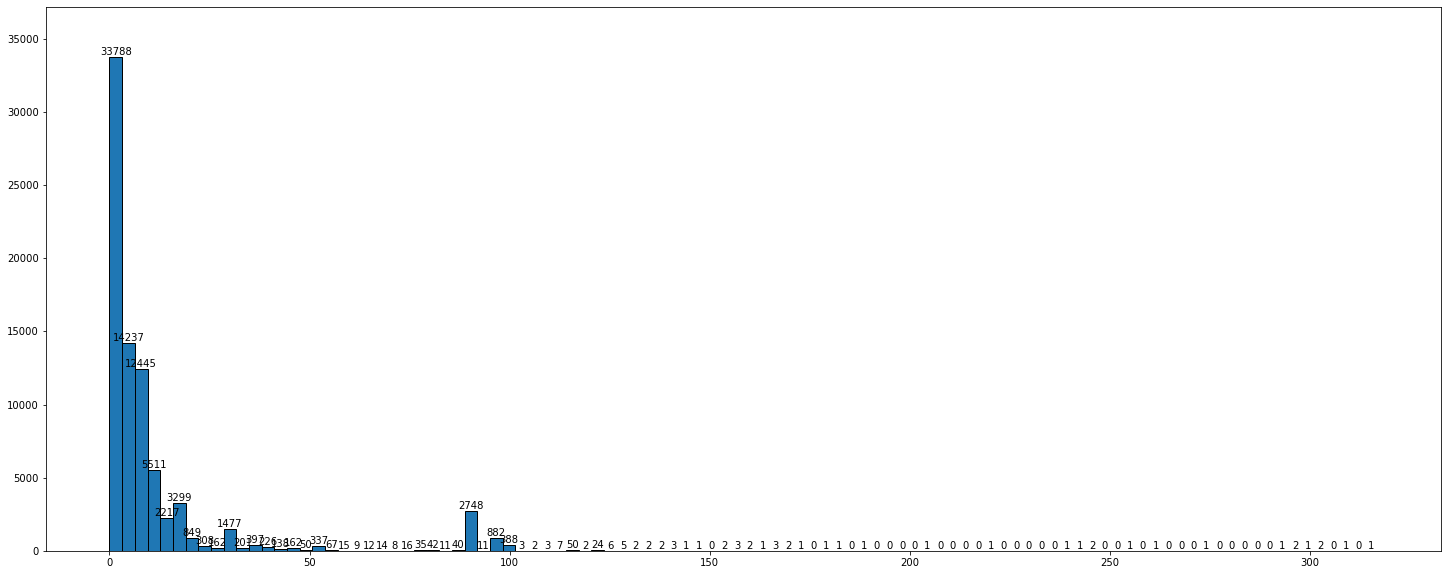

<Figure size 432x288 with 0 Axes>

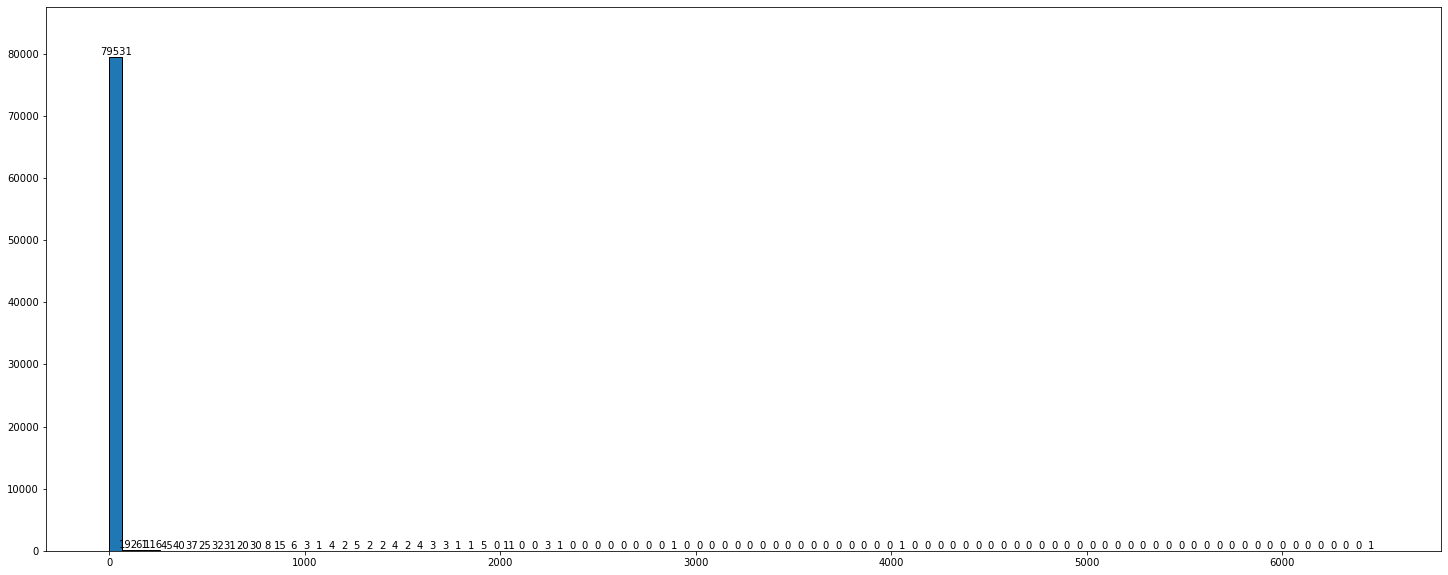

<Figure size 432x288 with 0 Axes>

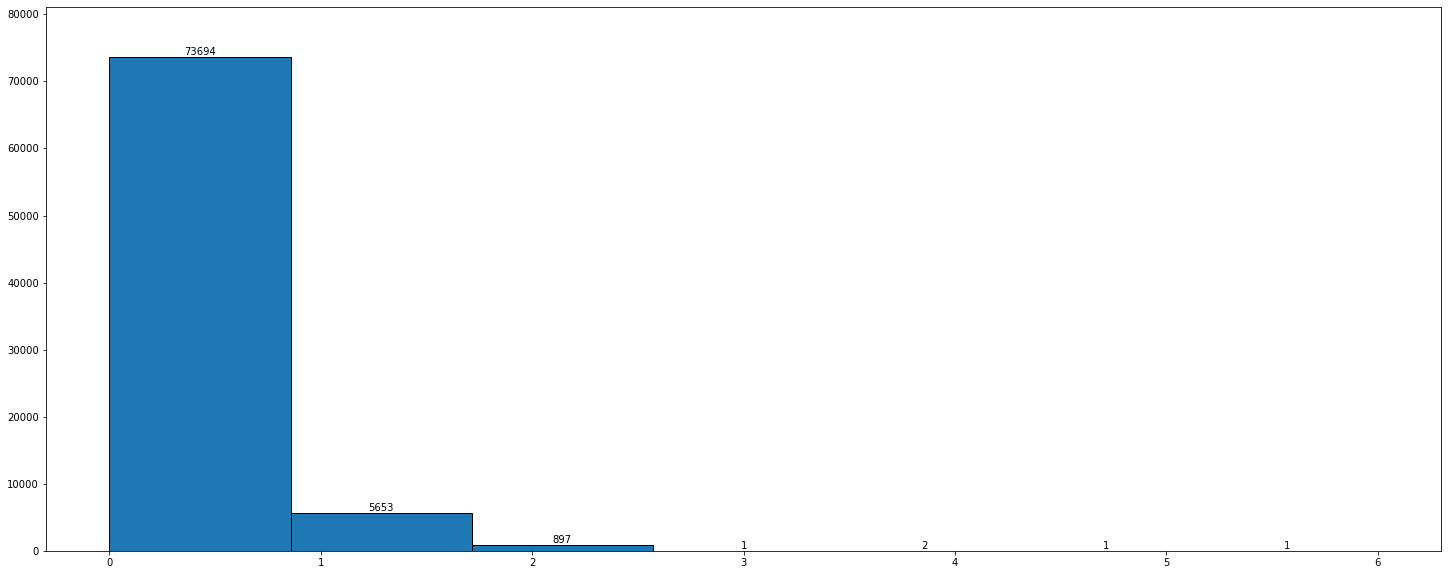

<Figure size 432x288 with 0 Axes>

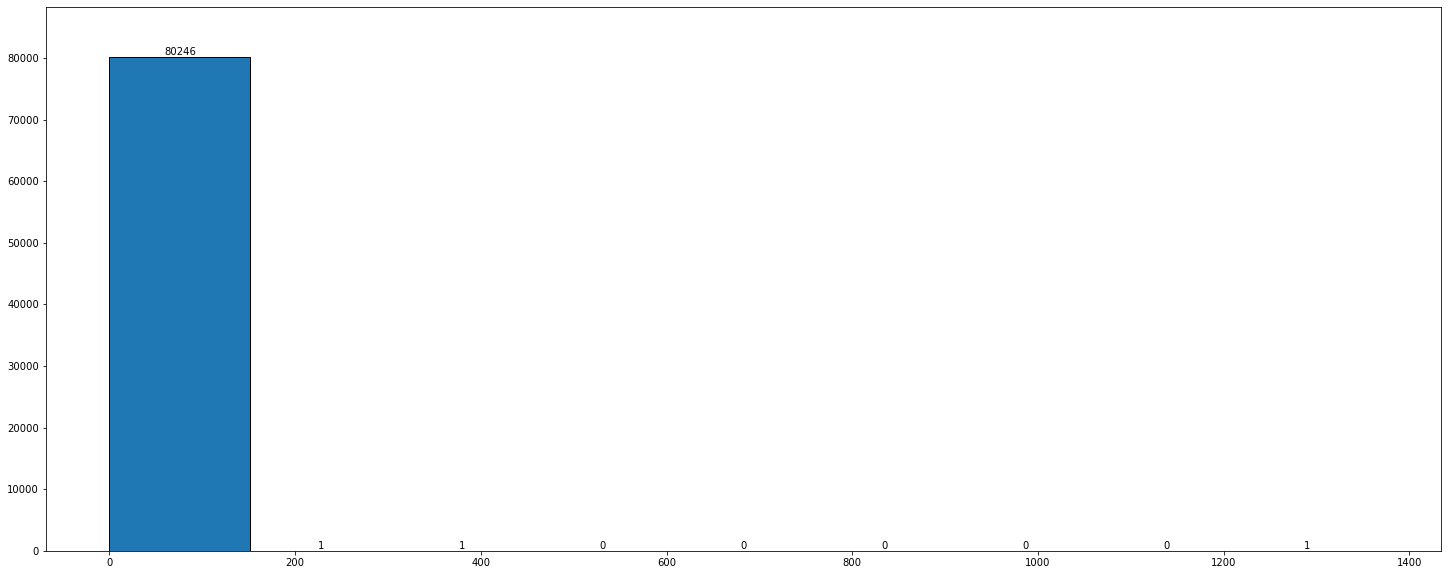

<Figure size 432x288 with 0 Axes>

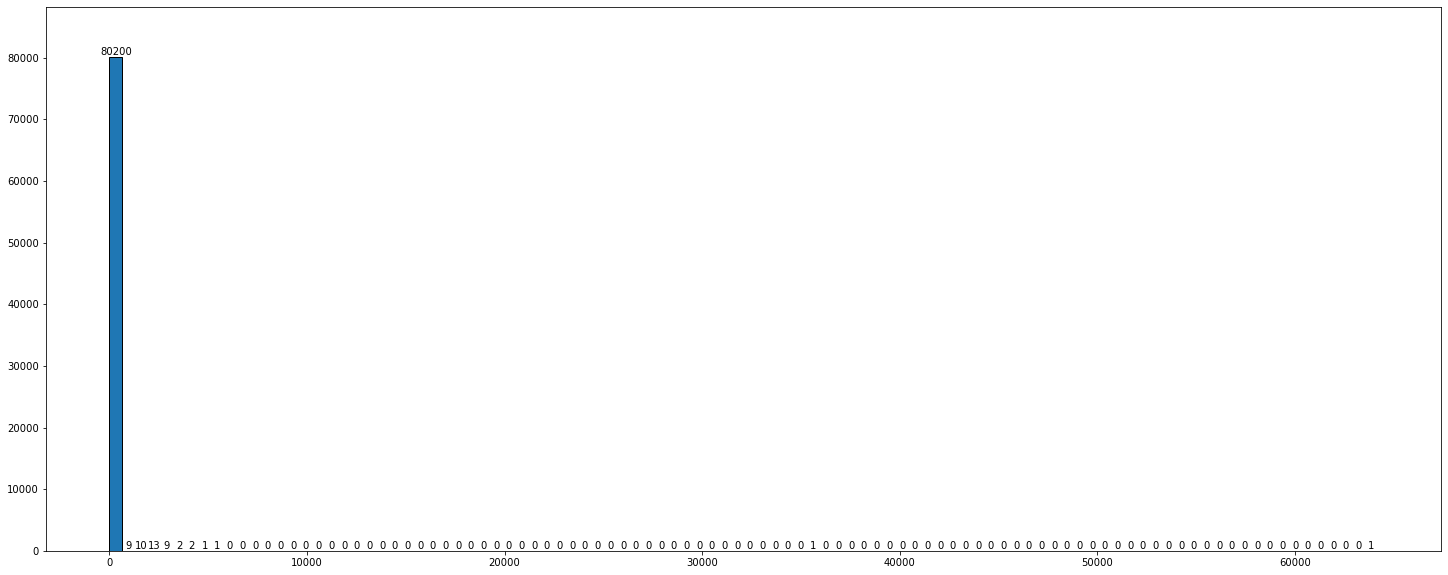

<Figure size 432x288 with 0 Axes>

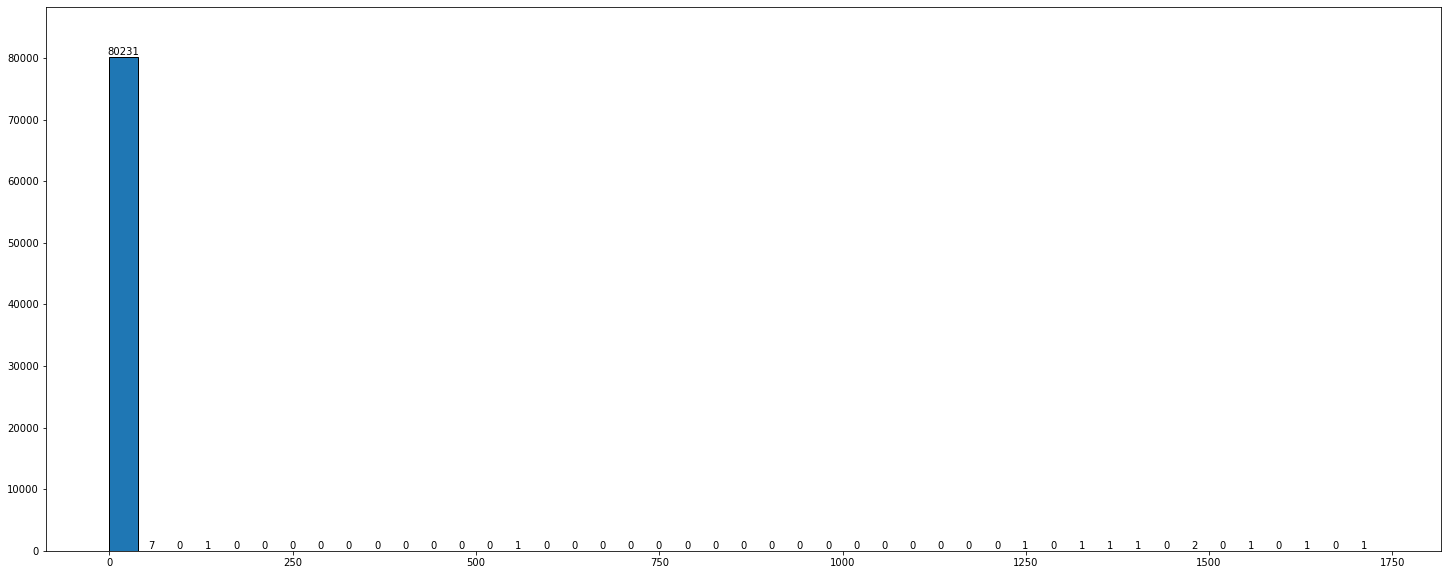

<Figure size 432x288 with 0 Axes>

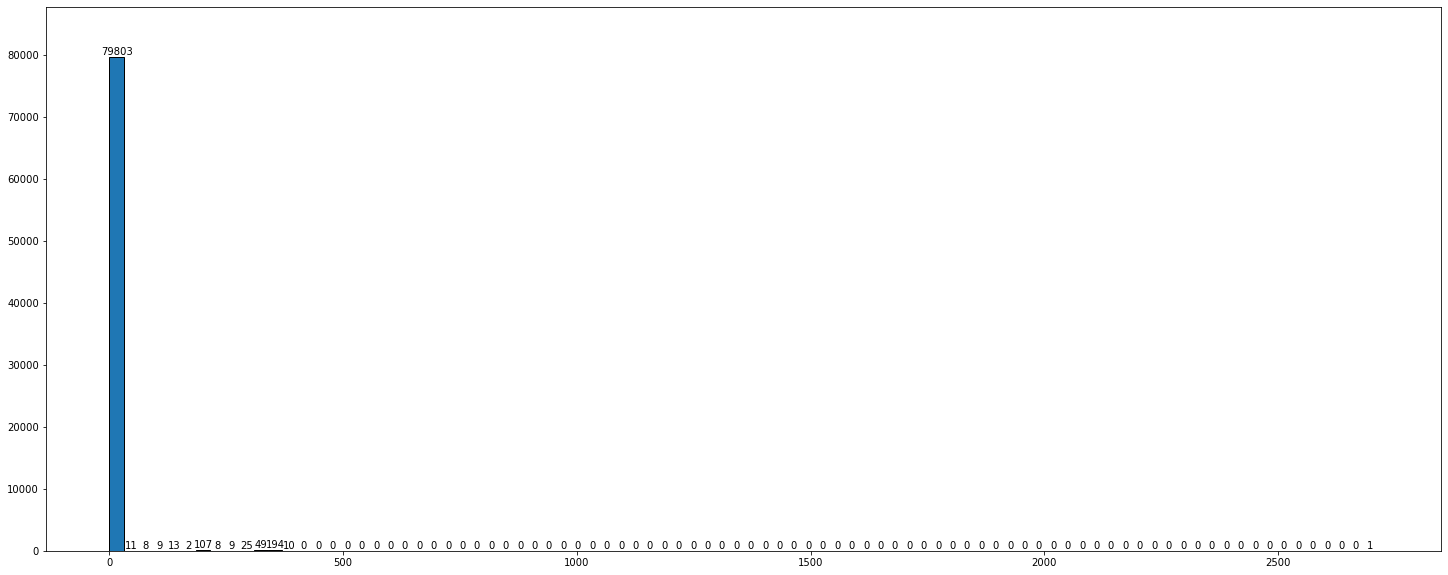

<Figure size 432x288 with 0 Axes>

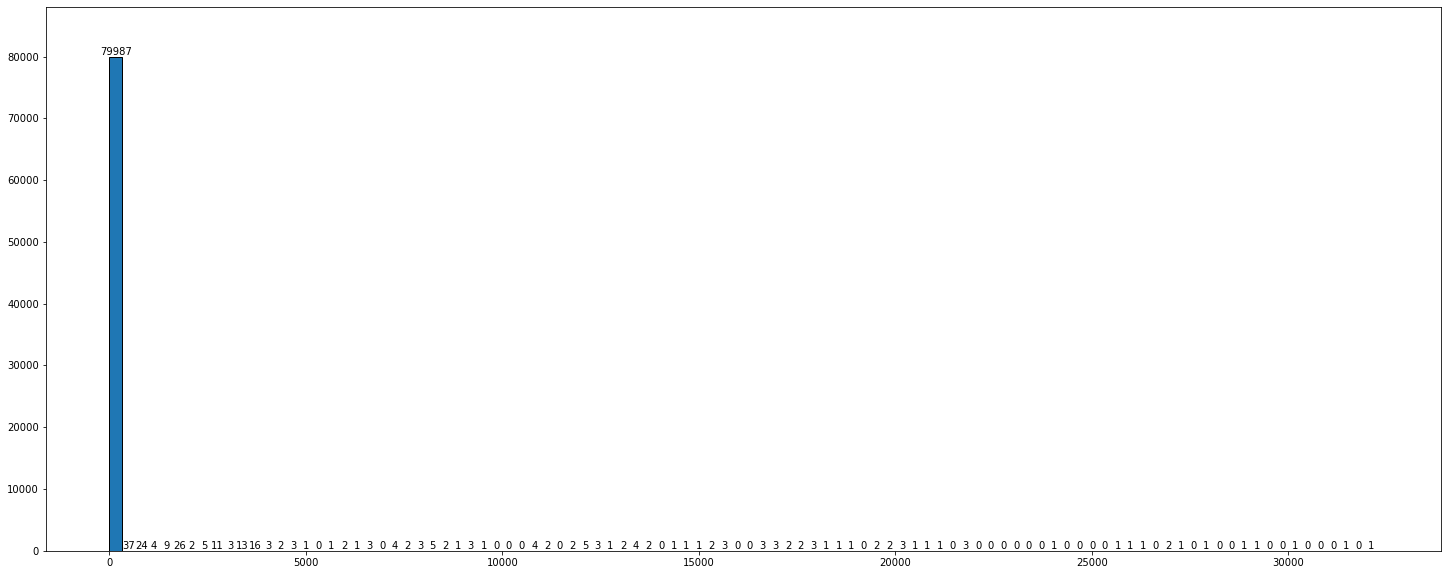

<Figure size 432x288 with 0 Axes>

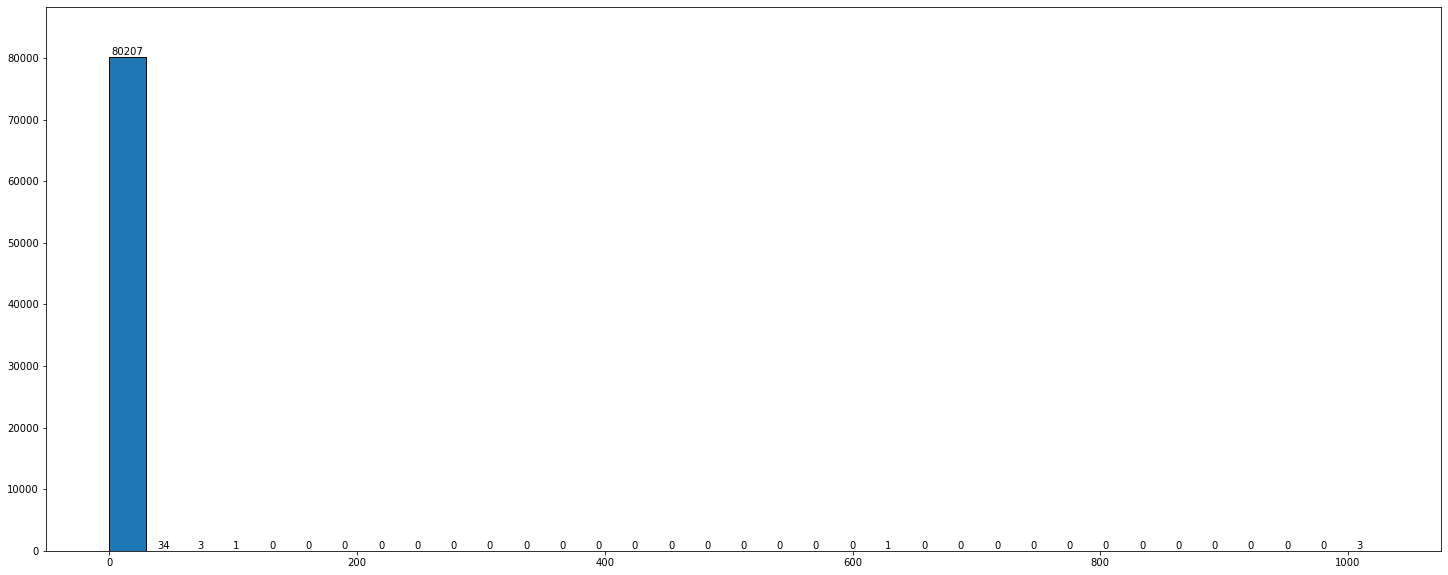

<Figure size 432x288 with 0 Axes>

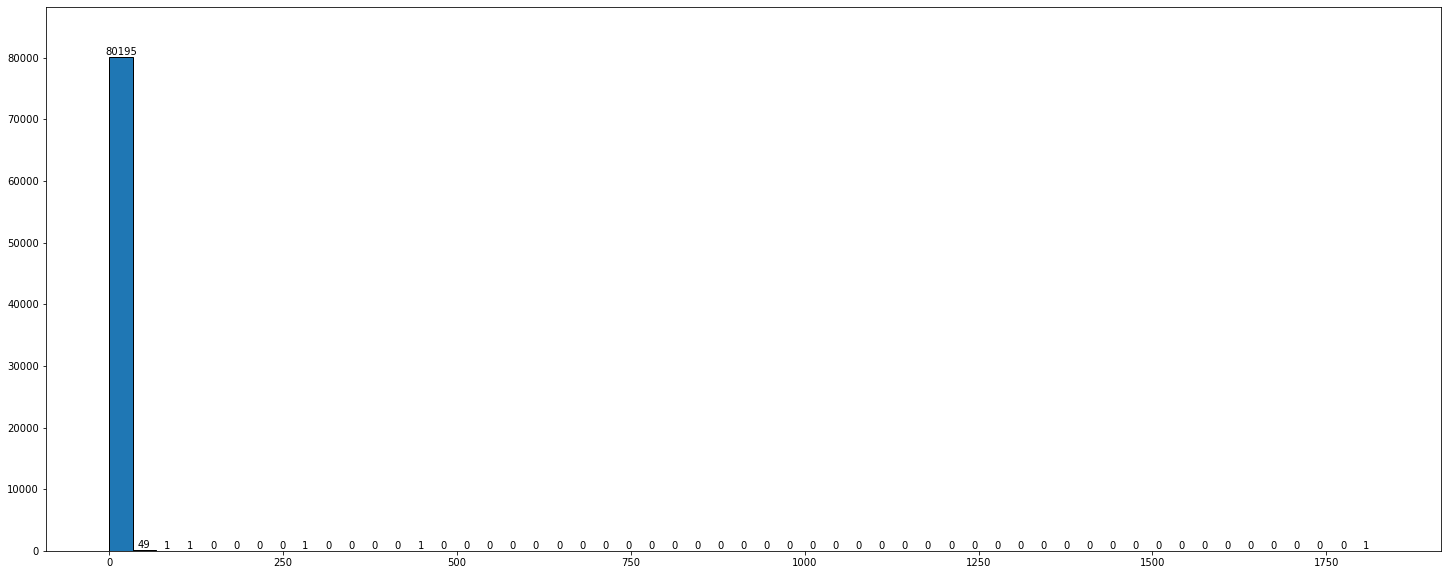

<Figure size 432x288 with 0 Axes>

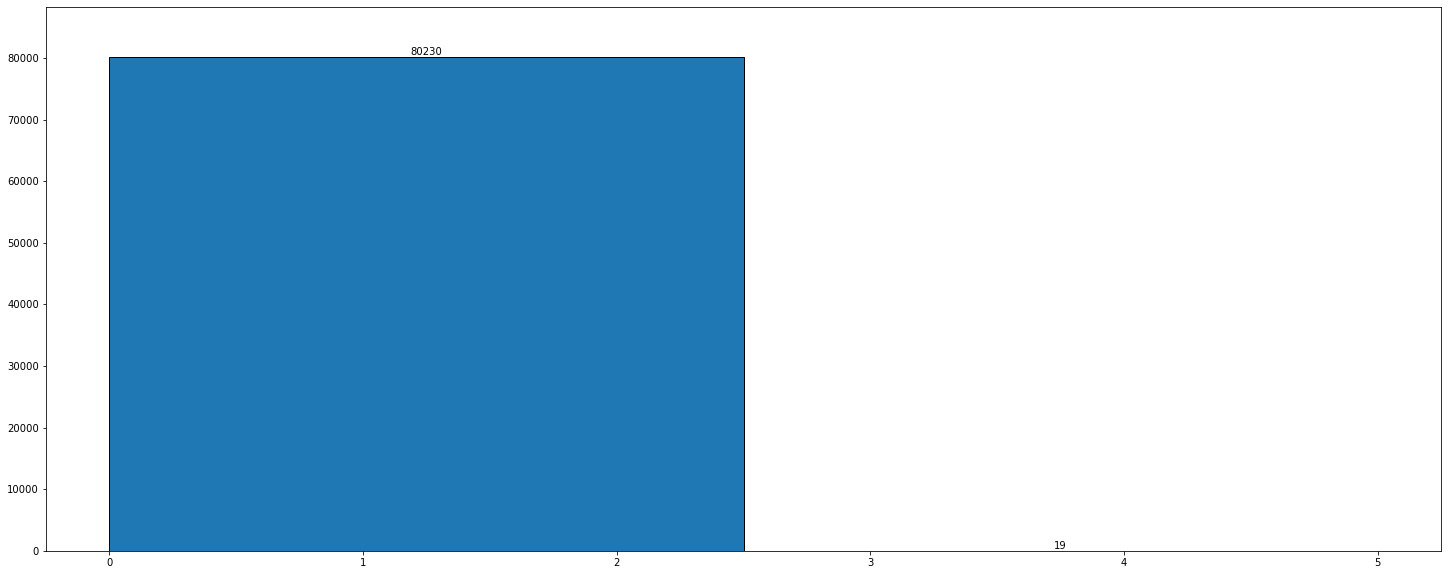

<Figure size 432x288 with 0 Axes>

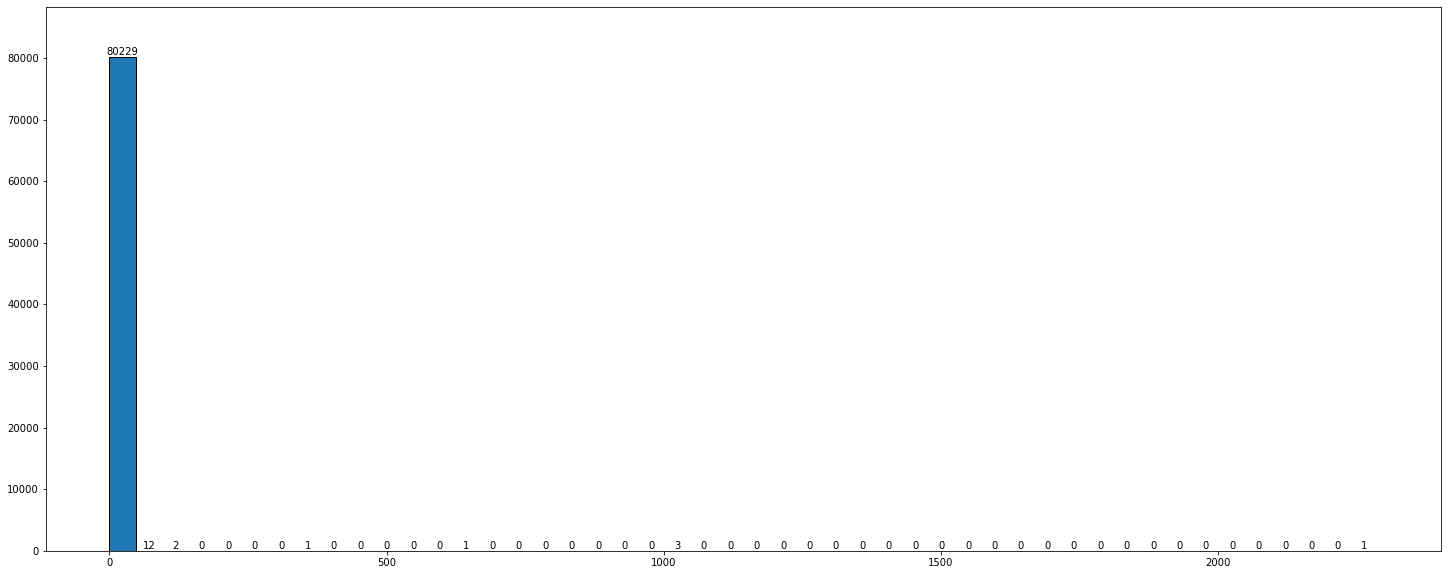

<Figure size 432x288 with 0 Axes>

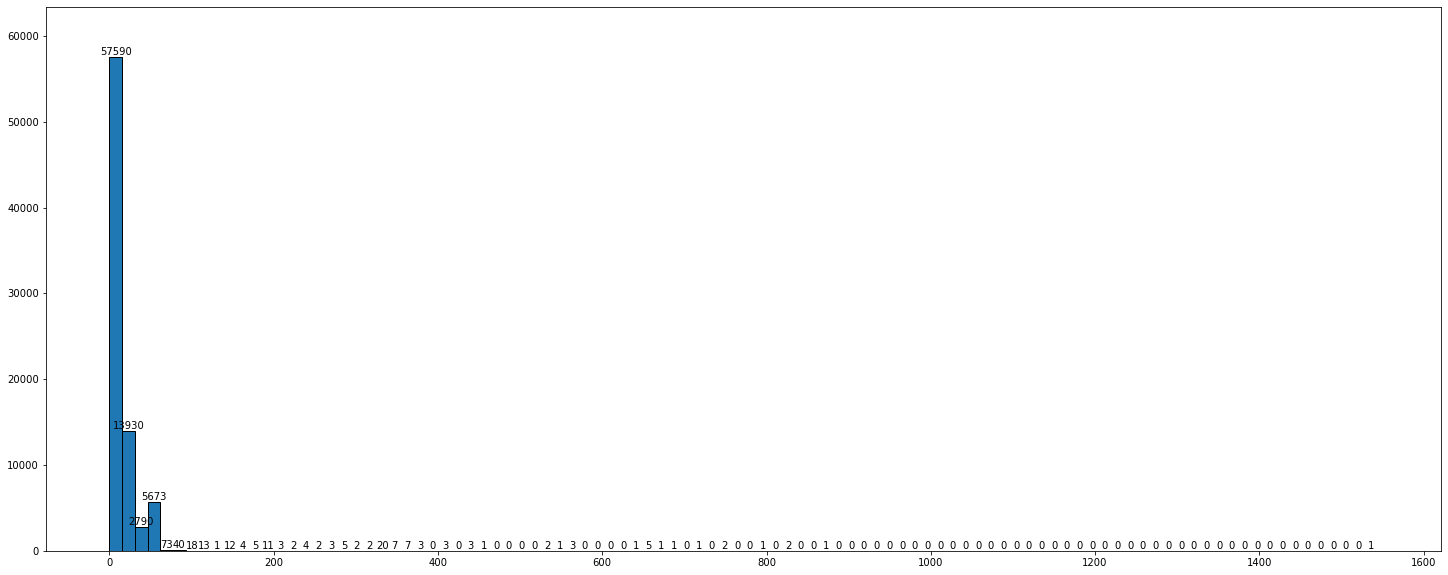

<Figure size 432x288 with 0 Axes>

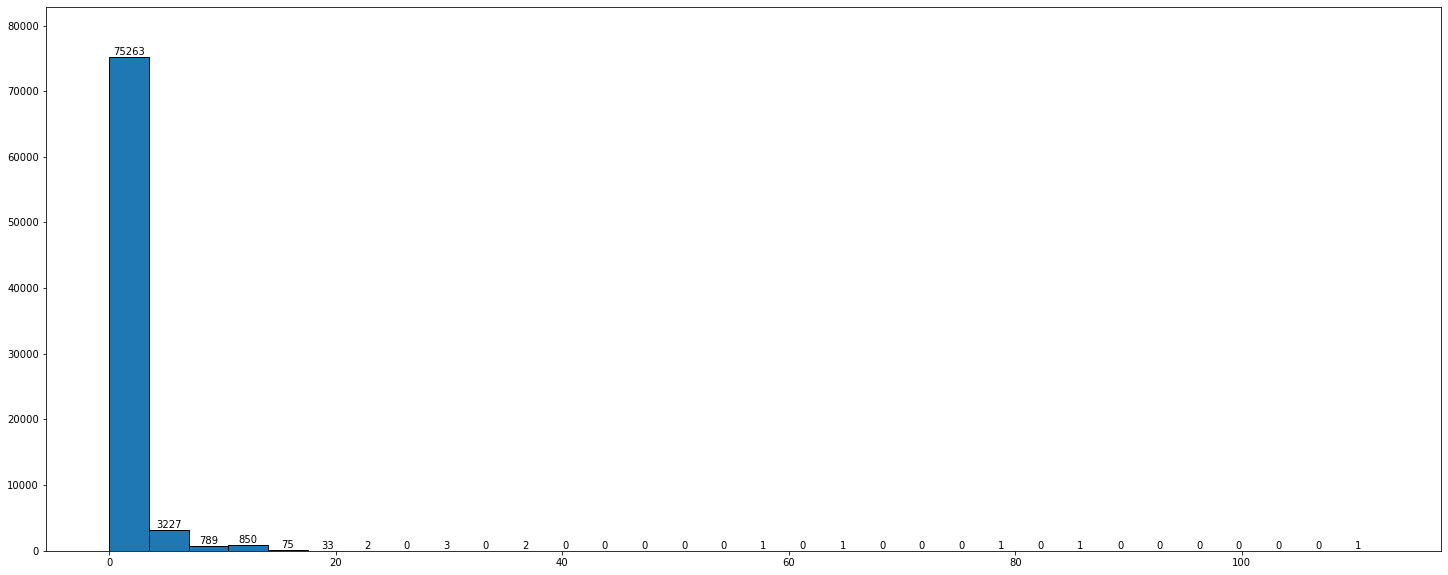

<Figure size 432x288 with 0 Axes>

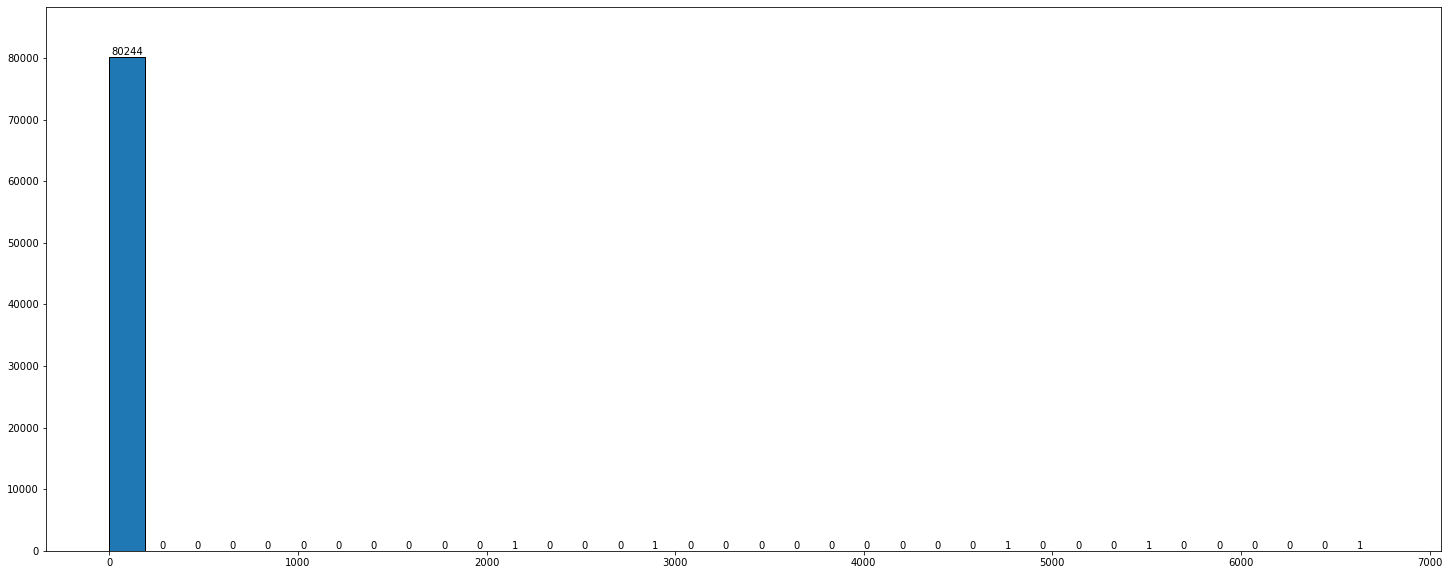

<Figure size 432x288 with 0 Axes>

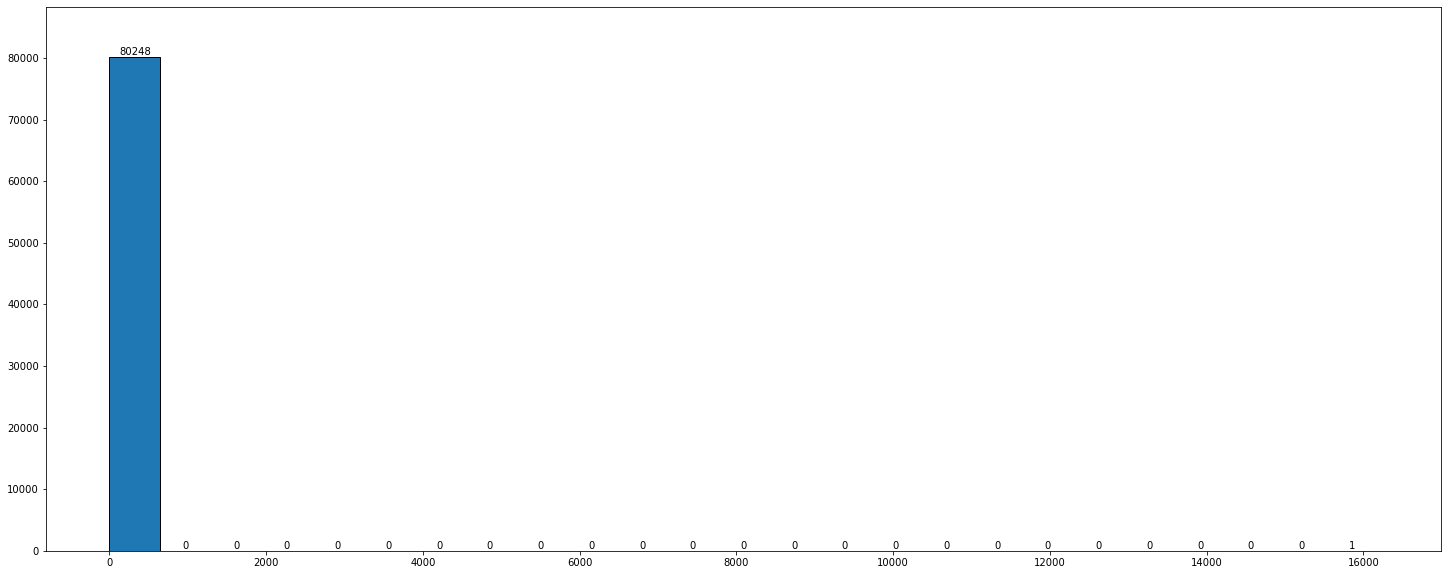

<Figure size 432x288 with 0 Axes>

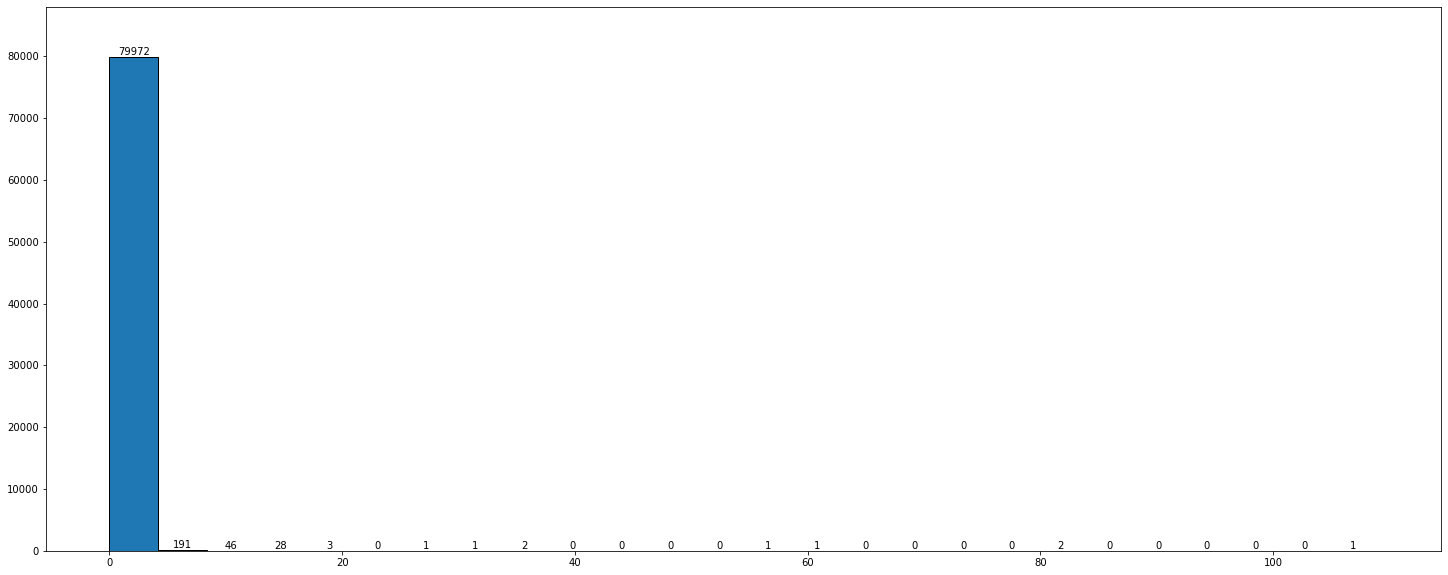

<Figure size 432x288 with 0 Axes>

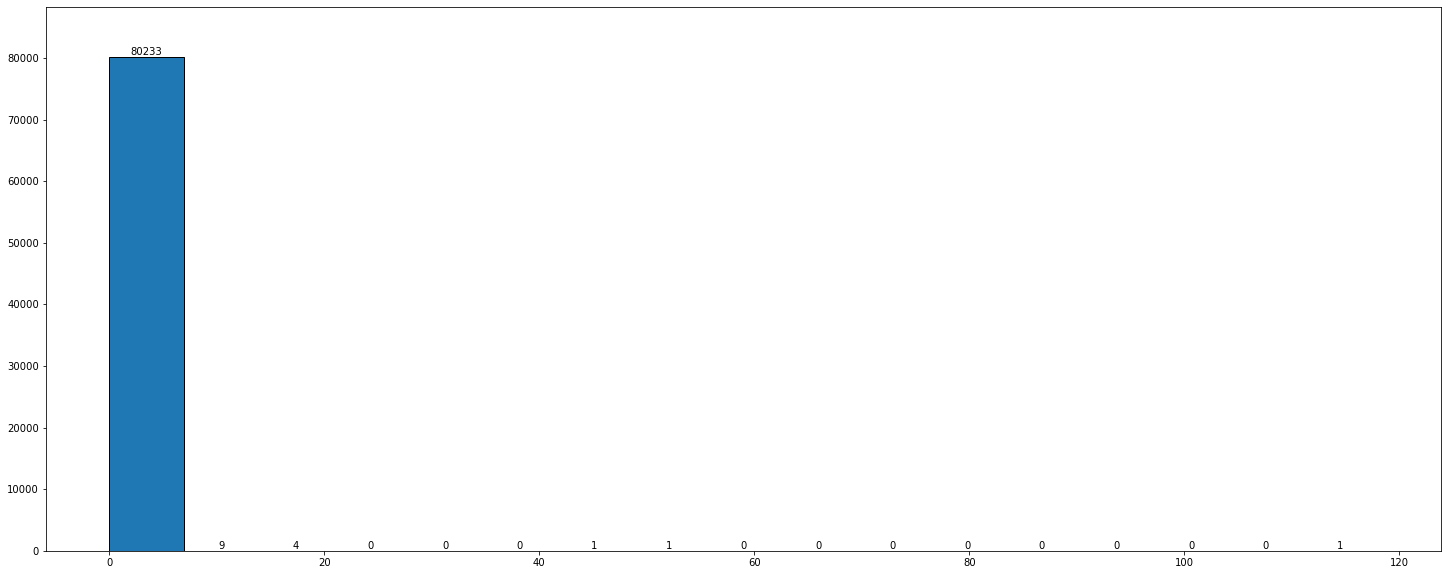

<Figure size 432x288 with 0 Axes>

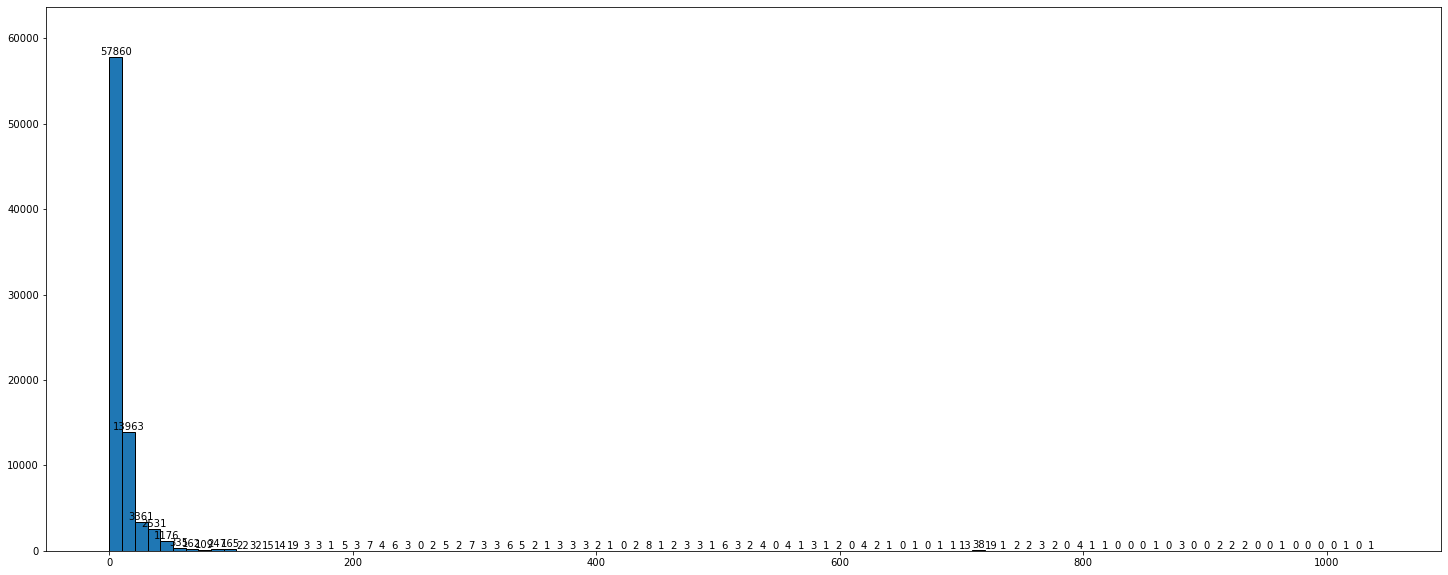

<Figure size 432x288 with 0 Axes>

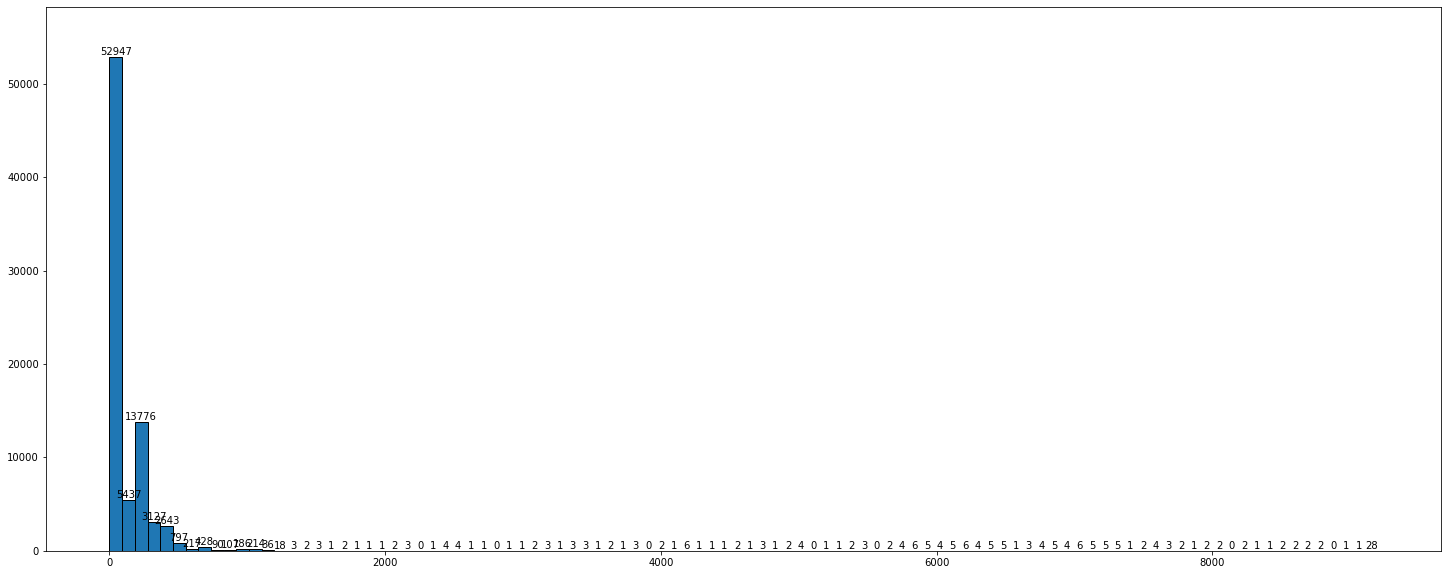

<Figure size 432x288 with 0 Axes>

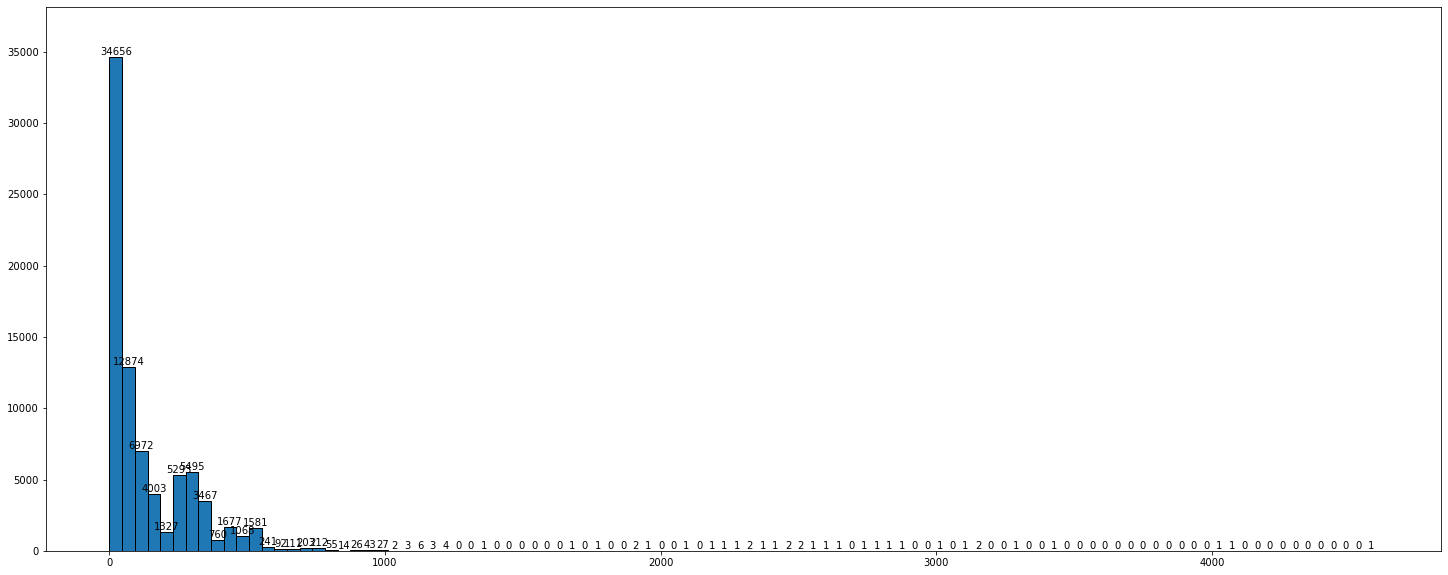

<Figure size 432x288 with 0 Axes>

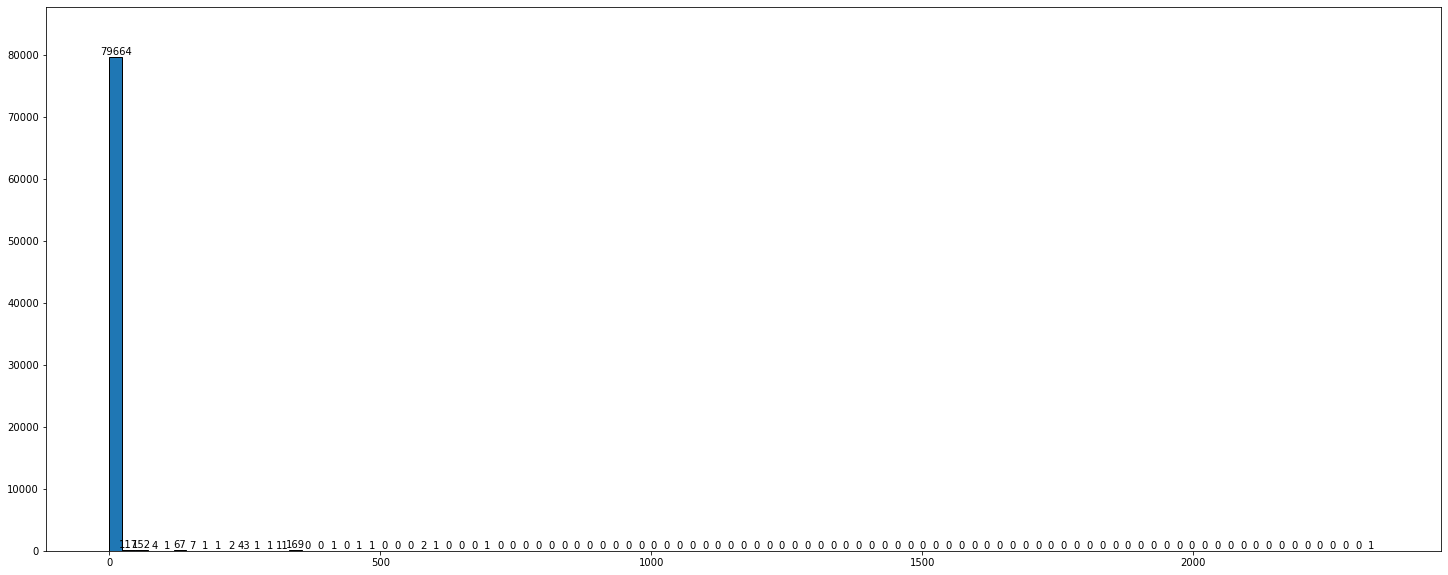

<Figure size 432x288 with 0 Axes>

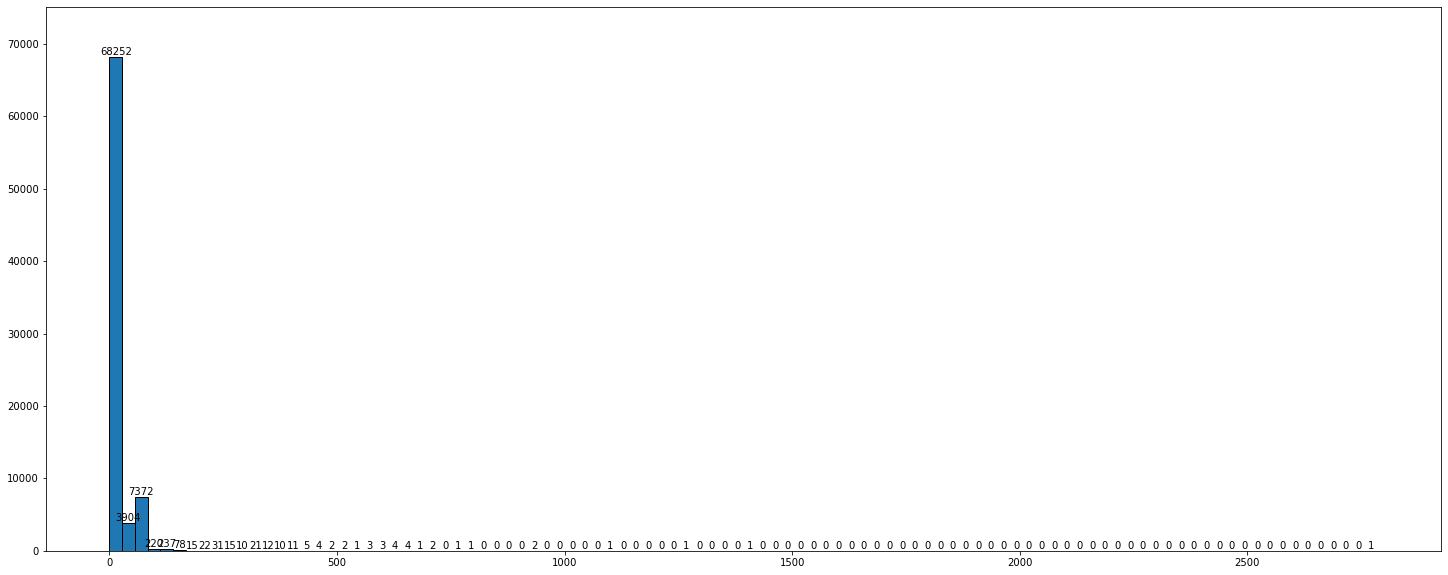

<Figure size 432x288 with 0 Axes>

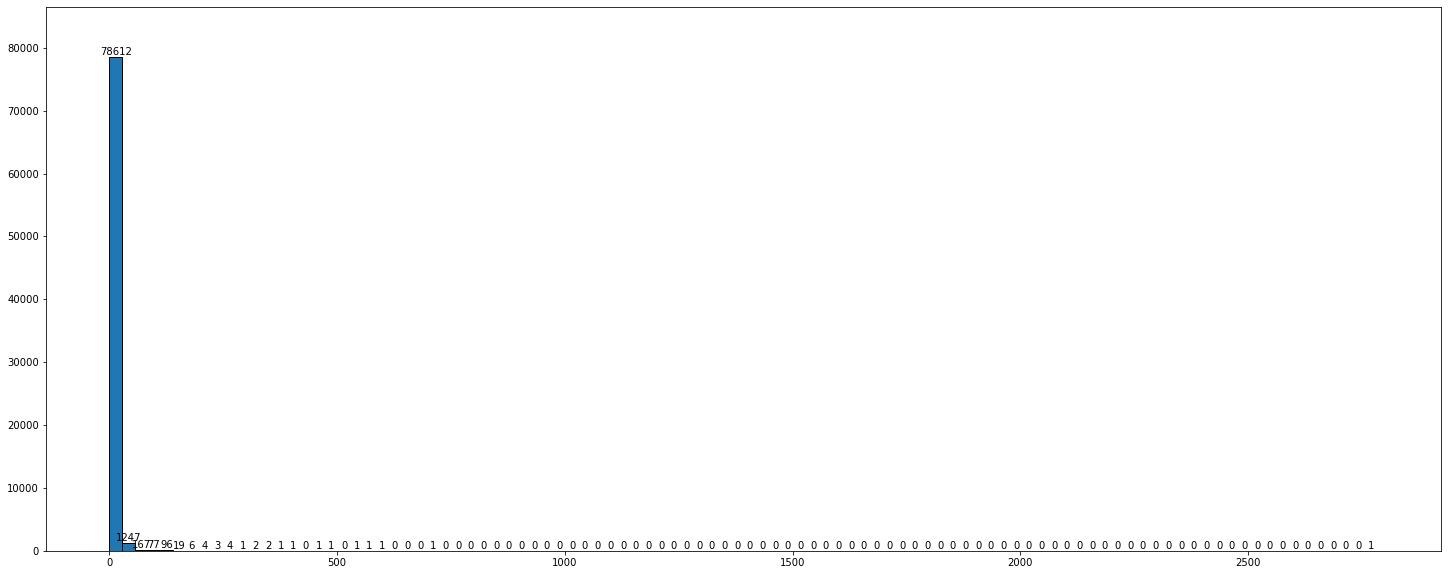

<Figure size 432x288 with 0 Axes>

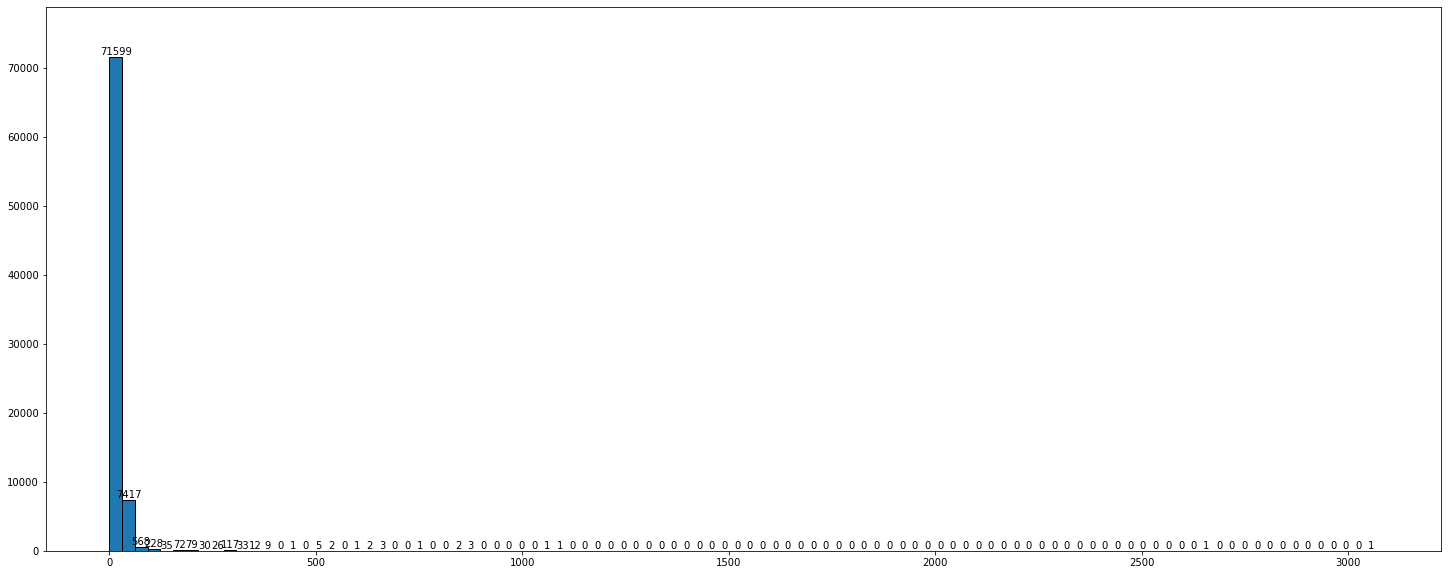

<Figure size 432x288 with 0 Axes>

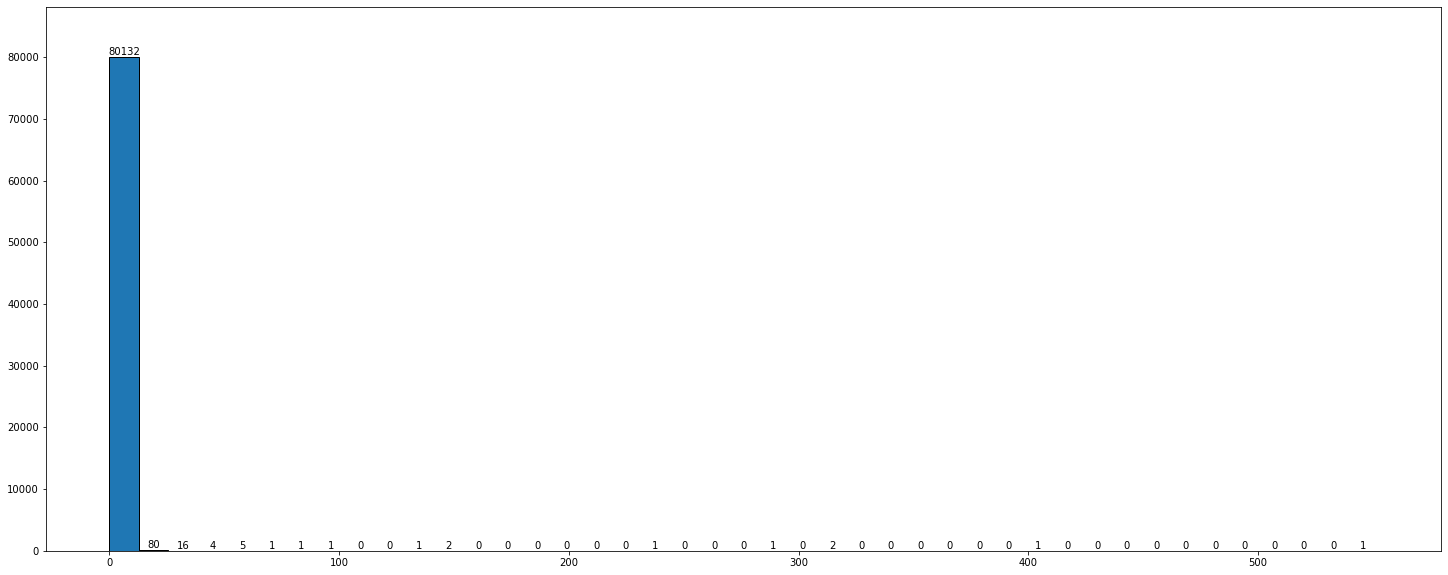

<Figure size 432x288 with 0 Axes>

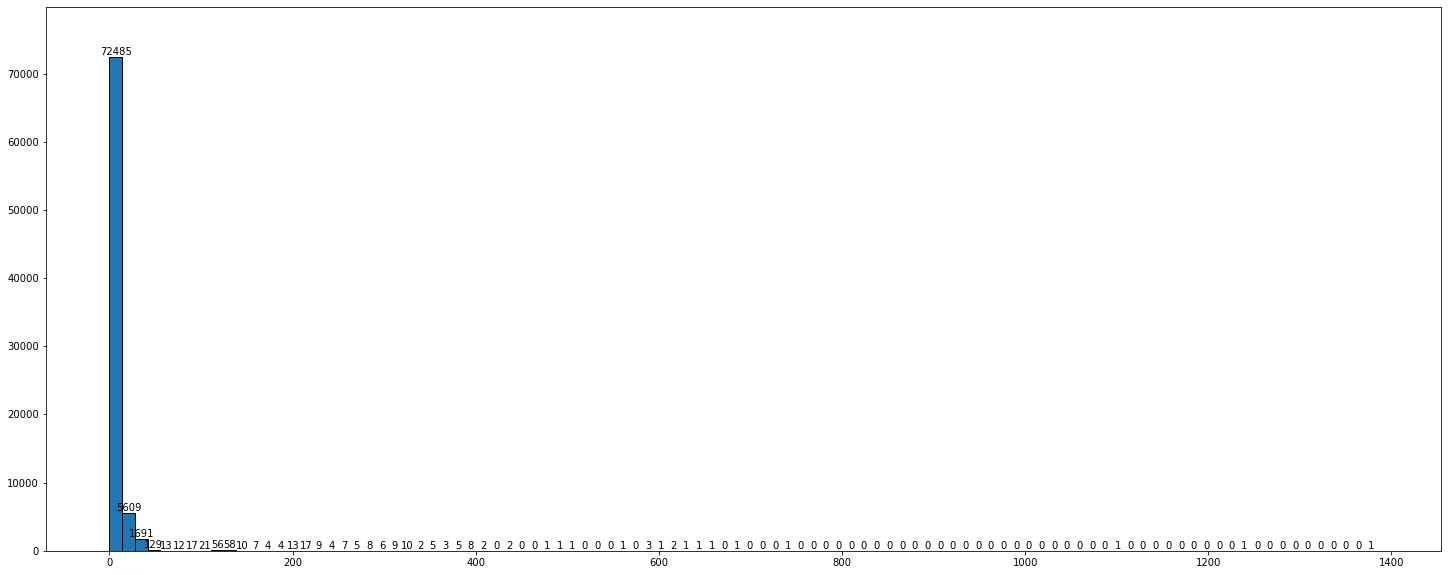

<Figure size 432x288 with 0 Axes>

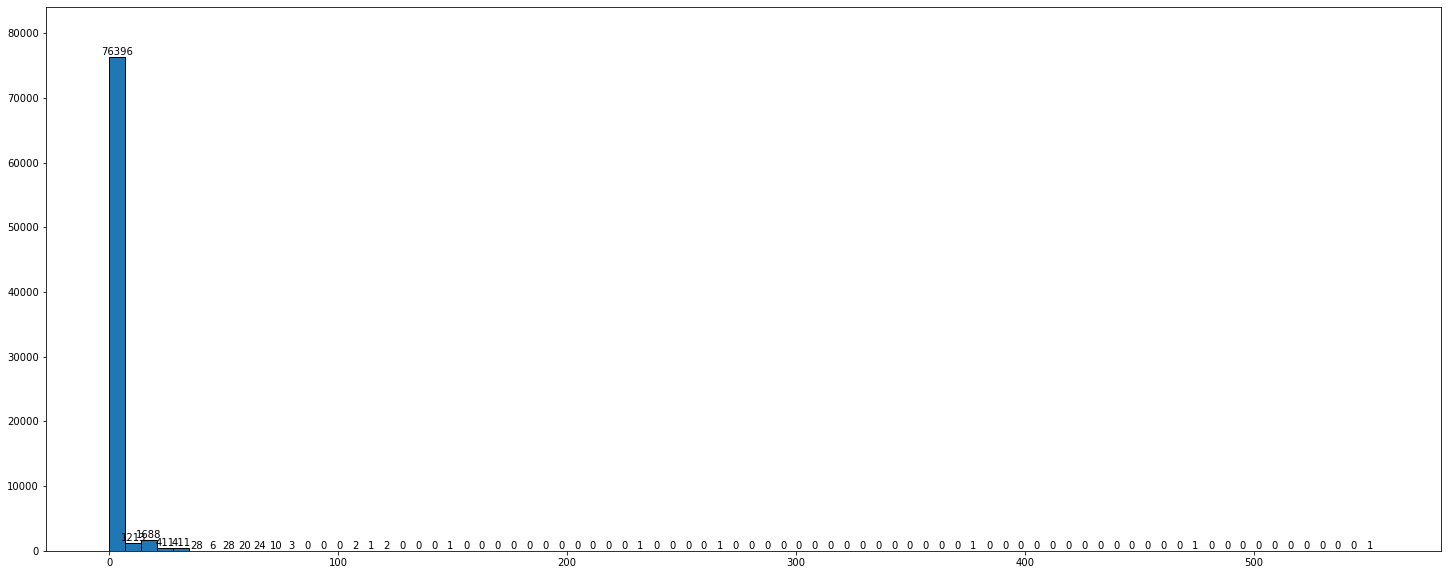

<Figure size 432x288 with 0 Axes>

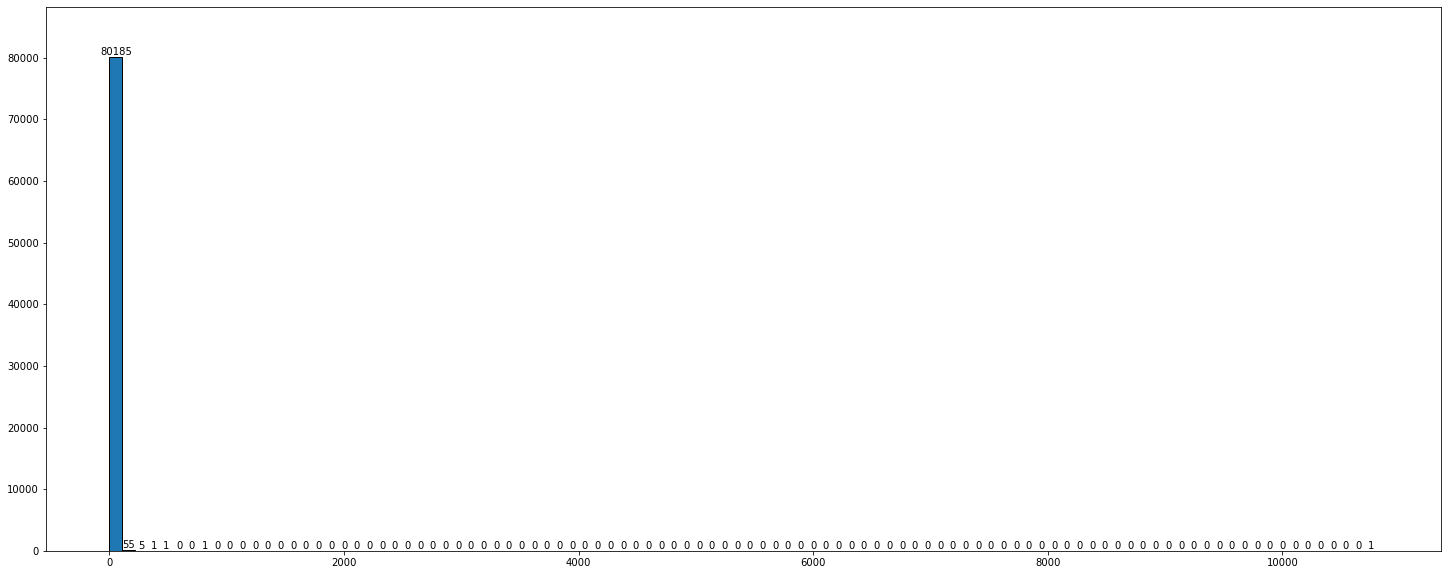

<Figure size 432x288 with 0 Axes>

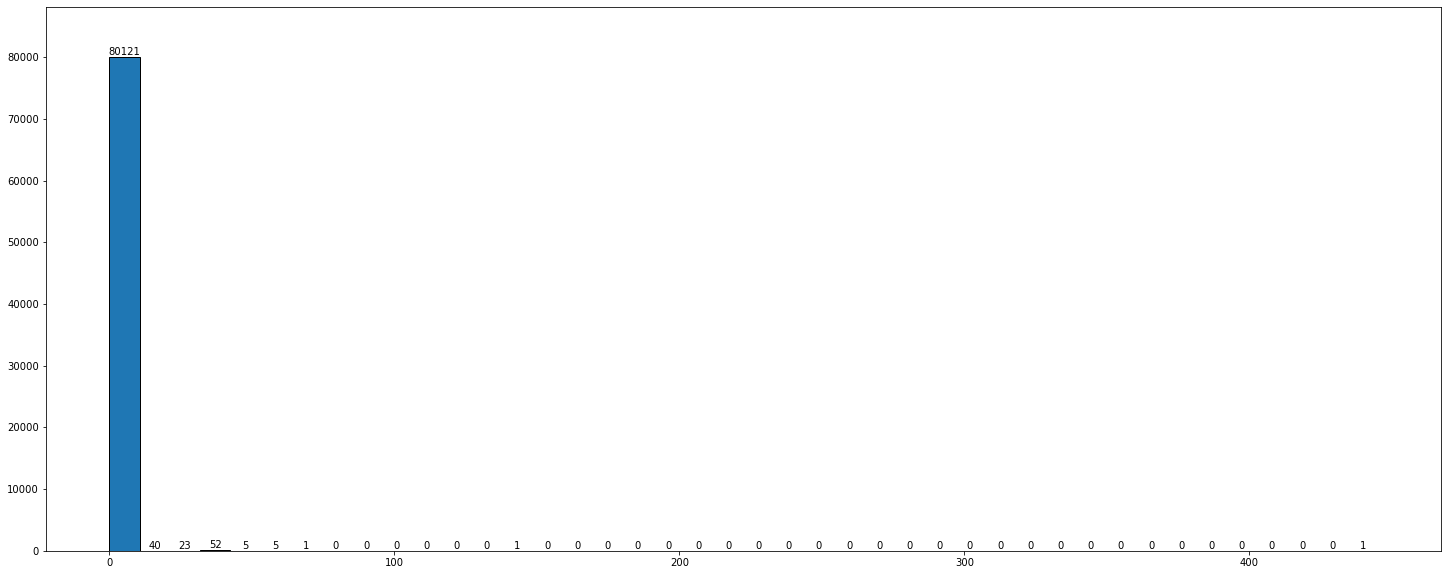

<Figure size 432x288 with 0 Axes>

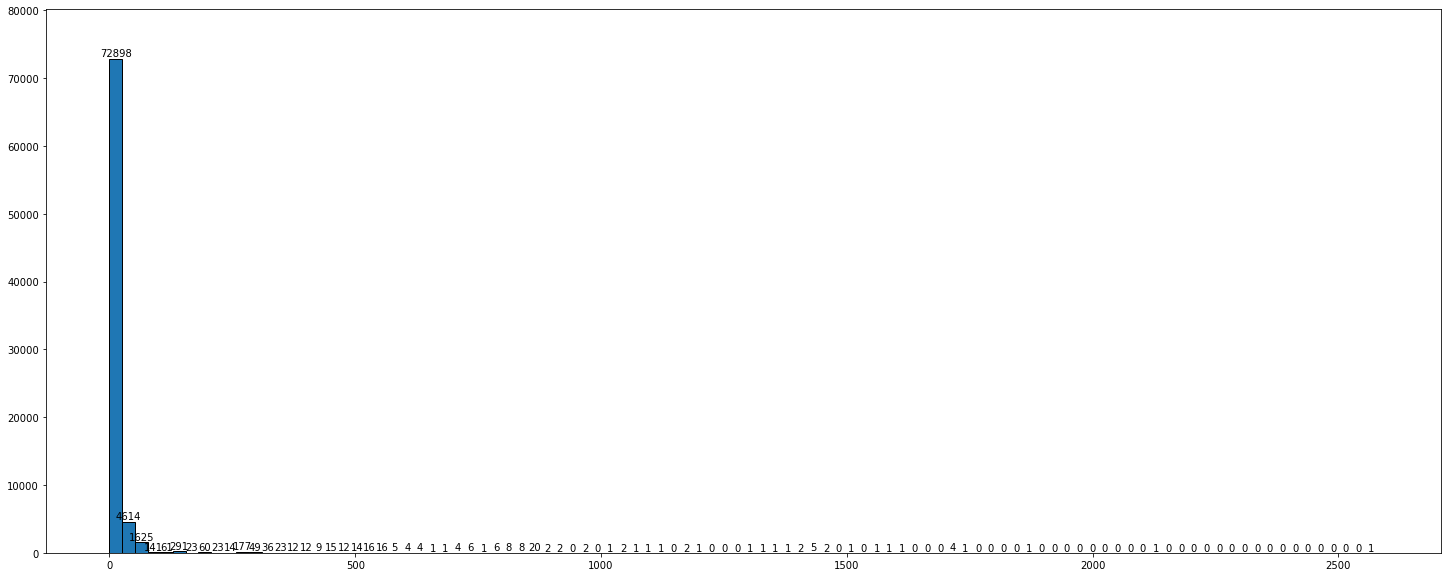

<Figure size 432x288 with 0 Axes>

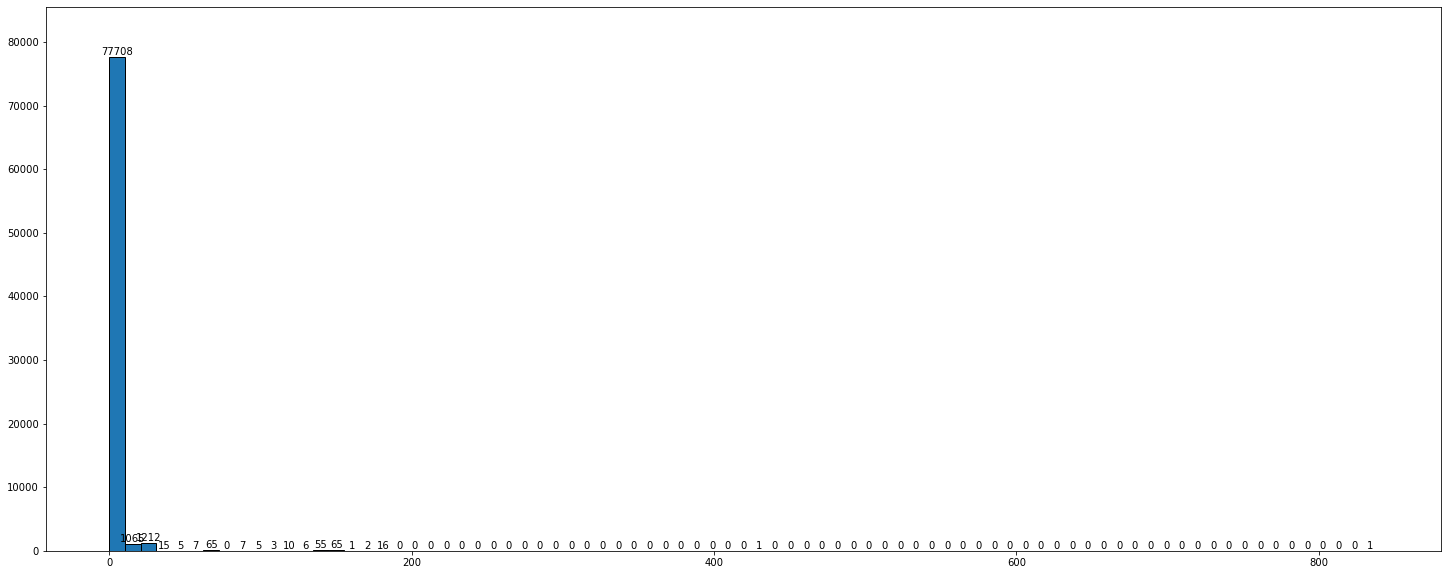

<Figure size 432x288 with 0 Axes>

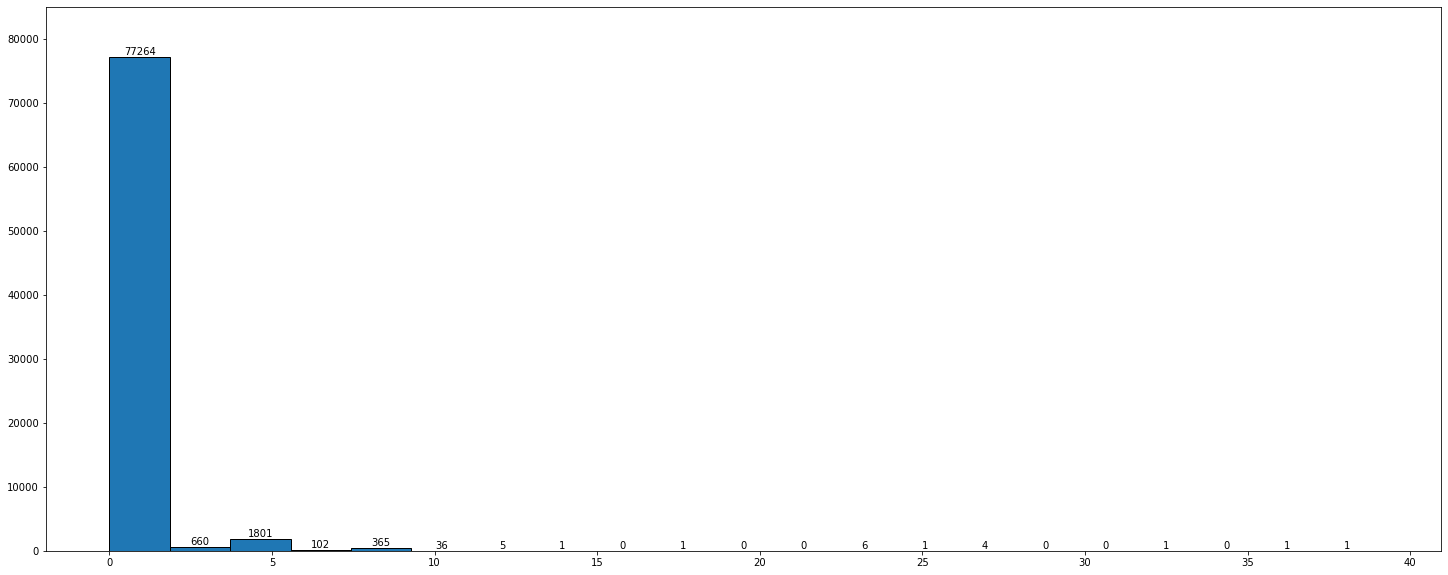

<Figure size 432x288 with 0 Axes>

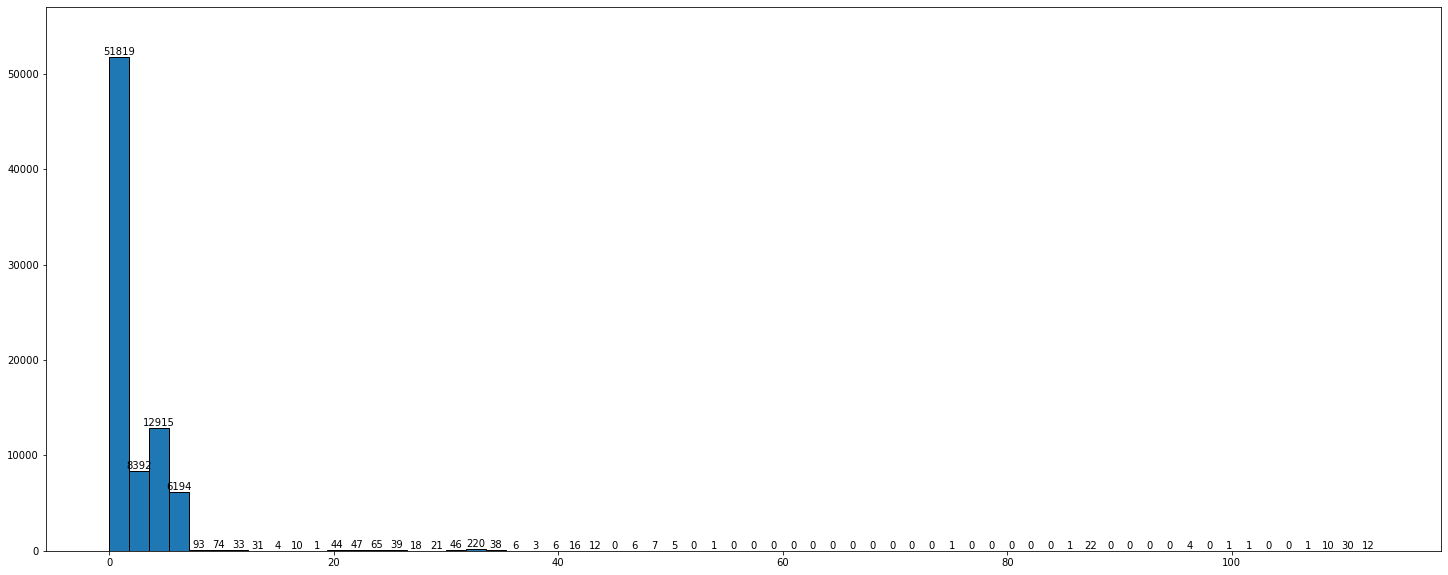

<Figure size 432x288 with 0 Axes>

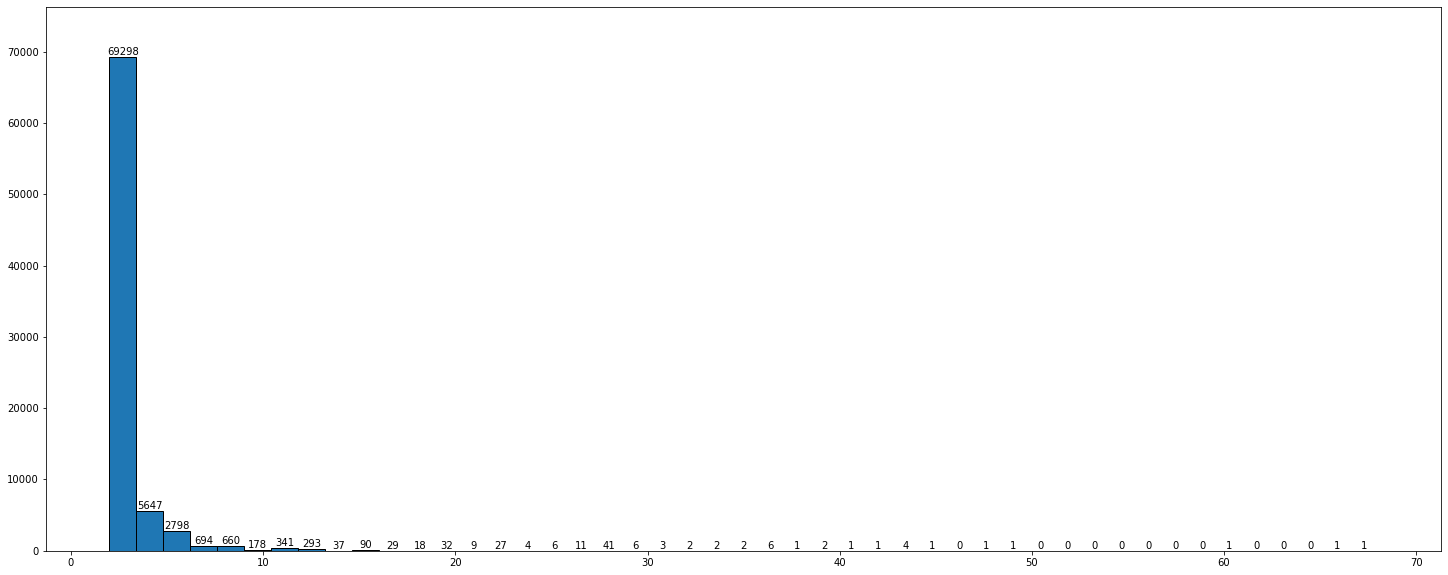

<Figure size 432x288 with 0 Axes>

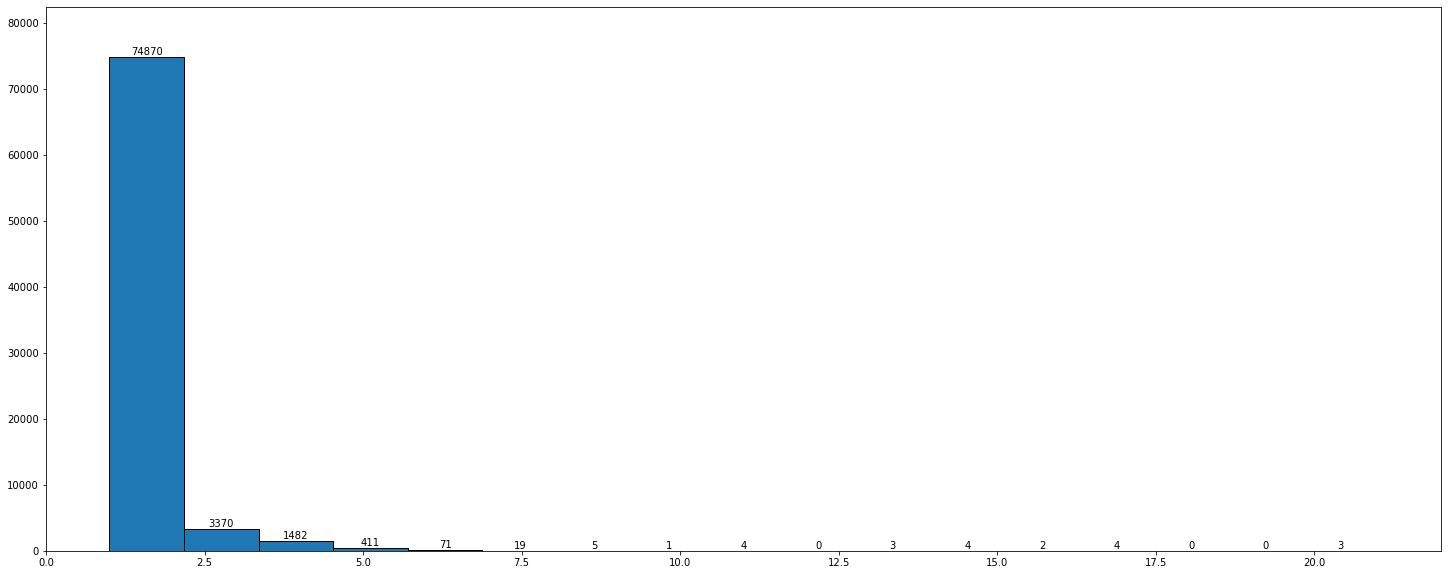

<Figure size 432x288 with 0 Axes>

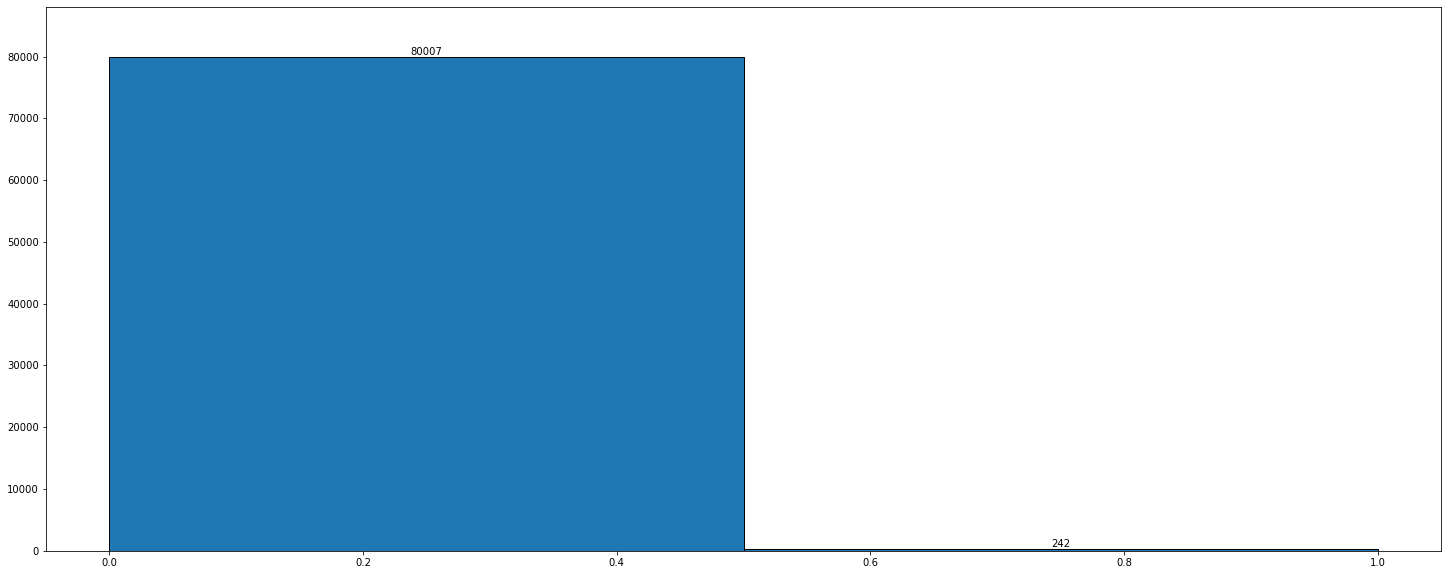

<Figure size 432x288 with 0 Axes>

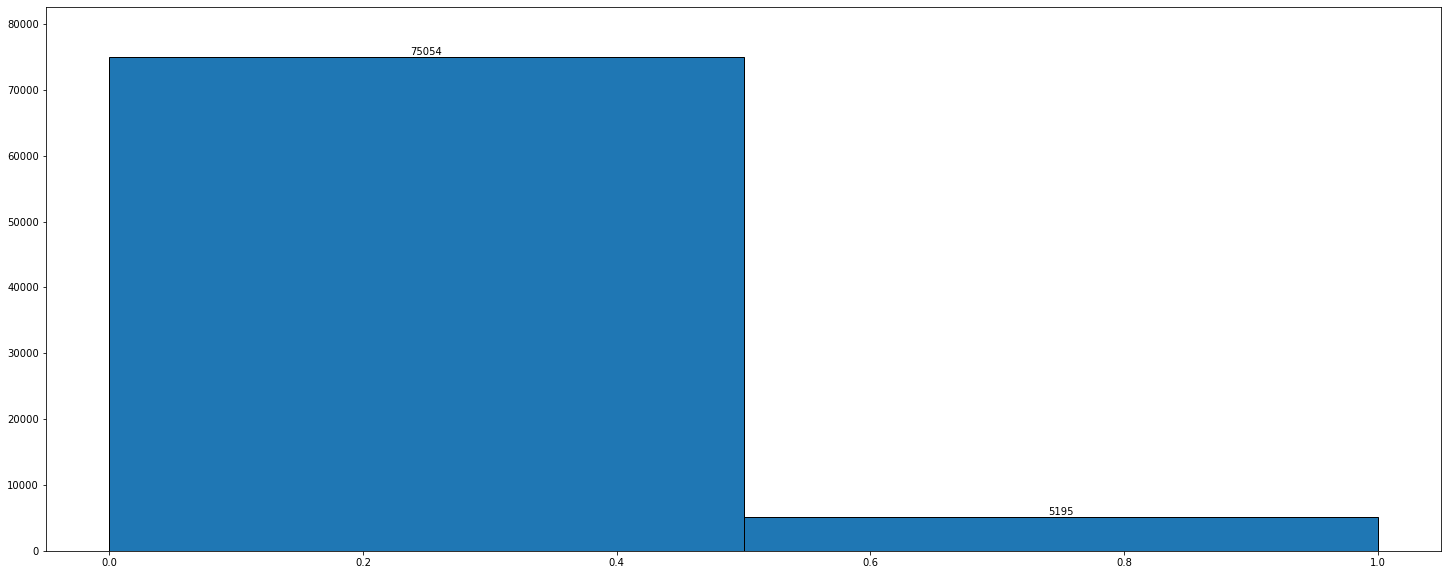

<Figure size 432x288 with 0 Axes>

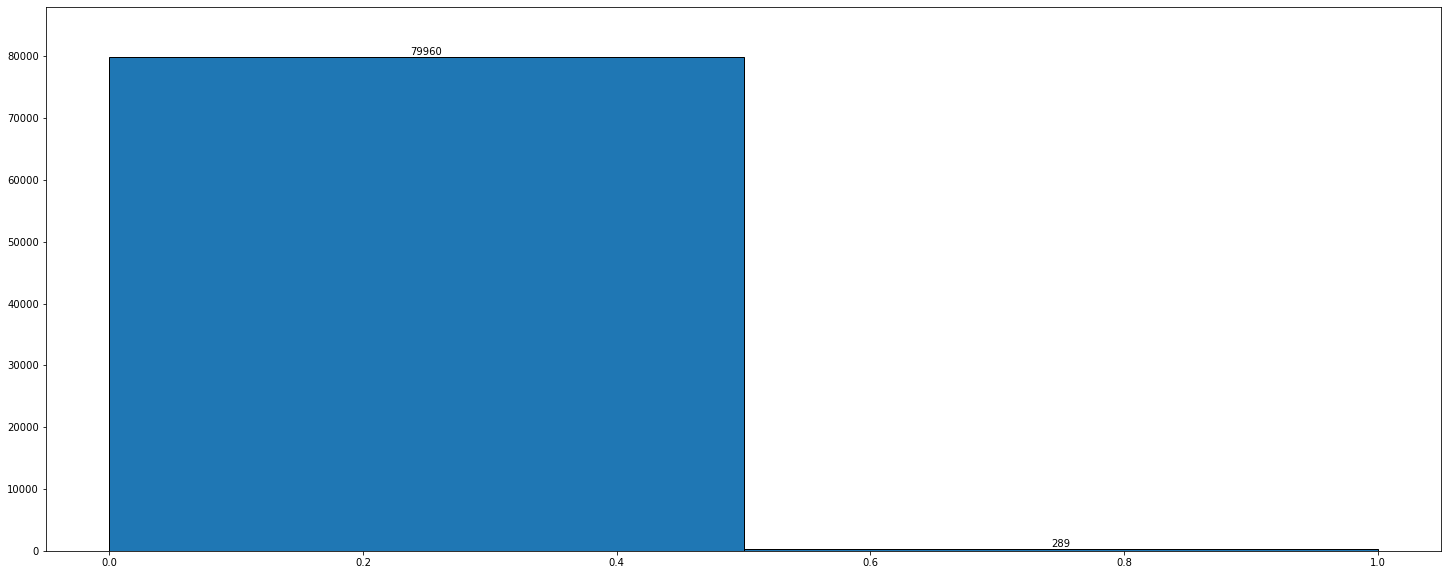

<Figure size 432x288 with 0 Axes>

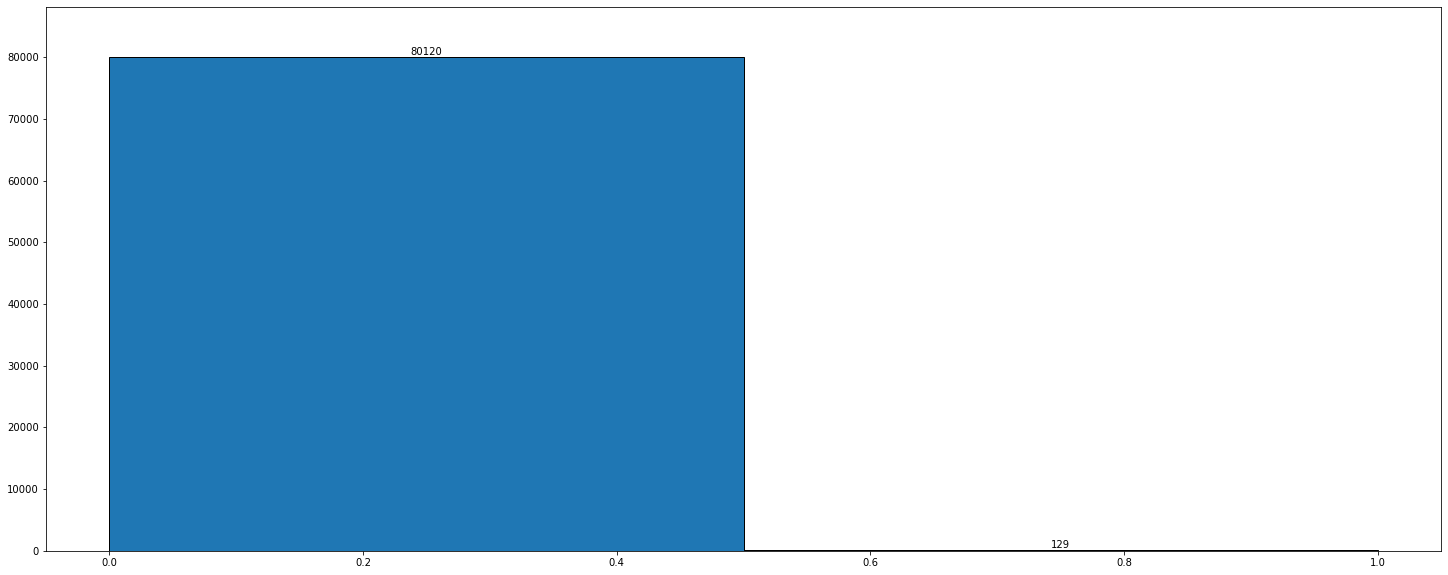

<Figure size 432x288 with 0 Axes>

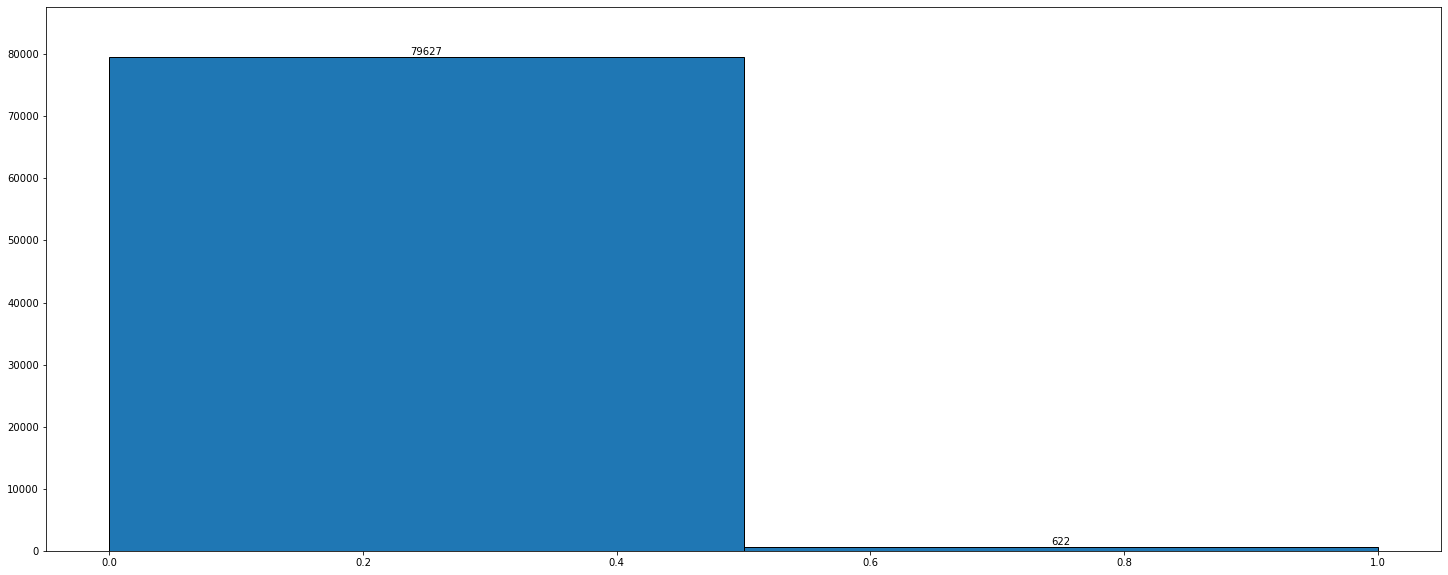

<Figure size 432x288 with 0 Axes>

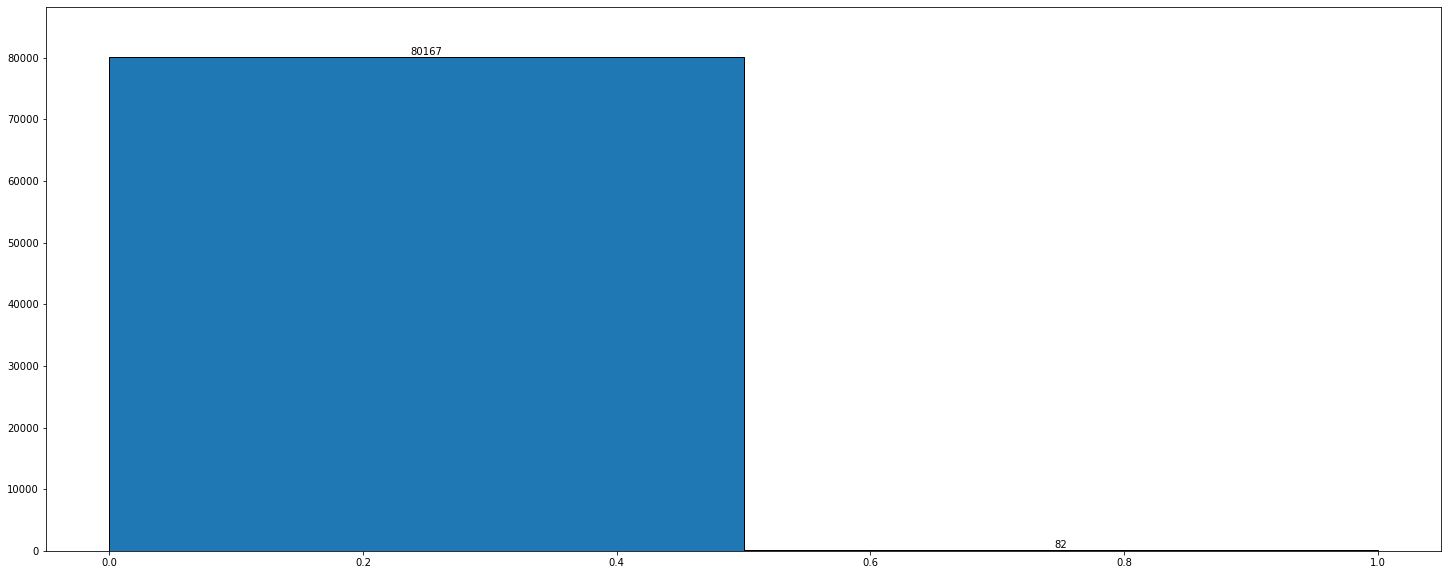

<Figure size 432x288 with 0 Axes>

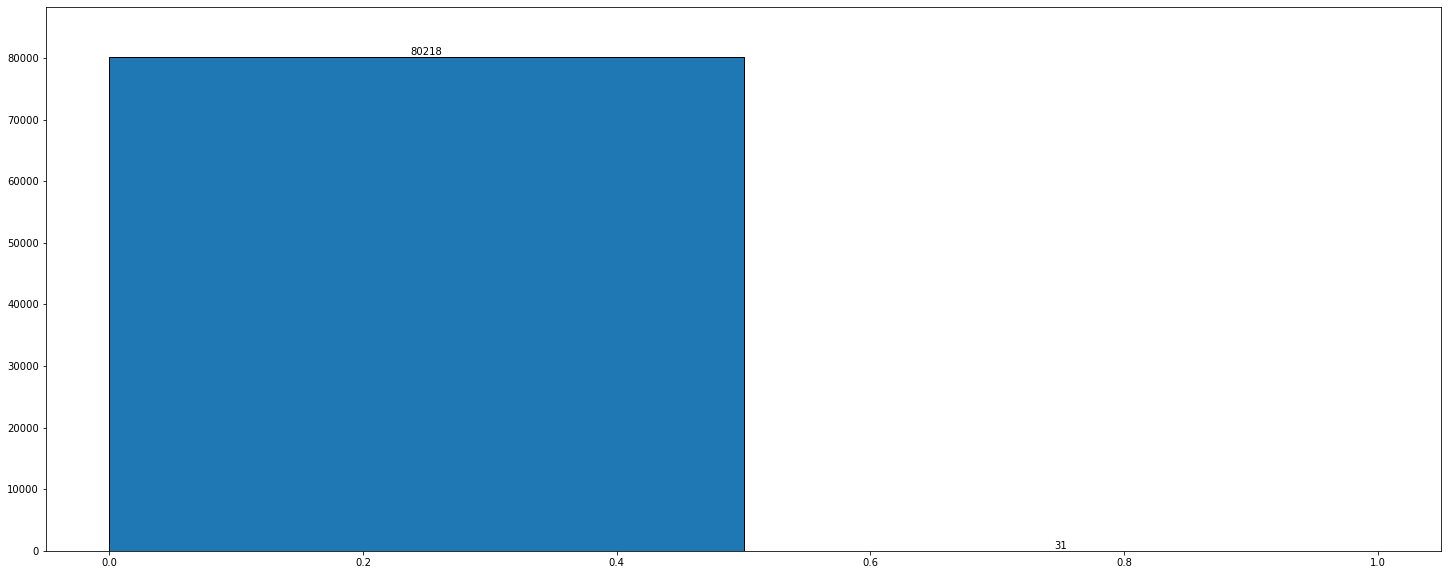

<Figure size 432x288 with 0 Axes>

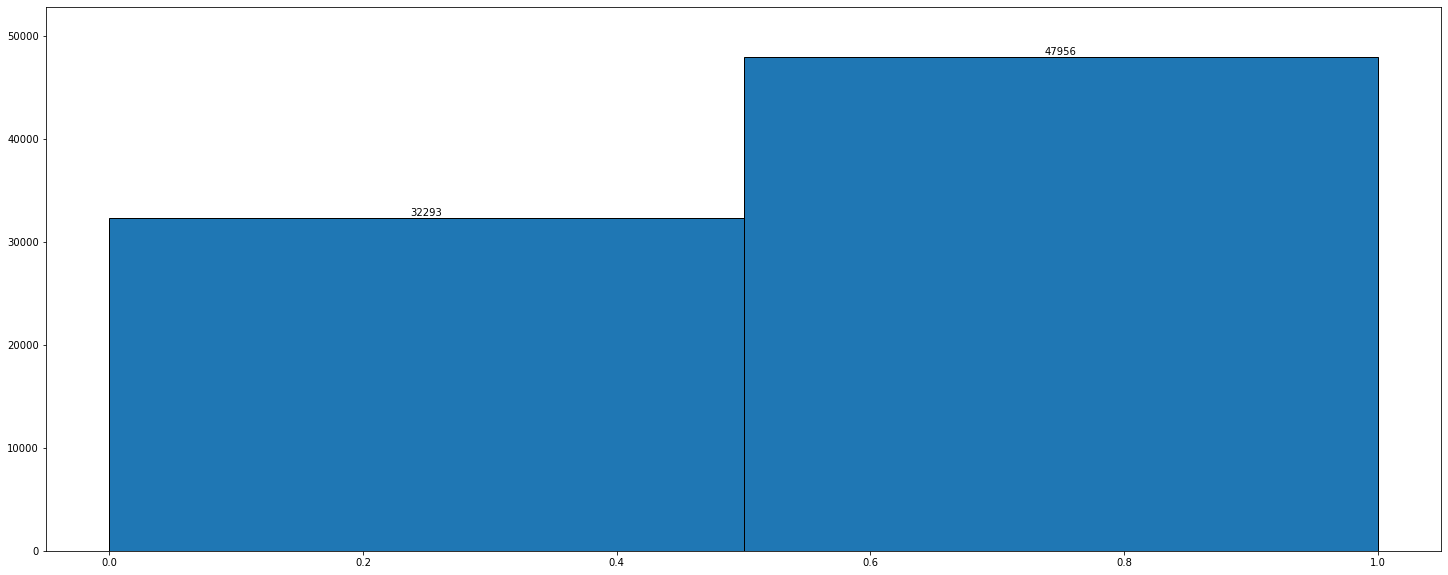

<Figure size 432x288 with 0 Axes>

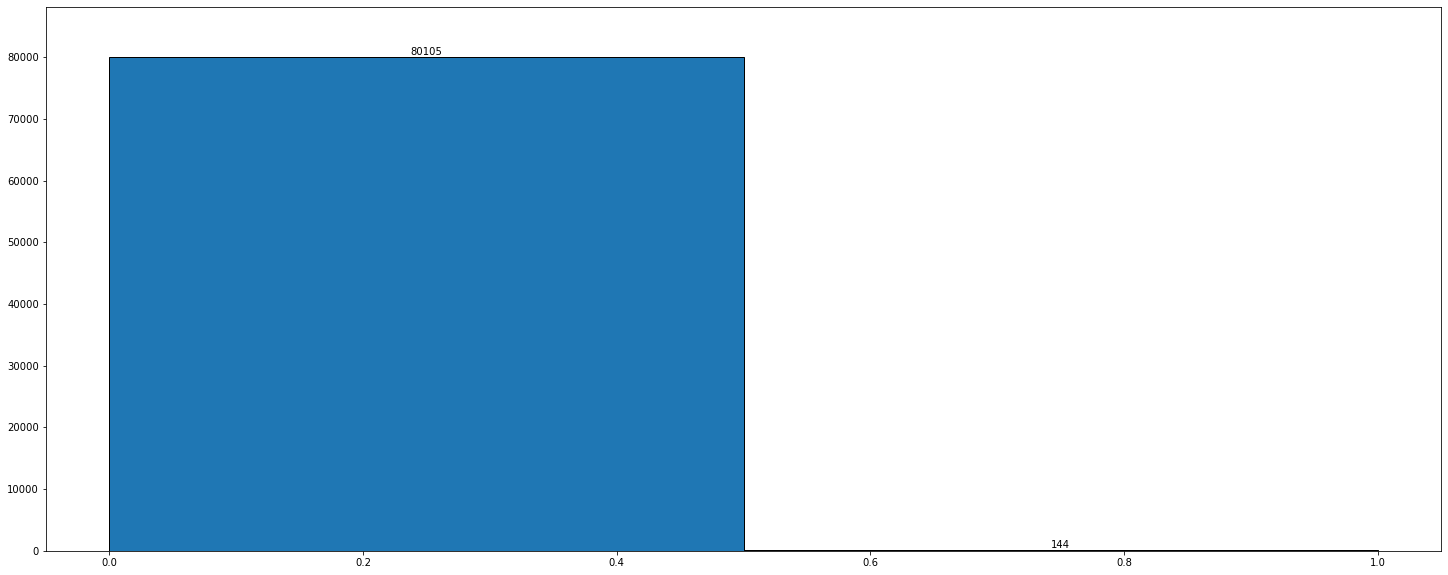

<Figure size 432x288 with 0 Axes>

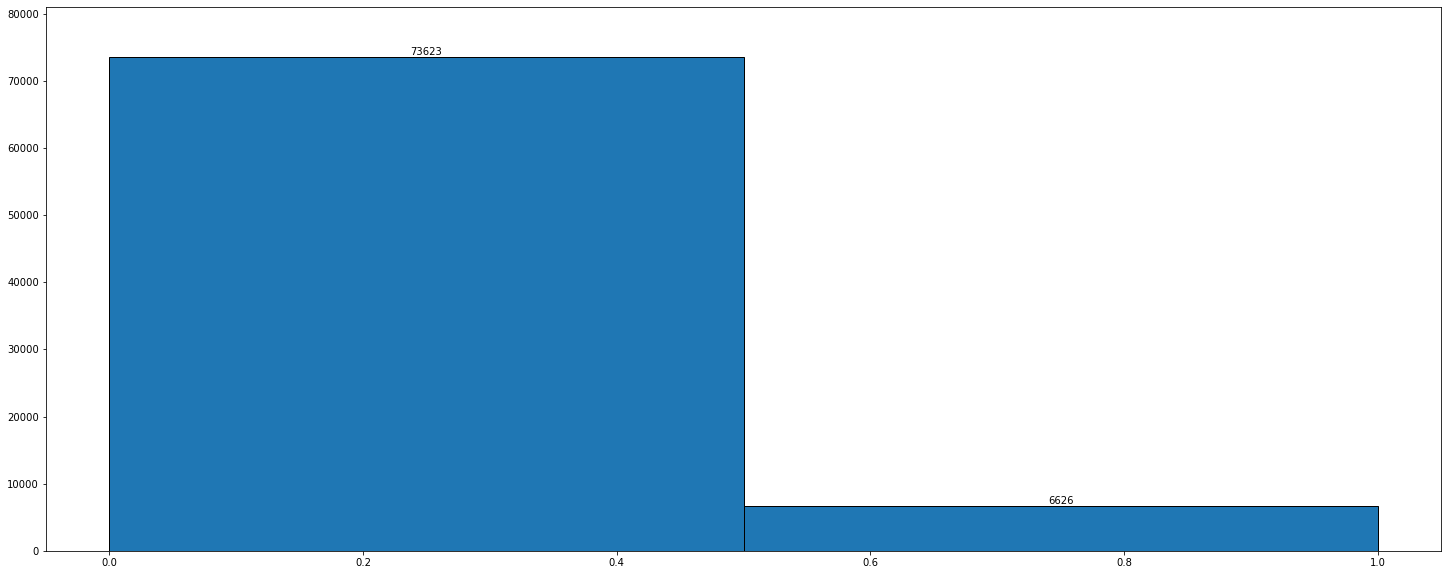

<Figure size 432x288 with 0 Axes>

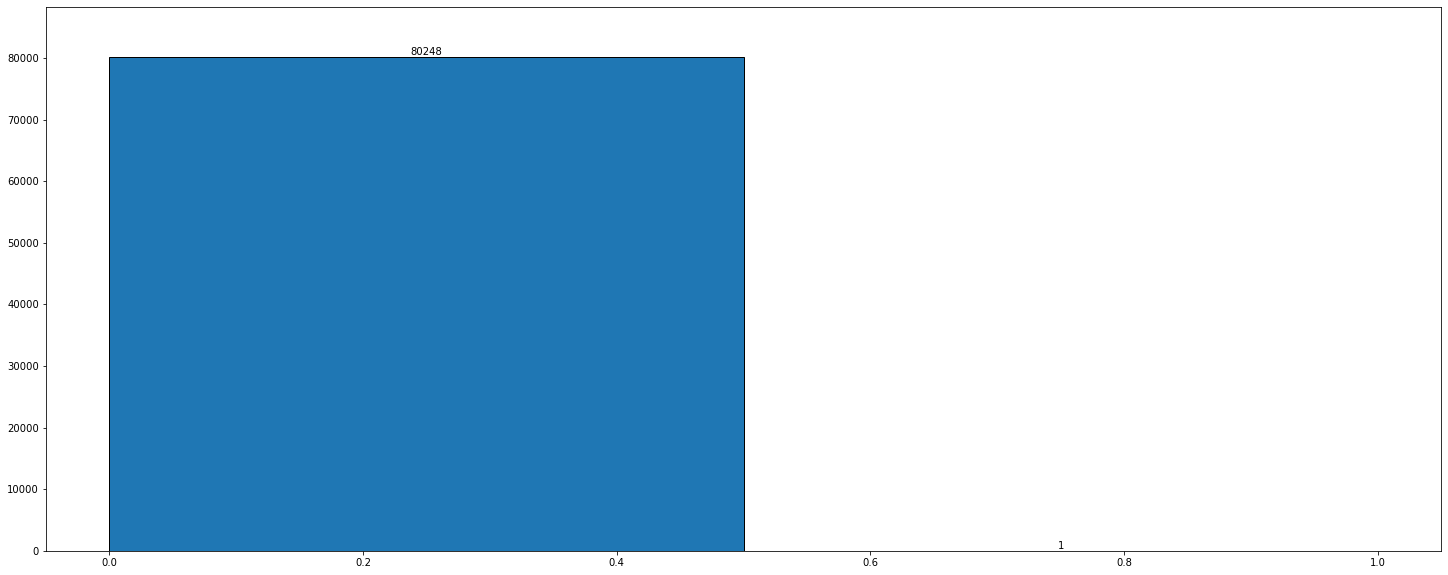

<Figure size 432x288 with 0 Axes>

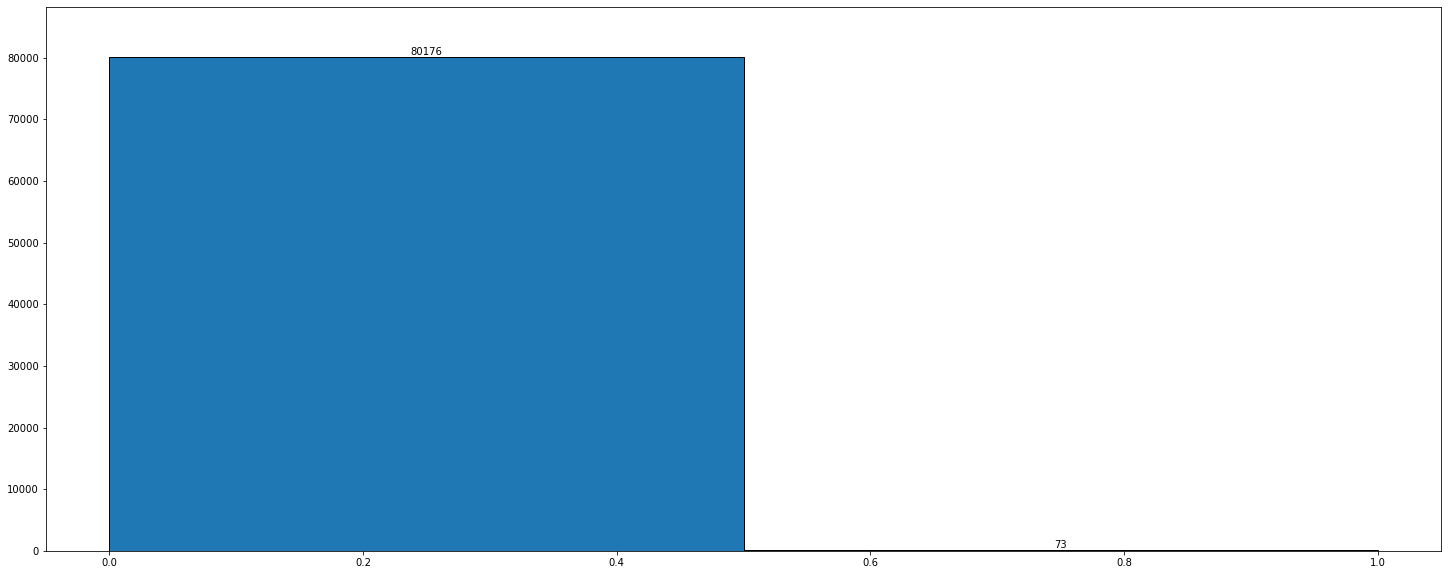

<Figure size 432x288 with 0 Axes>

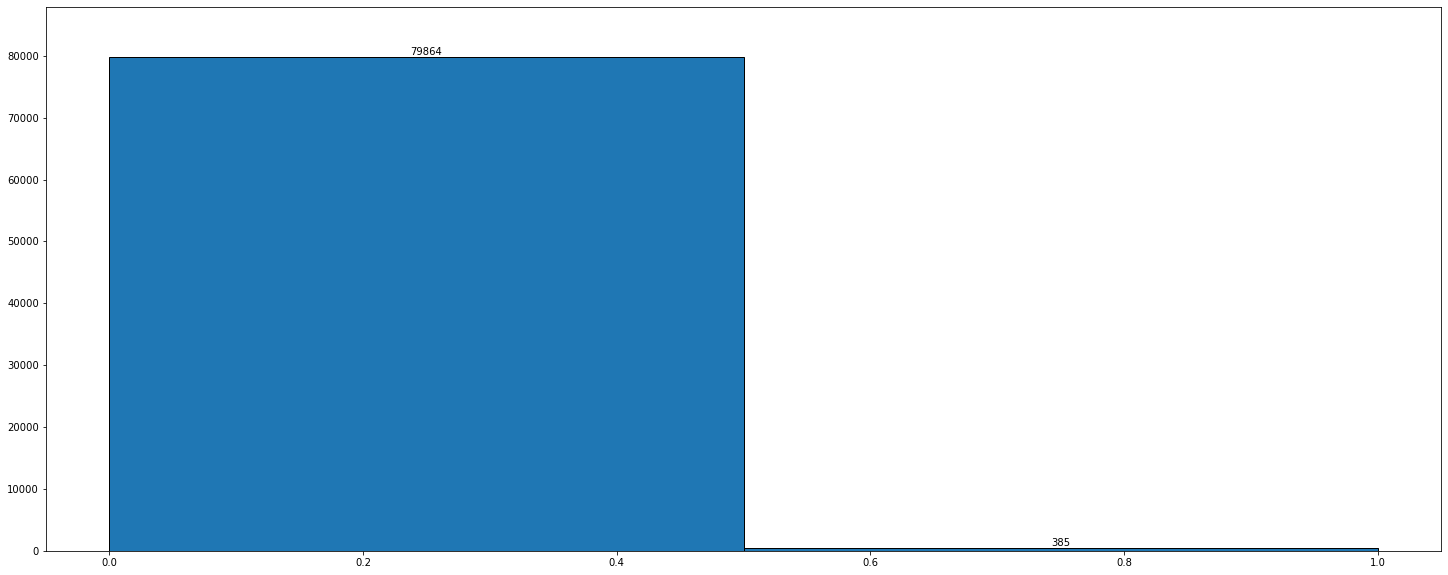

<Figure size 432x288 with 0 Axes>

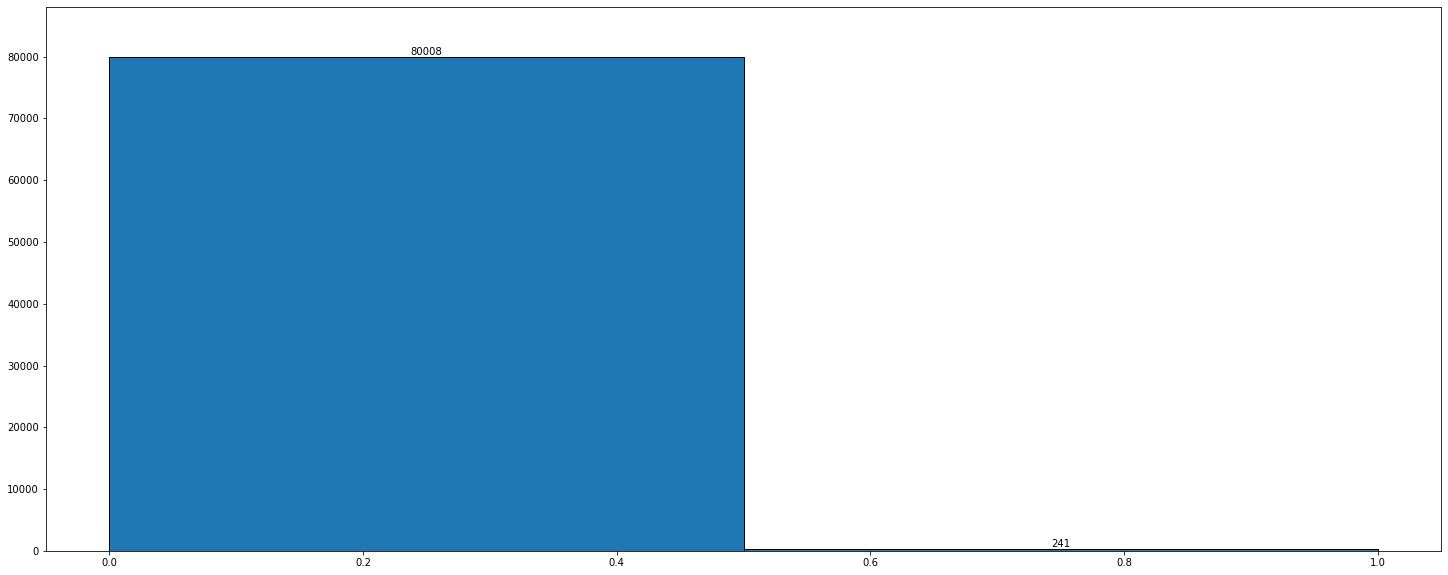

<Figure size 432x288 with 0 Axes>

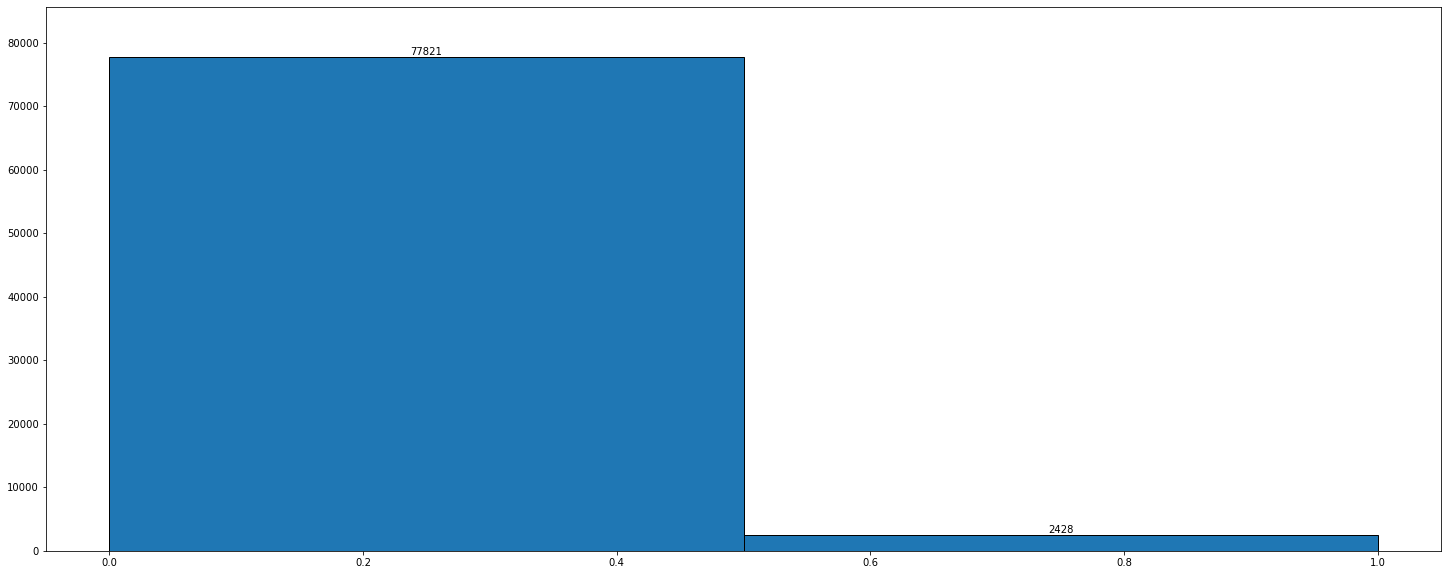

<Figure size 432x288 with 0 Axes>

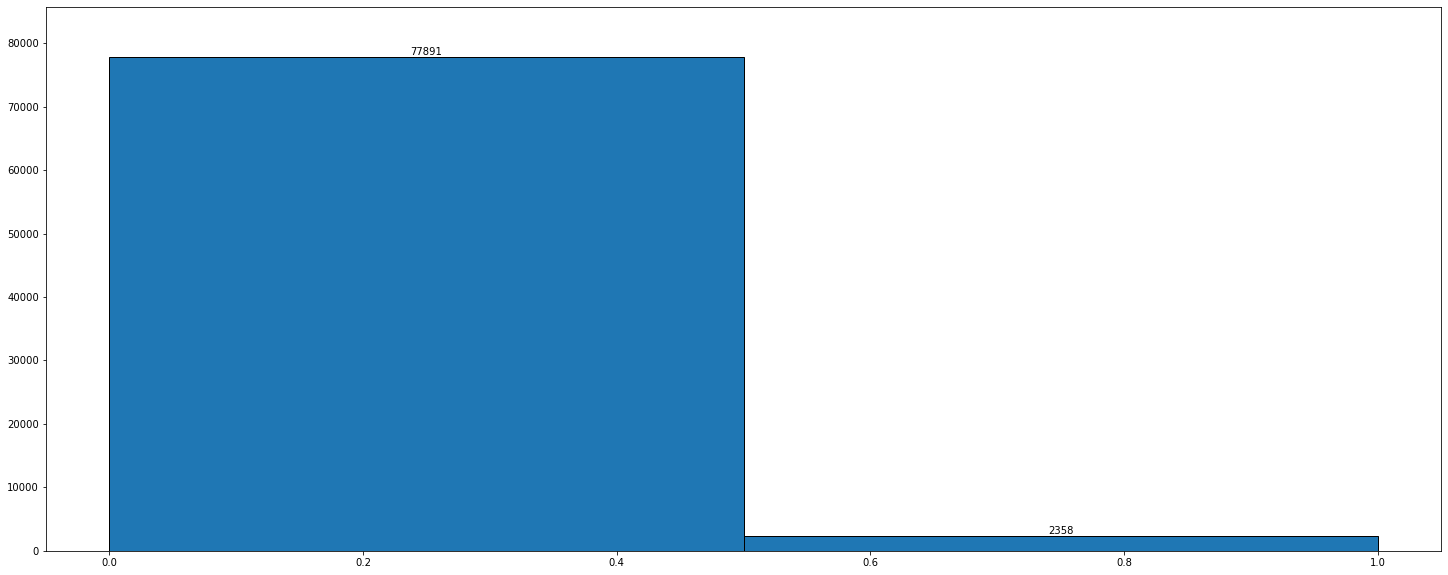

<Figure size 432x288 with 0 Axes>

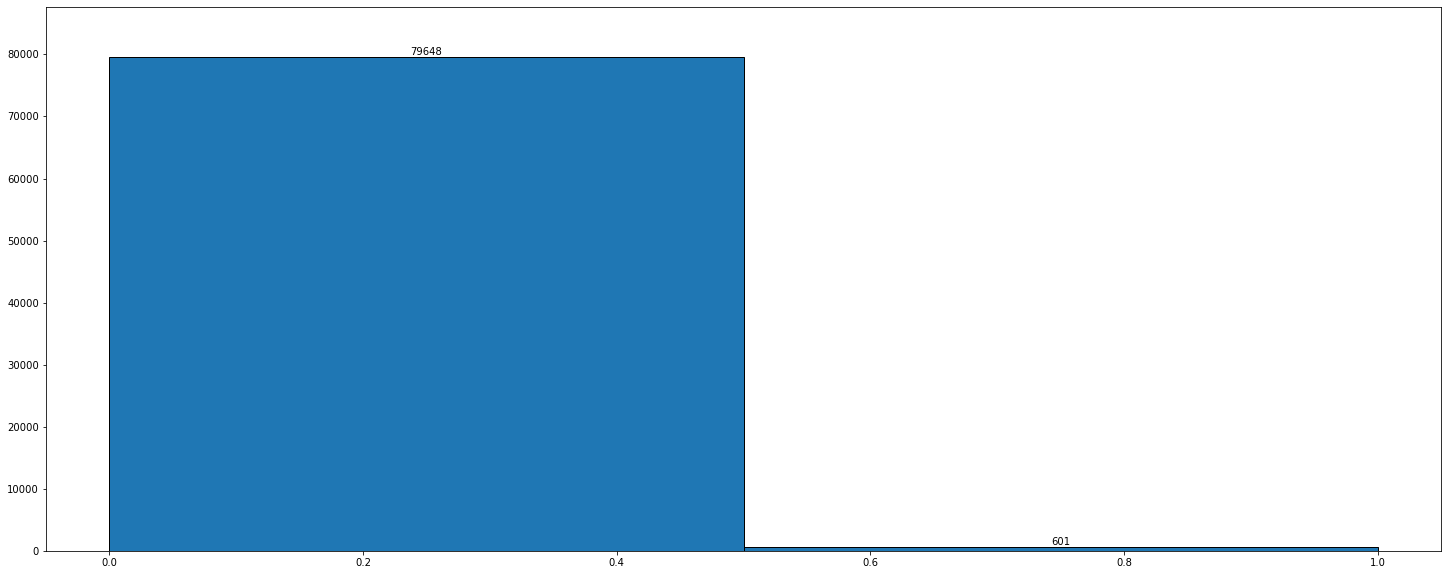

<Figure size 432x288 with 0 Axes>

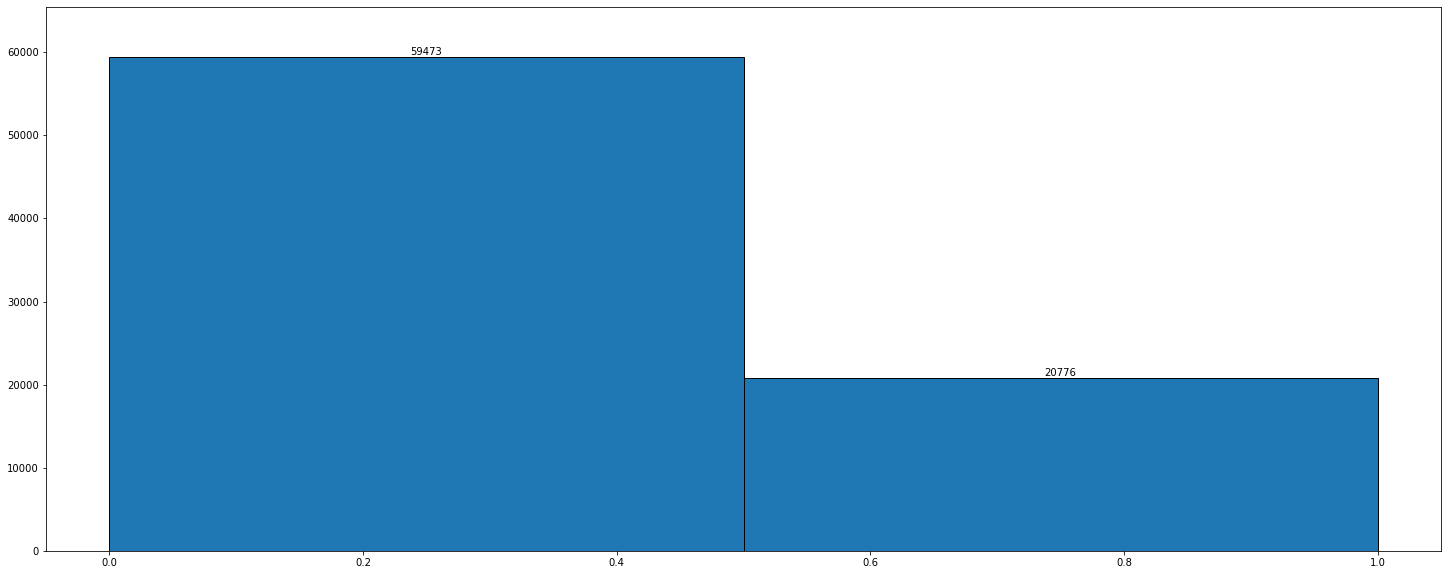

<Figure size 432x288 with 0 Axes>

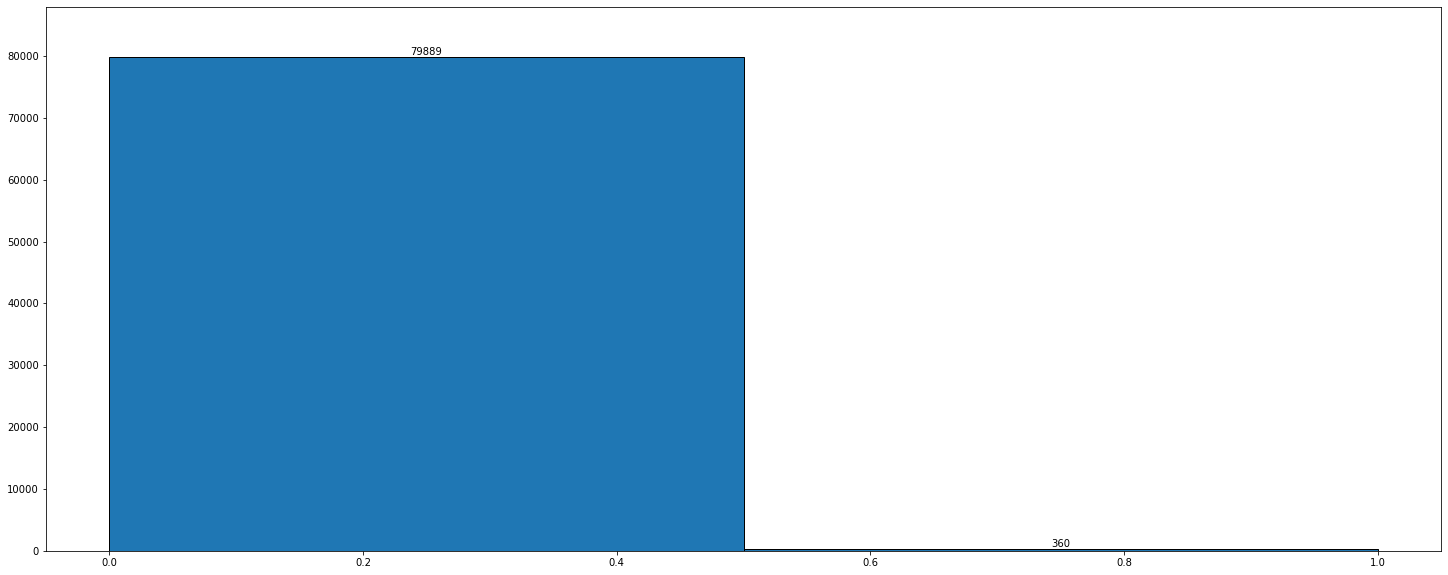

<Figure size 432x288 with 0 Axes>

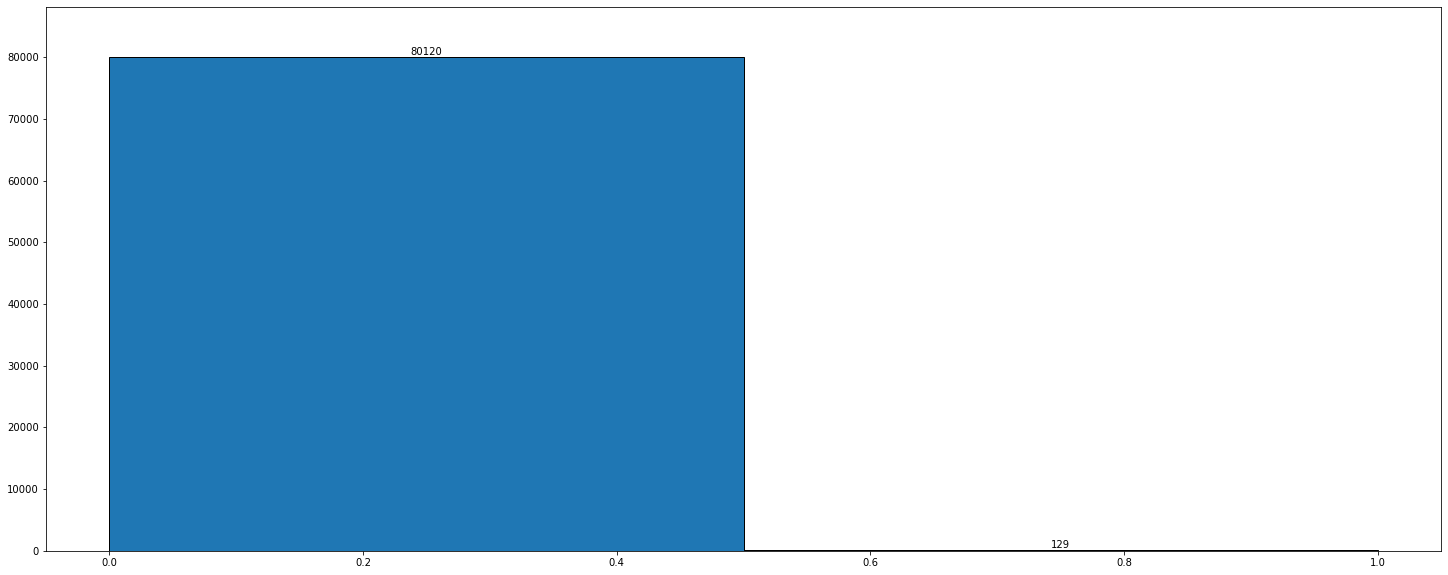

<Figure size 432x288 with 0 Axes>

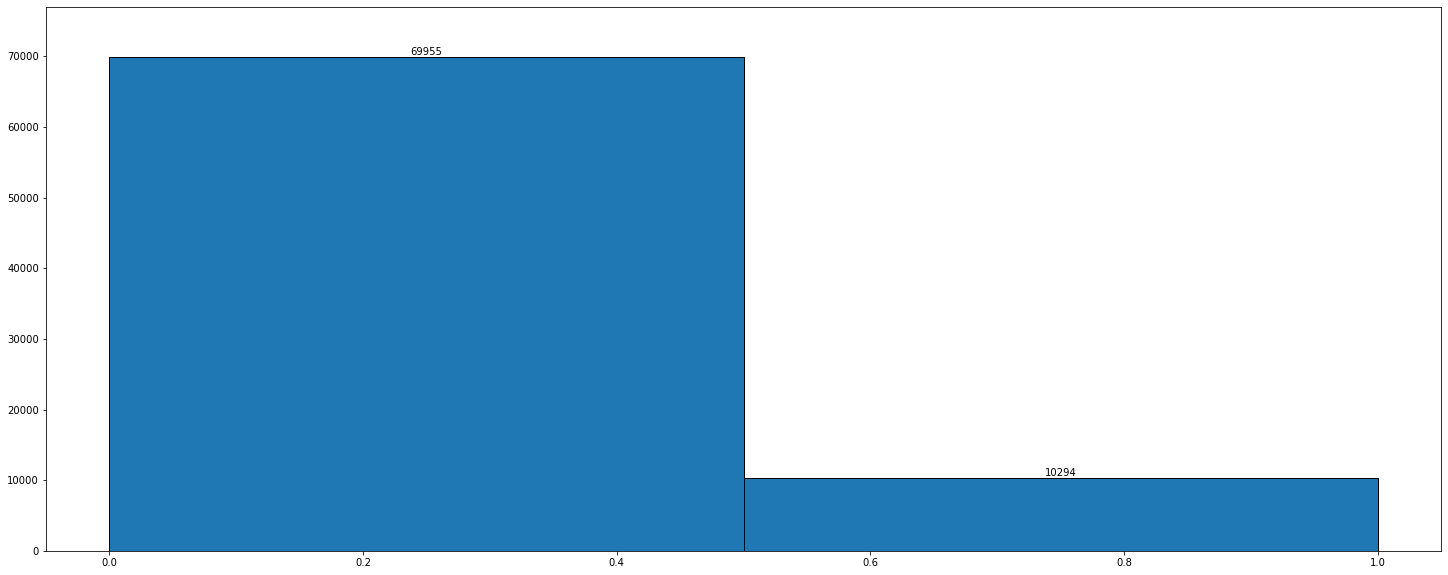

<Figure size 432x288 with 0 Axes>

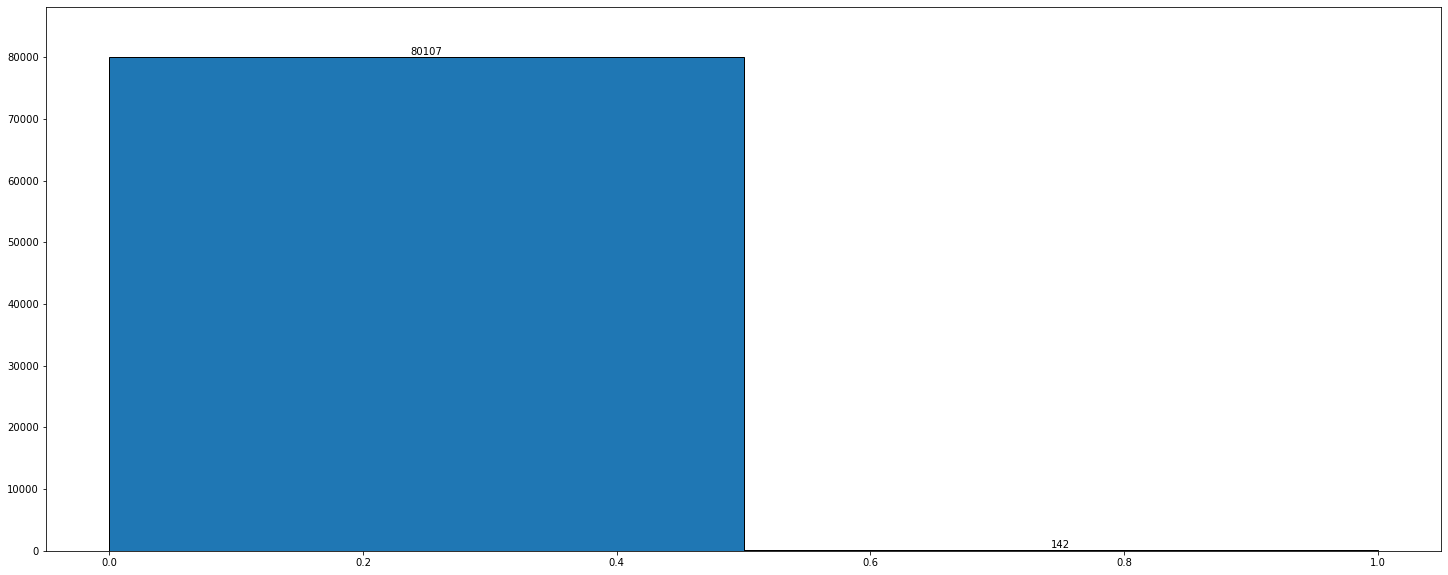

<Figure size 432x288 with 0 Axes>

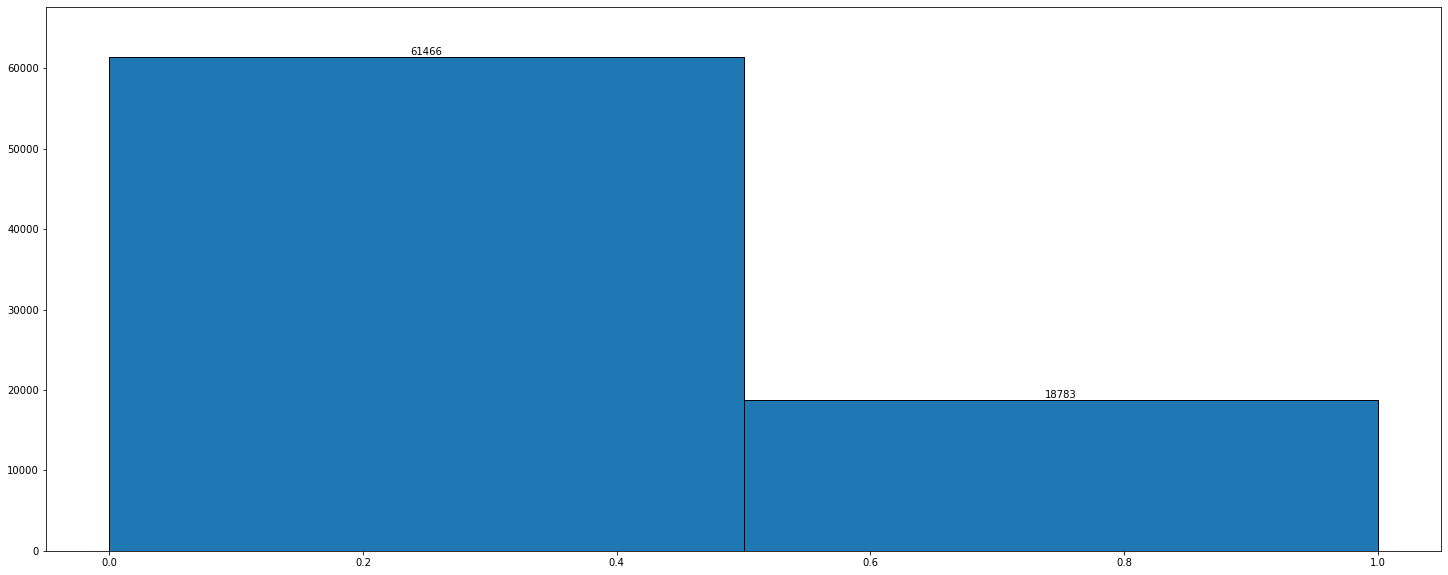

<Figure size 432x288 with 0 Axes>

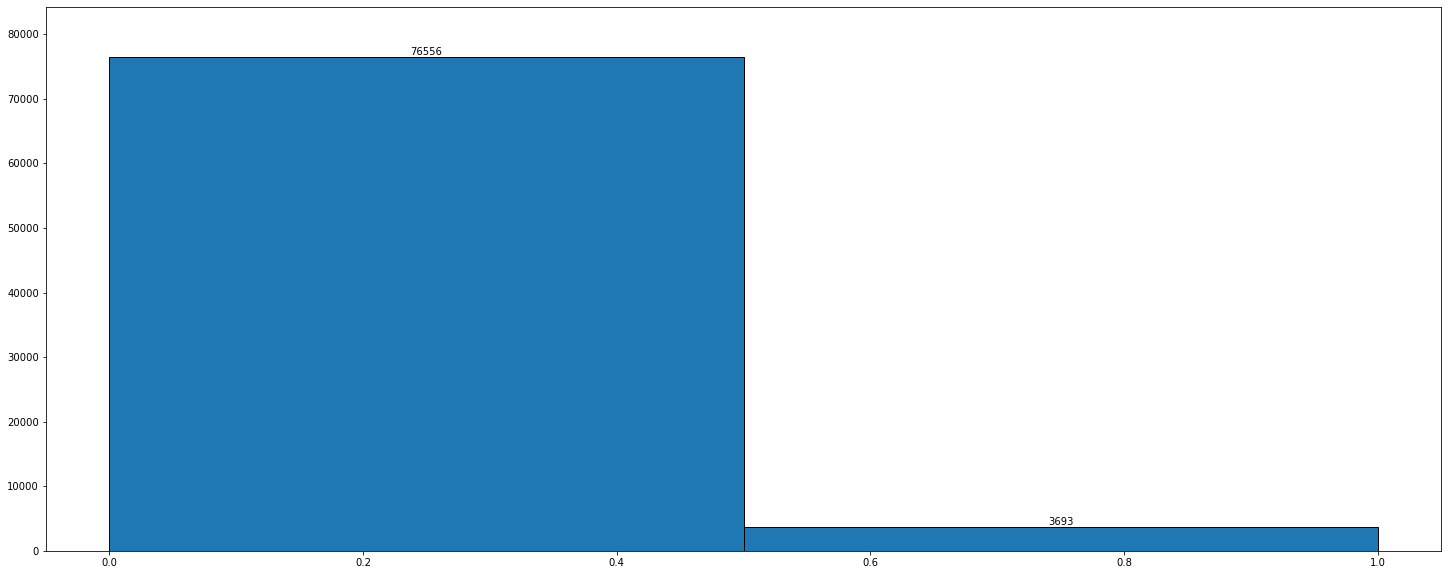

<Figure size 432x288 with 0 Axes>

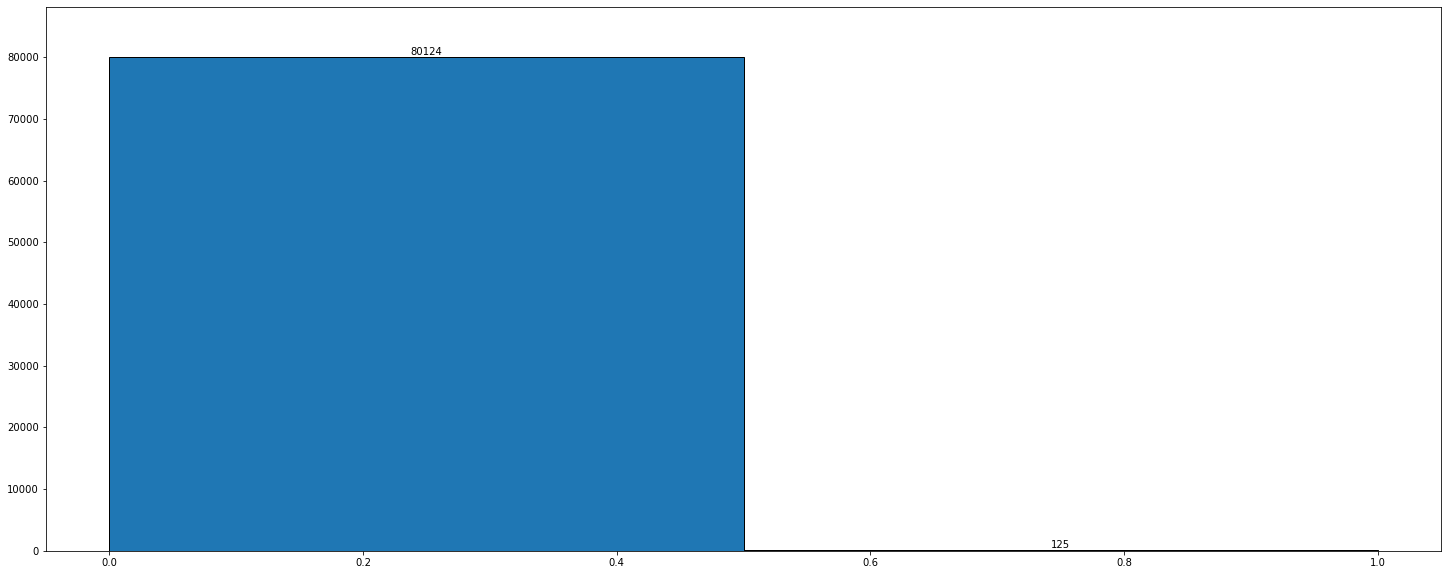

<Figure size 432x288 with 0 Axes>

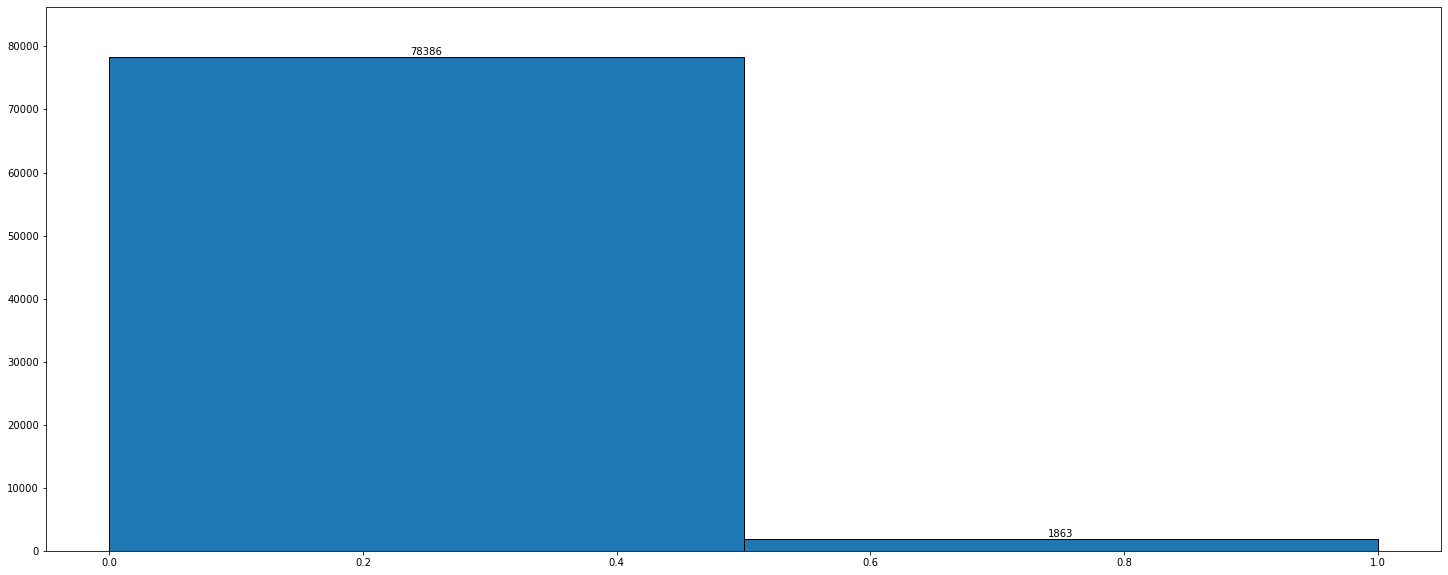

<Figure size 432x288 with 0 Axes>

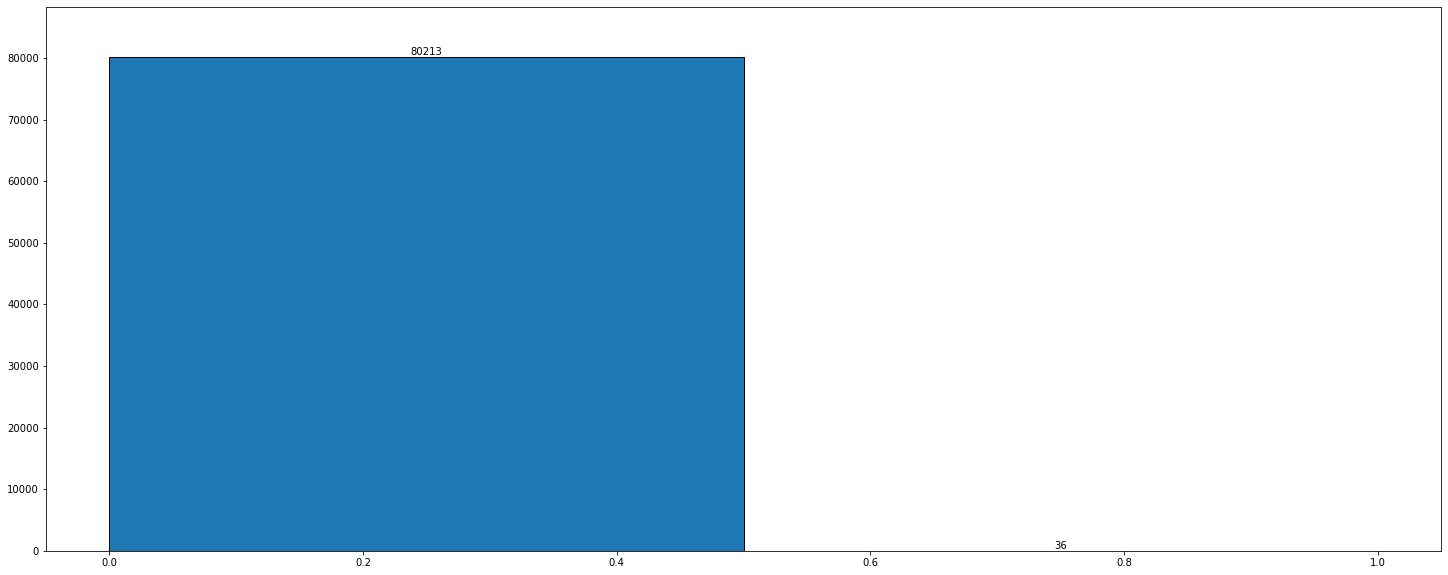

<Figure size 432x288 with 0 Axes>

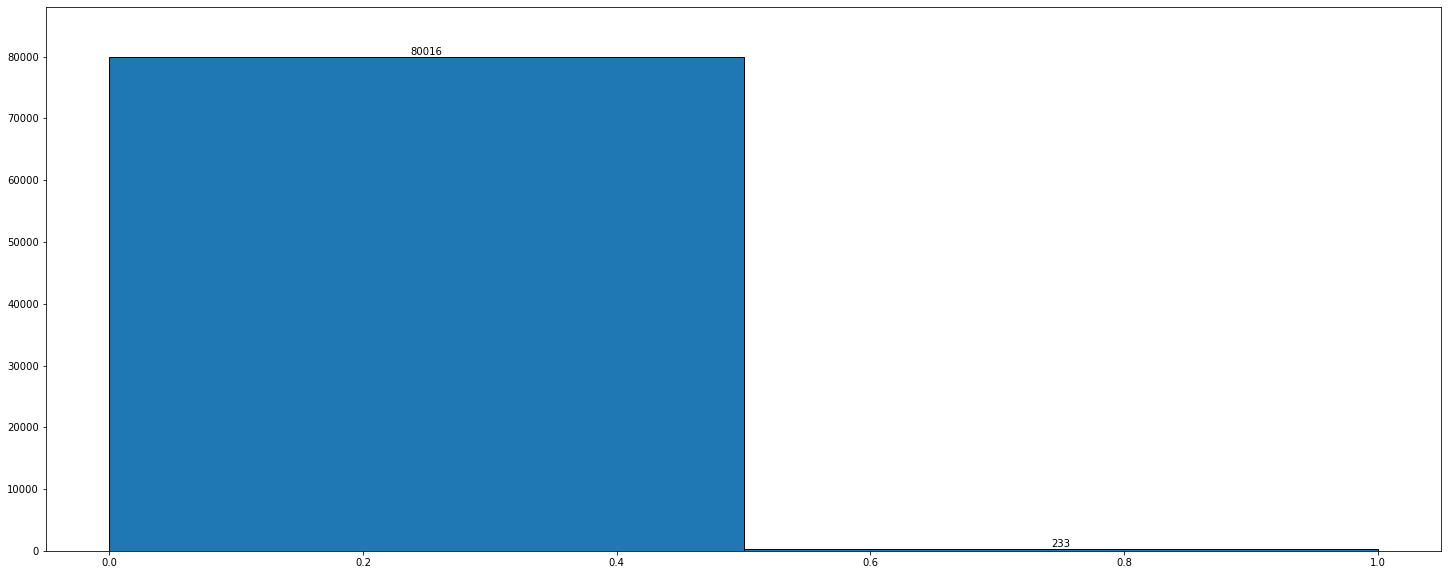

<Figure size 432x288 with 0 Axes>

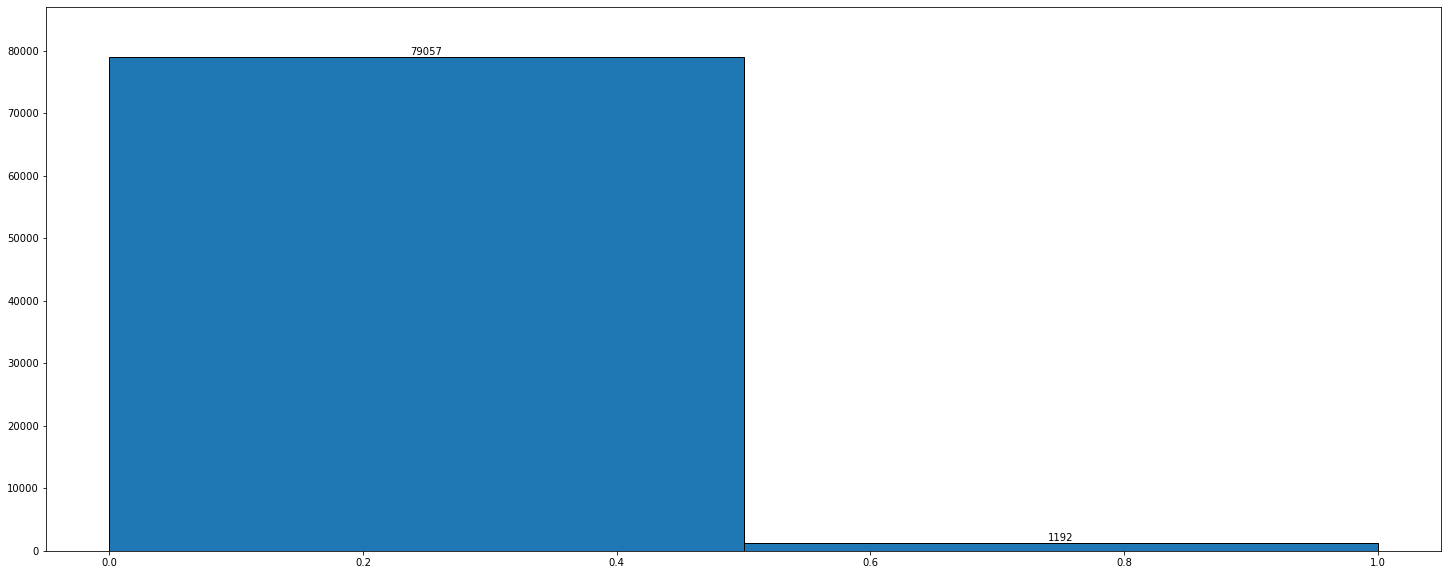

<Figure size 432x288 with 0 Axes>

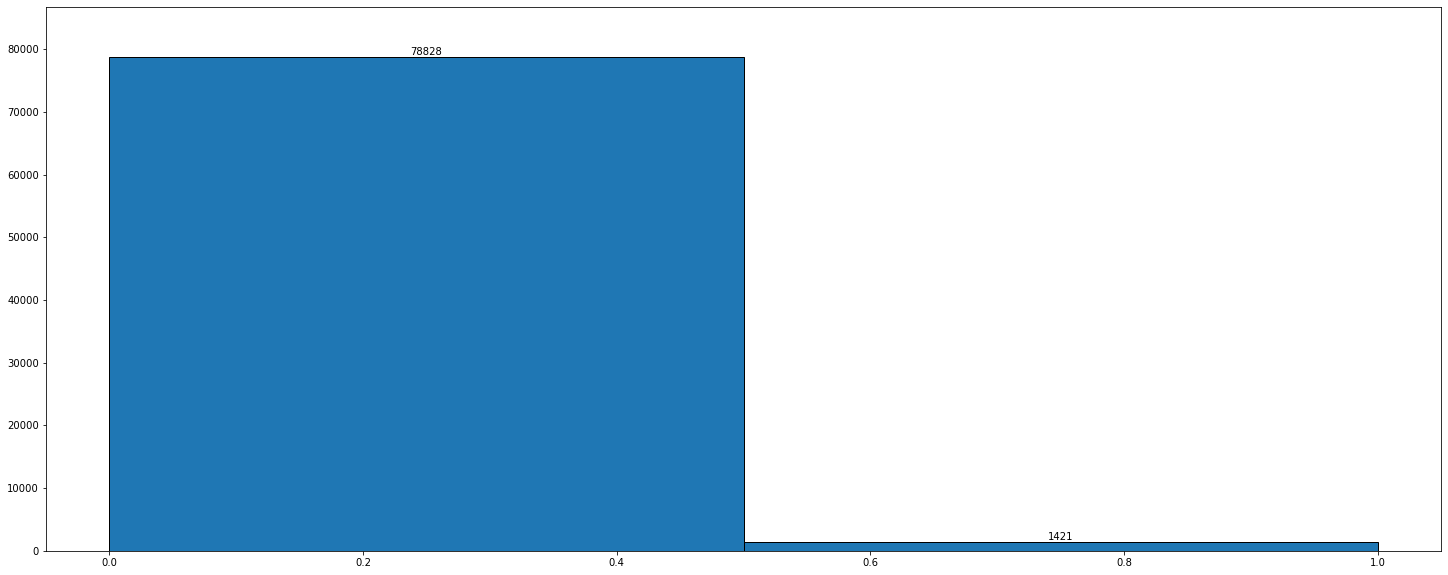

<Figure size 432x288 with 0 Axes>

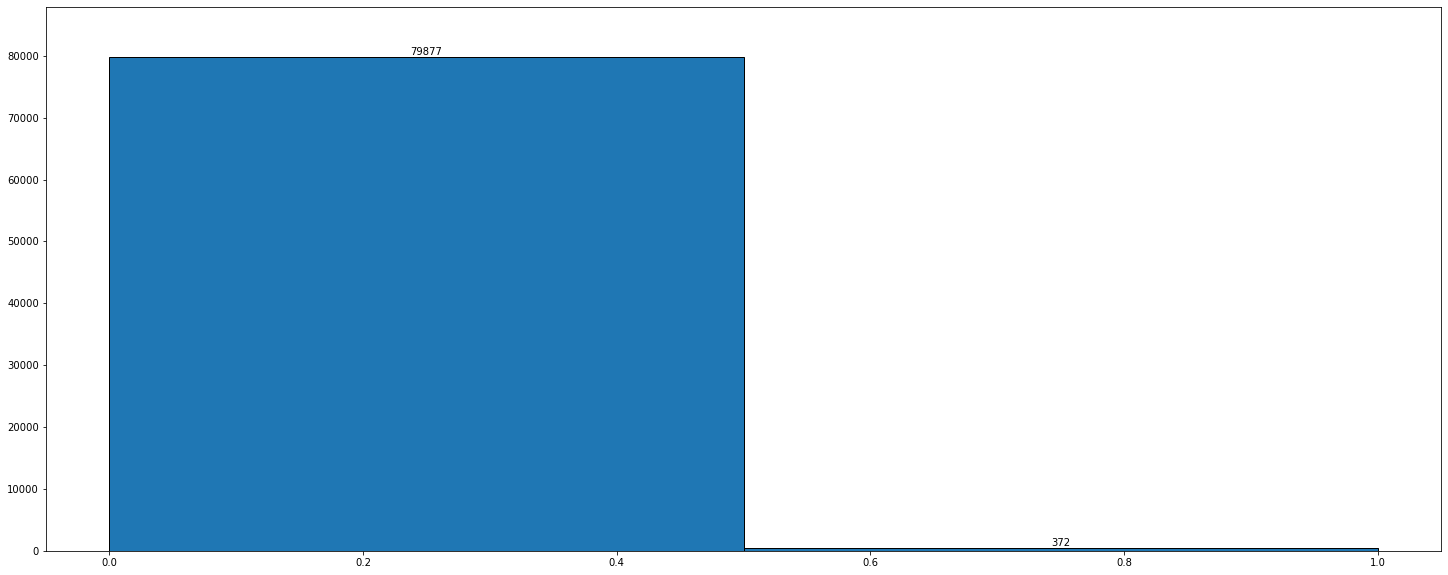

<Figure size 432x288 with 0 Axes>

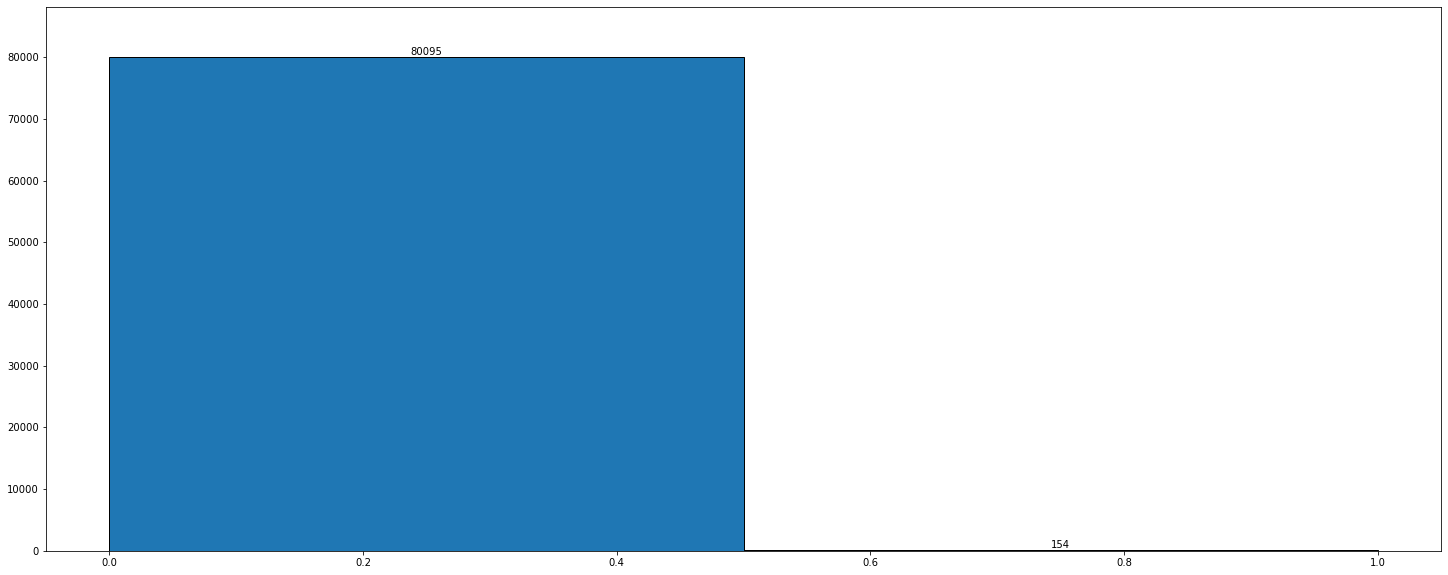

<Figure size 432x288 with 0 Axes>

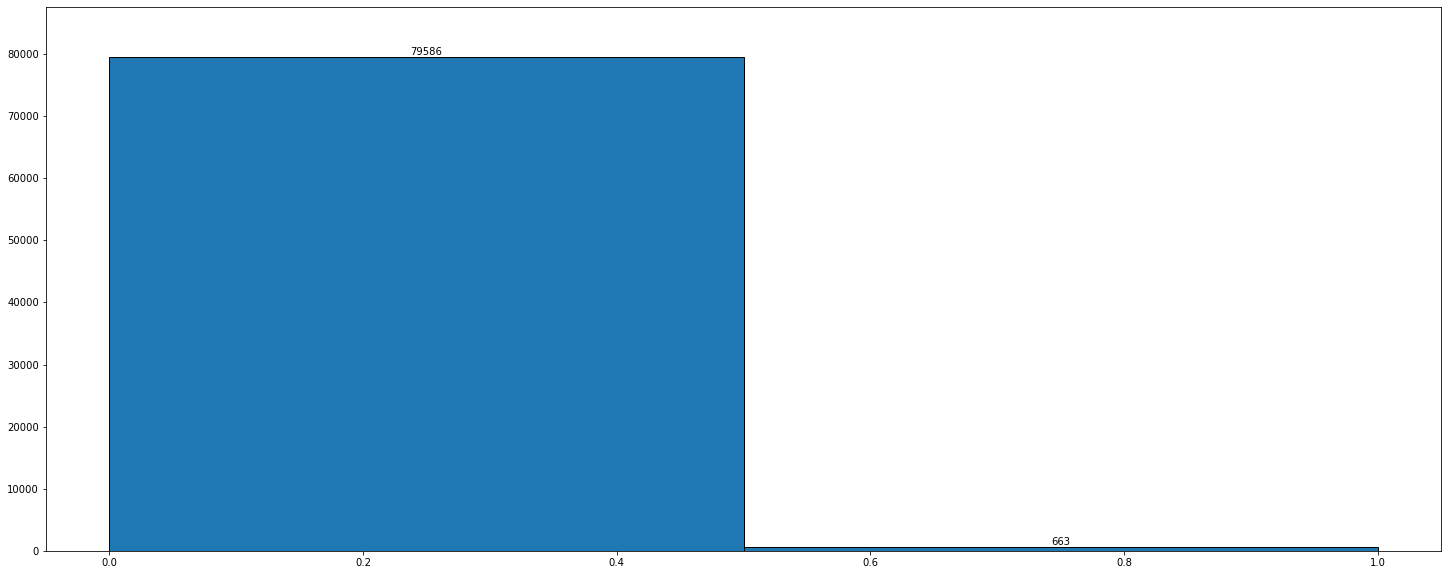

<Figure size 432x288 with 0 Axes>

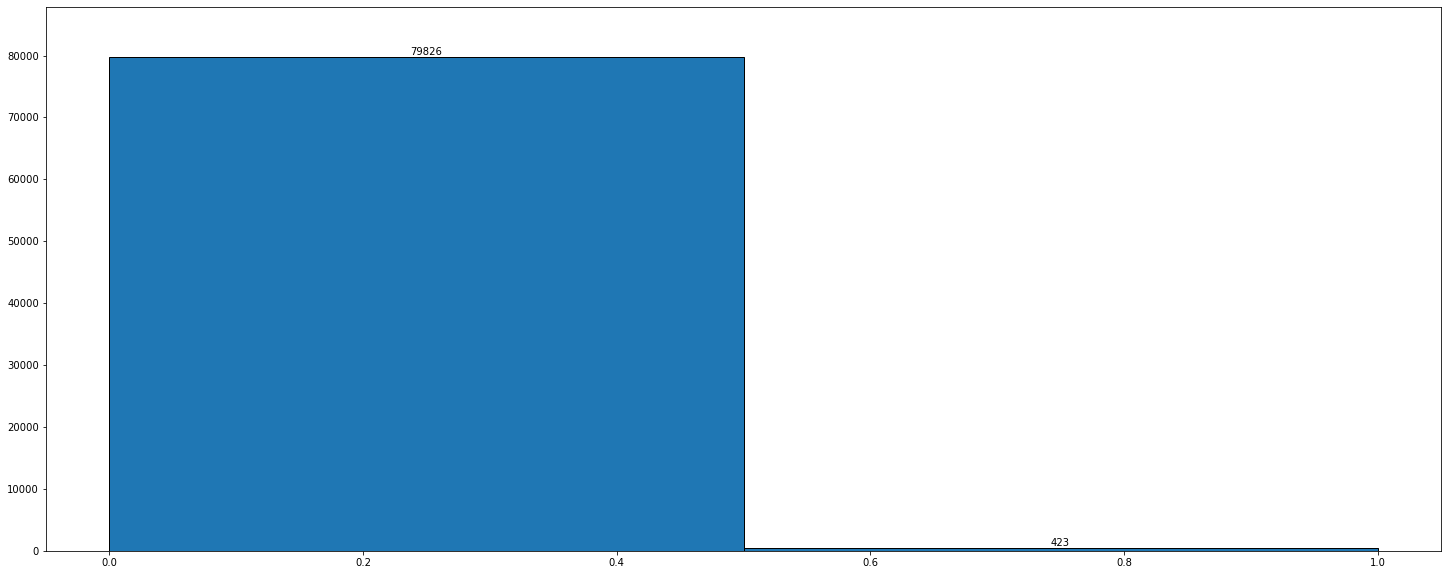

<Figure size 432x288 with 0 Axes>

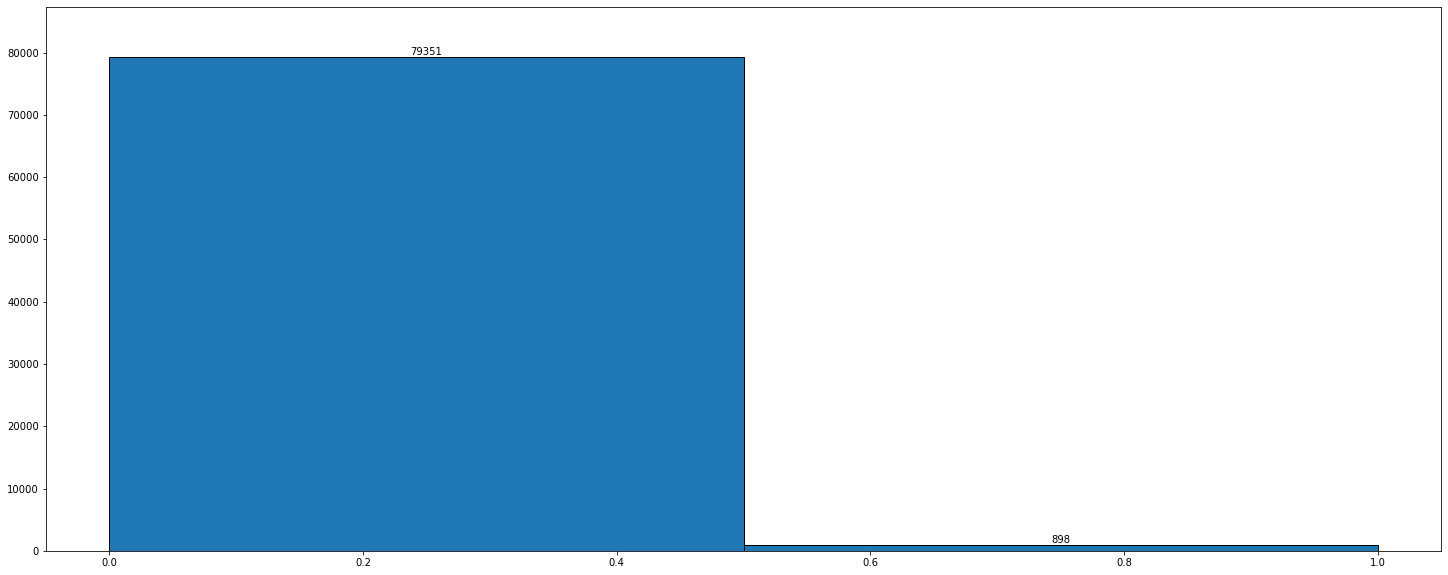

<Figure size 432x288 with 0 Axes>

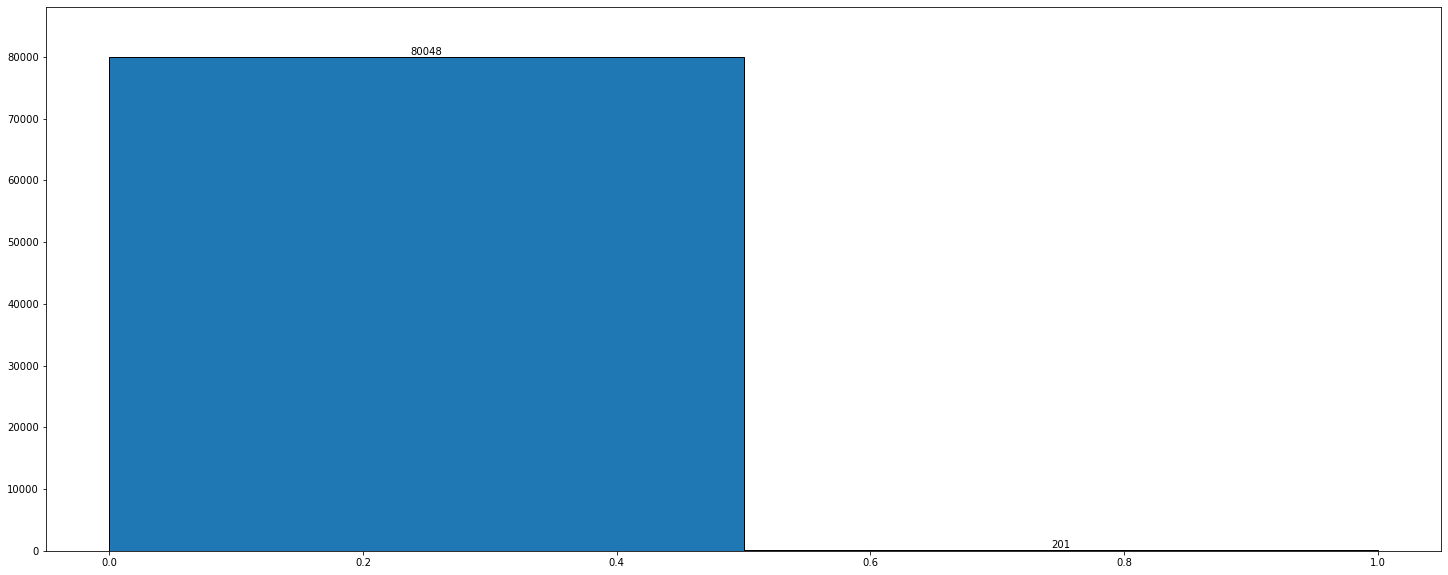

<Figure size 432x288 with 0 Axes>

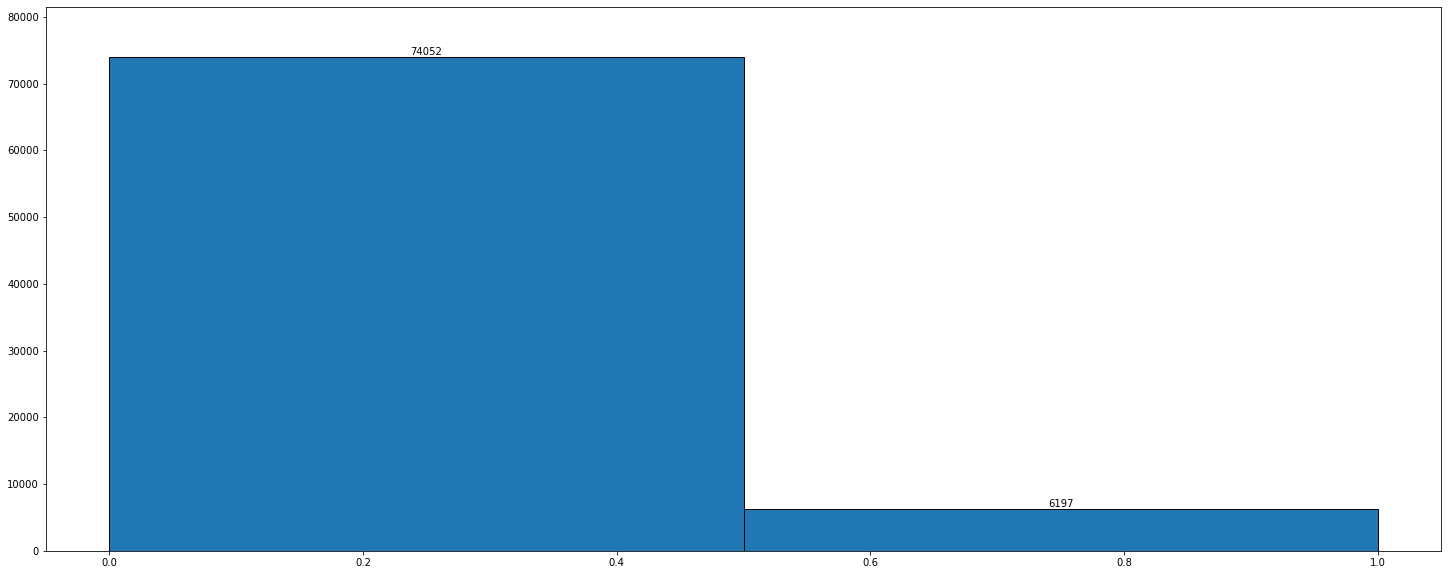

<Figure size 432x288 with 0 Axes>

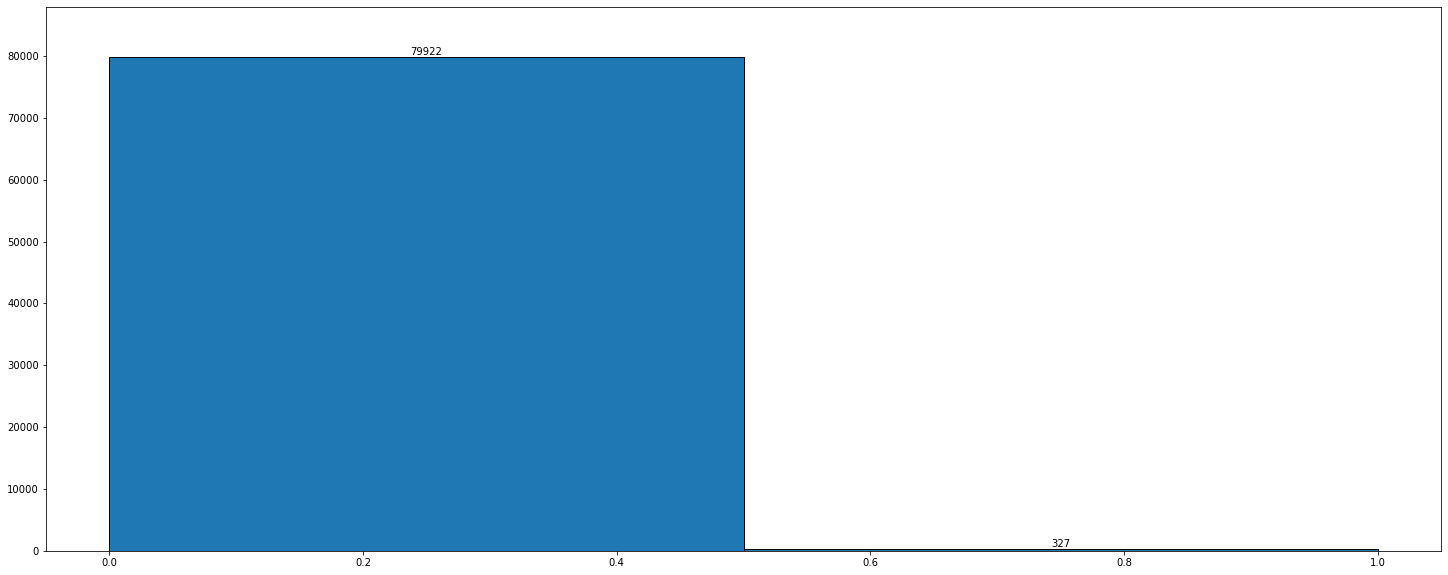

<Figure size 432x288 with 0 Axes>

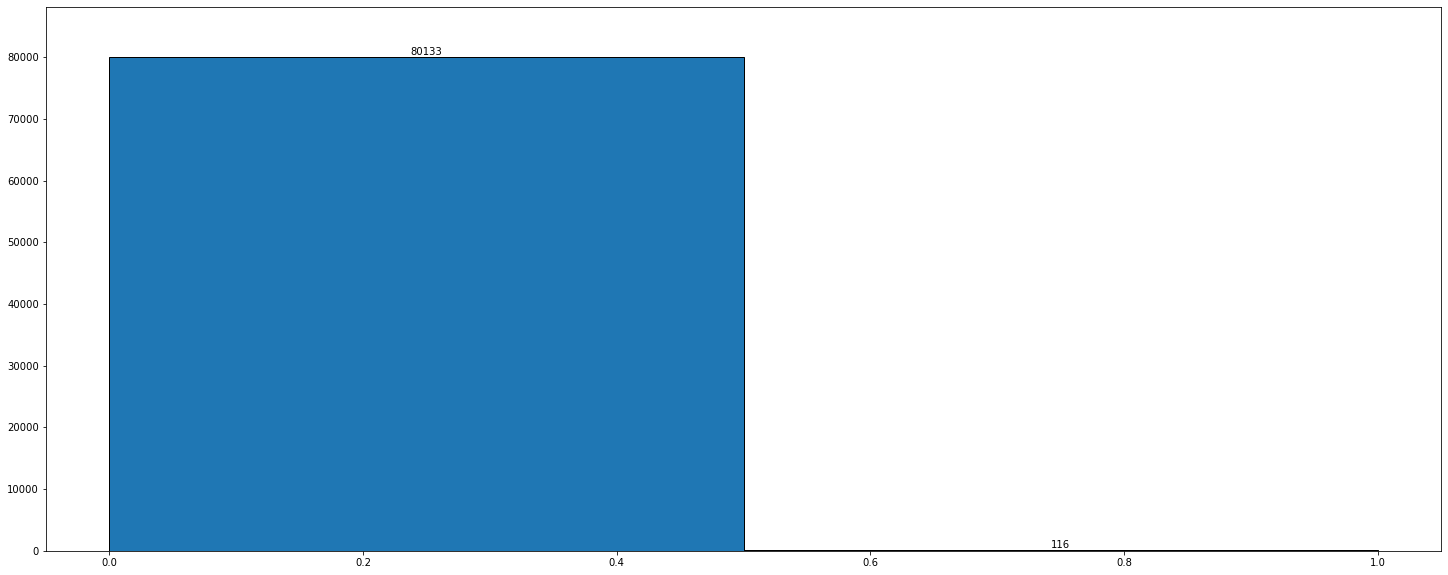

<Figure size 432x288 with 0 Axes>

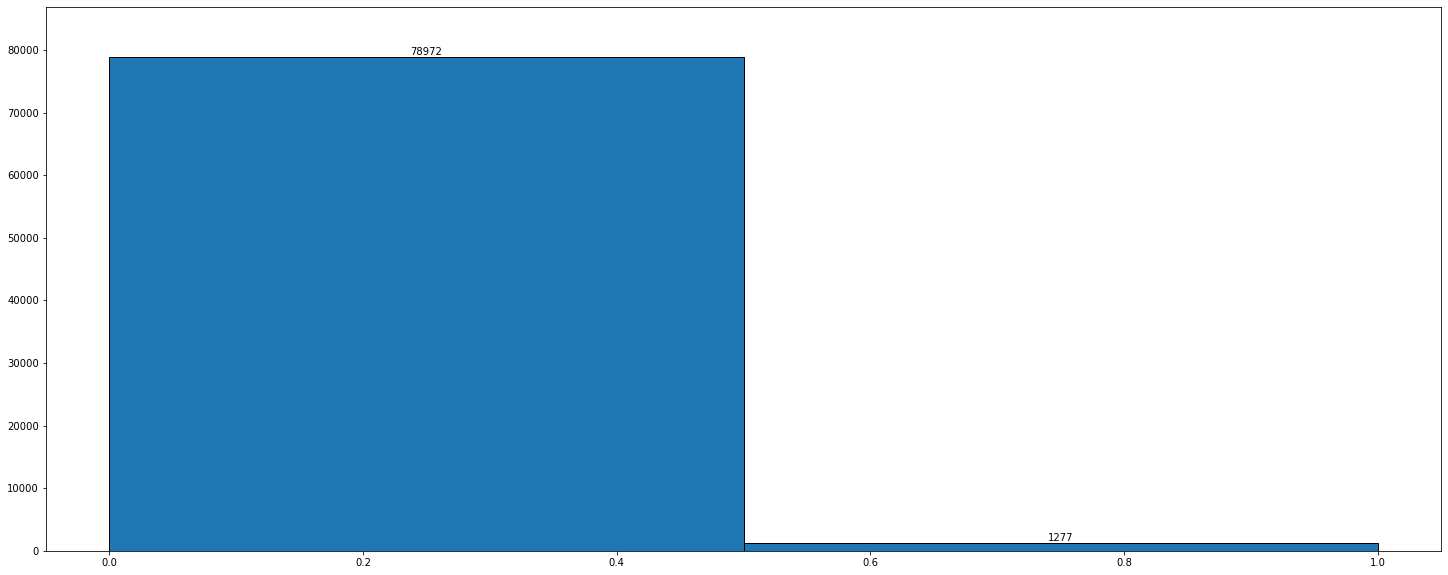

<Figure size 432x288 with 0 Axes>

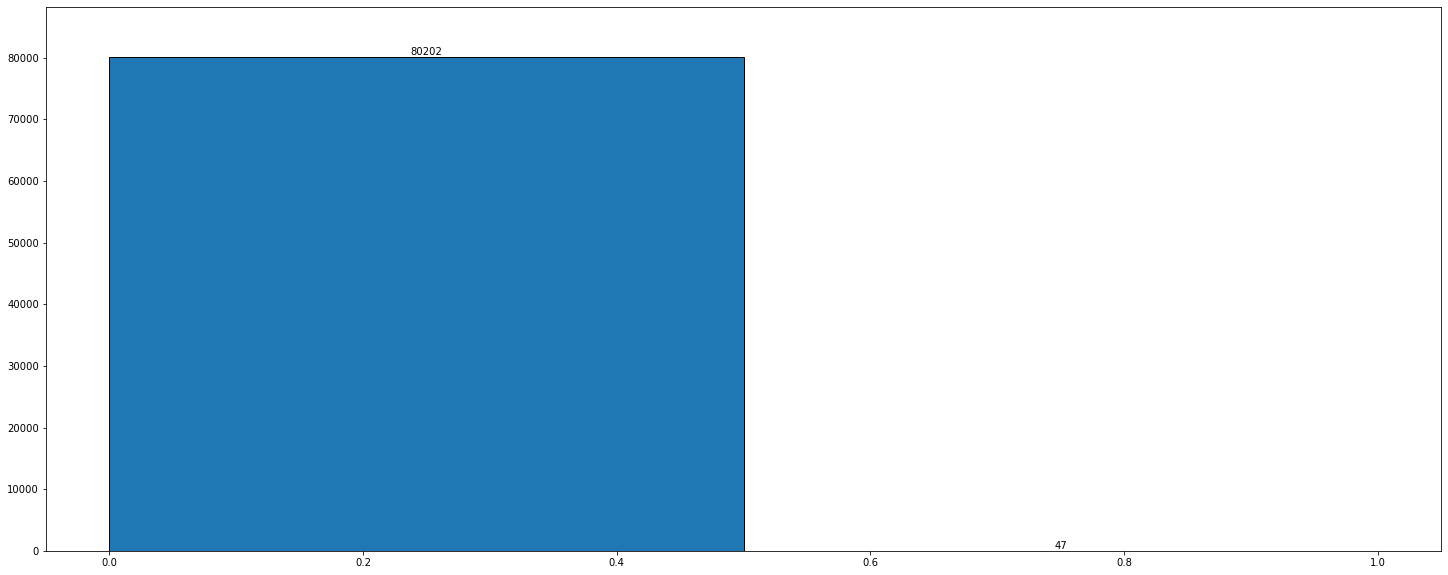

<Figure size 432x288 with 0 Axes>

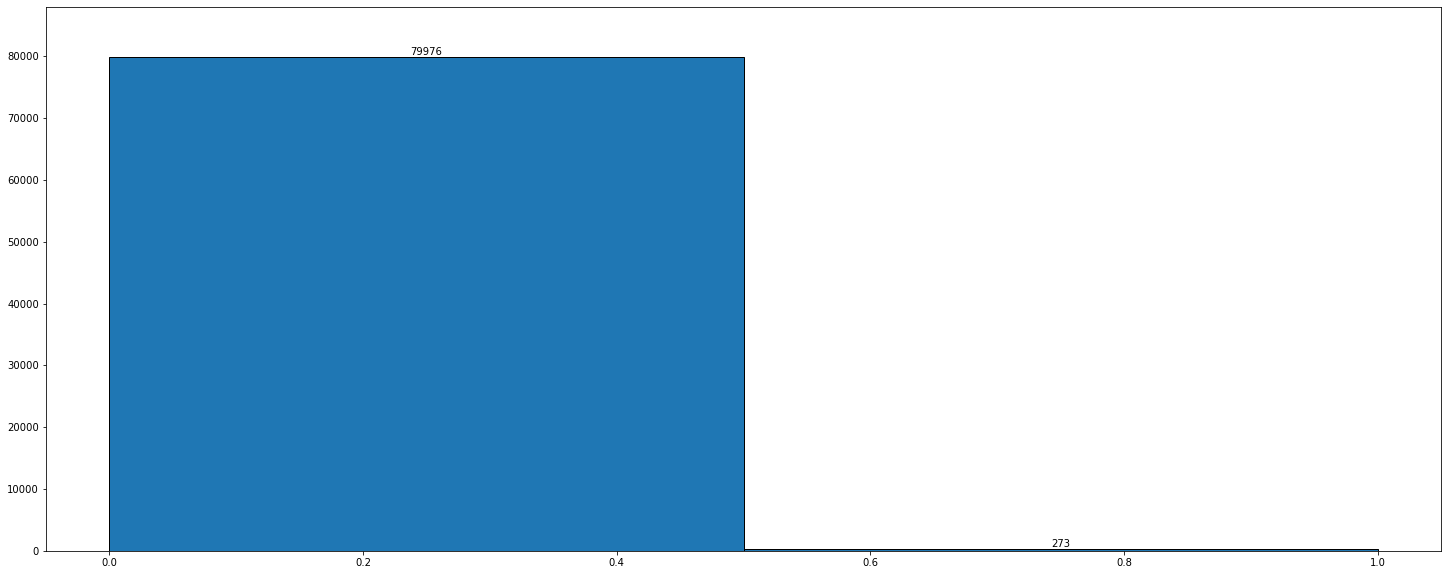

<Figure size 432x288 with 0 Axes>

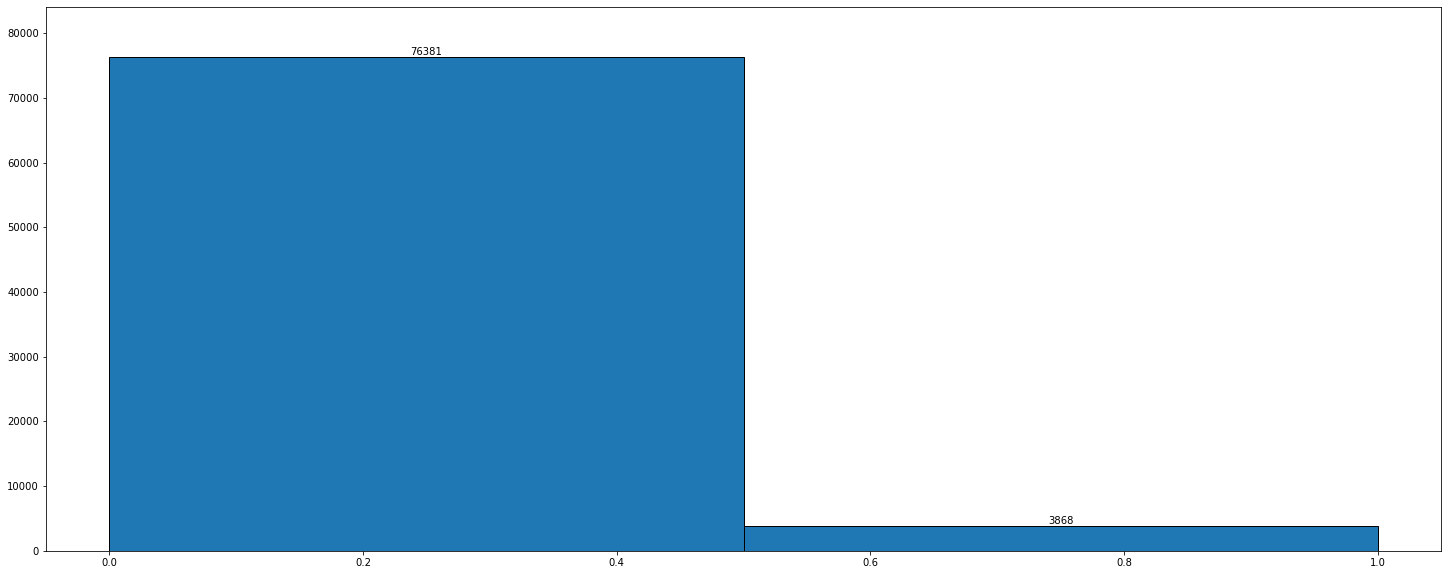

<Figure size 432x288 with 0 Axes>

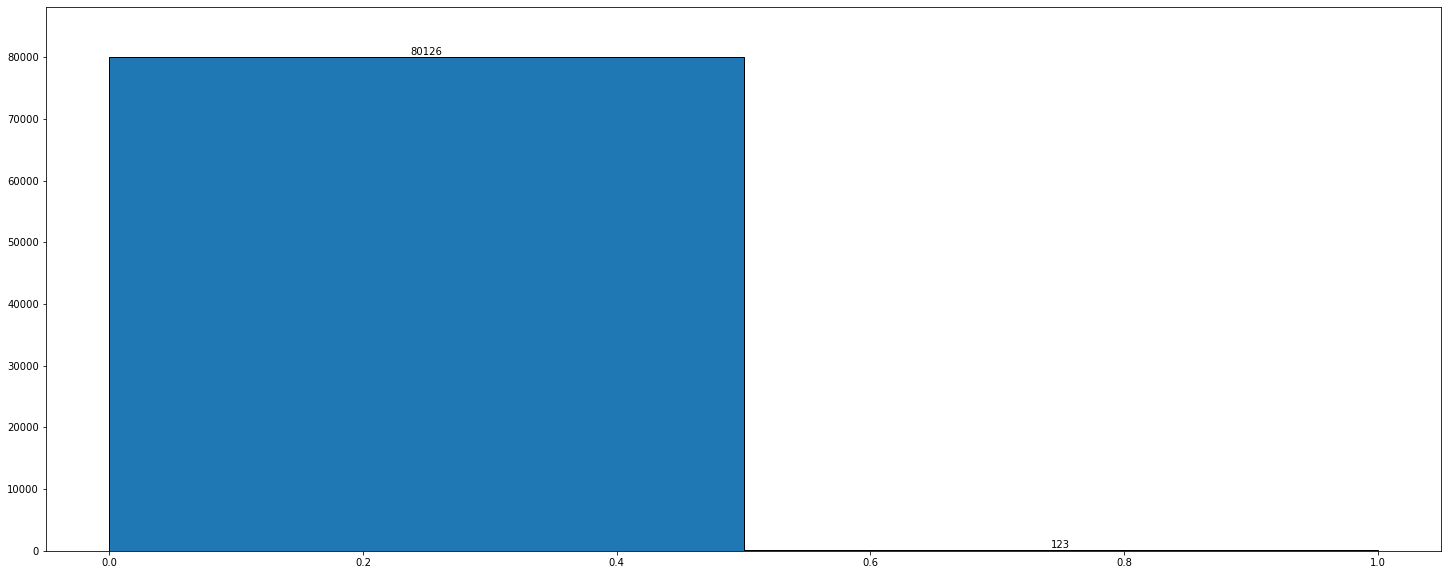

<Figure size 432x288 with 0 Axes>

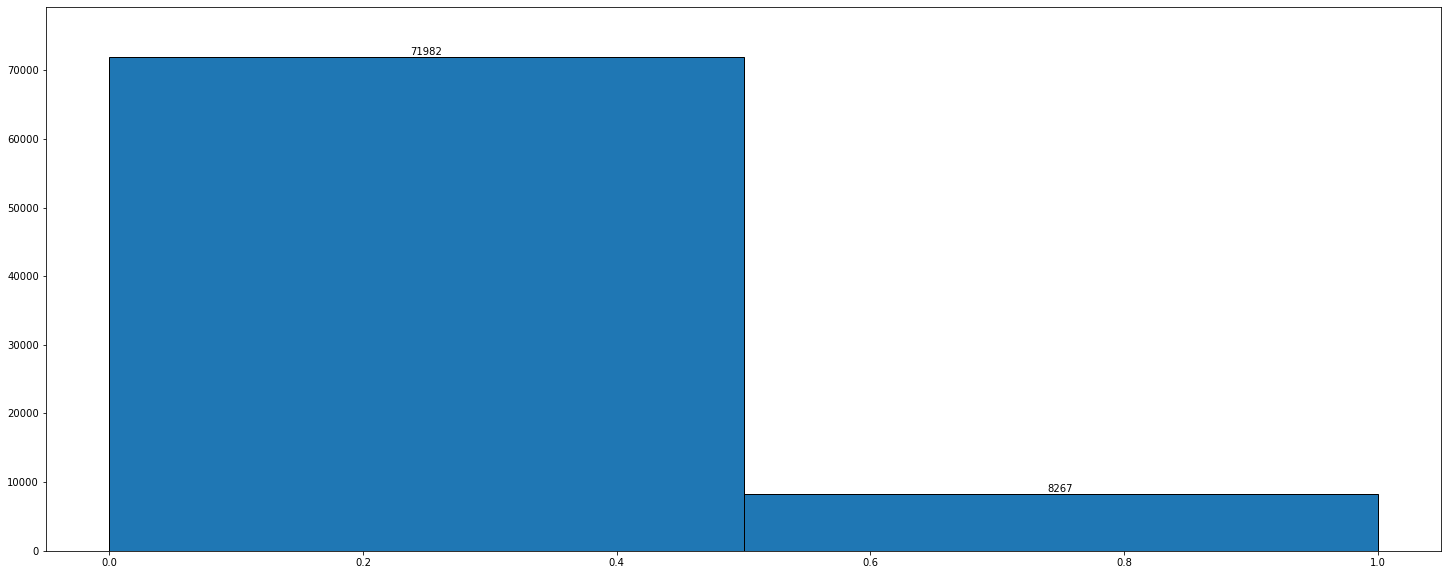

<Figure size 432x288 with 0 Axes>

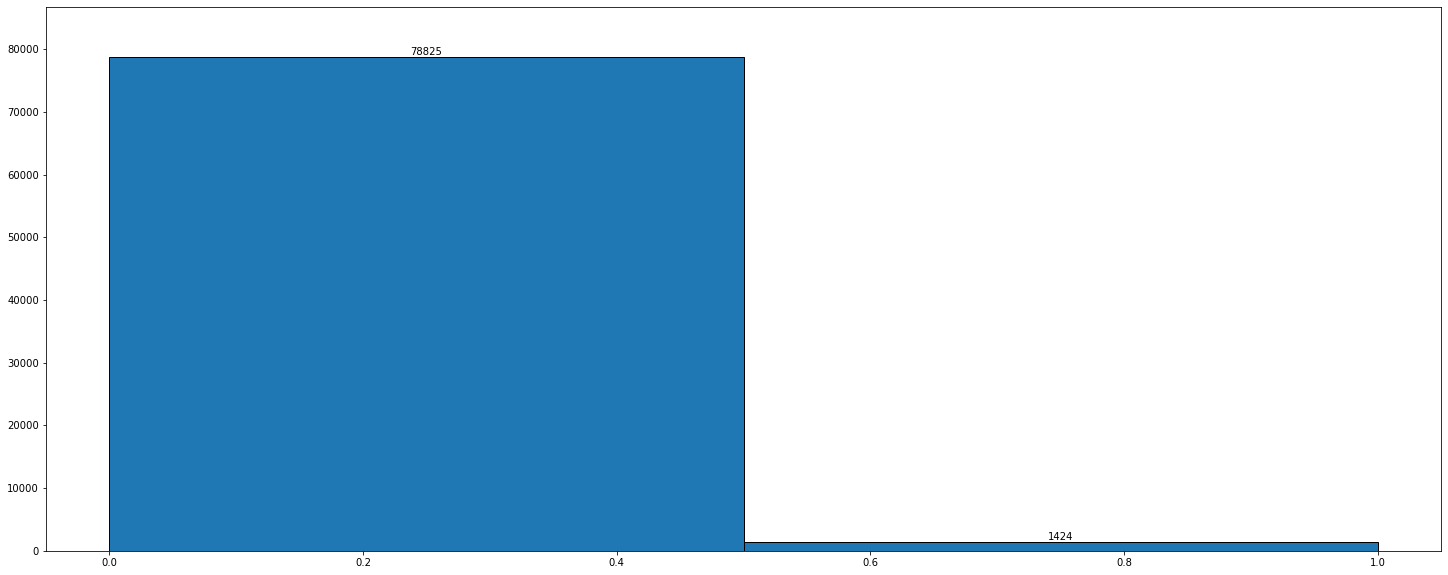

<Figure size 432x288 with 0 Axes>

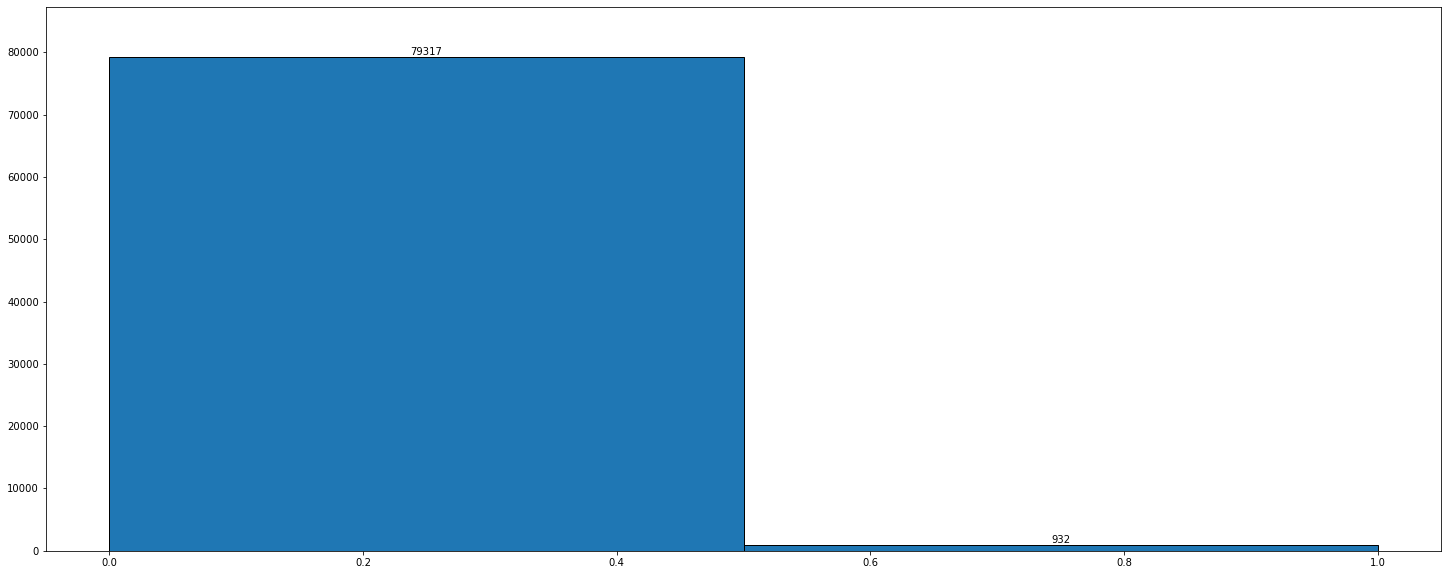

<Figure size 432x288 with 0 Axes>

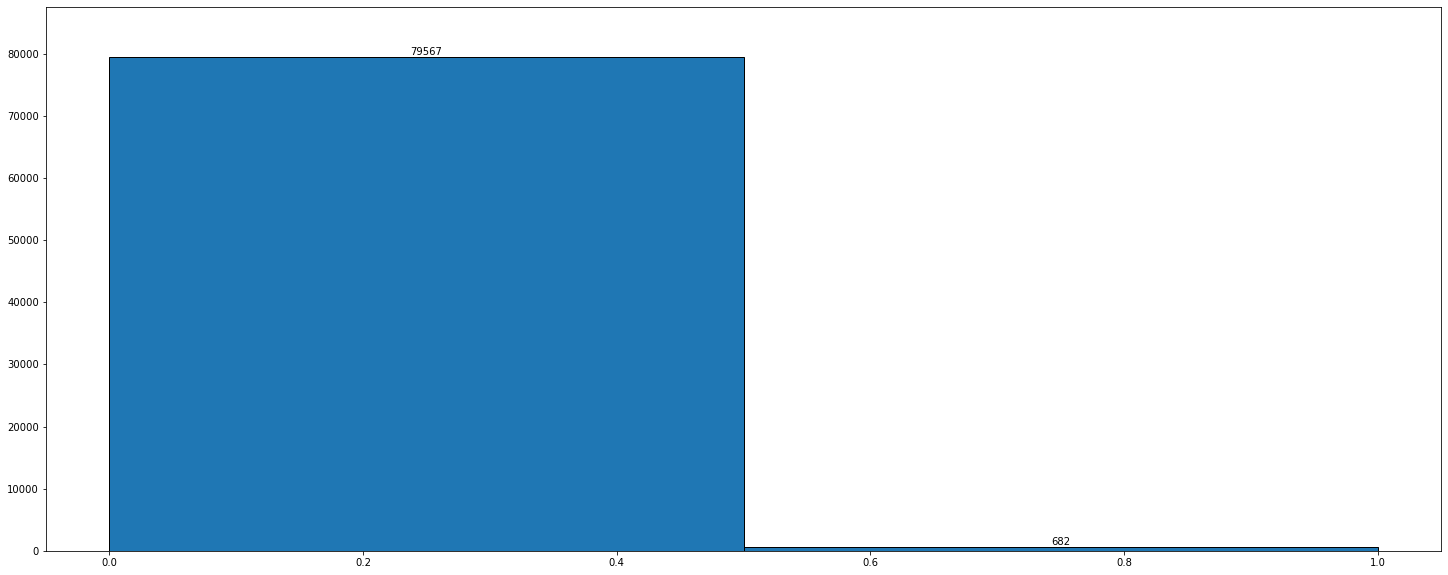

<Figure size 432x288 with 0 Axes>

In [18]:
for column in all_data_df:
    number_of_bins = len(all_data_df[column].value_counts())
    if number_of_bins > 100:
        number_of_bins = 100   # in order to make the hists more readable
    plt.figure(figsize=(25,10))
    counts, edges, bars = plt.hist(all_data_df[column], bins=number_of_bins, edgecolor="black")
    plt.ylim(0, (max(counts)+(max(counts)*0.1)))
    plt.bar_label(bars)
    plt.show()
    plt.clf()

As one can see from the distribution above, the dataset is not well distributed. Without considering the last 113 binary categorical features, all the others have an high concentration at the starting values and then a very low sparse concentration on all other values.

In [19]:
counter_lower_one = 0
counter_lower_five = 0
counter_lower_ten = 0
counter_lower_twentyfive = 0
counter_lower_fifty = 0
counter_lower_seventyfive = 0
for column in all_data_df:
    if all_data_df[column].min() == 0 and all_data_df[column].max() == 1:
        continue   # avoid categorical binary feature in the count
    different_from_zeros = (all_data_df[column] != 0).sum()
    if different_from_zeros > all_data_df.shape[0] * 0.01:
        counter_lower_one += 1
    if different_from_zeros > all_data_df.shape[0] * 0.05:
        counter_lower_five += 1
    if different_from_zeros > all_data_df.shape[0] * 0.1:
        counter_lower_ten += 1
    if different_from_zeros > all_data_df.shape[0] * 0.25:
        counter_lower_twentyfive += 1
    if different_from_zeros > all_data_df.shape[0] * 0.5:
        counter_lower_fifty += 1
    if different_from_zeros > all_data_df.shape[0] * 0.75:
        counter_lower_seventyfive += 1
print("number of features which has at least 1% of values different from zero over the samples: " + str(counter_lower_one) + " over " + str(all_data_df.shape[1]))
print("number of features which has at least 5% of values different from zero over the samples: " + str(counter_lower_five) + " over " + str(all_data_df.shape[1]))
print("number of features which has at least 10% of values different from zero over the samples: " + str(counter_lower_ten) + " over " + str(all_data_df.shape[1]))
print("number of features which has at least 25% of values different from zero over the samples: " + str(counter_lower_twentyfive) + " over " + str(all_data_df.shape[1]))
print("number of features which has at least 50% of values different from zero over the samples: " + str(counter_lower_fifty) + " over " + str(all_data_df.shape[1]))
print("number of features which has at least 75% of values different from zero over the samples: " + str(counter_lower_seventyfive) + " over " + str(all_data_df.shape[1]))

number of features which has at least 1% of values different from zero over the samples: 170 over 265
number of features which has at least 5% of values different from zero over the samples: 134 over 265
number of features which has at least 10% of values different from zero over the samples: 121 over 265
number of features which has at least 25% of values different from zero over the samples: 91 over 265
number of features which has at least 50% of values different from zero over the samples: 53 over 265
number of features which has at least 75% of values different from zero over the samples: 28 over 265


as one can see from the upper cell the dataset has an high number of zeros: 95 feature has value different from zero less then or equal to 1% of the total amount of samples, this means that, if all of them has exately 1% of value different of zero, we have at least 35% of values in the dataset equal to zero.

In [20]:
all_data_df.describe()

1              3             4             5             6    \
count  80249.000000   80249.000000  80249.000000  80249.000000  80249.000000   
mean       1.920136      80.041222      0.001695      0.023714      8.515508   
std       20.684610    2566.613770      0.041130      1.536566    113.487152   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.000000       0.000000      0.000000      0.000000      0.000000   
50%        0.000000       0.000000      0.000000      0.000000      0.000000   
75%        2.000000       0.000000      0.000000      0.000000      4.000000   
max     5727.000000  254212.000000      1.000000    419.000000   5299.000000   

                7             9             10            12            13   \
count  80249.000000  80249.000000  80249.000000  80249.000000  80249.000000   
mean       0.378522      1.480155      0.052225      0.000262      1.043602   
std       40.878906     38.192963      0.843168      0.074131      4.034851   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      1.000000   
max     5516.000000   6725.000000     91.000000     21.000000    345.000000   

       ...           462           463           468           469  \
count  ...  80249.000000  80249.000000  80249.000000  80249.000000   
mean   ...      0.001446      0.015913      0.000586      0.003402   
std    ...      0.037983      0.125117      0.024188      0.058230   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

                470           471           473           476           478  \
count  80249.000000  80249.000000  80249.000000  80249.000000  80249.000000   
mean       0.048200      0.001533      0.103017      0.017745      0.011614   
std        0.214344      0.039099      0.304088      0.132097      0.107092   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                479  
count  80249.000000  
mean       0.008499  
std        0.091771  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 265 columns]

In [21]:
column_ordered_by_std = all_data_df.std().sort_values(ascending=False).index
for element in column_ordered_by_std:
    print("column " + str(element) + ": " + str(all_data_df[int(element)].std()))

column 81: 9326.2060546875
column 204: 7547.86376953125
column 3: 2566.61376953125
column 108: 2081.03369140625
column 153: 1675.2056884765625
column 21: 1546.7520751953125
column 142: 1297.6807861328125
column 122: 1087.0902099609375
column 37: 906.6578979492188
column 116: 840.4490966796875
column 28: 838.4690551757812
column 124: 767.4046020507812
column 152: 764.4998168945312
column 80: 742.2594604492188
column 211: 712.3798828125
column 183: 661.822021484375
column 210: 654.6776123046875
column 199: 648.2776489257812
column 33: 642.0132446289062
column 23: 632.361083984375
column 84: 623.8768920898438
column 229: 618.7689208984375
column 241: 597.8389282226562
column 207: 564.0232543945312
column 94: 517.2705078125
column 49: 463.9277648925781
column 20: 447.9443359375
column 155: 447.72052001953125
column 208: 436.57830810546875
column 121: 434.2737731933594
column 58: 424.7619934082031
column 79: 389.34002685546875
column 226: 382.248291015625
column 50: 366.21417236328125
colum

In [22]:
counter_for_std = 0
counter_for_std_two = 0
for element in column_ordered_by_std:
    if all_data_df[int(element)].std() > 100:
        counter_for_std += 1
    if all_data_df[int(element)].std() < 1:
        counter_for_std_two += 1
print(counter_for_std)
print(counter_for_std_two)

66
84


In general dataset has high spread. 66 feature has std over 100 (some arrives over 1000) while 84 has std under 1 (probably a lot of them are the last 115 feature which are dichotomous).the column 81 and 204 in particular distanciate all other feature respect to their std.

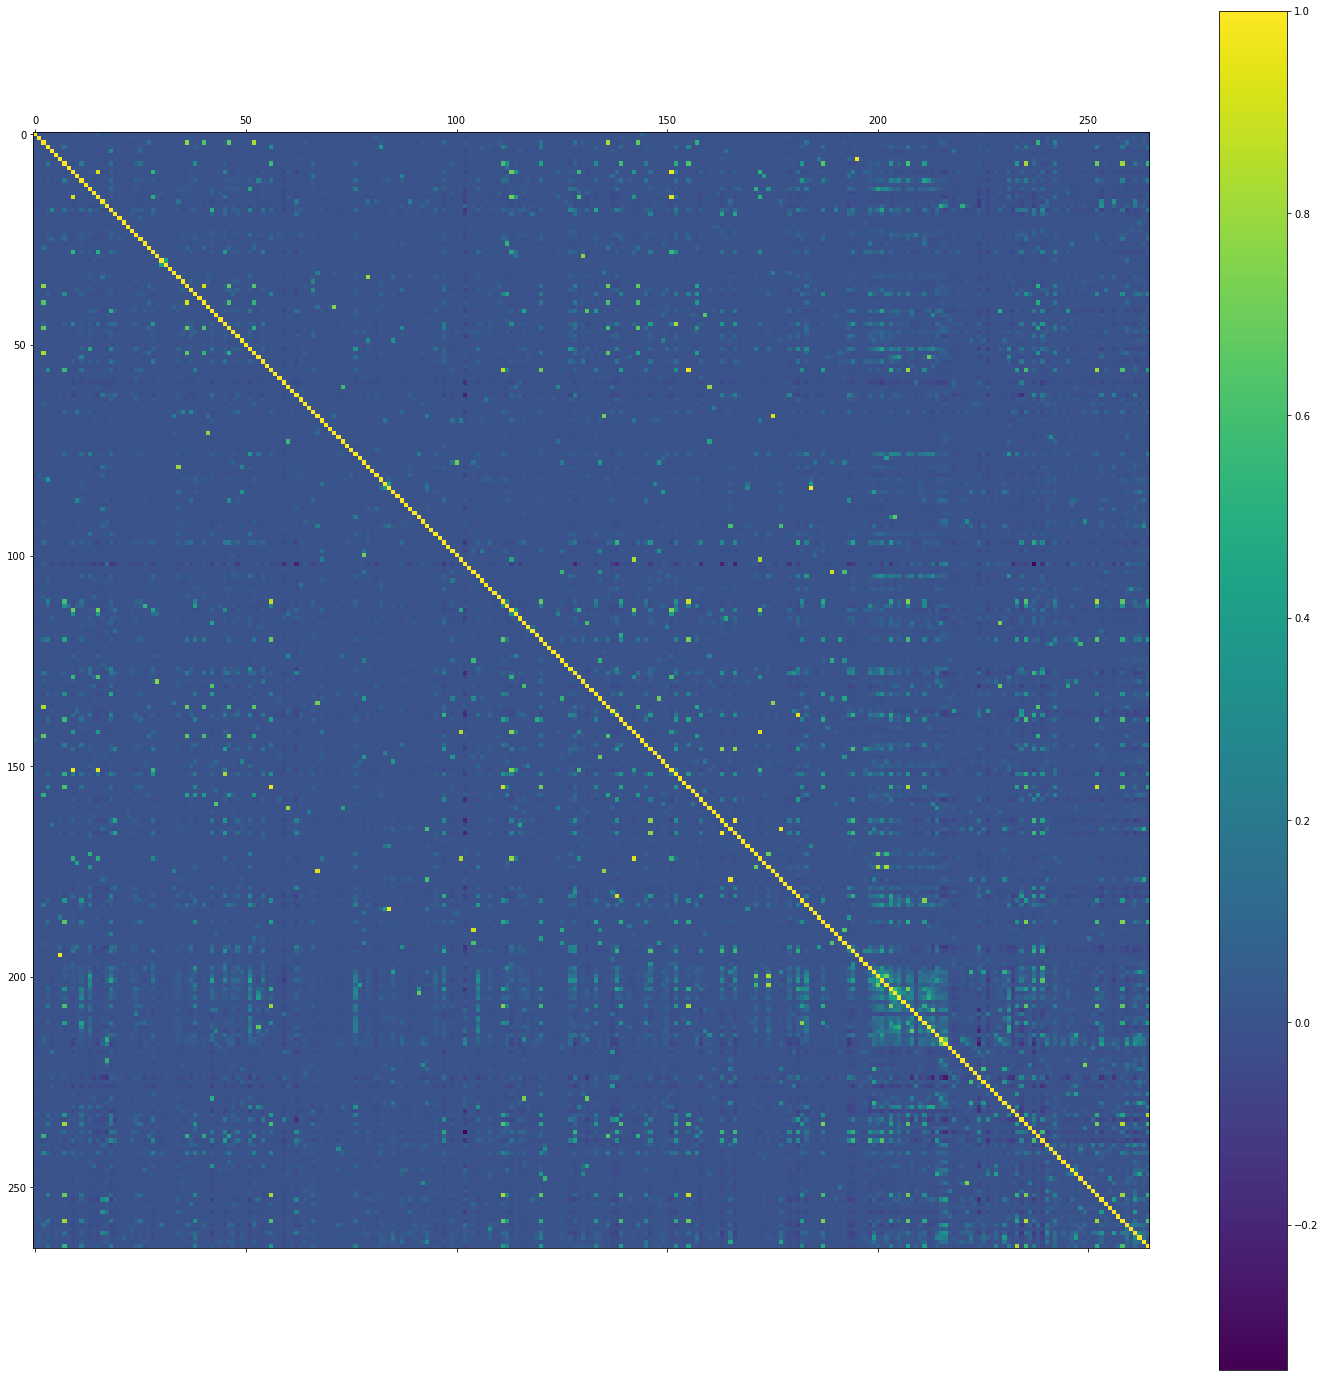

<Figure size 432x288 with 0 Axes>

In [23]:
fig, ax = plt.subplots(figsize=(25,25))
cax = ax.matshow(all_data_df.corr())
fig.colorbar(cax)
plt.show()
plt.clf()

In general there isn't correlation, exept for data among feature from 200 and 215 (with eye, check more properly) in which there is a bit of correlation

In [21]:
# in order to make boxplots more readable (before reindex of columns, and then I order the dataseb from the column with higher value to the one with lower value)
all_data_df = all_data_df.T.reset_index(drop=True).T
all_data_df = all_data_df.iloc[:, all_data_df.max().sort_values(ascending=False).index]
all_data_df

1       59     158  96     25   161   20     95   94    16   ...  228  \
0      0.0    33.0  455.0  0.0    2.0  0.0  19.0  105.0  0.0  31.0  ...  0.0   
1      0.0  5085.0    8.0  1.0  791.0  0.0   2.0   65.0  0.0   0.0  ...  0.0   
2      0.0     0.0   21.0  0.0    1.0  0.0   0.0    8.0  0.0   0.0  ...  0.0   
3      0.0    55.0   68.0  0.0    1.0  2.0   1.0    1.0  0.0   8.0  ...  0.0   
4      0.0     0.0    2.0  0.0    0.0  0.0   1.0    0.0  0.0   2.0  ...  0.0   
...    ...     ...    ...  ...    ...  ...   ...    ...  ...   ...  ...  ...   
80244  0.0     2.0   13.0  0.0    2.0  0.0   0.0    2.0  0.0   2.0  ...  0.0   
80245  0.0    24.0   23.0  0.0    3.0  1.0   0.0    7.0  0.0   2.0  ...  0.0   
80246  0.0     2.0   26.0  0.0    1.0  7.0   0.0    0.0  0.0   0.0  ...  0.0   
80247  0.0     4.0    2.0  0.0    1.0  0.0   0.0   14.0  0.0   1.0  ...  0.0   
80248  0.0     5.0   68.0  2.0    9.0  0.0   0.0   31.0  0.0   5.0  ...  0.0   

       229  230  231  232  233  234  235  236  264  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  
80244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
80247  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
80248  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[80249 rows x 265 columns]

In [25]:
column_label_0_50 = [x for x in range(0,51)]
column_label_50_100 = [x for x in range(51,101)]
column_label_100_150 = [x for x in range(101,151)]
column_label_150_200 = [x for x in range(151,201)]
column_label_200_216 = [x for x in range(201,217)]
column_label_216_264 = [x for x in range(217,265)]

#### Boxplot feature 0-50 (ordered in above cell by columns max value)

<AxesSubplot:>

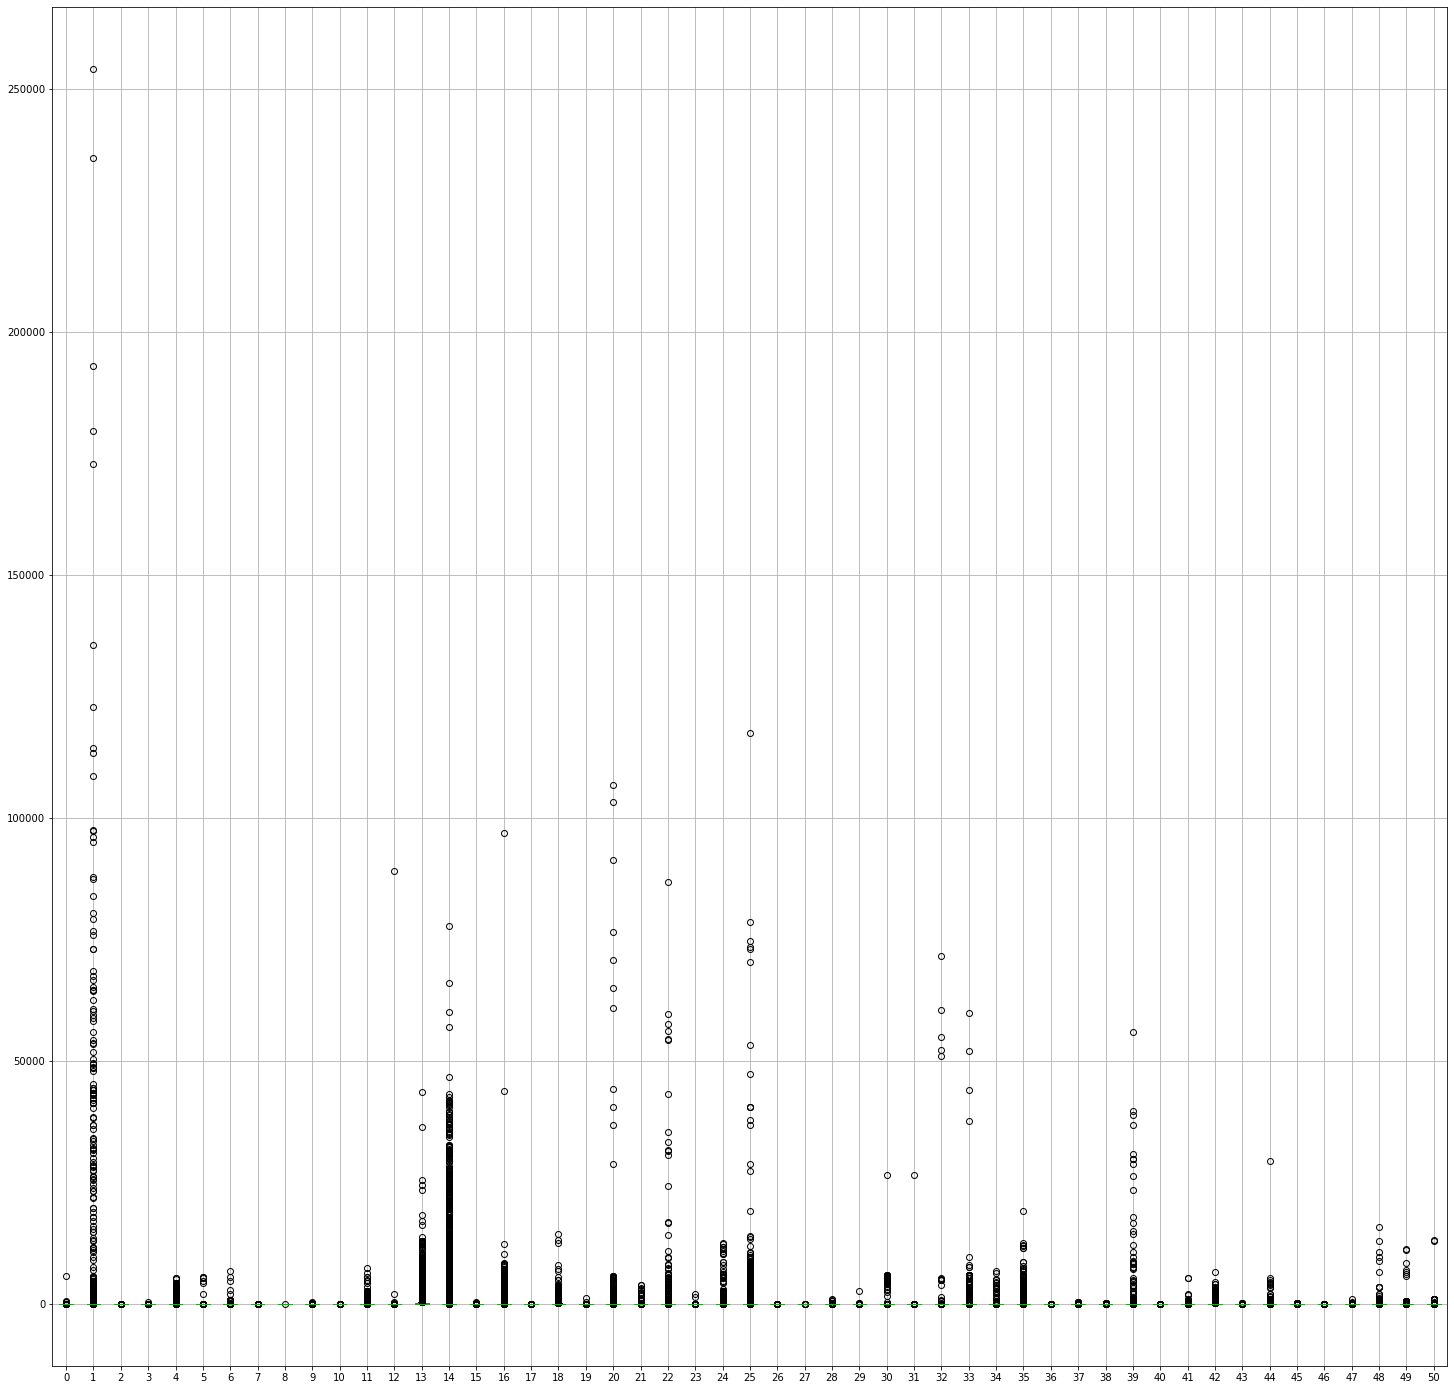

In [26]:
all_data_df.boxplot(column=column_label_0_50, figsize=(25, 25))

<AxesSubplot:>

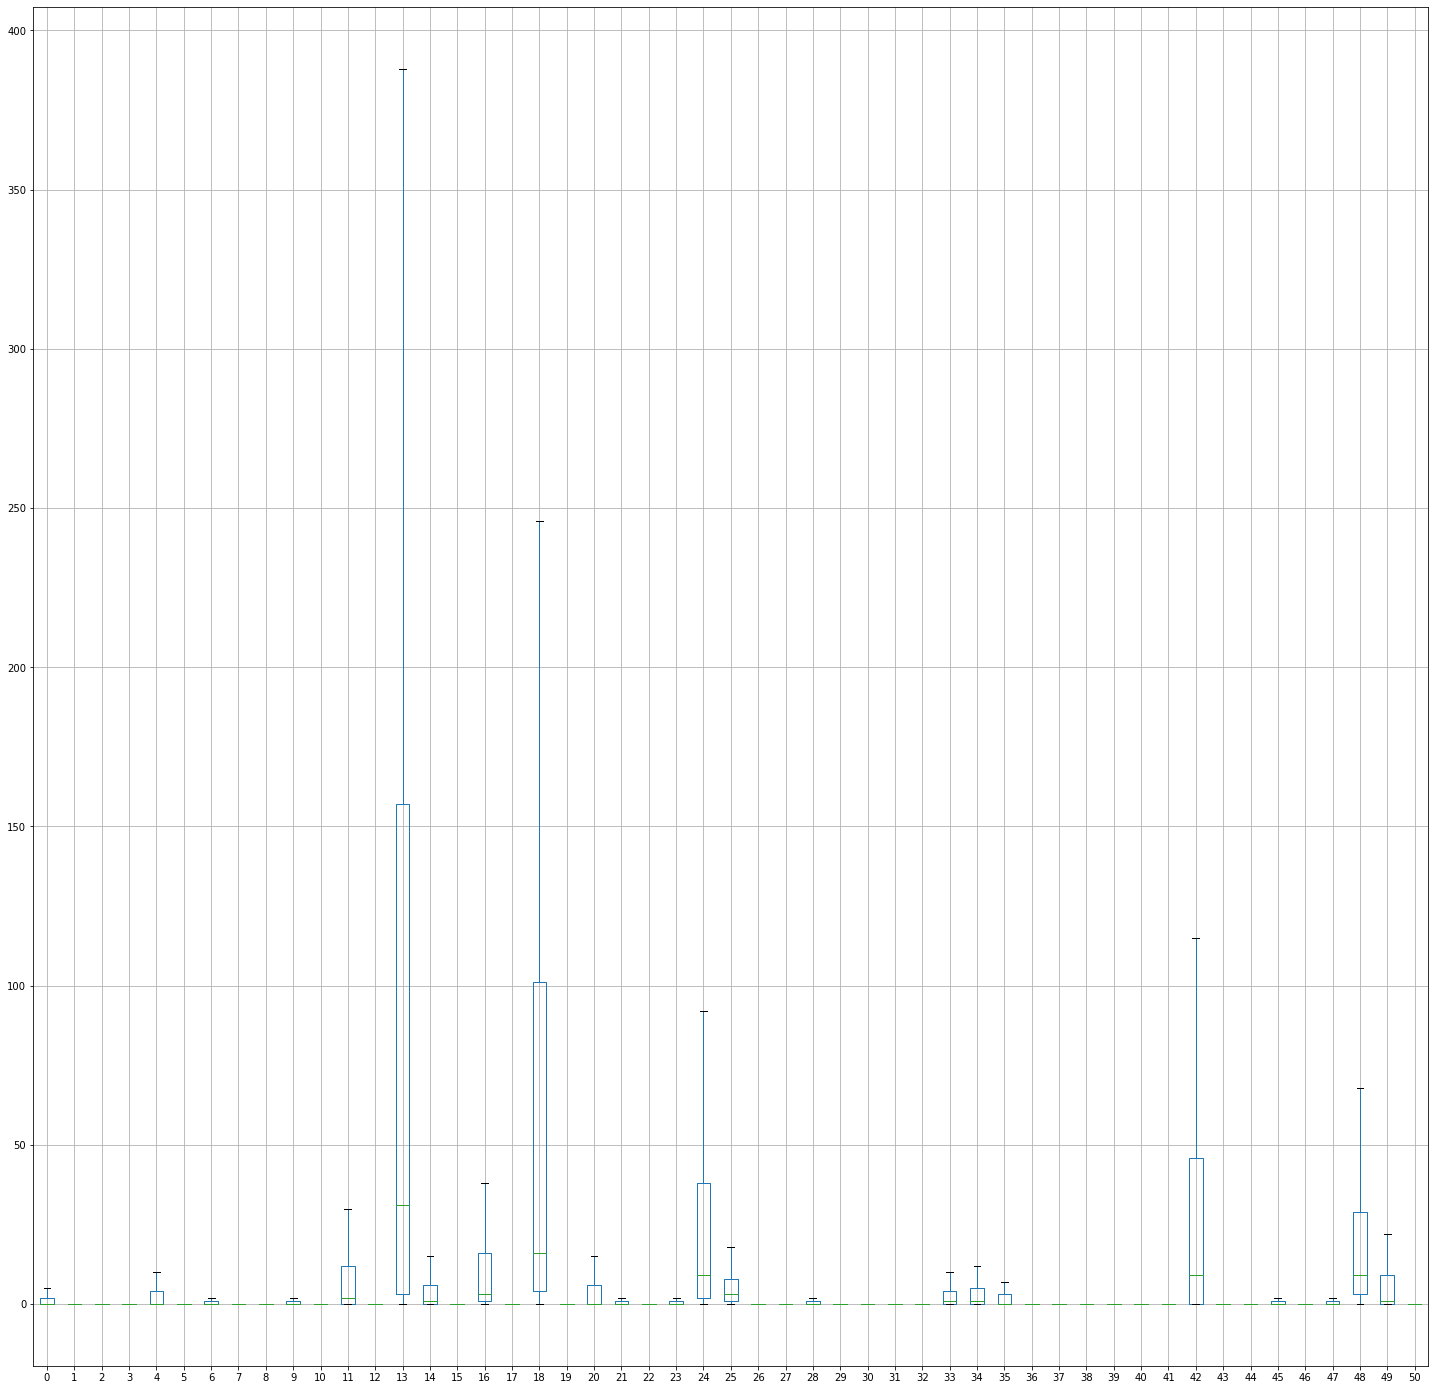

In [27]:
all_data_df.boxplot(column=column_label_0_50, figsize=(25, 25), showfliers=False)

#### Boxplot feature 50-100

<AxesSubplot:>

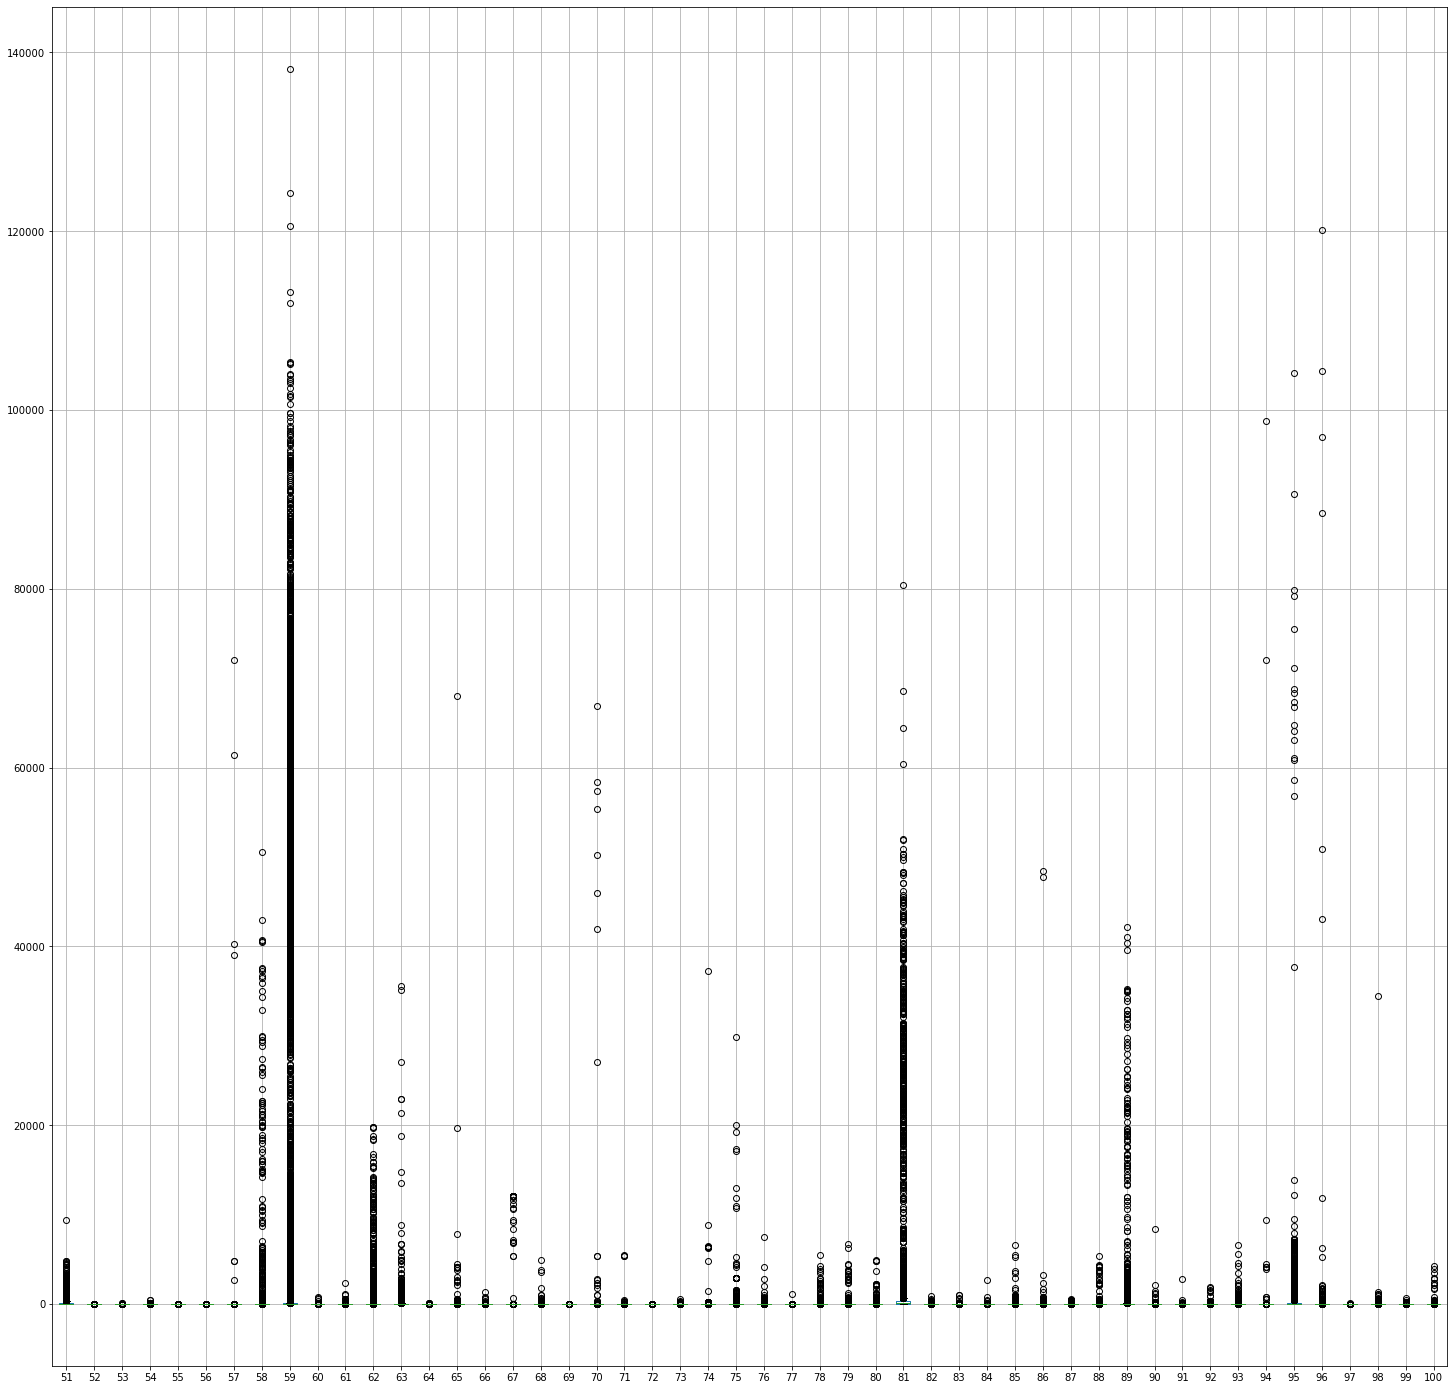

In [28]:
all_data_df.boxplot(column=column_label_50_100, figsize=(25, 25))

<AxesSubplot:>

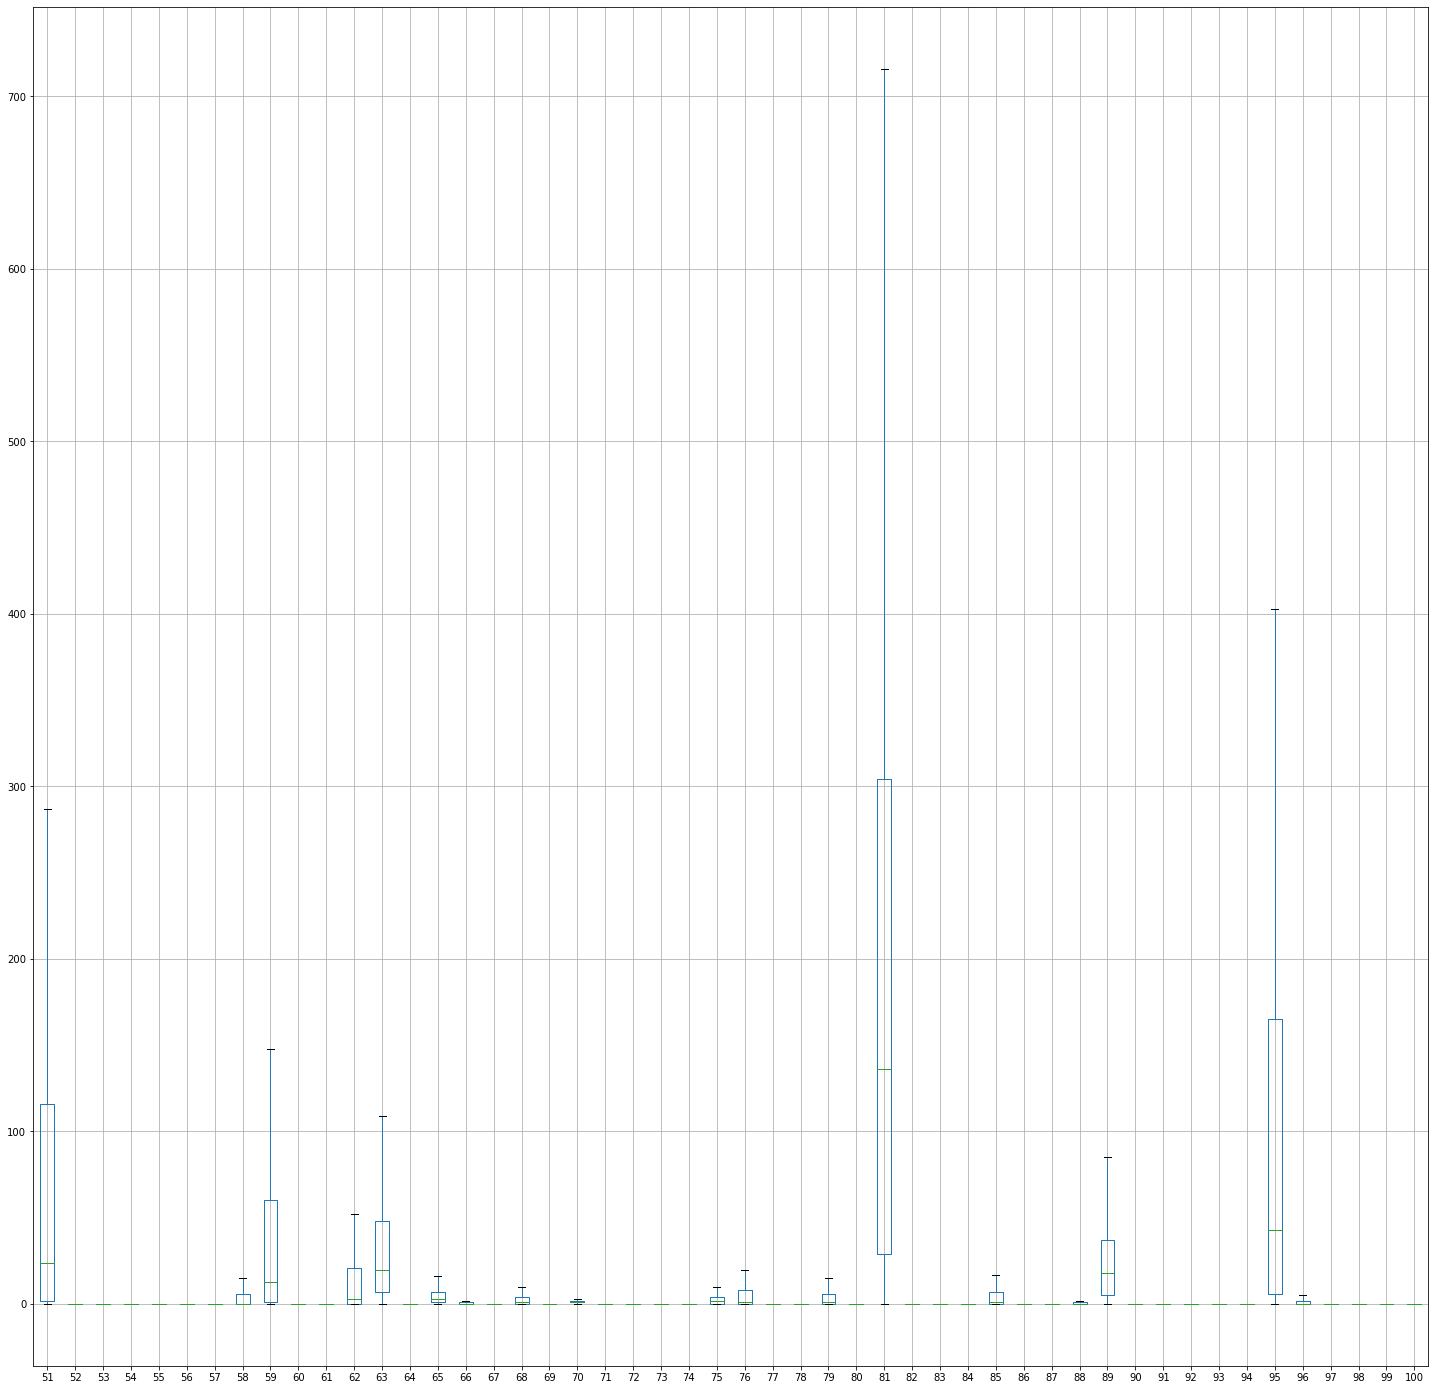

In [29]:
all_data_df.boxplot(column=column_label_50_100, figsize=(25, 25), showfliers=False)

#### Boxplot feature 100-150

<AxesSubplot:>

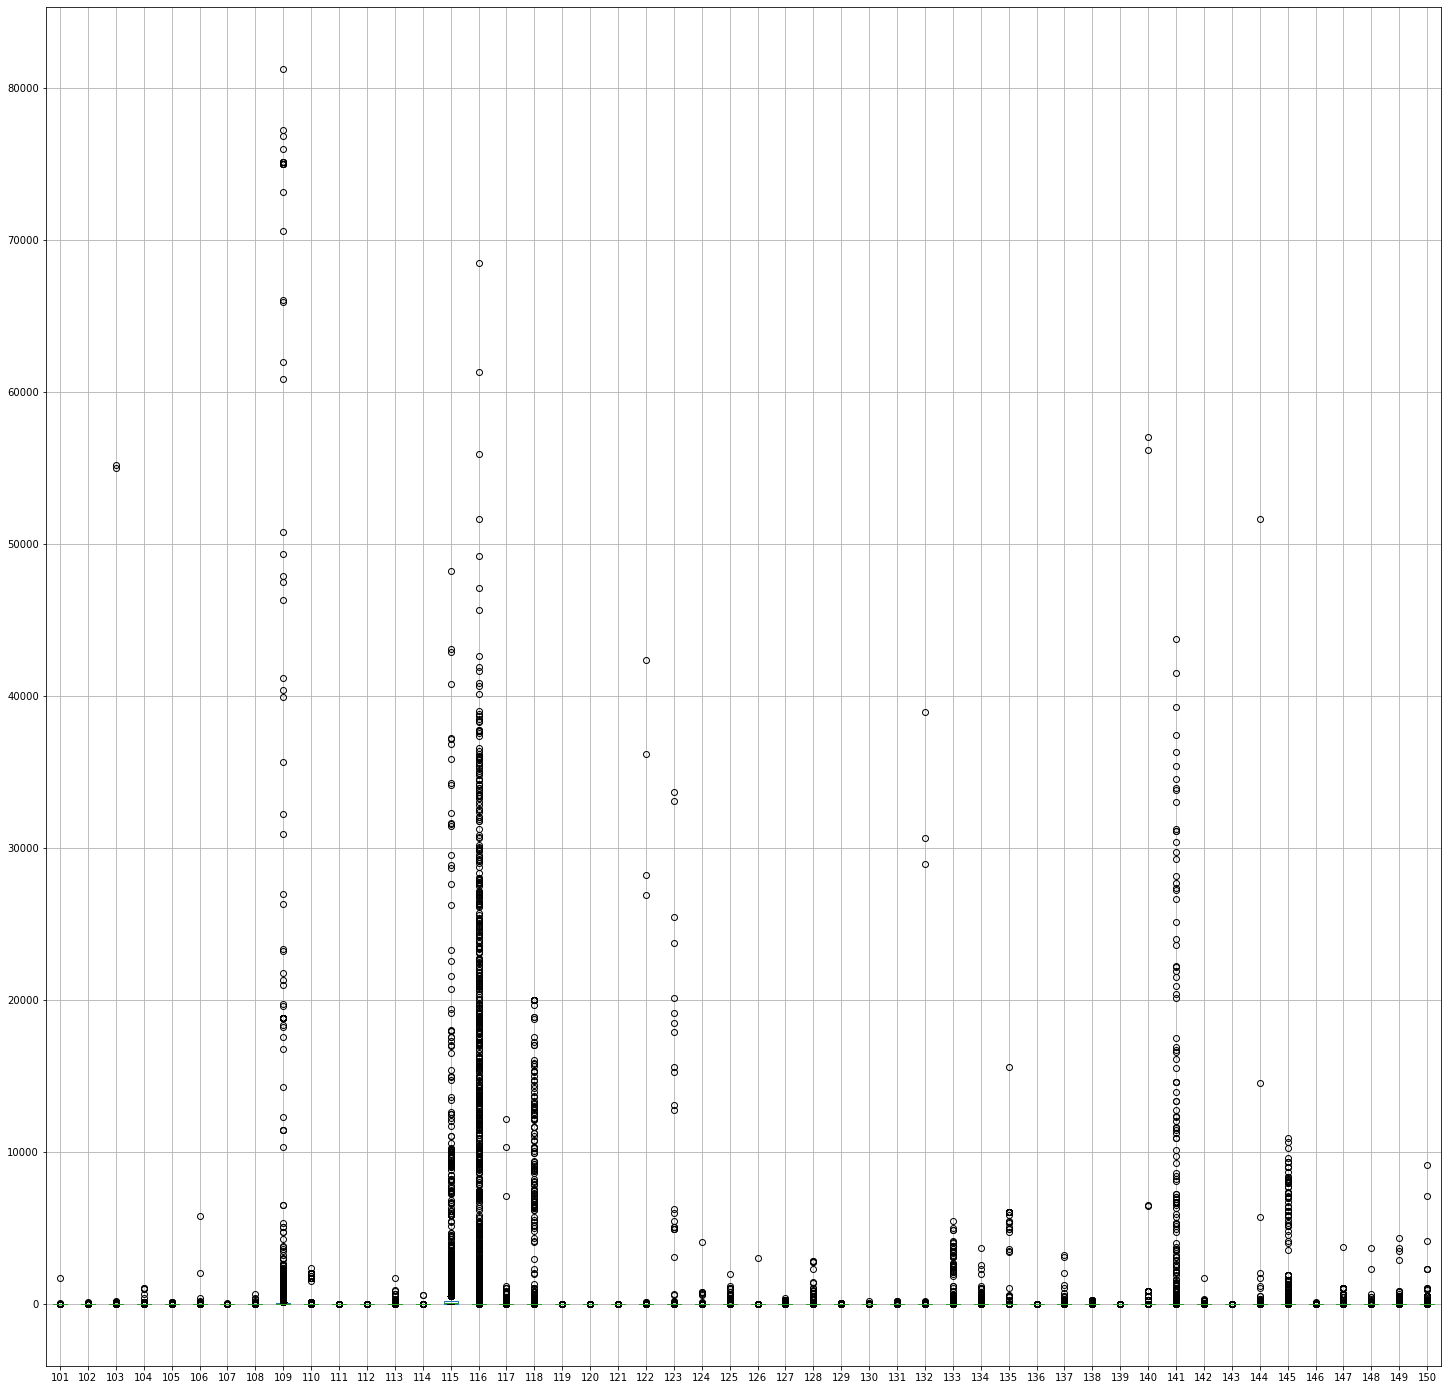

In [30]:
all_data_df.boxplot(column=column_label_100_150, figsize=(25, 25))

<AxesSubplot:>

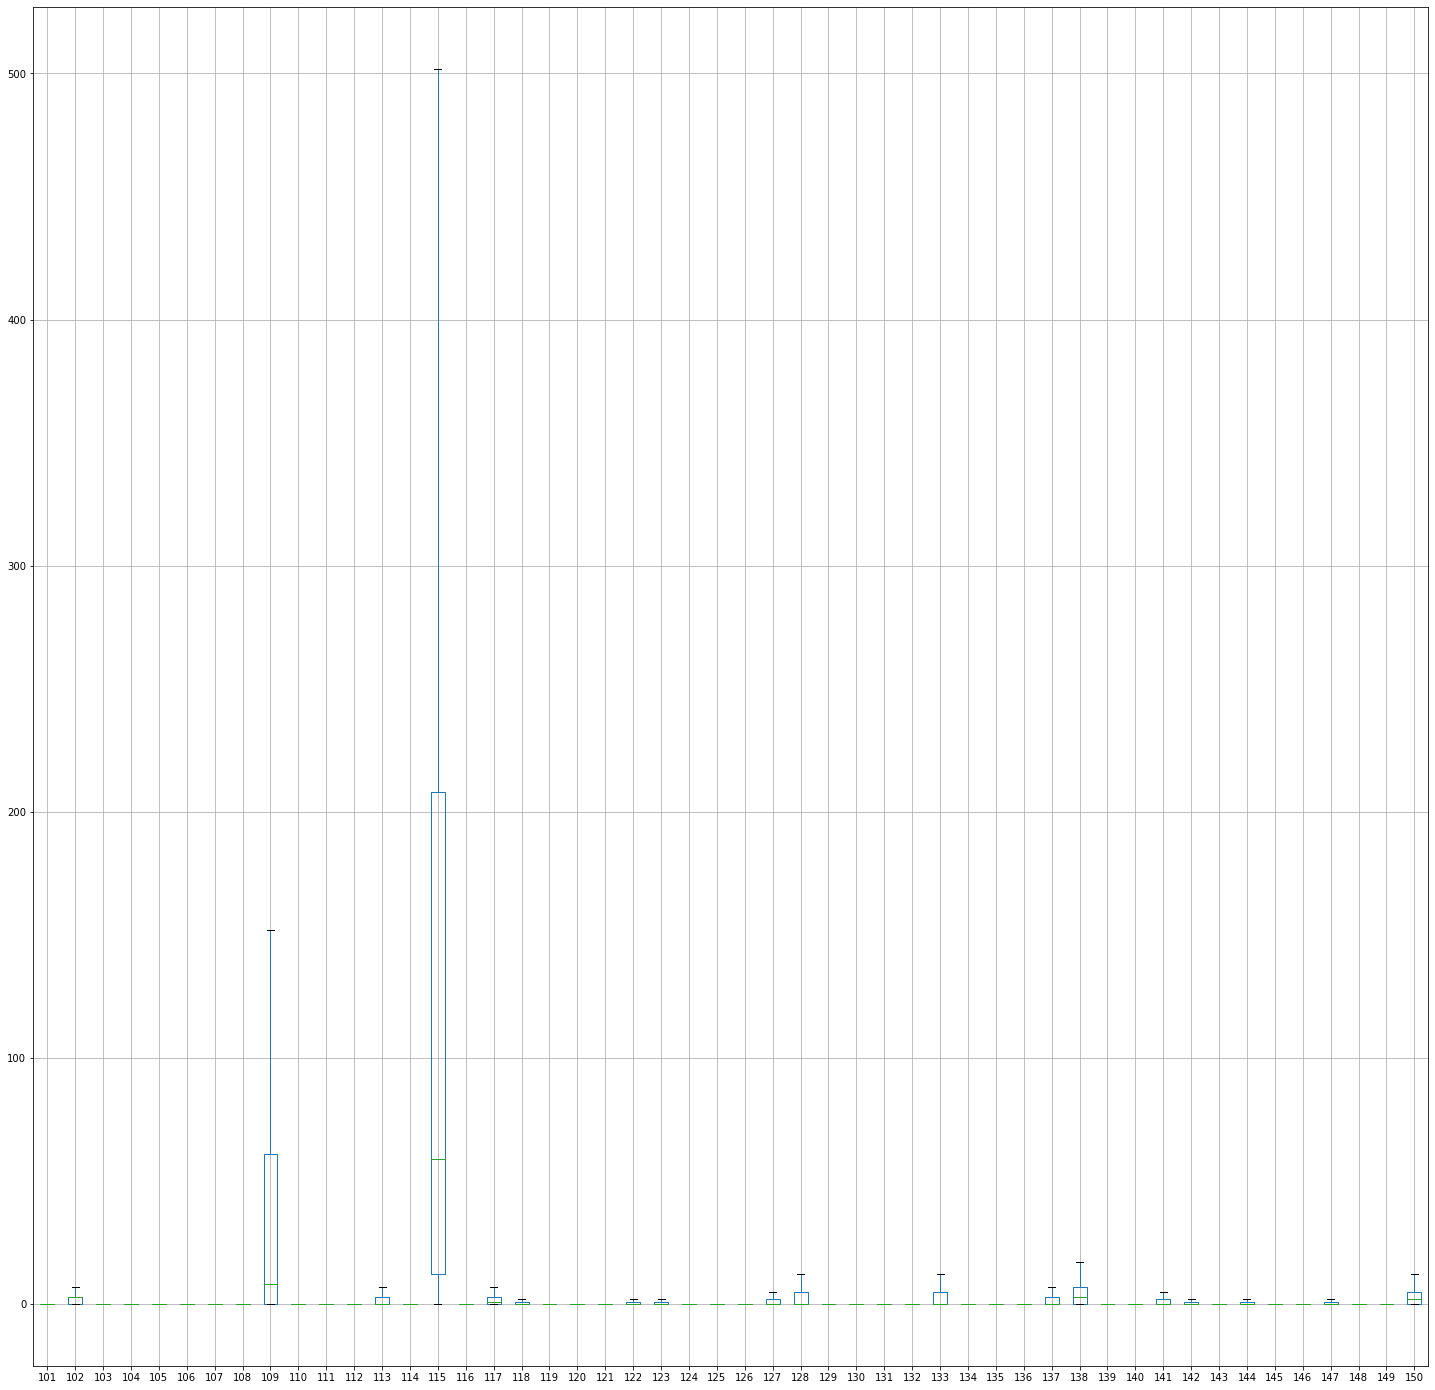

In [31]:
all_data_df.boxplot(column=column_label_100_150, figsize=(25, 25), showfliers=False)

#### Boxplot feature 150-200

<AxesSubplot:>

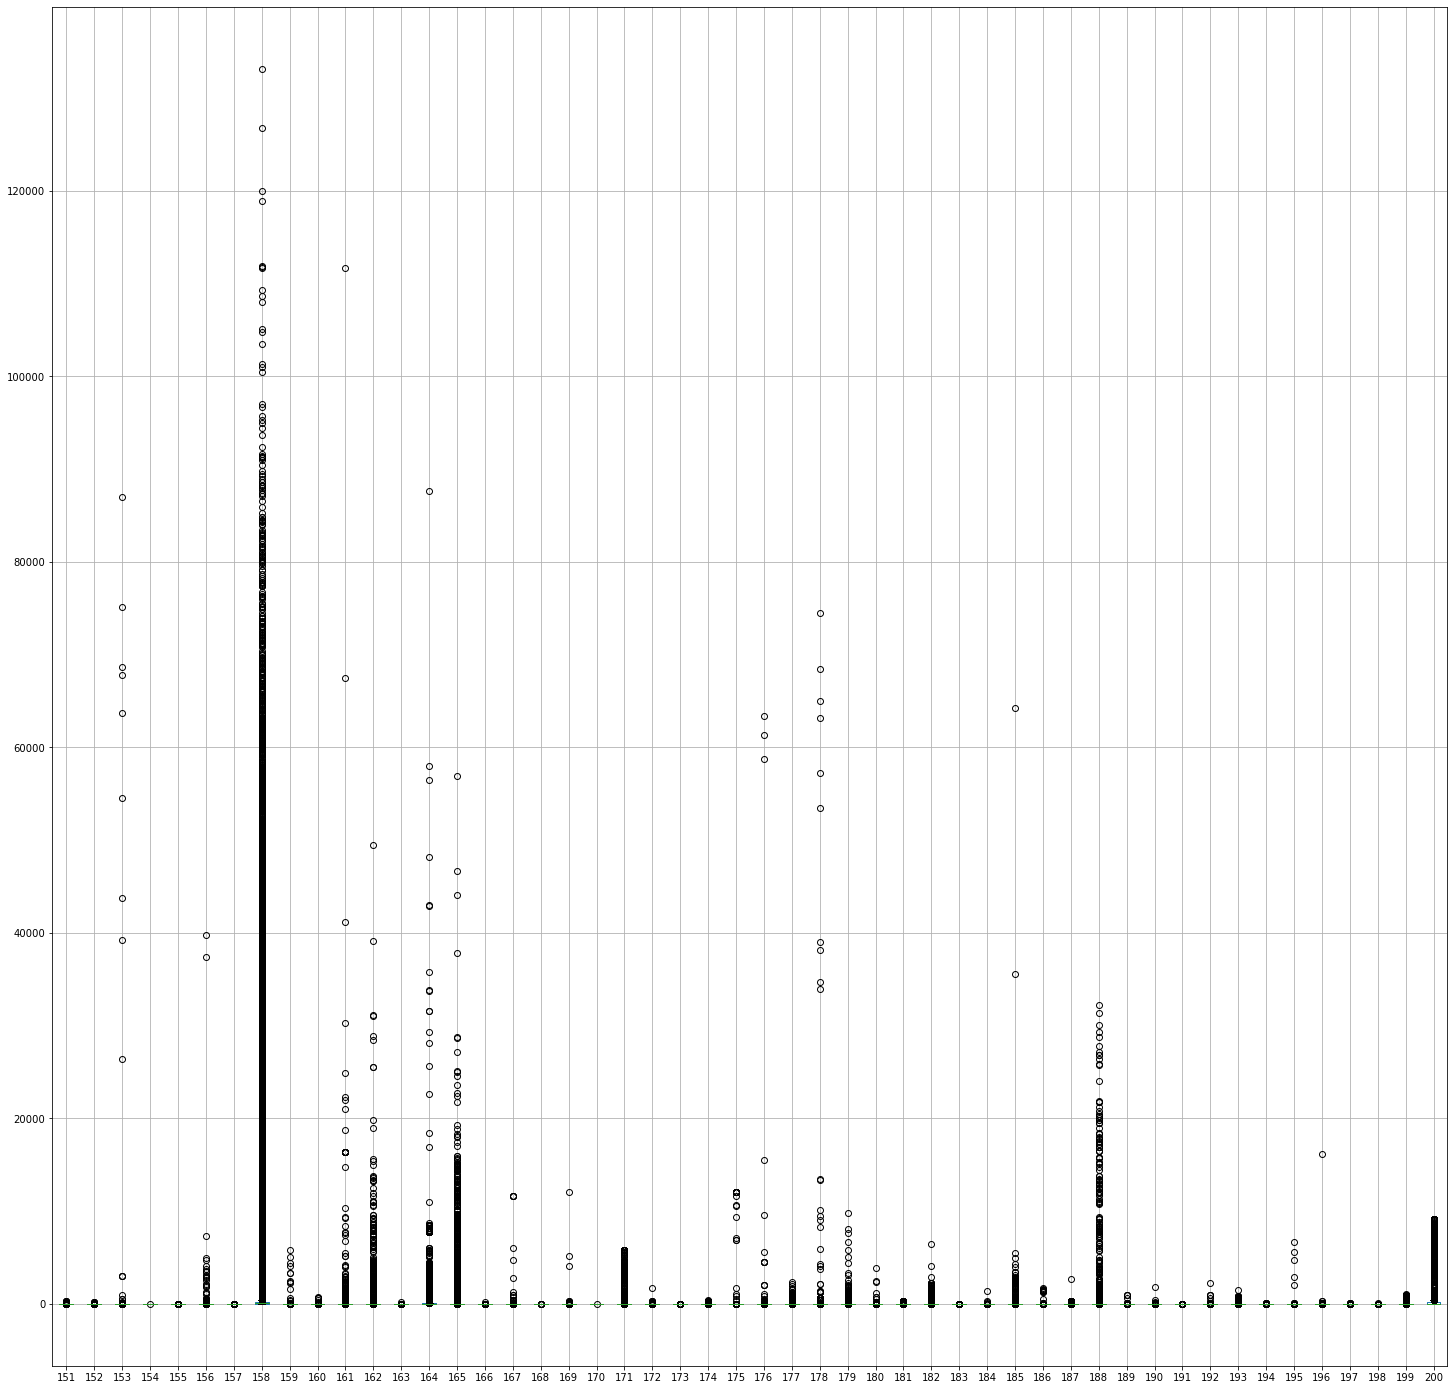

In [32]:
all_data_df.boxplot(column=column_label_150_200, figsize=(25, 25))

<AxesSubplot:>

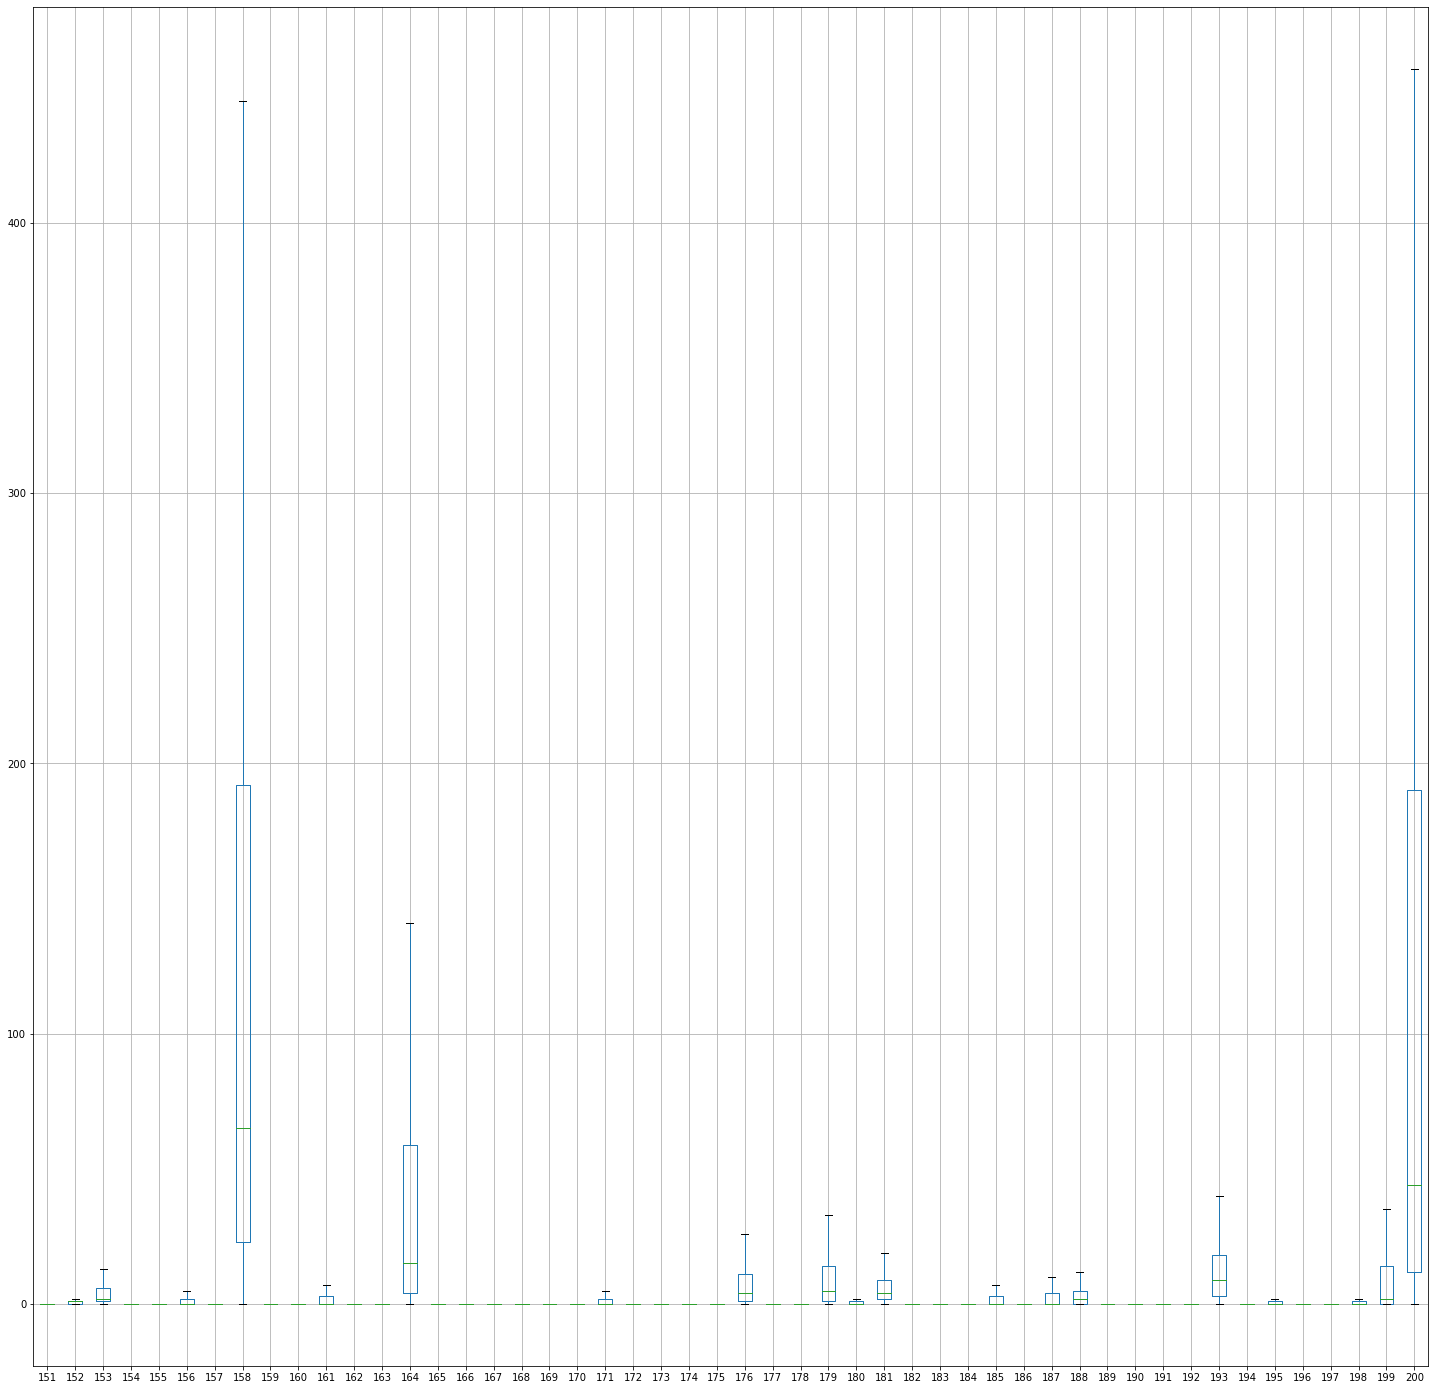

In [33]:
all_data_df.boxplot(column=column_label_150_200, figsize=(25, 25), showfliers=False)

#### Boxplot feature 200-216

<AxesSubplot:>

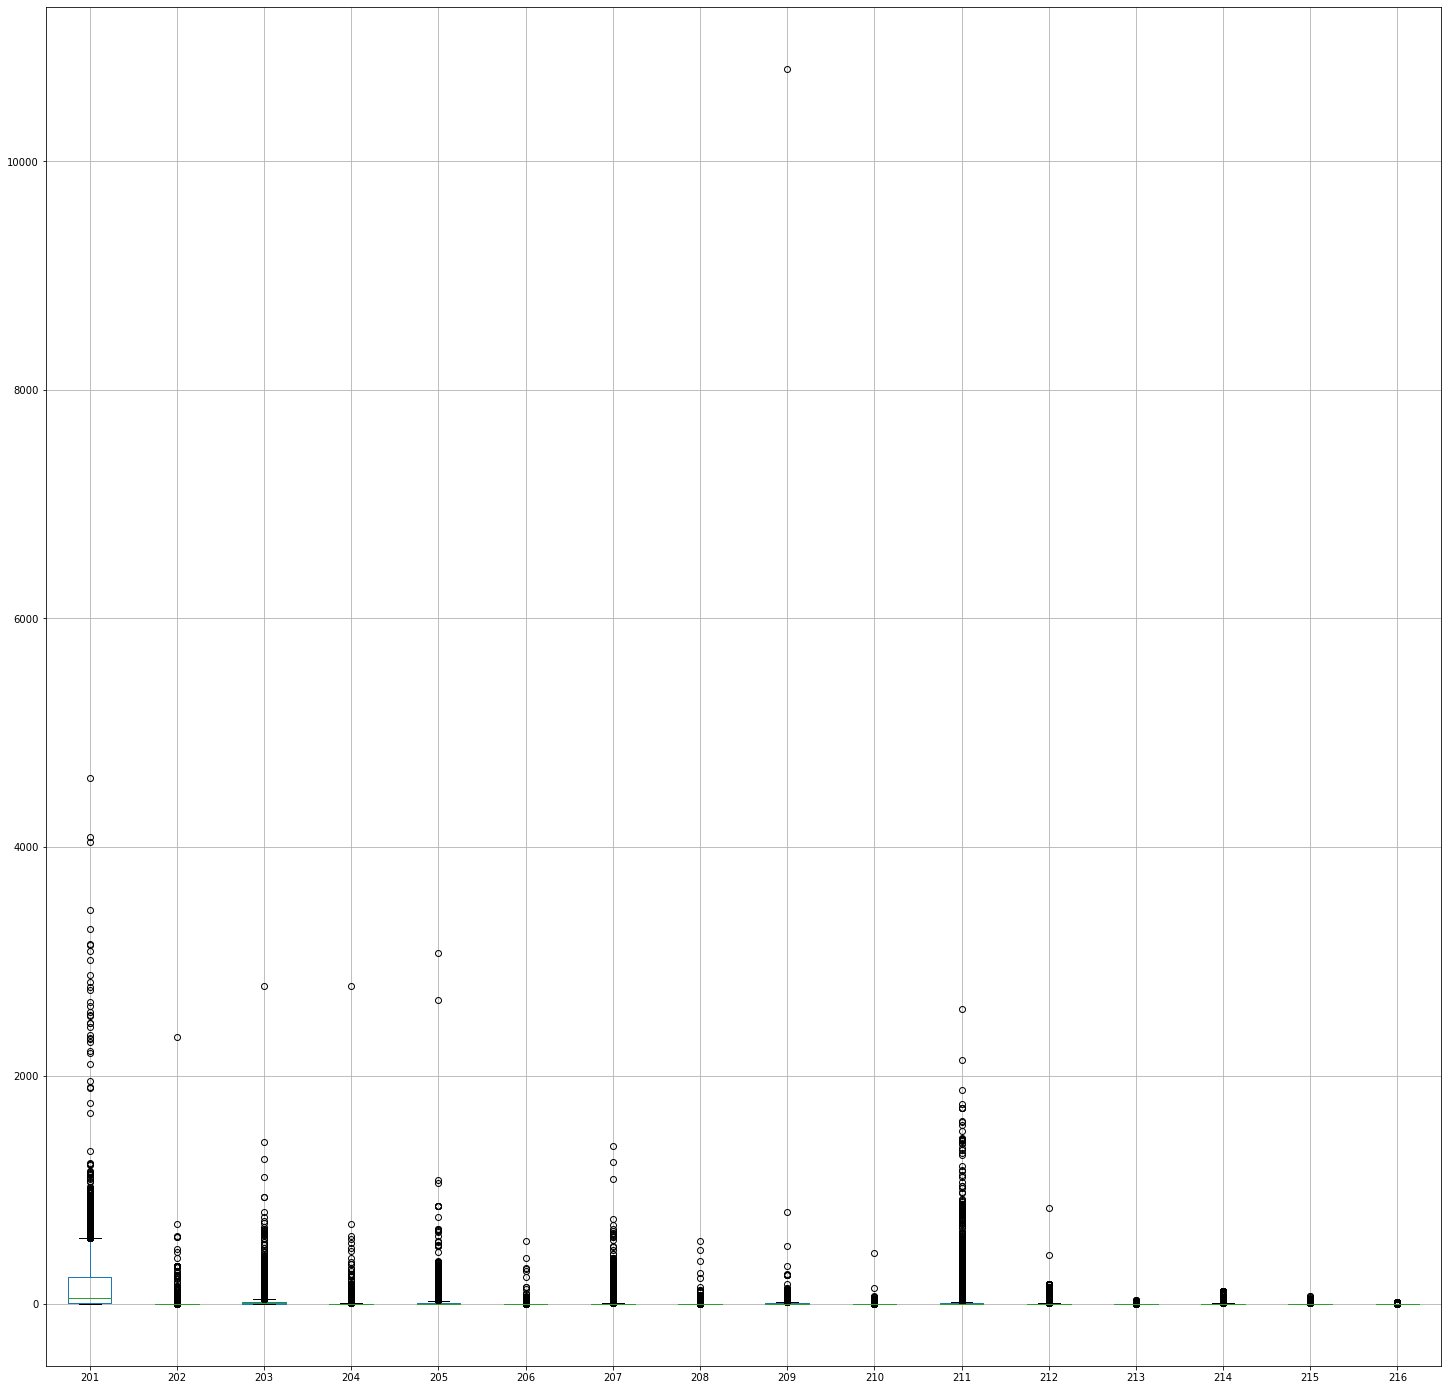

In [34]:
all_data_df.boxplot(column=column_label_200_216, figsize=(25, 25))

<AxesSubplot:>

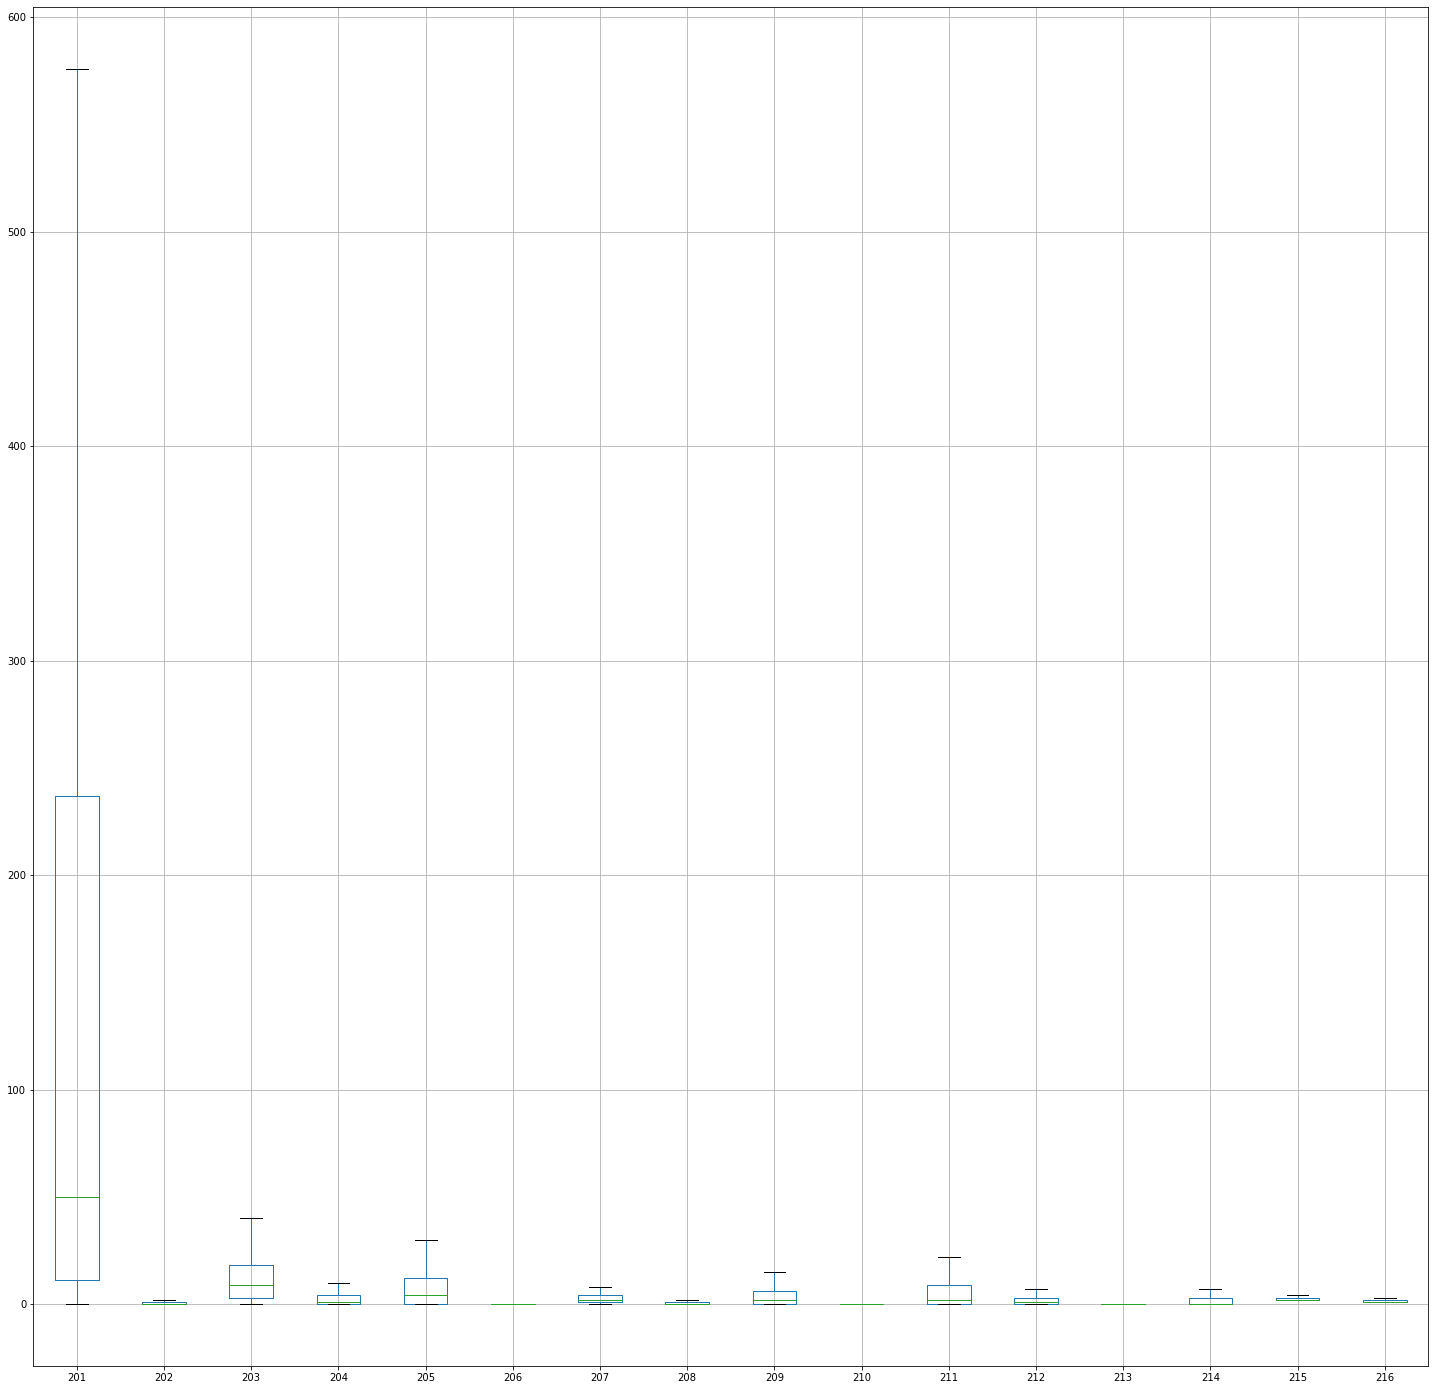

In [35]:
all_data_df.boxplot(column=column_label_200_216, figsize=(25, 25), showfliers=False)

#### Boxplot feature 216-264

<AxesSubplot:>

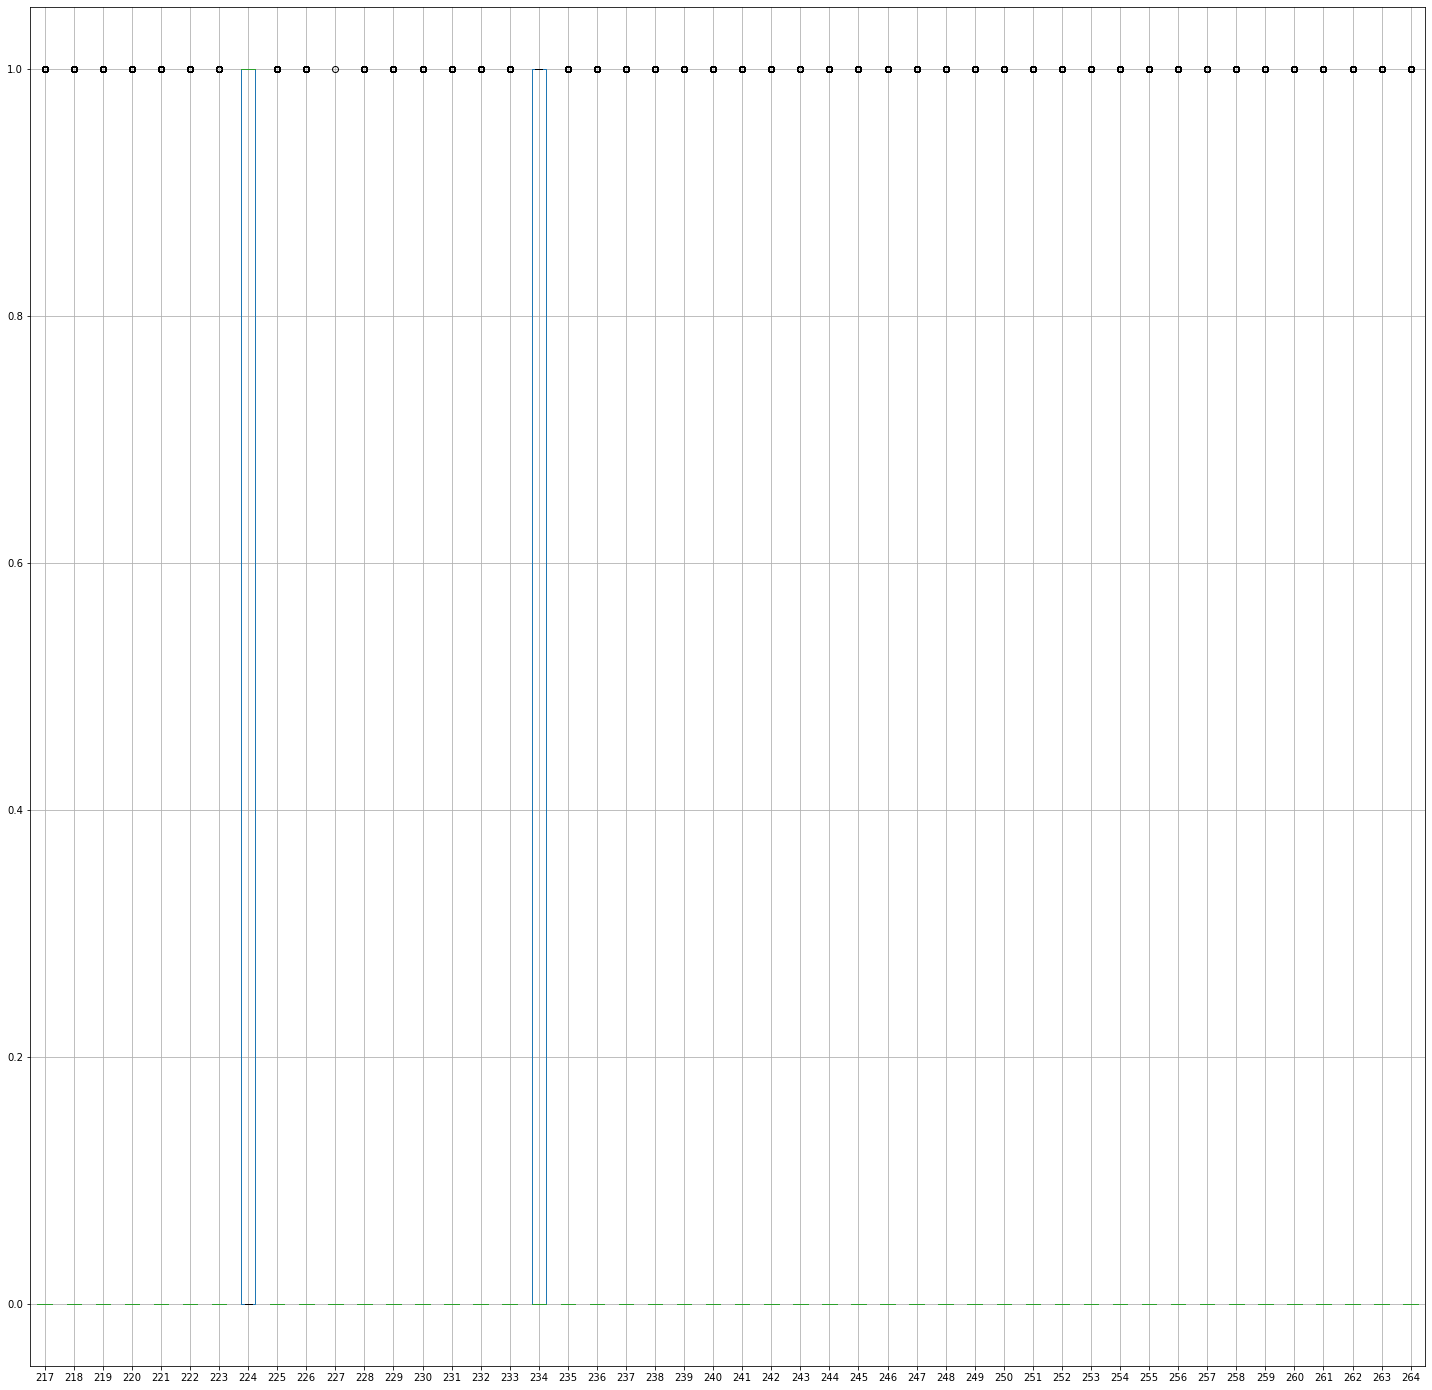

In [36]:
all_data_df.boxplot(column=column_label_216_264, figsize=(25, 25))

Count the number of outliers

In [37]:
# iqr_tensor_store = np.zeros((all_data_df.shape[1], 2), dtype="float32")
# all_data = all_data_df.to_numpy()
# for i, column in enumerate(all_data_df):
#     q25 = all_data_df[column].quantile(.25)
#     q75 = all_data_df[column].quantile(.75)
#     iqr_tensor_store[i, 0] = q25 - (1.5 * (q75 - q25))   # lowerBound
#     iqr_tensor_store[i, 1] = q75 + (1.5 * (q75 - q25))   # UpperBound
    
# counter_outliers = 0
# row_to_remove = []
# for index, row in all_data_df.iterrows():
#     is_outlier = True
#     for j, element in enumerate(row):
#         if (element > iqr_tensor_store[j, 0]) or (element < iqr_tensor_store[j, 1]):
#             is_outlier=False   # we search for outliers over all the feature
#             break
#     if is_outlier:
#         counter_outliers += 1
#         row_to_remove.append(index)
# print(counter_outliers)
# print(row_to_remove)

even if we have a lot of outliers among the feature, we don't have outliers in all features

summary: this dataset it's terrible

In [25]:
all_data = all_data_df.to_numpy()

# PCA and K-Means clustering

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

scaler = StandardScaler()
scaler.fit(all_data)
all_data_scaled = scaler.transform(all_data)

pca = PCA()
pca.fit(all_data_scaled)
pca_data = pca.transform(all_data_scaled)

In order to reduce dimensionality (and speed up machine learning approaches) we'll consider the firs $n$ PCA which explained variance sum amount it's at least to 80% variance of the dataset

In [26]:
# Var per component
for i, PC_var in enumerate(pca.explained_variance_ratio_):
    print("PC" + str(i) + ": " + str(round((PC_var * 100), 2)) + "%")

PC0: 3.97%
PC1: 2.95%
PC2: 2.3%
PC3: 2.11%
PC4: 1.97%
PC5: 1.55%
PC6: 1.29%
PC7: 1.28%
PC8: 1.16%
PC9: 1.09%
PC10: 1.08%
PC11: 1.02%
PC12: 1.01%
PC13: 0.92%
PC14: 0.9%
PC15: 0.88%
PC16: 0.86%
PC17: 0.85%
PC18: 0.78%
PC19: 0.78%
PC20: 0.77%
PC21: 0.75%
PC22: 0.75%
PC23: 0.73%
PC24: 0.72%
PC25: 0.72%
PC26: 0.71%
PC27: 0.69%
PC28: 0.68%
PC29: 0.67%
PC30: 0.66%
PC31: 0.64%
PC32: 0.62%
PC33: 0.61%
PC34: 0.58%
PC35: 0.58%
PC36: 0.58%
PC37: 0.56%
PC38: 0.56%
PC39: 0.55%
PC40: 0.55%
PC41: 0.53%
PC42: 0.52%
PC43: 0.51%
PC44: 0.51%
PC45: 0.5%
PC46: 0.49%
PC47: 0.49%
PC48: 0.48%
PC49: 0.48%
PC50: 0.47%
PC51: 0.47%
PC52: 0.47%
PC53: 0.46%
PC54: 0.46%
PC55: 0.45%
PC56: 0.45%
PC57: 0.45%
PC58: 0.44%
PC59: 0.43%
PC60: 0.43%
PC61: 0.43%
PC62: 0.43%
PC63: 0.43%
PC64: 0.42%
PC65: 0.42%
PC66: 0.42%
PC67: 0.42%
PC68: 0.41%
PC69: 0.41%
PC70: 0.41%
PC71: 0.41%
PC72: 0.4%
PC73: 0.4%
PC74: 0.4%
PC75: 0.4%
PC76: 0.39%
PC77: 0.39%
PC78: 0.39%
PC79: 0.39%
PC80: 0.39%
PC81: 0.39%
PC82: 0.39%
PC83: 0.38%
PC84: 0.3

In [27]:
amount_of_var = 0
for i, PC_var in enumerate(pca.explained_variance_ratio_):
    amount_of_var += PC_var * 100
    if amount_of_var >= 80:
        print("the first " + str(i) + " components explain " + str(np.round(amount_of_var, decimals=1)) + "% variance of the dataset")
        break

the first 134 components explain 80.1% variance of the dataset


before reduce dimensionality just visualize contribution of features (among the first 2 components)

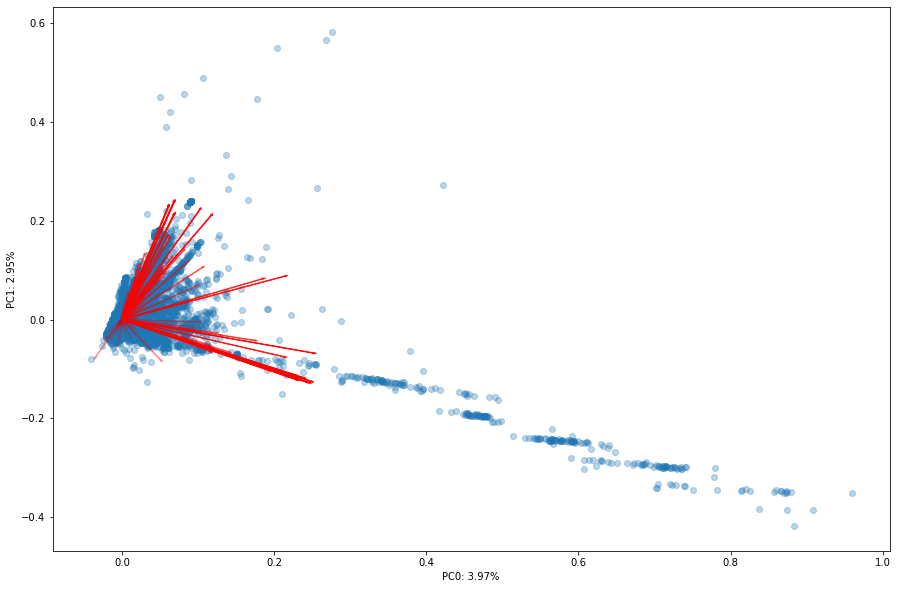

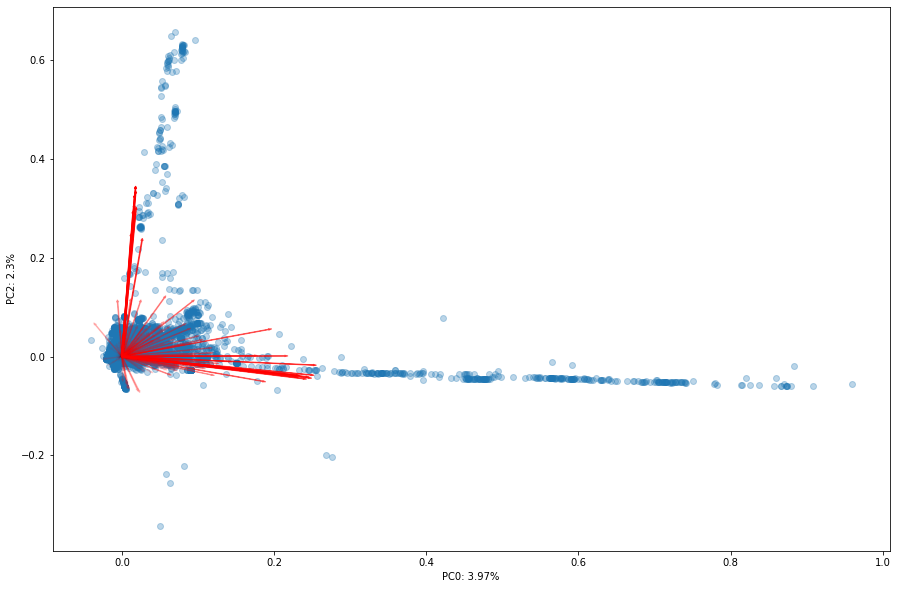

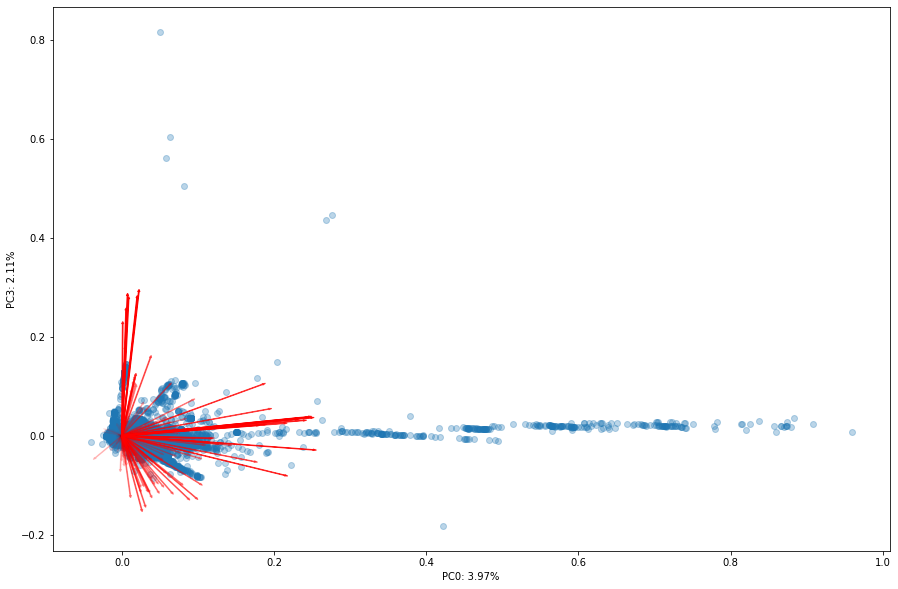

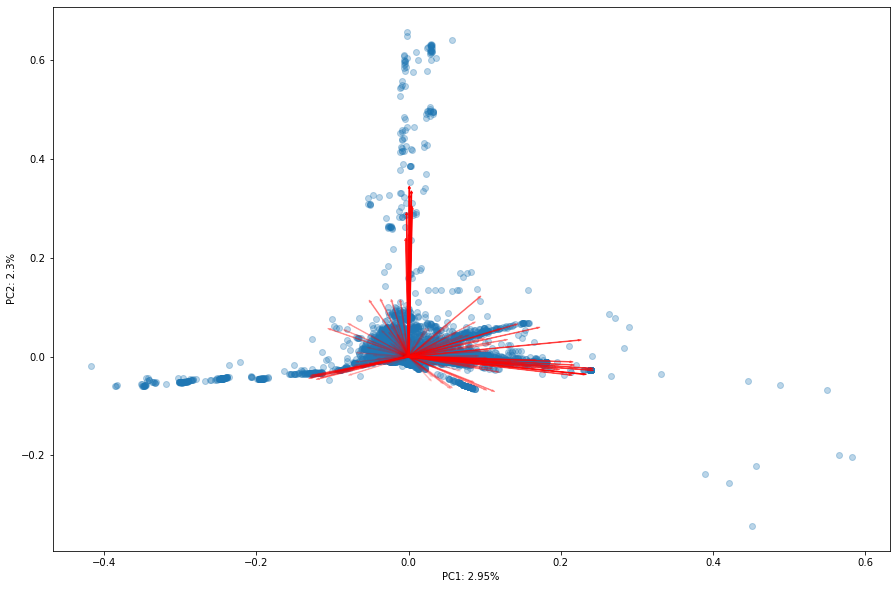

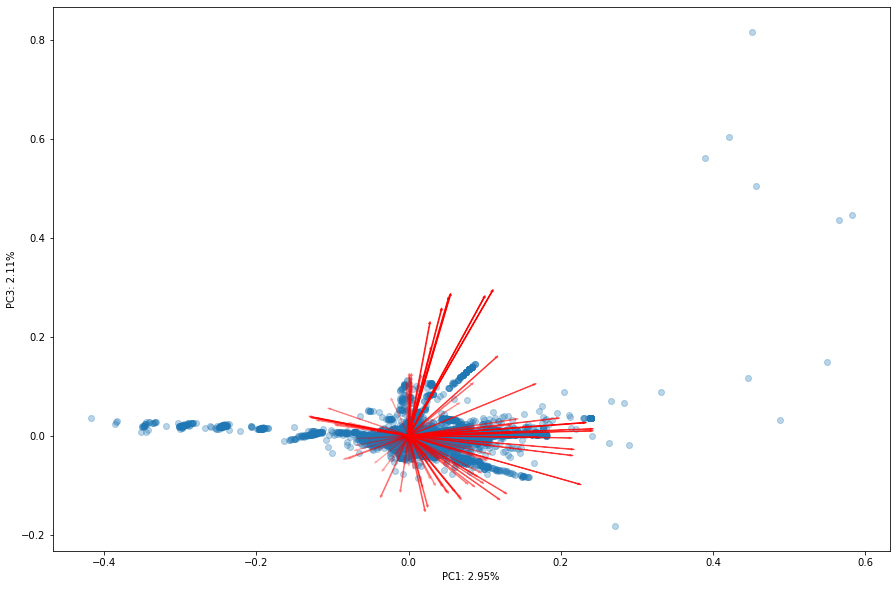

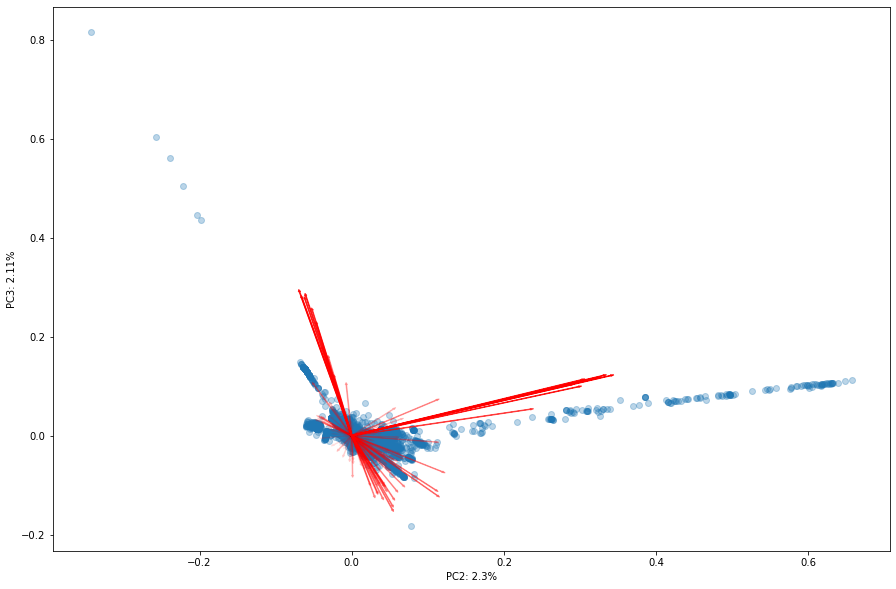

In [28]:
def myplot(score,coeff,label):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(15, 10))
    plt.xlabel("PC" + str(label[0]) + ": " + str(round((pca.explained_variance_ratio_[label[0]] * 100), 2)) + "%")
    plt.ylabel("PC" + str(label[1]) + ": " + str(round((pca.explained_variance_ratio_[label[1]] * 100), 2)) + "%")
    plt.scatter(xs * scalex,ys * scaley, alpha = 0.3)
    max_v = 0
    for i in range(n):
       max_v = max(max_v, np.sqrt(pow(coeff[i,0], 2) + pow(coeff[i,1], 2))) 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r', alpha=((np.sqrt(pow(coeff[i,0], 2) + pow(coeff[i,1], 2)))/max_v))


myplot((pca_data[:,[0, 1]]),np.transpose(pca.components_[[0, 1], :]),label=[0,1])
plt.show()
myplot((pca_data[:,[0, 2]]),np.transpose(pca.components_[[0, 2], :]),label=[0,2])
plt.show()
myplot((pca_data[:,[0, 3]]),np.transpose(pca.components_[[0, 3], :]),label=[0,3])
plt.show()
myplot((pca_data[:,[1, 2]]),np.transpose(pca.components_[[1, 2], :]),label=[1,2])
plt.show()
myplot((pca_data[:,[1, 3]]),np.transpose(pca.components_[[1, 3], :]),label=[1,3])
plt.show()
myplot((pca_data[:,[2, 3]]),np.transpose(pca.components_[[2, 3], :]),label=[2,3])
plt.show()

Seems that there is some ortoghonality between some PC, but it's hard to say certainly because of the high dimensionality of the dataset and because the first PC explain just the 3.97% of the dataset. 

reduce dimensionality in order to make experiments

In [28]:
pca_2 = PCA(n_components=134)
pca_2.fit(all_data_scaled)
final_pca_data = pca_2.transform(all_data_scaled)

In [44]:
temp_df = pd.DataFrame(final_pca_data[:,0:4])

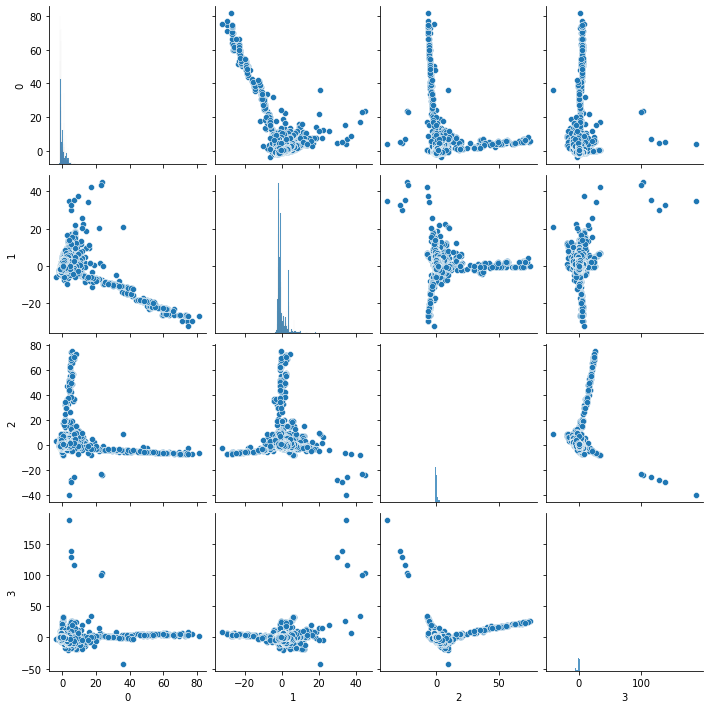

In [45]:
sbs.pairplot(temp_df)

Make kmeans clustering experiments (from k=2 to k=5)

overall clustering silhouette 0.7616523504257202


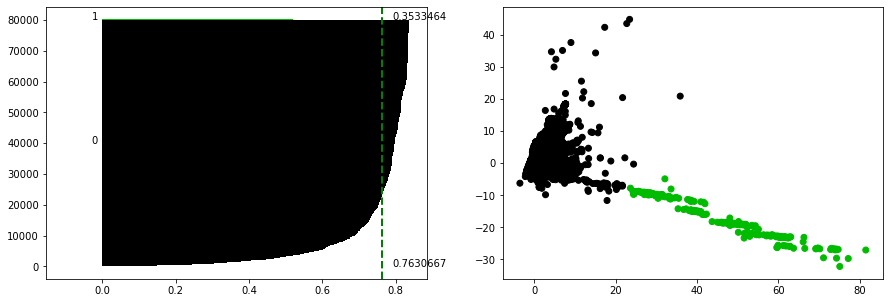

<Figure size 432x288 with 0 Axes>

In [46]:
K=2
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [47]:
counter_zero = 0
counter_one = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    else:
        counter_one += 1
print(counter_zero)
print(counter_one)

79972
277


overall clustering silhouette 0.6506043672561646


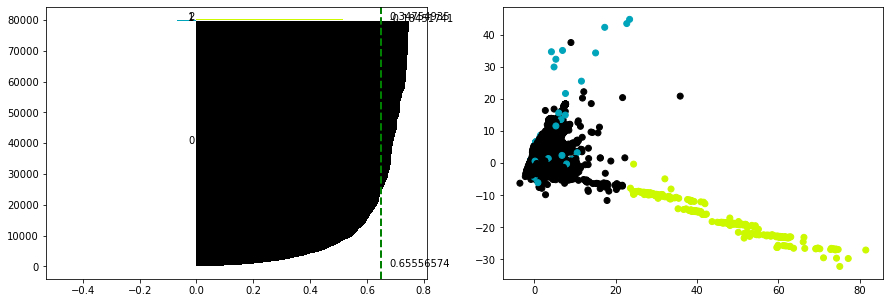

<Figure size 432x288 with 0 Axes>

In [48]:
K=3
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [49]:
counter_zero = 0
counter_one = 0
counter_two = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    elif element == 1:
        counter_one += 1
    else:
        counter_two += 1
        
print(counter_zero)
print(counter_one)
print(counter_two)

79599
372
278


overall clustering silhouette 0.21238389611244202


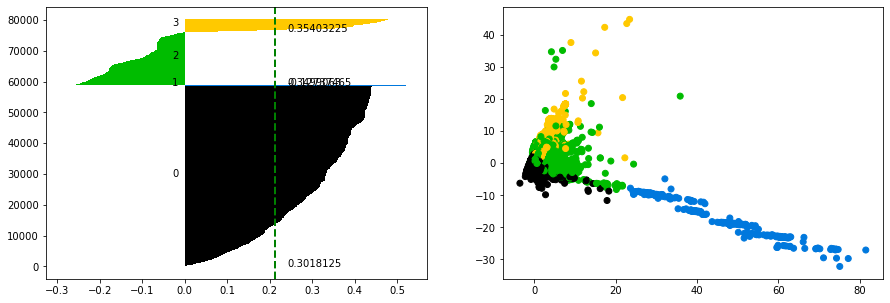

<Figure size 432x288 with 0 Axes>

In [50]:
K=4
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [51]:
counter_zero = 0
counter_one = 0
counter_two = 0
counter_three = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    elif element == 1:
        counter_one += 1
    elif element == 2:
        counter_two += 1
    else:
        counter_three += 1
        
print(counter_zero)
print(counter_one)
print(counter_two)
print(counter_three)

58521
277
17262
4189


overall clustering silhouette 0.1867152899503708


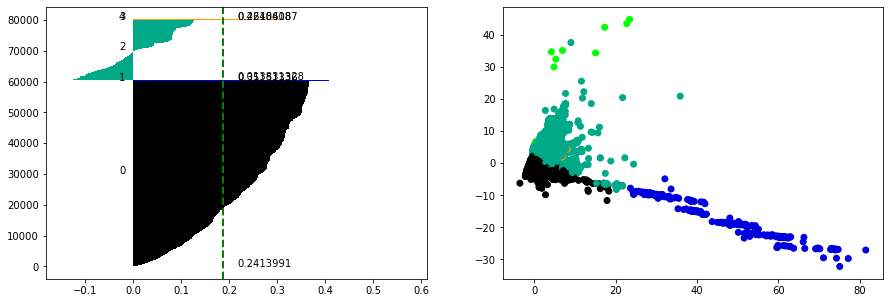

<Figure size 432x288 with 0 Axes>

In [52]:
K=5
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [53]:
counter_zero = 0
counter_one = 0
counter_two = 0
counter_three = 0
counter_four = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    elif element == 1:
        counter_one += 1
    elif element == 2:
        counter_two += 1
    elif element == 3:
        counter_three += 1
    else:
        counter_four += 0
        
print(counter_zero)
print(counter_one)
print(counter_two)
print(counter_three)
print(counter_four)

60245
277
19499
95
0


Seems clear from the silhouette that the better k = 2. This case says to us that the data are principally grouped in a main group (the dark one) and a very little part of data in another group (the green line of data in the bottom right part)

shape of final data

In [29]:
final_pca_data.shape,label_classification.shape

((80249, 134), (80249,))

# experiments and results

some comparative experiments with Deep neural network, logistic regression and linear support vector machines (with this last method we don't have considered polynomial transofrmation because of the huge amount of time execution).

In [31]:
import sklearn
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay, RocCurveDisplay,PrecisionRecallDisplay, precision_recall_curve
import matplotlib.pyplot as plt

**deep neural network classificator: a fully dense neural network to find relation among the samples of the dataset and the classes which they belong**

In [56]:
X = final_pca_data
y = label_classification
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
clf = MLPClassifier(hidden_layer_sizes = (32,16,8),random_state=99, max_iter=1000,activation='logistic').fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [57]:
print('score test:',clf.score(X_test, y_test),'score train:',clf.score(X_train,y_train))

score test: 0.8068085530578677 score train: 0.8312730535340445


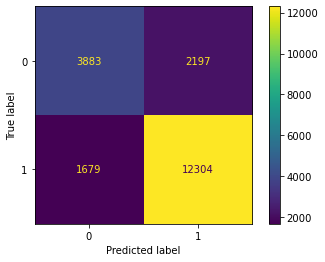

In [58]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

confusion matrix

Balanced Accuracy: is = (Sensitivity + Specificity) / 2
where Sensitivity is TP/(TP+FN)
and Specificity is TN/(TN+FP)

In [59]:
sklearn.metrics.balanced_accuracy_score(y_test, y_pred)

0.7592884698807199

precsion is TP/(TP+FT)

In [60]:
sklearn.metrics.precision_score(y_test, y_pred)

0.8484932073650093

Recall is TP/(TP+FN)

In [61]:
sklearn.metrics.recall_score(y_test, y_pred)

0.8799256239719659

In [64]:
mlp = MLPClassifier()

In [65]:
mlp.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [66]:
parameters = {'hidden_layer_sizes':[(16,8),(32,16,8)], 'activation':['relu','sigmoid'], 'learning_rate':['costant','invscaling','adaptive'], 'max_iter':[500,1000]}

In [67]:
parameters

{'hidden_layer_sizes': [(16, 8), (32, 16, 8)],
 'activation': ['relu', 'sigmoid'],
 'learning_rate': ['costant', 'invscaling', 'adaptive'],
 'max_iter': [500, 1000]}

In [68]:
mlpgrid = GridSearchCV(estimator=mlp, param_grid=parameters)

In [69]:
mlpgrid.fit(X_train, y_train)

C:\Users\joker\anaconda3\envs\ProjectDataAnalytics\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joker\anaconda3\envs\ProjectDataAnalytics\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joker\anaconda3\envs\ProjectDataAnalytics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\joker\anaconda3\envs\ProjectDataAnalytics\lib\sit

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'sigmoid'],
                         'hidden_layer_sizes': [(16, 8), (32, 16, 8)],
                         'learning_rate': ['costant', 'invscaling', 'adaptive'],
                         'max_iter': [500, 1000]})

**Logistic Regression: the logistic regression it's useful to compute the probability to have one of the output classes given values of indepenent variables. The shape of this function is called Sigomid**

In [70]:
X = final_pca_data
y = label_classification
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
clflogreg = LogisticRegression(solver="liblinear", random_state=99,max_iter=300).fit(X, y)
y_pred = clflogreg.predict(X_test)

In [71]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
print('score test:',clflogreg.score(X_test, y_test),'score train:',clflogreg.score(X_train,y_train))

score test: 0.725763843891741 score train: 0.732147010932775


Balanced Accuracy: is = (Sensitivity + Specificity) / 2 where Sensitivity is TP/(TP+FN) and Specificity is TN/(TN+FP)

In [73]:
sklearn.metrics.balanced_accuracy_score(y_test, y_pred)

0.5983345907342374

Precision is TP/(TP+FT)

In [74]:
sklearn.metrics.precision_score(y_test, y_pred)

0.7451297762876467

Recall is TP/(TP+FN)

In [75]:
sklearn.metrics.recall_score(y_test, y_pred)

0.9218336551526854

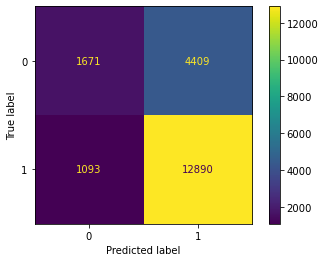

In [76]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

**Linear SVM: Support vector machines classifies data searching for a hyperplain which divide them linearly minimizing the margin with the datas**

In [32]:
X = final_pca_data
y = label_classification
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
lsvm = LinearSVC(random_state=99, tol=1e-5,max_iter=1000)
lsvm.fit(X_train, y_train)

C:\Users\joker\anaconda3\envs\ProjectDataAnalytics\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=99, tol=1e-05)

In [36]:
print('score test:',lsvm.score(X_test, y_test),'score train:',lsvm.score(X_train,y_train))

score test: 0.7188356676469122 score train: 0.7235569733825142


In [37]:
y_pred = lsvm.predict(X_test)

Balanced Accuracy: is = (Sensitivity + Specificity) / 2 where Sensitivity is TP/(TP+FN) and Specificity is TN/(TN+FP)

In [38]:
sklearn.metrics.balanced_accuracy_score(y_test, y_pred)

0.5755627604196073

Precision is TP/(TP+FT)

In [39]:
sklearn.metrics.precision_score(y_test, y_pred)

0.7326787905835099

Recall is TP/(TP+FN)

In [40]:
sklearn.metrics.recall_score(y_test, y_pred)

0.9392834155760567

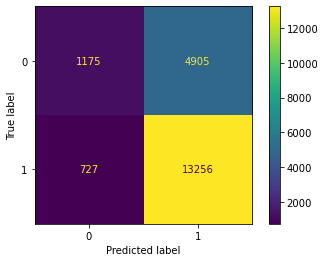

In [85]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

So the best result is given by the deep neural network with 80.68% of balanced accuracy, followed by by the Logistic regressor with 72.57% and finally by support vector machine with 71.88%.